# Library

In [18]:
from tensorflow.keras.layers import Activation, Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model

In [19]:
import numpy as np
import math
import matplotlib.pyplot as plt
import os

In [20]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import describe,fe,gan

%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [21]:
# load MNIST dataset
(x_train, _), (_, _) = mnist.load_data()

# reshape and normalize

In [22]:
# reshape data for CNN as (28, 28, 1) and normalize
image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255

# parameter

In [33]:
model_name = "dcgan_mnist"
# network parameters
# the latent or z vector is 100-dim
latent_size = 100
batch_size = 64
train_steps = 40000
lr = 2e-4
decay = 6e-8
input_shape = (image_size, image_size, 1)

# model

In [34]:
models = gan.dcgan_build(input_shape,image_size,lr,decay,latent_size,model_name)

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa [(None, 28, 28, 1)]       0         
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 14, 14, 32)        832       
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 7, 7, 64)          51264     
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 4, 4, 128)       

In [38]:
gan.dcgan_train(models,x_train, [64,100,40000,"DCGAN"])

0: [discriminator loss: 0.597000, acc: 0.687500] [adversarial loss: 0.590332, acc: 0.687500]
1: [discriminator loss: 0.586571, acc: 0.703125] [adversarial loss: 1.276489, acc: 0.062500]
2: [discriminator loss: 0.538487, acc: 0.710938] [adversarial loss: 0.489971, acc: 0.781250]
3: [discriminator loss: 0.620211, acc: 0.640625] [adversarial loss: 1.386187, acc: 0.015625]
4: [discriminator loss: 0.535702, acc: 0.695312] [adversarial loss: 0.557880, acc: 0.781250]
5: [discriminator loss: 0.560249, acc: 0.710938] [adversarial loss: 1.046958, acc: 0.156250]
6: [discriminator loss: 0.437937, acc: 0.789062] [adversarial loss: 0.525359, acc: 0.781250]
7: [discriminator loss: 0.479205, acc: 0.789062] [adversarial loss: 0.708516, acc: 0.484375]
8: [discriminator loss: 0.437918, acc: 0.820312] [adversarial loss: 0.388601, acc: 0.937500]
9: [discriminator loss: 0.570366, acc: 0.671875] [adversarial loss: 1.292100, acc: 0.015625]
10: [discriminator loss: 0.607371, acc: 0.671875] [adversarial loss: 0

87: [discriminator loss: 0.569154, acc: 0.703125] [adversarial loss: 0.740881, acc: 0.468750]
88: [discriminator loss: 0.550577, acc: 0.671875] [adversarial loss: 1.424302, acc: 0.031250]
89: [discriminator loss: 0.515552, acc: 0.757812] [adversarial loss: 0.928331, acc: 0.250000]
90: [discriminator loss: 0.525809, acc: 0.726562] [adversarial loss: 1.252964, acc: 0.000000]
91: [discriminator loss: 0.561797, acc: 0.718750] [adversarial loss: 0.898636, acc: 0.265625]
92: [discriminator loss: 0.547741, acc: 0.726562] [adversarial loss: 1.256106, acc: 0.031250]
93: [discriminator loss: 0.513190, acc: 0.726562] [adversarial loss: 0.771923, acc: 0.468750]
94: [discriminator loss: 0.585673, acc: 0.687500] [adversarial loss: 1.764273, acc: 0.000000]
95: [discriminator loss: 0.646512, acc: 0.601562] [adversarial loss: 0.541515, acc: 0.796875]
96: [discriminator loss: 0.622419, acc: 0.539062] [adversarial loss: 1.708656, acc: 0.000000]
97: [discriminator loss: 0.579116, acc: 0.703125] [adversari

174: [discriminator loss: 0.651421, acc: 0.625000] [adversarial loss: 0.857210, acc: 0.390625]
175: [discriminator loss: 0.439055, acc: 0.804688] [adversarial loss: 1.373455, acc: 0.140625]
176: [discriminator loss: 0.423381, acc: 0.867188] [adversarial loss: 1.265606, acc: 0.125000]
177: [discriminator loss: 0.521989, acc: 0.742188] [adversarial loss: 1.051713, acc: 0.234375]
178: [discriminator loss: 0.482947, acc: 0.757812] [adversarial loss: 1.873843, acc: 0.000000]
179: [discriminator loss: 0.472674, acc: 0.789062] [adversarial loss: 0.792308, acc: 0.468750]
180: [discriminator loss: 0.533722, acc: 0.671875] [adversarial loss: 1.740168, acc: 0.031250]
181: [discriminator loss: 0.505396, acc: 0.781250] [adversarial loss: 1.021554, acc: 0.234375]
182: [discriminator loss: 0.445745, acc: 0.820312] [adversarial loss: 1.126313, acc: 0.125000]
183: [discriminator loss: 0.479177, acc: 0.734375] [adversarial loss: 0.976834, acc: 0.281250]
184: [discriminator loss: 0.403420, acc: 0.867188]

262: [discriminator loss: 0.479997, acc: 0.789062] [adversarial loss: 1.783629, acc: 0.015625]
263: [discriminator loss: 0.475280, acc: 0.757812] [adversarial loss: 0.918324, acc: 0.390625]
264: [discriminator loss: 0.515652, acc: 0.742188] [adversarial loss: 2.070526, acc: 0.015625]
265: [discriminator loss: 0.497637, acc: 0.734375] [adversarial loss: 0.812921, acc: 0.484375]
266: [discriminator loss: 0.497214, acc: 0.757812] [adversarial loss: 2.373648, acc: 0.000000]
267: [discriminator loss: 0.515499, acc: 0.765625] [adversarial loss: 0.832577, acc: 0.468750]
268: [discriminator loss: 0.461865, acc: 0.789062] [adversarial loss: 1.867279, acc: 0.015625]
269: [discriminator loss: 0.478641, acc: 0.796875] [adversarial loss: 1.049945, acc: 0.234375]
270: [discriminator loss: 0.480508, acc: 0.773438] [adversarial loss: 1.463246, acc: 0.093750]
271: [discriminator loss: 0.399828, acc: 0.820312] [adversarial loss: 1.106521, acc: 0.265625]
272: [discriminator loss: 0.466447, acc: 0.796875]

350: [discriminator loss: 0.607317, acc: 0.687500] [adversarial loss: 2.437646, acc: 0.015625]
351: [discriminator loss: 0.528651, acc: 0.742188] [adversarial loss: 1.246180, acc: 0.109375]
352: [discriminator loss: 0.410252, acc: 0.828125] [adversarial loss: 1.566005, acc: 0.109375]
353: [discriminator loss: 0.439323, acc: 0.812500] [adversarial loss: 1.455351, acc: 0.156250]
354: [discriminator loss: 0.407654, acc: 0.851562] [adversarial loss: 1.576360, acc: 0.062500]
355: [discriminator loss: 0.385487, acc: 0.875000] [adversarial loss: 1.404289, acc: 0.140625]
356: [discriminator loss: 0.410833, acc: 0.820312] [adversarial loss: 1.547662, acc: 0.078125]
357: [discriminator loss: 0.416066, acc: 0.789062] [adversarial loss: 1.452579, acc: 0.125000]
358: [discriminator loss: 0.390673, acc: 0.820312] [adversarial loss: 1.585971, acc: 0.062500]
359: [discriminator loss: 0.312903, acc: 0.921875] [adversarial loss: 1.132117, acc: 0.234375]
360: [discriminator loss: 0.380495, acc: 0.835938]

438: [discriminator loss: 0.408655, acc: 0.820312] [adversarial loss: 1.745061, acc: 0.046875]
439: [discriminator loss: 0.485405, acc: 0.734375] [adversarial loss: 0.894338, acc: 0.390625]
440: [discriminator loss: 0.502361, acc: 0.718750] [adversarial loss: 1.853143, acc: 0.062500]
441: [discriminator loss: 0.503481, acc: 0.765625] [adversarial loss: 1.087513, acc: 0.296875]
442: [discriminator loss: 0.429224, acc: 0.820312] [adversarial loss: 1.866232, acc: 0.062500]
443: [discriminator loss: 0.389281, acc: 0.835938] [adversarial loss: 1.187881, acc: 0.250000]
444: [discriminator loss: 0.482931, acc: 0.796875] [adversarial loss: 1.304950, acc: 0.187500]
445: [discriminator loss: 0.430187, acc: 0.796875] [adversarial loss: 1.405344, acc: 0.125000]
446: [discriminator loss: 0.440841, acc: 0.789062] [adversarial loss: 1.584887, acc: 0.109375]
447: [discriminator loss: 0.451378, acc: 0.765625] [adversarial loss: 0.728880, acc: 0.578125]
448: [discriminator loss: 0.619442, acc: 0.617188]

526: [discriminator loss: 0.450413, acc: 0.781250] [adversarial loss: 0.802318, acc: 0.500000]
527: [discriminator loss: 0.499527, acc: 0.734375] [adversarial loss: 1.956336, acc: 0.031250]
528: [discriminator loss: 0.466574, acc: 0.781250] [adversarial loss: 0.691876, acc: 0.609375]
529: [discriminator loss: 0.518643, acc: 0.679688] [adversarial loss: 2.109403, acc: 0.078125]
530: [discriminator loss: 0.519530, acc: 0.781250] [adversarial loss: 1.039510, acc: 0.296875]
531: [discriminator loss: 0.533651, acc: 0.695312] [adversarial loss: 1.806273, acc: 0.031250]
532: [discriminator loss: 0.463903, acc: 0.757812] [adversarial loss: 1.366453, acc: 0.187500]
533: [discriminator loss: 0.465773, acc: 0.773438] [adversarial loss: 1.627325, acc: 0.125000]
534: [discriminator loss: 0.484240, acc: 0.765625] [adversarial loss: 0.916421, acc: 0.328125]
535: [discriminator loss: 0.552949, acc: 0.679688] [adversarial loss: 2.110922, acc: 0.046875]
536: [discriminator loss: 0.571497, acc: 0.695312]

613: [discriminator loss: 0.566616, acc: 0.695312] [adversarial loss: 0.761314, acc: 0.546875]
614: [discriminator loss: 0.566535, acc: 0.703125] [adversarial loss: 2.093311, acc: 0.078125]
615: [discriminator loss: 0.586516, acc: 0.695312] [adversarial loss: 0.870904, acc: 0.453125]
616: [discriminator loss: 0.481267, acc: 0.742188] [adversarial loss: 1.755200, acc: 0.140625]
617: [discriminator loss: 0.564950, acc: 0.734375] [adversarial loss: 1.160416, acc: 0.234375]
618: [discriminator loss: 0.487783, acc: 0.726562] [adversarial loss: 1.297734, acc: 0.203125]
619: [discriminator loss: 0.433130, acc: 0.812500] [adversarial loss: 1.709450, acc: 0.062500]
620: [discriminator loss: 0.471760, acc: 0.796875] [adversarial loss: 1.190489, acc: 0.203125]
621: [discriminator loss: 0.564952, acc: 0.742188] [adversarial loss: 1.742211, acc: 0.093750]
622: [discriminator loss: 0.442838, acc: 0.804688] [adversarial loss: 1.037490, acc: 0.296875]
623: [discriminator loss: 0.508220, acc: 0.757812]

699: [discriminator loss: 0.473093, acc: 0.757812] [adversarial loss: 2.151768, acc: 0.046875]
700: [discriminator loss: 0.561310, acc: 0.726562] [adversarial loss: 0.981758, acc: 0.375000]
701: [discriminator loss: 0.549429, acc: 0.726562] [adversarial loss: 1.666013, acc: 0.125000]
702: [discriminator loss: 0.569206, acc: 0.726562] [adversarial loss: 0.624123, acc: 0.625000]
703: [discriminator loss: 0.625182, acc: 0.695312] [adversarial loss: 2.230627, acc: 0.031250]
704: [discriminator loss: 0.588543, acc: 0.703125] [adversarial loss: 0.927079, acc: 0.390625]
705: [discriminator loss: 0.568424, acc: 0.687500] [adversarial loss: 1.572417, acc: 0.109375]
706: [discriminator loss: 0.476937, acc: 0.750000] [adversarial loss: 1.012144, acc: 0.328125]
707: [discriminator loss: 0.487302, acc: 0.742188] [adversarial loss: 1.682018, acc: 0.062500]
708: [discriminator loss: 0.559404, acc: 0.703125] [adversarial loss: 1.002986, acc: 0.359375]
709: [discriminator loss: 0.492265, acc: 0.781250]

788: [discriminator loss: 0.581011, acc: 0.703125] [adversarial loss: 0.673386, acc: 0.484375]
789: [discriminator loss: 0.573606, acc: 0.640625] [adversarial loss: 1.988662, acc: 0.046875]
790: [discriminator loss: 0.536138, acc: 0.734375] [adversarial loss: 0.919563, acc: 0.484375]
791: [discriminator loss: 0.490648, acc: 0.742188] [adversarial loss: 2.000552, acc: 0.078125]
792: [discriminator loss: 0.447680, acc: 0.804688] [adversarial loss: 1.194695, acc: 0.265625]
793: [discriminator loss: 0.414178, acc: 0.843750] [adversarial loss: 1.515049, acc: 0.140625]
794: [discriminator loss: 0.464951, acc: 0.789062] [adversarial loss: 1.145934, acc: 0.281250]
795: [discriminator loss: 0.454982, acc: 0.789062] [adversarial loss: 1.620521, acc: 0.093750]
796: [discriminator loss: 0.415704, acc: 0.835938] [adversarial loss: 1.343758, acc: 0.171875]
797: [discriminator loss: 0.481347, acc: 0.781250] [adversarial loss: 1.365619, acc: 0.156250]
798: [discriminator loss: 0.429883, acc: 0.843750]

876: [discriminator loss: 0.512482, acc: 0.750000] [adversarial loss: 0.884566, acc: 0.468750]
877: [discriminator loss: 0.559090, acc: 0.695312] [adversarial loss: 2.010672, acc: 0.078125]
878: [discriminator loss: 0.606877, acc: 0.703125] [adversarial loss: 1.183547, acc: 0.218750]
879: [discriminator loss: 0.509780, acc: 0.765625] [adversarial loss: 1.507683, acc: 0.140625]
880: [discriminator loss: 0.535872, acc: 0.703125] [adversarial loss: 1.022167, acc: 0.281250]
881: [discriminator loss: 0.515681, acc: 0.718750] [adversarial loss: 1.750242, acc: 0.031250]
882: [discriminator loss: 0.488194, acc: 0.750000] [adversarial loss: 0.932563, acc: 0.500000]
883: [discriminator loss: 0.500830, acc: 0.742188] [adversarial loss: 1.765287, acc: 0.125000]
884: [discriminator loss: 0.570215, acc: 0.710938] [adversarial loss: 1.049319, acc: 0.250000]
885: [discriminator loss: 0.469139, acc: 0.789062] [adversarial loss: 1.228643, acc: 0.281250]
886: [discriminator loss: 0.477794, acc: 0.781250]

963: [discriminator loss: 0.568883, acc: 0.750000] [adversarial loss: 0.843916, acc: 0.453125]
964: [discriminator loss: 0.592200, acc: 0.664062] [adversarial loss: 1.937501, acc: 0.031250]
965: [discriminator loss: 0.656805, acc: 0.687500] [adversarial loss: 0.956577, acc: 0.375000]
966: [discriminator loss: 0.501129, acc: 0.742188] [adversarial loss: 1.558671, acc: 0.156250]
967: [discriminator loss: 0.473478, acc: 0.796875] [adversarial loss: 1.102922, acc: 0.328125]
968: [discriminator loss: 0.543183, acc: 0.742188] [adversarial loss: 1.691577, acc: 0.156250]
969: [discriminator loss: 0.568392, acc: 0.726562] [adversarial loss: 1.097152, acc: 0.250000]
970: [discriminator loss: 0.502768, acc: 0.765625] [adversarial loss: 1.560687, acc: 0.046875]
971: [discriminator loss: 0.503587, acc: 0.757812] [adversarial loss: 1.019499, acc: 0.328125]
972: [discriminator loss: 0.418605, acc: 0.820312] [adversarial loss: 1.323171, acc: 0.187500]
973: [discriminator loss: 0.469849, acc: 0.812500]

1050: [discriminator loss: 0.499602, acc: 0.773438] [adversarial loss: 1.065319, acc: 0.250000]
1051: [discriminator loss: 0.535731, acc: 0.750000] [adversarial loss: 2.180516, acc: 0.031250]
1052: [discriminator loss: 0.575085, acc: 0.656250] [adversarial loss: 0.643663, acc: 0.640625]
1053: [discriminator loss: 0.702821, acc: 0.648438] [adversarial loss: 2.480228, acc: 0.015625]
1054: [discriminator loss: 0.635007, acc: 0.656250] [adversarial loss: 0.791826, acc: 0.437500]
1055: [discriminator loss: 0.461702, acc: 0.773438] [adversarial loss: 1.359583, acc: 0.156250]
1056: [discriminator loss: 0.394001, acc: 0.867188] [adversarial loss: 1.111654, acc: 0.312500]
1057: [discriminator loss: 0.482961, acc: 0.781250] [adversarial loss: 1.152499, acc: 0.343750]
1058: [discriminator loss: 0.478980, acc: 0.773438] [adversarial loss: 1.363534, acc: 0.140625]
1059: [discriminator loss: 0.505729, acc: 0.789062] [adversarial loss: 1.273215, acc: 0.281250]
1060: [discriminator loss: 0.428979, acc

1135: [discriminator loss: 0.573647, acc: 0.679688] [adversarial loss: 2.115147, acc: 0.078125]
1136: [discriminator loss: 0.510366, acc: 0.742188] [adversarial loss: 0.947027, acc: 0.421875]
1137: [discriminator loss: 0.547131, acc: 0.687500] [adversarial loss: 1.887109, acc: 0.062500]
1138: [discriminator loss: 0.454503, acc: 0.820312] [adversarial loss: 0.955364, acc: 0.375000]
1139: [discriminator loss: 0.460103, acc: 0.804688] [adversarial loss: 1.722341, acc: 0.140625]
1140: [discriminator loss: 0.614628, acc: 0.703125] [adversarial loss: 1.018106, acc: 0.421875]
1141: [discriminator loss: 0.455269, acc: 0.796875] [adversarial loss: 1.413793, acc: 0.093750]
1142: [discriminator loss: 0.409220, acc: 0.851562] [adversarial loss: 1.073158, acc: 0.359375]
1143: [discriminator loss: 0.448684, acc: 0.773438] [adversarial loss: 1.515475, acc: 0.171875]
1144: [discriminator loss: 0.443063, acc: 0.789062] [adversarial loss: 1.166242, acc: 0.296875]
1145: [discriminator loss: 0.480599, acc

1220: [discriminator loss: 0.535370, acc: 0.734375] [adversarial loss: 1.035114, acc: 0.375000]
1221: [discriminator loss: 0.528957, acc: 0.750000] [adversarial loss: 1.218664, acc: 0.234375]
1222: [discriminator loss: 0.492807, acc: 0.796875] [adversarial loss: 1.267544, acc: 0.156250]
1223: [discriminator loss: 0.466331, acc: 0.820312] [adversarial loss: 1.562262, acc: 0.140625]
1224: [discriminator loss: 0.532863, acc: 0.703125] [adversarial loss: 1.096370, acc: 0.250000]
1225: [discriminator loss: 0.610656, acc: 0.671875] [adversarial loss: 1.924729, acc: 0.000000]
1226: [discriminator loss: 0.479068, acc: 0.773438] [adversarial loss: 0.958363, acc: 0.390625]
1227: [discriminator loss: 0.499595, acc: 0.742188] [adversarial loss: 1.573717, acc: 0.093750]
1228: [discriminator loss: 0.484683, acc: 0.757812] [adversarial loss: 1.305666, acc: 0.156250]
1229: [discriminator loss: 0.480171, acc: 0.750000] [adversarial loss: 1.384242, acc: 0.109375]
1230: [discriminator loss: 0.460034, acc

1308: [discriminator loss: 0.576706, acc: 0.726562] [adversarial loss: 0.792346, acc: 0.593750]
1309: [discriminator loss: 0.752837, acc: 0.593750] [adversarial loss: 1.871598, acc: 0.031250]
1310: [discriminator loss: 0.650994, acc: 0.609375] [adversarial loss: 0.748742, acc: 0.531250]
1311: [discriminator loss: 0.580282, acc: 0.695312] [adversarial loss: 1.662403, acc: 0.109375]
1312: [discriminator loss: 0.525562, acc: 0.750000] [adversarial loss: 1.192265, acc: 0.296875]
1313: [discriminator loss: 0.464574, acc: 0.804688] [adversarial loss: 1.387397, acc: 0.171875]
1314: [discriminator loss: 0.432936, acc: 0.828125] [adversarial loss: 1.335206, acc: 0.265625]
1315: [discriminator loss: 0.513348, acc: 0.765625] [adversarial loss: 1.636589, acc: 0.125000]
1316: [discriminator loss: 0.523643, acc: 0.718750] [adversarial loss: 1.198759, acc: 0.328125]
1317: [discriminator loss: 0.470437, acc: 0.781250] [adversarial loss: 1.516777, acc: 0.156250]
1318: [discriminator loss: 0.451677, acc

1394: [discriminator loss: 0.373948, acc: 0.859375] [adversarial loss: 1.399283, acc: 0.171875]
1395: [discriminator loss: 0.474329, acc: 0.796875] [adversarial loss: 1.189961, acc: 0.234375]
1396: [discriminator loss: 0.468329, acc: 0.757812] [adversarial loss: 1.767700, acc: 0.093750]
1397: [discriminator loss: 0.467778, acc: 0.781250] [adversarial loss: 1.002800, acc: 0.359375]
1398: [discriminator loss: 0.500316, acc: 0.742188] [adversarial loss: 1.866482, acc: 0.093750]
1399: [discriminator loss: 0.503505, acc: 0.726562] [adversarial loss: 1.064910, acc: 0.328125]
1400: [discriminator loss: 0.465894, acc: 0.789062] [adversarial loss: 1.703820, acc: 0.078125]
1401: [discriminator loss: 0.496236, acc: 0.742188] [adversarial loss: 1.256482, acc: 0.187500]
1402: [discriminator loss: 0.510140, acc: 0.750000] [adversarial loss: 1.909861, acc: 0.046875]
1403: [discriminator loss: 0.510840, acc: 0.757812] [adversarial loss: 0.941966, acc: 0.437500]
1404: [discriminator loss: 0.500218, acc

1481: [discriminator loss: 0.500742, acc: 0.781250] [adversarial loss: 1.588032, acc: 0.125000]
1482: [discriminator loss: 0.458756, acc: 0.781250] [adversarial loss: 1.148178, acc: 0.250000]
1483: [discriminator loss: 0.485886, acc: 0.765625] [adversarial loss: 1.523062, acc: 0.234375]
1484: [discriminator loss: 0.444806, acc: 0.804688] [adversarial loss: 1.443031, acc: 0.187500]
1485: [discriminator loss: 0.483756, acc: 0.781250] [adversarial loss: 1.425887, acc: 0.171875]
1486: [discriminator loss: 0.491781, acc: 0.804688] [adversarial loss: 1.400276, acc: 0.171875]
1487: [discriminator loss: 0.473182, acc: 0.789062] [adversarial loss: 1.320827, acc: 0.203125]
1488: [discriminator loss: 0.421174, acc: 0.812500] [adversarial loss: 1.365313, acc: 0.140625]
1489: [discriminator loss: 0.534234, acc: 0.765625] [adversarial loss: 1.201758, acc: 0.203125]
1490: [discriminator loss: 0.486491, acc: 0.773438] [adversarial loss: 1.413446, acc: 0.187500]
1491: [discriminator loss: 0.442458, acc

1567: [discriminator loss: 0.544518, acc: 0.726562] [adversarial loss: 1.588735, acc: 0.093750]
1568: [discriminator loss: 0.445324, acc: 0.781250] [adversarial loss: 1.096981, acc: 0.265625]
1569: [discriminator loss: 0.489508, acc: 0.812500] [adversarial loss: 1.281982, acc: 0.328125]
1570: [discriminator loss: 0.502411, acc: 0.742188] [adversarial loss: 1.651122, acc: 0.062500]
1571: [discriminator loss: 0.446088, acc: 0.804688] [adversarial loss: 1.193296, acc: 0.234375]
1572: [discriminator loss: 0.497121, acc: 0.757812] [adversarial loss: 2.048462, acc: 0.093750]
1573: [discriminator loss: 0.551272, acc: 0.726562] [adversarial loss: 1.148136, acc: 0.265625]
1574: [discriminator loss: 0.449774, acc: 0.804688] [adversarial loss: 1.607846, acc: 0.093750]
1575: [discriminator loss: 0.457496, acc: 0.773438] [adversarial loss: 1.527945, acc: 0.171875]
1576: [discriminator loss: 0.458541, acc: 0.765625] [adversarial loss: 1.288433, acc: 0.187500]
1577: [discriminator loss: 0.441874, acc

1653: [discriminator loss: 0.471495, acc: 0.765625] [adversarial loss: 1.213758, acc: 0.234375]
1654: [discriminator loss: 0.554667, acc: 0.703125] [adversarial loss: 1.594673, acc: 0.203125]
1655: [discriminator loss: 0.502081, acc: 0.757812] [adversarial loss: 1.139333, acc: 0.187500]
1656: [discriminator loss: 0.483483, acc: 0.765625] [adversarial loss: 1.329331, acc: 0.203125]
1657: [discriminator loss: 0.480451, acc: 0.765625] [adversarial loss: 1.506661, acc: 0.156250]
1658: [discriminator loss: 0.468580, acc: 0.773438] [adversarial loss: 1.167589, acc: 0.296875]
1659: [discriminator loss: 0.461305, acc: 0.773438] [adversarial loss: 1.519899, acc: 0.140625]
1660: [discriminator loss: 0.452031, acc: 0.781250] [adversarial loss: 1.482862, acc: 0.140625]
1661: [discriminator loss: 0.476312, acc: 0.765625] [adversarial loss: 1.453708, acc: 0.156250]
1662: [discriminator loss: 0.492289, acc: 0.796875] [adversarial loss: 1.296105, acc: 0.171875]
1663: [discriminator loss: 0.453382, acc

1739: [discriminator loss: 0.528147, acc: 0.742188] [adversarial loss: 1.298628, acc: 0.203125]
1740: [discriminator loss: 0.463967, acc: 0.804688] [adversarial loss: 1.455254, acc: 0.171875]
1741: [discriminator loss: 0.474058, acc: 0.765625] [adversarial loss: 1.148535, acc: 0.265625]
1742: [discriminator loss: 0.545201, acc: 0.703125] [adversarial loss: 1.210310, acc: 0.218750]
1743: [discriminator loss: 0.463877, acc: 0.804688] [adversarial loss: 1.586850, acc: 0.140625]
1744: [discriminator loss: 0.500579, acc: 0.789062] [adversarial loss: 1.301421, acc: 0.265625]
1745: [discriminator loss: 0.493261, acc: 0.773438] [adversarial loss: 1.348459, acc: 0.265625]
1746: [discriminator loss: 0.503020, acc: 0.781250] [adversarial loss: 1.049402, acc: 0.328125]
1747: [discriminator loss: 0.499704, acc: 0.765625] [adversarial loss: 1.989290, acc: 0.031250]
1748: [discriminator loss: 0.562160, acc: 0.718750] [adversarial loss: 0.956677, acc: 0.421875]
1749: [discriminator loss: 0.550607, acc

1826: [discriminator loss: 0.465370, acc: 0.765625] [adversarial loss: 1.370659, acc: 0.218750]
1827: [discriminator loss: 0.494023, acc: 0.718750] [adversarial loss: 1.353892, acc: 0.312500]
1828: [discriminator loss: 0.553542, acc: 0.773438] [adversarial loss: 1.216364, acc: 0.281250]
1829: [discriminator loss: 0.478748, acc: 0.789062] [adversarial loss: 1.660404, acc: 0.078125]
1830: [discriminator loss: 0.509552, acc: 0.765625] [adversarial loss: 0.982898, acc: 0.421875]
1831: [discriminator loss: 0.515819, acc: 0.718750] [adversarial loss: 1.975100, acc: 0.046875]
1832: [discriminator loss: 0.594596, acc: 0.726562] [adversarial loss: 0.862937, acc: 0.406250]
1833: [discriminator loss: 0.516064, acc: 0.742188] [adversarial loss: 1.861139, acc: 0.062500]
1834: [discriminator loss: 0.499450, acc: 0.734375] [adversarial loss: 0.941828, acc: 0.359375]
1835: [discriminator loss: 0.497108, acc: 0.757812] [adversarial loss: 1.930358, acc: 0.109375]
1836: [discriminator loss: 0.487905, acc

1913: [discriminator loss: 0.481240, acc: 0.773438] [adversarial loss: 1.371013, acc: 0.218750]
1914: [discriminator loss: 0.512863, acc: 0.773438] [adversarial loss: 1.389020, acc: 0.203125]
1915: [discriminator loss: 0.500128, acc: 0.765625] [adversarial loss: 1.157195, acc: 0.312500]
1916: [discriminator loss: 0.517919, acc: 0.734375] [adversarial loss: 1.391428, acc: 0.218750]
1917: [discriminator loss: 0.493194, acc: 0.765625] [adversarial loss: 1.245097, acc: 0.250000]
1918: [discriminator loss: 0.470191, acc: 0.765625] [adversarial loss: 1.558451, acc: 0.062500]
1919: [discriminator loss: 0.451661, acc: 0.828125] [adversarial loss: 1.329378, acc: 0.218750]
1920: [discriminator loss: 0.531304, acc: 0.773438] [adversarial loss: 1.998890, acc: 0.078125]
1921: [discriminator loss: 0.548819, acc: 0.773438] [adversarial loss: 1.178767, acc: 0.296875]
1922: [discriminator loss: 0.467213, acc: 0.773438] [adversarial loss: 1.546808, acc: 0.156250]
1923: [discriminator loss: 0.486932, acc

1999: [discriminator loss: 0.460311, acc: 0.781250] [adversarial loss: 1.805287, acc: 0.093750]
2000: [discriminator loss: 0.474313, acc: 0.773438] [adversarial loss: 1.303160, acc: 0.187500]
2001: [discriminator loss: 0.551058, acc: 0.718750] [adversarial loss: 1.605391, acc: 0.125000]
2002: [discriminator loss: 0.410967, acc: 0.804688] [adversarial loss: 1.170304, acc: 0.312500]
2003: [discriminator loss: 0.463911, acc: 0.789062] [adversarial loss: 1.471361, acc: 0.187500]
2004: [discriminator loss: 0.425618, acc: 0.804688] [adversarial loss: 1.621381, acc: 0.156250]
2005: [discriminator loss: 0.473847, acc: 0.781250] [adversarial loss: 1.631715, acc: 0.140625]
2006: [discriminator loss: 0.401330, acc: 0.820312] [adversarial loss: 1.116886, acc: 0.421875]
2007: [discriminator loss: 0.593910, acc: 0.687500] [adversarial loss: 2.155598, acc: 0.046875]
2008: [discriminator loss: 0.503648, acc: 0.765625] [adversarial loss: 1.115287, acc: 0.218750]
2009: [discriminator loss: 0.524875, acc

2086: [discriminator loss: 0.656095, acc: 0.656250] [adversarial loss: 2.235776, acc: 0.000000]
2087: [discriminator loss: 0.535142, acc: 0.726562] [adversarial loss: 1.010111, acc: 0.250000]
2088: [discriminator loss: 0.556564, acc: 0.726562] [adversarial loss: 1.760093, acc: 0.062500]
2089: [discriminator loss: 0.477564, acc: 0.757812] [adversarial loss: 1.145240, acc: 0.312500]
2090: [discriminator loss: 0.482156, acc: 0.750000] [adversarial loss: 1.237946, acc: 0.203125]
2091: [discriminator loss: 0.452478, acc: 0.773438] [adversarial loss: 1.804422, acc: 0.093750]
2092: [discriminator loss: 0.464881, acc: 0.765625] [adversarial loss: 1.252433, acc: 0.265625]
2093: [discriminator loss: 0.454286, acc: 0.789062] [adversarial loss: 1.613229, acc: 0.140625]
2094: [discriminator loss: 0.489650, acc: 0.757812] [adversarial loss: 1.241938, acc: 0.218750]
2095: [discriminator loss: 0.497727, acc: 0.781250] [adversarial loss: 1.503189, acc: 0.187500]
2096: [discriminator loss: 0.444092, acc

2172: [discriminator loss: 0.551738, acc: 0.742188] [adversarial loss: 1.415528, acc: 0.234375]
2173: [discriminator loss: 0.471273, acc: 0.765625] [adversarial loss: 1.364520, acc: 0.265625]
2174: [discriminator loss: 0.522320, acc: 0.718750] [adversarial loss: 1.282954, acc: 0.187500]
2175: [discriminator loss: 0.454993, acc: 0.789062] [adversarial loss: 1.886853, acc: 0.125000]
2176: [discriminator loss: 0.457084, acc: 0.773438] [adversarial loss: 1.378729, acc: 0.312500]
2177: [discriminator loss: 0.562182, acc: 0.703125] [adversarial loss: 1.799700, acc: 0.093750]
2178: [discriminator loss: 0.594794, acc: 0.687500] [adversarial loss: 0.920777, acc: 0.421875]
2179: [discriminator loss: 0.583996, acc: 0.671875] [adversarial loss: 1.557932, acc: 0.156250]
2180: [discriminator loss: 0.501315, acc: 0.757812] [adversarial loss: 1.266353, acc: 0.281250]
2181: [discriminator loss: 0.454579, acc: 0.781250] [adversarial loss: 1.302316, acc: 0.203125]
2182: [discriminator loss: 0.504954, acc

2258: [discriminator loss: 0.466691, acc: 0.765625] [adversarial loss: 1.600513, acc: 0.109375]
2259: [discriminator loss: 0.495256, acc: 0.796875] [adversarial loss: 0.994404, acc: 0.281250]
2260: [discriminator loss: 0.433163, acc: 0.820312] [adversarial loss: 1.546906, acc: 0.140625]
2261: [discriminator loss: 0.502580, acc: 0.750000] [adversarial loss: 0.929107, acc: 0.375000]
2262: [discriminator loss: 0.590442, acc: 0.695312] [adversarial loss: 1.890712, acc: 0.093750]
2263: [discriminator loss: 0.461142, acc: 0.765625] [adversarial loss: 0.888052, acc: 0.453125]
2264: [discriminator loss: 0.514867, acc: 0.695312] [adversarial loss: 1.902525, acc: 0.109375]
2265: [discriminator loss: 0.561463, acc: 0.726562] [adversarial loss: 0.876014, acc: 0.546875]
2266: [discriminator loss: 0.503472, acc: 0.750000] [adversarial loss: 1.932495, acc: 0.031250]
2267: [discriminator loss: 0.482429, acc: 0.742188] [adversarial loss: 1.305989, acc: 0.203125]
2268: [discriminator loss: 0.624835, acc

2344: [discriminator loss: 0.486215, acc: 0.750000] [adversarial loss: 1.109949, acc: 0.296875]
2345: [discriminator loss: 0.487739, acc: 0.757812] [adversarial loss: 2.042927, acc: 0.109375]
2346: [discriminator loss: 0.483965, acc: 0.773438] [adversarial loss: 0.999816, acc: 0.359375]
2347: [discriminator loss: 0.557119, acc: 0.765625] [adversarial loss: 1.787927, acc: 0.109375]
2348: [discriminator loss: 0.563128, acc: 0.664062] [adversarial loss: 1.330020, acc: 0.296875]
2349: [discriminator loss: 0.463684, acc: 0.773438] [adversarial loss: 1.921324, acc: 0.062500]
2350: [discriminator loss: 0.484468, acc: 0.757812] [adversarial loss: 1.204688, acc: 0.203125]
2351: [discriminator loss: 0.570754, acc: 0.718750] [adversarial loss: 1.688269, acc: 0.140625]
2352: [discriminator loss: 0.511384, acc: 0.734375] [adversarial loss: 1.168625, acc: 0.312500]
2353: [discriminator loss: 0.438849, acc: 0.796875] [adversarial loss: 1.628396, acc: 0.156250]
2354: [discriminator loss: 0.489160, acc

2430: [discriminator loss: 0.510175, acc: 0.750000] [adversarial loss: 1.437713, acc: 0.093750]
2431: [discriminator loss: 0.483732, acc: 0.789062] [adversarial loss: 1.622219, acc: 0.125000]
2432: [discriminator loss: 0.572856, acc: 0.726562] [adversarial loss: 1.342829, acc: 0.156250]
2433: [discriminator loss: 0.547547, acc: 0.703125] [adversarial loss: 1.192914, acc: 0.281250]
2434: [discriminator loss: 0.543581, acc: 0.687500] [adversarial loss: 1.204967, acc: 0.234375]
2435: [discriminator loss: 0.512618, acc: 0.726562] [adversarial loss: 1.568604, acc: 0.062500]
2436: [discriminator loss: 0.497173, acc: 0.726562] [adversarial loss: 1.101612, acc: 0.312500]
2437: [discriminator loss: 0.538036, acc: 0.710938] [adversarial loss: 1.511074, acc: 0.093750]
2438: [discriminator loss: 0.501297, acc: 0.789062] [adversarial loss: 1.116536, acc: 0.296875]
2439: [discriminator loss: 0.561314, acc: 0.679688] [adversarial loss: 1.548090, acc: 0.109375]
2440: [discriminator loss: 0.504155, acc

2516: [discriminator loss: 0.510364, acc: 0.757812] [adversarial loss: 1.055136, acc: 0.296875]
2517: [discriminator loss: 0.503604, acc: 0.703125] [adversarial loss: 1.851276, acc: 0.093750]
2518: [discriminator loss: 0.530596, acc: 0.718750] [adversarial loss: 0.973319, acc: 0.343750]
2519: [discriminator loss: 0.508202, acc: 0.710938] [adversarial loss: 1.656386, acc: 0.140625]
2520: [discriminator loss: 0.438359, acc: 0.804688] [adversarial loss: 1.413960, acc: 0.109375]
2521: [discriminator loss: 0.486335, acc: 0.789062] [adversarial loss: 1.258590, acc: 0.156250]
2522: [discriminator loss: 0.514294, acc: 0.726562] [adversarial loss: 1.326142, acc: 0.265625]
2523: [discriminator loss: 0.429467, acc: 0.804688] [adversarial loss: 1.748658, acc: 0.078125]
2524: [discriminator loss: 0.560352, acc: 0.742188] [adversarial loss: 1.107389, acc: 0.390625]
2525: [discriminator loss: 0.548636, acc: 0.703125] [adversarial loss: 1.622871, acc: 0.156250]
2526: [discriminator loss: 0.540563, acc

2602: [discriminator loss: 0.499733, acc: 0.757812] [adversarial loss: 1.222815, acc: 0.234375]
2603: [discriminator loss: 0.521990, acc: 0.750000] [adversarial loss: 1.455453, acc: 0.218750]
2604: [discriminator loss: 0.561417, acc: 0.734375] [adversarial loss: 1.424978, acc: 0.171875]
2605: [discriminator loss: 0.511799, acc: 0.765625] [adversarial loss: 1.009202, acc: 0.328125]
2606: [discriminator loss: 0.509047, acc: 0.750000] [adversarial loss: 1.407494, acc: 0.156250]
2607: [discriminator loss: 0.429586, acc: 0.796875] [adversarial loss: 1.297011, acc: 0.125000]
2608: [discriminator loss: 0.519225, acc: 0.750000] [adversarial loss: 1.472472, acc: 0.125000]
2609: [discriminator loss: 0.524014, acc: 0.765625] [adversarial loss: 1.354671, acc: 0.156250]
2610: [discriminator loss: 0.537446, acc: 0.796875] [adversarial loss: 1.388226, acc: 0.218750]
2611: [discriminator loss: 0.578378, acc: 0.718750] [adversarial loss: 1.654504, acc: 0.062500]
2612: [discriminator loss: 0.504351, acc

2688: [discriminator loss: 0.492024, acc: 0.796875] [adversarial loss: 1.724903, acc: 0.093750]
2689: [discriminator loss: 0.477968, acc: 0.742188] [adversarial loss: 1.008951, acc: 0.359375]
2690: [discriminator loss: 0.444010, acc: 0.796875] [adversarial loss: 1.516642, acc: 0.187500]
2691: [discriminator loss: 0.502386, acc: 0.750000] [adversarial loss: 1.055003, acc: 0.343750]
2692: [discriminator loss: 0.454943, acc: 0.781250] [adversarial loss: 1.660891, acc: 0.140625]
2693: [discriminator loss: 0.503427, acc: 0.726562] [adversarial loss: 1.300723, acc: 0.203125]
2694: [discriminator loss: 0.527697, acc: 0.757812] [adversarial loss: 1.250464, acc: 0.265625]
2695: [discriminator loss: 0.495229, acc: 0.773438] [adversarial loss: 1.128754, acc: 0.281250]
2696: [discriminator loss: 0.486793, acc: 0.773438] [adversarial loss: 1.684389, acc: 0.125000]
2697: [discriminator loss: 0.521630, acc: 0.726562] [adversarial loss: 1.295304, acc: 0.265625]
2698: [discriminator loss: 0.476985, acc

2774: [discriminator loss: 0.473524, acc: 0.765625] [adversarial loss: 1.552081, acc: 0.187500]
2775: [discriminator loss: 0.526009, acc: 0.734375] [adversarial loss: 1.418750, acc: 0.203125]
2776: [discriminator loss: 0.500098, acc: 0.757812] [adversarial loss: 1.140519, acc: 0.281250]
2777: [discriminator loss: 0.485007, acc: 0.750000] [adversarial loss: 1.409700, acc: 0.218750]
2778: [discriminator loss: 0.508539, acc: 0.742188] [adversarial loss: 1.164463, acc: 0.328125]
2779: [discriminator loss: 0.509467, acc: 0.757812] [adversarial loss: 1.298933, acc: 0.171875]
2780: [discriminator loss: 0.461684, acc: 0.781250] [adversarial loss: 1.294206, acc: 0.171875]
2781: [discriminator loss: 0.459134, acc: 0.750000] [adversarial loss: 1.594529, acc: 0.140625]
2782: [discriminator loss: 0.541826, acc: 0.757812] [adversarial loss: 0.986599, acc: 0.343750]
2783: [discriminator loss: 0.484658, acc: 0.742188] [adversarial loss: 1.803760, acc: 0.078125]
2784: [discriminator loss: 0.464734, acc

2860: [discriminator loss: 0.576671, acc: 0.710938] [adversarial loss: 1.085504, acc: 0.312500]
2861: [discriminator loss: 0.521431, acc: 0.757812] [adversarial loss: 1.566780, acc: 0.109375]
2862: [discriminator loss: 0.600787, acc: 0.664062] [adversarial loss: 1.283087, acc: 0.125000]
2863: [discriminator loss: 0.489784, acc: 0.765625] [adversarial loss: 1.238033, acc: 0.234375]
2864: [discriminator loss: 0.495855, acc: 0.742188] [adversarial loss: 1.346943, acc: 0.187500]
2865: [discriminator loss: 0.472338, acc: 0.773438] [adversarial loss: 1.599568, acc: 0.093750]
2866: [discriminator loss: 0.473470, acc: 0.765625] [adversarial loss: 1.074333, acc: 0.312500]
2867: [discriminator loss: 0.560239, acc: 0.718750] [adversarial loss: 1.675779, acc: 0.062500]
2868: [discriminator loss: 0.499296, acc: 0.750000] [adversarial loss: 1.129076, acc: 0.296875]
2869: [discriminator loss: 0.564945, acc: 0.718750] [adversarial loss: 1.769318, acc: 0.062500]
2870: [discriminator loss: 0.534593, acc

2946: [discriminator loss: 0.509462, acc: 0.757812] [adversarial loss: 1.028367, acc: 0.390625]
2947: [discriminator loss: 0.534738, acc: 0.726562] [adversarial loss: 1.918328, acc: 0.093750]
2948: [discriminator loss: 0.528686, acc: 0.710938] [adversarial loss: 0.905238, acc: 0.390625]
2949: [discriminator loss: 0.467595, acc: 0.765625] [adversarial loss: 1.358520, acc: 0.203125]
2950: [discriminator loss: 0.502177, acc: 0.726562] [adversarial loss: 1.421350, acc: 0.218750]
2951: [discriminator loss: 0.552146, acc: 0.734375] [adversarial loss: 1.230952, acc: 0.234375]
2952: [discriminator loss: 0.482484, acc: 0.789062] [adversarial loss: 1.358836, acc: 0.171875]
2953: [discriminator loss: 0.544033, acc: 0.710938] [adversarial loss: 1.552839, acc: 0.156250]
2954: [discriminator loss: 0.492670, acc: 0.726562] [adversarial loss: 1.119727, acc: 0.265625]
2955: [discriminator loss: 0.470533, acc: 0.796875] [adversarial loss: 1.645880, acc: 0.140625]
2956: [discriminator loss: 0.542705, acc

3032: [discriminator loss: 0.538396, acc: 0.710938] [adversarial loss: 1.736396, acc: 0.062500]
3033: [discriminator loss: 0.526625, acc: 0.734375] [adversarial loss: 0.990175, acc: 0.328125]
3034: [discriminator loss: 0.467027, acc: 0.773438] [adversarial loss: 1.345482, acc: 0.187500]
3035: [discriminator loss: 0.467300, acc: 0.757812] [adversarial loss: 1.509715, acc: 0.171875]
3036: [discriminator loss: 0.546070, acc: 0.757812] [adversarial loss: 1.196021, acc: 0.250000]
3037: [discriminator loss: 0.477456, acc: 0.750000] [adversarial loss: 1.342497, acc: 0.203125]
3038: [discriminator loss: 0.539490, acc: 0.726562] [adversarial loss: 1.361229, acc: 0.187500]
3039: [discriminator loss: 0.485508, acc: 0.757812] [adversarial loss: 0.971620, acc: 0.375000]
3040: [discriminator loss: 0.504426, acc: 0.726562] [adversarial loss: 1.778305, acc: 0.062500]
3041: [discriminator loss: 0.512998, acc: 0.750000] [adversarial loss: 1.149047, acc: 0.328125]
3042: [discriminator loss: 0.616123, acc

3118: [discriminator loss: 0.394975, acc: 0.859375] [adversarial loss: 1.141390, acc: 0.281250]
3119: [discriminator loss: 0.543815, acc: 0.734375] [adversarial loss: 1.820598, acc: 0.140625]
3120: [discriminator loss: 0.538279, acc: 0.703125] [adversarial loss: 0.884687, acc: 0.421875]
3121: [discriminator loss: 0.577567, acc: 0.687500] [adversarial loss: 1.644917, acc: 0.125000]
3122: [discriminator loss: 0.486336, acc: 0.734375] [adversarial loss: 1.045831, acc: 0.343750]
3123: [discriminator loss: 0.518701, acc: 0.750000] [adversarial loss: 1.453859, acc: 0.156250]
3124: [discriminator loss: 0.523968, acc: 0.734375] [adversarial loss: 1.326520, acc: 0.156250]
3125: [discriminator loss: 0.539507, acc: 0.710938] [adversarial loss: 1.724437, acc: 0.109375]
3126: [discriminator loss: 0.559375, acc: 0.695312] [adversarial loss: 0.861819, acc: 0.500000]
3127: [discriminator loss: 0.588590, acc: 0.703125] [adversarial loss: 1.658929, acc: 0.171875]
3128: [discriminator loss: 0.493352, acc

3204: [discriminator loss: 0.523606, acc: 0.750000] [adversarial loss: 1.459548, acc: 0.109375]
3205: [discriminator loss: 0.521871, acc: 0.765625] [adversarial loss: 1.287843, acc: 0.265625]
3206: [discriminator loss: 0.523872, acc: 0.710938] [adversarial loss: 1.452019, acc: 0.125000]
3207: [discriminator loss: 0.441106, acc: 0.820312] [adversarial loss: 1.096091, acc: 0.281250]
3208: [discriminator loss: 0.574825, acc: 0.710938] [adversarial loss: 1.859466, acc: 0.156250]
3209: [discriminator loss: 0.568605, acc: 0.687500] [adversarial loss: 1.043064, acc: 0.375000]
3210: [discriminator loss: 0.522848, acc: 0.742188] [adversarial loss: 1.427789, acc: 0.234375]
3211: [discriminator loss: 0.577797, acc: 0.687500] [adversarial loss: 1.132910, acc: 0.343750]
3212: [discriminator loss: 0.531267, acc: 0.726562] [adversarial loss: 1.390952, acc: 0.109375]
3213: [discriminator loss: 0.532147, acc: 0.703125] [adversarial loss: 1.276437, acc: 0.171875]
3214: [discriminator loss: 0.510305, acc

3290: [discriminator loss: 0.419676, acc: 0.804688] [adversarial loss: 1.425104, acc: 0.140625]
3291: [discriminator loss: 0.545097, acc: 0.695312] [adversarial loss: 0.746783, acc: 0.546875]
3292: [discriminator loss: 0.538623, acc: 0.695312] [adversarial loss: 1.530084, acc: 0.109375]
3293: [discriminator loss: 0.578006, acc: 0.679688] [adversarial loss: 1.128374, acc: 0.281250]
3294: [discriminator loss: 0.499362, acc: 0.789062] [adversarial loss: 1.336812, acc: 0.187500]
3295: [discriminator loss: 0.465728, acc: 0.796875] [adversarial loss: 1.106333, acc: 0.250000]
3296: [discriminator loss: 0.531084, acc: 0.664062] [adversarial loss: 1.820851, acc: 0.046875]
3297: [discriminator loss: 0.518767, acc: 0.703125] [adversarial loss: 0.792207, acc: 0.531250]
3298: [discriminator loss: 0.582399, acc: 0.679688] [adversarial loss: 1.420806, acc: 0.109375]
3299: [discriminator loss: 0.589440, acc: 0.687500] [adversarial loss: 1.258747, acc: 0.171875]
3300: [discriminator loss: 0.549801, acc

3376: [discriminator loss: 0.465371, acc: 0.804688] [adversarial loss: 1.049035, acc: 0.296875]
3377: [discriminator loss: 0.475585, acc: 0.718750] [adversarial loss: 1.631444, acc: 0.125000]
3378: [discriminator loss: 0.511288, acc: 0.718750] [adversarial loss: 0.977907, acc: 0.421875]
3379: [discriminator loss: 0.580067, acc: 0.710938] [adversarial loss: 1.842171, acc: 0.109375]
3380: [discriminator loss: 0.515182, acc: 0.750000] [adversarial loss: 1.170144, acc: 0.265625]
3381: [discriminator loss: 0.541267, acc: 0.742188] [adversarial loss: 1.912856, acc: 0.093750]
3382: [discriminator loss: 0.551531, acc: 0.687500] [adversarial loss: 0.920581, acc: 0.421875]
3383: [discriminator loss: 0.532608, acc: 0.726562] [adversarial loss: 1.931867, acc: 0.062500]
3384: [discriminator loss: 0.502651, acc: 0.734375] [adversarial loss: 1.442791, acc: 0.187500]
3385: [discriminator loss: 0.567035, acc: 0.687500] [adversarial loss: 1.305037, acc: 0.234375]
3386: [discriminator loss: 0.533924, acc

3462: [discriminator loss: 0.501711, acc: 0.750000] [adversarial loss: 1.386301, acc: 0.171875]
3463: [discriminator loss: 0.500954, acc: 0.750000] [adversarial loss: 1.118587, acc: 0.296875]
3464: [discriminator loss: 0.574191, acc: 0.695312] [adversarial loss: 1.418194, acc: 0.187500]
3465: [discriminator loss: 0.520365, acc: 0.742188] [adversarial loss: 1.137980, acc: 0.359375]
3466: [discriminator loss: 0.586434, acc: 0.703125] [adversarial loss: 1.127939, acc: 0.296875]
3467: [discriminator loss: 0.471534, acc: 0.789062] [adversarial loss: 0.923851, acc: 0.375000]
3468: [discriminator loss: 0.484099, acc: 0.781250] [adversarial loss: 1.673837, acc: 0.093750]
3469: [discriminator loss: 0.542174, acc: 0.687500] [adversarial loss: 1.076145, acc: 0.359375]
3470: [discriminator loss: 0.576835, acc: 0.687500] [adversarial loss: 1.849769, acc: 0.078125]
3471: [discriminator loss: 0.562650, acc: 0.695312] [adversarial loss: 0.954362, acc: 0.359375]
3472: [discriminator loss: 0.492983, acc

3548: [discriminator loss: 0.517089, acc: 0.742188] [adversarial loss: 1.834962, acc: 0.062500]
3549: [discriminator loss: 0.455940, acc: 0.804688] [adversarial loss: 0.829212, acc: 0.546875]
3550: [discriminator loss: 0.542616, acc: 0.750000] [adversarial loss: 1.598708, acc: 0.046875]
3551: [discriminator loss: 0.506051, acc: 0.695312] [adversarial loss: 0.921250, acc: 0.406250]
3552: [discriminator loss: 0.470749, acc: 0.820312] [adversarial loss: 1.575884, acc: 0.156250]
3553: [discriminator loss: 0.485608, acc: 0.773438] [adversarial loss: 1.449558, acc: 0.171875]
3554: [discriminator loss: 0.500045, acc: 0.757812] [adversarial loss: 1.261748, acc: 0.218750]
3555: [discriminator loss: 0.538291, acc: 0.726562] [adversarial loss: 1.116704, acc: 0.343750]
3556: [discriminator loss: 0.516532, acc: 0.742188] [adversarial loss: 1.256240, acc: 0.296875]
3557: [discriminator loss: 0.523842, acc: 0.734375] [adversarial loss: 1.826419, acc: 0.062500]
3558: [discriminator loss: 0.578442, acc

3634: [discriminator loss: 0.508875, acc: 0.742188] [adversarial loss: 1.306577, acc: 0.203125]
3635: [discriminator loss: 0.502621, acc: 0.796875] [adversarial loss: 1.733817, acc: 0.109375]
3636: [discriminator loss: 0.660536, acc: 0.679688] [adversarial loss: 0.934259, acc: 0.421875]
3637: [discriminator loss: 0.548891, acc: 0.710938] [adversarial loss: 1.369262, acc: 0.203125]
3638: [discriminator loss: 0.570967, acc: 0.664062] [adversarial loss: 1.032234, acc: 0.328125]
3639: [discriminator loss: 0.490873, acc: 0.710938] [adversarial loss: 1.116550, acc: 0.250000]
3640: [discriminator loss: 0.509007, acc: 0.742188] [adversarial loss: 1.483586, acc: 0.187500]
3641: [discriminator loss: 0.515719, acc: 0.742188] [adversarial loss: 1.077057, acc: 0.281250]
3642: [discriminator loss: 0.535811, acc: 0.703125] [adversarial loss: 1.538464, acc: 0.156250]
3643: [discriminator loss: 0.456084, acc: 0.757812] [adversarial loss: 1.243158, acc: 0.218750]
3644: [discriminator loss: 0.512515, acc

3720: [discriminator loss: 0.496369, acc: 0.742188] [adversarial loss: 1.721461, acc: 0.093750]
3721: [discriminator loss: 0.469612, acc: 0.750000] [adversarial loss: 1.217719, acc: 0.265625]
3722: [discriminator loss: 0.506973, acc: 0.750000] [adversarial loss: 1.449107, acc: 0.171875]
3723: [discriminator loss: 0.548989, acc: 0.726562] [adversarial loss: 1.227449, acc: 0.203125]
3724: [discriminator loss: 0.566123, acc: 0.695312] [adversarial loss: 1.336956, acc: 0.171875]
3725: [discriminator loss: 0.593617, acc: 0.671875] [adversarial loss: 1.605228, acc: 0.093750]
3726: [discriminator loss: 0.479206, acc: 0.734375] [adversarial loss: 1.181112, acc: 0.281250]
3727: [discriminator loss: 0.556735, acc: 0.687500] [adversarial loss: 1.868093, acc: 0.109375]
3728: [discriminator loss: 0.621687, acc: 0.679688] [adversarial loss: 0.788777, acc: 0.500000]
3729: [discriminator loss: 0.507496, acc: 0.765625] [adversarial loss: 1.541350, acc: 0.156250]
3730: [discriminator loss: 0.566068, acc

3806: [discriminator loss: 0.522717, acc: 0.726562] [adversarial loss: 0.998643, acc: 0.406250]
3807: [discriminator loss: 0.541322, acc: 0.726562] [adversarial loss: 1.434608, acc: 0.187500]
3808: [discriminator loss: 0.542156, acc: 0.703125] [adversarial loss: 1.205657, acc: 0.234375]
3809: [discriminator loss: 0.449982, acc: 0.773438] [adversarial loss: 1.303910, acc: 0.156250]
3810: [discriminator loss: 0.477554, acc: 0.765625] [adversarial loss: 1.244220, acc: 0.218750]
3811: [discriminator loss: 0.454212, acc: 0.843750] [adversarial loss: 1.409264, acc: 0.125000]
3812: [discriminator loss: 0.454173, acc: 0.773438] [adversarial loss: 1.353622, acc: 0.187500]
3813: [discriminator loss: 0.530068, acc: 0.718750] [adversarial loss: 1.404613, acc: 0.250000]
3814: [discriminator loss: 0.538441, acc: 0.718750] [adversarial loss: 0.819383, acc: 0.453125]
3815: [discriminator loss: 0.535272, acc: 0.726562] [adversarial loss: 1.783236, acc: 0.093750]
3816: [discriminator loss: 0.501048, acc

3892: [discriminator loss: 0.573729, acc: 0.695312] [adversarial loss: 0.684603, acc: 0.578125]
3893: [discriminator loss: 0.568251, acc: 0.687500] [adversarial loss: 1.904547, acc: 0.078125]
3894: [discriminator loss: 0.535964, acc: 0.718750] [adversarial loss: 1.095649, acc: 0.281250]
3895: [discriminator loss: 0.512707, acc: 0.742188] [adversarial loss: 1.559251, acc: 0.140625]
3896: [discriminator loss: 0.557687, acc: 0.679688] [adversarial loss: 0.807908, acc: 0.437500]
3897: [discriminator loss: 0.594504, acc: 0.679688] [adversarial loss: 1.822644, acc: 0.078125]
3898: [discriminator loss: 0.502923, acc: 0.750000] [adversarial loss: 1.251789, acc: 0.234375]
3899: [discriminator loss: 0.502409, acc: 0.765625] [adversarial loss: 1.206897, acc: 0.187500]
3900: [discriminator loss: 0.476692, acc: 0.773438] [adversarial loss: 1.225889, acc: 0.156250]
3901: [discriminator loss: 0.532979, acc: 0.734375] [adversarial loss: 1.150664, acc: 0.296875]
3902: [discriminator loss: 0.518529, acc

3979: [discriminator loss: 0.515799, acc: 0.718750] [adversarial loss: 1.428877, acc: 0.125000]
3980: [discriminator loss: 0.498282, acc: 0.734375] [adversarial loss: 1.485787, acc: 0.140625]
3981: [discriminator loss: 0.550877, acc: 0.765625] [adversarial loss: 1.416429, acc: 0.125000]
3982: [discriminator loss: 0.521097, acc: 0.742188] [adversarial loss: 1.166052, acc: 0.234375]
3983: [discriminator loss: 0.482433, acc: 0.750000] [adversarial loss: 1.426832, acc: 0.125000]
3984: [discriminator loss: 0.562686, acc: 0.687500] [adversarial loss: 1.035630, acc: 0.312500]
3985: [discriminator loss: 0.485003, acc: 0.796875] [adversarial loss: 1.466848, acc: 0.203125]
3986: [discriminator loss: 0.552672, acc: 0.687500] [adversarial loss: 1.249608, acc: 0.171875]
3987: [discriminator loss: 0.523204, acc: 0.773438] [adversarial loss: 1.605939, acc: 0.125000]
3988: [discriminator loss: 0.595471, acc: 0.687500] [adversarial loss: 0.822004, acc: 0.500000]
3989: [discriminator loss: 0.496712, acc

4066: [discriminator loss: 0.592696, acc: 0.710938] [adversarial loss: 1.536979, acc: 0.109375]
4067: [discriminator loss: 0.478523, acc: 0.765625] [adversarial loss: 0.889573, acc: 0.437500]
4068: [discriminator loss: 0.515164, acc: 0.718750] [adversarial loss: 1.472321, acc: 0.156250]
4069: [discriminator loss: 0.548750, acc: 0.671875] [adversarial loss: 0.868960, acc: 0.437500]
4070: [discriminator loss: 0.606814, acc: 0.664062] [adversarial loss: 1.964455, acc: 0.078125]
4071: [discriminator loss: 0.598412, acc: 0.750000] [adversarial loss: 1.025198, acc: 0.312500]
4072: [discriminator loss: 0.506443, acc: 0.734375] [adversarial loss: 1.614826, acc: 0.093750]
4073: [discriminator loss: 0.515908, acc: 0.742188] [adversarial loss: 0.994804, acc: 0.359375]
4074: [discriminator loss: 0.454751, acc: 0.796875] [adversarial loss: 1.355486, acc: 0.156250]
4075: [discriminator loss: 0.469751, acc: 0.757812] [adversarial loss: 1.246912, acc: 0.250000]
4076: [discriminator loss: 0.519435, acc

4152: [discriminator loss: 0.460216, acc: 0.757812] [adversarial loss: 1.158725, acc: 0.281250]
4153: [discriminator loss: 0.515684, acc: 0.781250] [adversarial loss: 1.437422, acc: 0.109375]
4154: [discriminator loss: 0.515617, acc: 0.757812] [adversarial loss: 0.861637, acc: 0.437500]
4155: [discriminator loss: 0.558981, acc: 0.718750] [adversarial loss: 1.895375, acc: 0.046875]
4156: [discriminator loss: 0.539953, acc: 0.695312] [adversarial loss: 1.150286, acc: 0.312500]
4157: [discriminator loss: 0.524207, acc: 0.742188] [adversarial loss: 1.128232, acc: 0.296875]
4158: [discriminator loss: 0.507335, acc: 0.750000] [adversarial loss: 0.943869, acc: 0.406250]
4159: [discriminator loss: 0.587402, acc: 0.679688] [adversarial loss: 1.436250, acc: 0.125000]
4160: [discriminator loss: 0.586268, acc: 0.710938] [adversarial loss: 1.092878, acc: 0.281250]
4161: [discriminator loss: 0.515725, acc: 0.757812] [adversarial loss: 1.432288, acc: 0.171875]
4162: [discriminator loss: 0.497826, acc

4238: [discriminator loss: 0.509545, acc: 0.734375] [adversarial loss: 0.841188, acc: 0.500000]
4239: [discriminator loss: 0.578989, acc: 0.718750] [adversarial loss: 1.356497, acc: 0.171875]
4240: [discriminator loss: 0.543738, acc: 0.679688] [adversarial loss: 0.845874, acc: 0.468750]
4241: [discriminator loss: 0.551178, acc: 0.679688] [adversarial loss: 1.718587, acc: 0.015625]
4242: [discriminator loss: 0.499140, acc: 0.750000] [adversarial loss: 1.013335, acc: 0.375000]
4243: [discriminator loss: 0.553069, acc: 0.718750] [adversarial loss: 1.379880, acc: 0.109375]
4244: [discriminator loss: 0.570885, acc: 0.726562] [adversarial loss: 1.033446, acc: 0.328125]
4245: [discriminator loss: 0.535174, acc: 0.710938] [adversarial loss: 1.473060, acc: 0.125000]
4246: [discriminator loss: 0.517299, acc: 0.710938] [adversarial loss: 0.962492, acc: 0.359375]
4247: [discriminator loss: 0.572091, acc: 0.687500] [adversarial loss: 1.658590, acc: 0.093750]
4248: [discriminator loss: 0.603442, acc

4324: [discriminator loss: 0.581235, acc: 0.656250] [adversarial loss: 1.579836, acc: 0.156250]
4325: [discriminator loss: 0.496938, acc: 0.773438] [adversarial loss: 1.160841, acc: 0.250000]
4326: [discriminator loss: 0.527384, acc: 0.710938] [adversarial loss: 1.347508, acc: 0.140625]
4327: [discriminator loss: 0.578030, acc: 0.703125] [adversarial loss: 1.233735, acc: 0.234375]
4328: [discriminator loss: 0.592158, acc: 0.648438] [adversarial loss: 1.049527, acc: 0.312500]
4329: [discriminator loss: 0.544724, acc: 0.742188] [adversarial loss: 1.253557, acc: 0.140625]
4330: [discriminator loss: 0.534409, acc: 0.781250] [adversarial loss: 1.546990, acc: 0.171875]
4331: [discriminator loss: 0.508701, acc: 0.765625] [adversarial loss: 1.023138, acc: 0.328125]
4332: [discriminator loss: 0.537538, acc: 0.726562] [adversarial loss: 1.371052, acc: 0.250000]
4333: [discriminator loss: 0.444644, acc: 0.804688] [adversarial loss: 1.018603, acc: 0.359375]
4334: [discriminator loss: 0.520760, acc

4410: [discriminator loss: 0.527543, acc: 0.687500] [adversarial loss: 1.622766, acc: 0.093750]
4411: [discriminator loss: 0.653988, acc: 0.695312] [adversarial loss: 1.142859, acc: 0.203125]
4412: [discriminator loss: 0.513111, acc: 0.742188] [adversarial loss: 1.359086, acc: 0.109375]
4413: [discriminator loss: 0.529291, acc: 0.710938] [adversarial loss: 1.336787, acc: 0.125000]
4414: [discriminator loss: 0.565422, acc: 0.718750] [adversarial loss: 0.964752, acc: 0.343750]
4415: [discriminator loss: 0.483411, acc: 0.796875] [adversarial loss: 1.223263, acc: 0.234375]
4416: [discriminator loss: 0.512045, acc: 0.734375] [adversarial loss: 1.169816, acc: 0.265625]
4417: [discriminator loss: 0.608719, acc: 0.648438] [adversarial loss: 1.454077, acc: 0.140625]
4418: [discriminator loss: 0.495468, acc: 0.757812] [adversarial loss: 1.237158, acc: 0.187500]
4419: [discriminator loss: 0.562521, acc: 0.734375] [adversarial loss: 1.412348, acc: 0.187500]
4420: [discriminator loss: 0.526636, acc

4496: [discriminator loss: 0.466897, acc: 0.757812] [adversarial loss: 1.162732, acc: 0.296875]
4497: [discriminator loss: 0.545370, acc: 0.757812] [adversarial loss: 1.565765, acc: 0.109375]
4498: [discriminator loss: 0.562369, acc: 0.718750] [adversarial loss: 0.747771, acc: 0.468750]
4499: [discriminator loss: 0.621966, acc: 0.703125] [adversarial loss: 1.701585, acc: 0.125000]
4500: [discriminator loss: 0.556133, acc: 0.710938] [adversarial loss: 0.974790, acc: 0.328125]
4501: [discriminator loss: 0.472915, acc: 0.789062] [adversarial loss: 1.399784, acc: 0.125000]
4502: [discriminator loss: 0.471928, acc: 0.789062] [adversarial loss: 1.175104, acc: 0.250000]
4503: [discriminator loss: 0.465497, acc: 0.765625] [adversarial loss: 1.511430, acc: 0.187500]
4504: [discriminator loss: 0.539147, acc: 0.742188] [adversarial loss: 0.991508, acc: 0.421875]
4505: [discriminator loss: 0.608181, acc: 0.671875] [adversarial loss: 1.450284, acc: 0.171875]
4506: [discriminator loss: 0.535347, acc

4582: [discriminator loss: 0.513537, acc: 0.734375] [adversarial loss: 0.885430, acc: 0.500000]
4583: [discriminator loss: 0.568694, acc: 0.710938] [adversarial loss: 1.563191, acc: 0.125000]
4584: [discriminator loss: 0.516196, acc: 0.710938] [adversarial loss: 1.088648, acc: 0.265625]
4585: [discriminator loss: 0.620354, acc: 0.656250] [adversarial loss: 1.648256, acc: 0.078125]
4586: [discriminator loss: 0.568344, acc: 0.718750] [adversarial loss: 0.964339, acc: 0.312500]
4587: [discriminator loss: 0.542089, acc: 0.742188] [adversarial loss: 1.487001, acc: 0.125000]
4588: [discriminator loss: 0.499266, acc: 0.726562] [adversarial loss: 1.144315, acc: 0.203125]
4589: [discriminator loss: 0.493651, acc: 0.804688] [adversarial loss: 1.232673, acc: 0.171875]
4590: [discriminator loss: 0.537216, acc: 0.734375] [adversarial loss: 1.125465, acc: 0.234375]
4591: [discriminator loss: 0.481713, acc: 0.781250] [adversarial loss: 1.389804, acc: 0.171875]
4592: [discriminator loss: 0.504556, acc

4668: [discriminator loss: 0.553594, acc: 0.718750] [adversarial loss: 1.060051, acc: 0.296875]
4669: [discriminator loss: 0.564100, acc: 0.750000] [adversarial loss: 1.301126, acc: 0.140625]
4670: [discriminator loss: 0.464055, acc: 0.750000] [adversarial loss: 1.214460, acc: 0.265625]
4671: [discriminator loss: 0.581689, acc: 0.671875] [adversarial loss: 1.063737, acc: 0.343750]
4672: [discriminator loss: 0.563307, acc: 0.687500] [adversarial loss: 1.336509, acc: 0.171875]
4673: [discriminator loss: 0.480598, acc: 0.734375] [adversarial loss: 1.312357, acc: 0.140625]
4674: [discriminator loss: 0.541792, acc: 0.718750] [adversarial loss: 1.299592, acc: 0.203125]
4675: [discriminator loss: 0.473418, acc: 0.781250] [adversarial loss: 1.630108, acc: 0.140625]
4676: [discriminator loss: 0.520810, acc: 0.742188] [adversarial loss: 0.961125, acc: 0.343750]
4677: [discriminator loss: 0.538978, acc: 0.781250] [adversarial loss: 1.505767, acc: 0.093750]
4678: [discriminator loss: 0.581612, acc

4754: [discriminator loss: 0.548216, acc: 0.726562] [adversarial loss: 1.869067, acc: 0.093750]
4755: [discriminator loss: 0.549602, acc: 0.734375] [adversarial loss: 1.047386, acc: 0.281250]
4756: [discriminator loss: 0.544312, acc: 0.742188] [adversarial loss: 1.279138, acc: 0.234375]
4757: [discriminator loss: 0.538552, acc: 0.726562] [adversarial loss: 1.088236, acc: 0.328125]
4758: [discriminator loss: 0.519369, acc: 0.765625] [adversarial loss: 1.253837, acc: 0.296875]
4759: [discriminator loss: 0.532847, acc: 0.703125] [adversarial loss: 1.215358, acc: 0.218750]
4760: [discriminator loss: 0.614344, acc: 0.648438] [adversarial loss: 1.412623, acc: 0.156250]
4761: [discriminator loss: 0.537715, acc: 0.710938] [adversarial loss: 1.068599, acc: 0.343750]
4762: [discriminator loss: 0.503340, acc: 0.765625] [adversarial loss: 1.236181, acc: 0.203125]
4763: [discriminator loss: 0.535695, acc: 0.703125] [adversarial loss: 1.359454, acc: 0.171875]
4764: [discriminator loss: 0.517807, acc

4840: [discriminator loss: 0.515815, acc: 0.757812] [adversarial loss: 1.328269, acc: 0.187500]
4841: [discriminator loss: 0.642946, acc: 0.640625] [adversarial loss: 1.231676, acc: 0.296875]
4842: [discriminator loss: 0.585103, acc: 0.703125] [adversarial loss: 1.093957, acc: 0.312500]
4843: [discriminator loss: 0.518487, acc: 0.742188] [adversarial loss: 1.522925, acc: 0.140625]
4844: [discriminator loss: 0.550653, acc: 0.734375] [adversarial loss: 1.107571, acc: 0.296875]
4845: [discriminator loss: 0.595176, acc: 0.679688] [adversarial loss: 1.307009, acc: 0.218750]
4846: [discriminator loss: 0.487071, acc: 0.757812] [adversarial loss: 0.897807, acc: 0.421875]
4847: [discriminator loss: 0.562382, acc: 0.679688] [adversarial loss: 1.363222, acc: 0.125000]
4848: [discriminator loss: 0.534071, acc: 0.718750] [adversarial loss: 1.497791, acc: 0.109375]
4849: [discriminator loss: 0.537327, acc: 0.734375] [adversarial loss: 1.005397, acc: 0.375000]
4850: [discriminator loss: 0.535343, acc

4926: [discriminator loss: 0.521950, acc: 0.742188] [adversarial loss: 0.988631, acc: 0.375000]
4927: [discriminator loss: 0.517401, acc: 0.765625] [adversarial loss: 1.434521, acc: 0.109375]
4928: [discriminator loss: 0.571205, acc: 0.703125] [adversarial loss: 0.922562, acc: 0.406250]
4929: [discriminator loss: 0.554028, acc: 0.703125] [adversarial loss: 1.618129, acc: 0.125000]
4930: [discriminator loss: 0.575118, acc: 0.695312] [adversarial loss: 1.019320, acc: 0.312500]
4931: [discriminator loss: 0.562788, acc: 0.710938] [adversarial loss: 1.196926, acc: 0.203125]
4932: [discriminator loss: 0.506284, acc: 0.757812] [adversarial loss: 0.910959, acc: 0.437500]
4933: [discriminator loss: 0.567851, acc: 0.687500] [adversarial loss: 1.458698, acc: 0.140625]
4934: [discriminator loss: 0.559375, acc: 0.726562] [adversarial loss: 0.874749, acc: 0.390625]
4935: [discriminator loss: 0.485941, acc: 0.742188] [adversarial loss: 1.144011, acc: 0.265625]
4936: [discriminator loss: 0.519072, acc

5012: [discriminator loss: 0.555195, acc: 0.726562] [adversarial loss: 1.599482, acc: 0.093750]
5013: [discriminator loss: 0.565250, acc: 0.703125] [adversarial loss: 0.869405, acc: 0.421875]
5014: [discriminator loss: 0.534699, acc: 0.757812] [adversarial loss: 1.644987, acc: 0.046875]
5015: [discriminator loss: 0.525008, acc: 0.750000] [adversarial loss: 0.967602, acc: 0.328125]
5016: [discriminator loss: 0.557995, acc: 0.718750] [adversarial loss: 1.245163, acc: 0.234375]
5017: [discriminator loss: 0.552331, acc: 0.671875] [adversarial loss: 1.206787, acc: 0.218750]
5018: [discriminator loss: 0.550645, acc: 0.671875] [adversarial loss: 1.249731, acc: 0.187500]
5019: [discriminator loss: 0.519471, acc: 0.726562] [adversarial loss: 1.126000, acc: 0.218750]
5020: [discriminator loss: 0.500193, acc: 0.773438] [adversarial loss: 1.348479, acc: 0.140625]
5021: [discriminator loss: 0.560703, acc: 0.695312] [adversarial loss: 1.076140, acc: 0.359375]
5022: [discriminator loss: 0.472087, acc

5098: [discriminator loss: 0.585202, acc: 0.664062] [adversarial loss: 0.853795, acc: 0.359375]
5099: [discriminator loss: 0.479463, acc: 0.789062] [adversarial loss: 1.433815, acc: 0.109375]
5100: [discriminator loss: 0.517957, acc: 0.718750] [adversarial loss: 1.320745, acc: 0.171875]
5101: [discriminator loss: 0.522655, acc: 0.742188] [adversarial loss: 1.049008, acc: 0.265625]
5102: [discriminator loss: 0.487248, acc: 0.796875] [adversarial loss: 1.523800, acc: 0.078125]
5103: [discriminator loss: 0.530257, acc: 0.734375] [adversarial loss: 0.800002, acc: 0.500000]
5104: [discriminator loss: 0.591891, acc: 0.695312] [adversarial loss: 1.488310, acc: 0.171875]
5105: [discriminator loss: 0.624493, acc: 0.640625] [adversarial loss: 0.641104, acc: 0.546875]
5106: [discriminator loss: 0.576362, acc: 0.726562] [adversarial loss: 1.765875, acc: 0.062500]
5107: [discriminator loss: 0.554021, acc: 0.679688] [adversarial loss: 0.934114, acc: 0.359375]
5108: [discriminator loss: 0.510045, acc

5184: [discriminator loss: 0.619401, acc: 0.640625] [adversarial loss: 1.449000, acc: 0.171875]
5185: [discriminator loss: 0.495993, acc: 0.757812] [adversarial loss: 1.142474, acc: 0.265625]
5186: [discriminator loss: 0.592155, acc: 0.664062] [adversarial loss: 1.302722, acc: 0.281250]
5187: [discriminator loss: 0.534764, acc: 0.718750] [adversarial loss: 1.305613, acc: 0.187500]
5188: [discriminator loss: 0.537080, acc: 0.703125] [adversarial loss: 1.344473, acc: 0.187500]
5189: [discriminator loss: 0.559381, acc: 0.710938] [adversarial loss: 0.978388, acc: 0.359375]
5190: [discriminator loss: 0.524617, acc: 0.703125] [adversarial loss: 1.499111, acc: 0.125000]
5191: [discriminator loss: 0.542499, acc: 0.703125] [adversarial loss: 1.116664, acc: 0.296875]
5192: [discriminator loss: 0.564276, acc: 0.781250] [adversarial loss: 1.268739, acc: 0.140625]
5193: [discriminator loss: 0.536094, acc: 0.757812] [adversarial loss: 1.067197, acc: 0.312500]
5194: [discriminator loss: 0.485248, acc

5270: [discriminator loss: 0.527182, acc: 0.710938] [adversarial loss: 1.183425, acc: 0.218750]
5271: [discriminator loss: 0.536712, acc: 0.726562] [adversarial loss: 1.067136, acc: 0.312500]
5272: [discriminator loss: 0.553895, acc: 0.679688] [adversarial loss: 1.793676, acc: 0.093750]
5273: [discriminator loss: 0.554446, acc: 0.718750] [adversarial loss: 0.747966, acc: 0.625000]
5274: [discriminator loss: 0.556489, acc: 0.687500] [adversarial loss: 1.781981, acc: 0.062500]
5275: [discriminator loss: 0.582440, acc: 0.710938] [adversarial loss: 1.032748, acc: 0.343750]
5276: [discriminator loss: 0.539638, acc: 0.695312] [adversarial loss: 1.242337, acc: 0.125000]
5277: [discriminator loss: 0.488471, acc: 0.757812] [adversarial loss: 0.968072, acc: 0.281250]
5278: [discriminator loss: 0.594913, acc: 0.695312] [adversarial loss: 1.380802, acc: 0.156250]
5279: [discriminator loss: 0.537706, acc: 0.703125] [adversarial loss: 1.017872, acc: 0.375000]
5280: [discriminator loss: 0.534359, acc

5356: [discriminator loss: 0.570742, acc: 0.703125] [adversarial loss: 0.956835, acc: 0.375000]
5357: [discriminator loss: 0.627807, acc: 0.695312] [adversarial loss: 1.265744, acc: 0.187500]
5358: [discriminator loss: 0.484061, acc: 0.765625] [adversarial loss: 1.344340, acc: 0.156250]
5359: [discriminator loss: 0.544947, acc: 0.703125] [adversarial loss: 1.043022, acc: 0.453125]
5360: [discriminator loss: 0.539860, acc: 0.734375] [adversarial loss: 1.225791, acc: 0.281250]
5361: [discriminator loss: 0.552322, acc: 0.726562] [adversarial loss: 1.063094, acc: 0.343750]
5362: [discriminator loss: 0.447545, acc: 0.820312] [adversarial loss: 1.260766, acc: 0.265625]
5363: [discriminator loss: 0.580011, acc: 0.687500] [adversarial loss: 1.162410, acc: 0.312500]
5364: [discriminator loss: 0.538604, acc: 0.718750] [adversarial loss: 1.876215, acc: 0.062500]
5365: [discriminator loss: 0.572178, acc: 0.664062] [adversarial loss: 0.859788, acc: 0.453125]
5366: [discriminator loss: 0.559653, acc

5442: [discriminator loss: 0.576527, acc: 0.703125] [adversarial loss: 1.245067, acc: 0.218750]
5443: [discriminator loss: 0.508676, acc: 0.757812] [adversarial loss: 1.369473, acc: 0.156250]
5444: [discriminator loss: 0.535999, acc: 0.742188] [adversarial loss: 1.095007, acc: 0.312500]
5445: [discriminator loss: 0.527288, acc: 0.750000] [adversarial loss: 1.314675, acc: 0.171875]
5446: [discriminator loss: 0.589450, acc: 0.648438] [adversarial loss: 0.777124, acc: 0.515625]
5447: [discriminator loss: 0.541094, acc: 0.718750] [adversarial loss: 1.464375, acc: 0.125000]
5448: [discriminator loss: 0.542273, acc: 0.718750] [adversarial loss: 0.891833, acc: 0.437500]
5449: [discriminator loss: 0.551365, acc: 0.742188] [adversarial loss: 1.433745, acc: 0.171875]
5450: [discriminator loss: 0.539677, acc: 0.734375] [adversarial loss: 0.950913, acc: 0.375000]
5451: [discriminator loss: 0.579326, acc: 0.703125] [adversarial loss: 1.491220, acc: 0.140625]
5452: [discriminator loss: 0.550272, acc

5528: [discriminator loss: 0.529165, acc: 0.726562] [adversarial loss: 1.385350, acc: 0.093750]
5529: [discriminator loss: 0.575692, acc: 0.710938] [adversarial loss: 0.791504, acc: 0.468750]
5530: [discriminator loss: 0.567541, acc: 0.750000] [adversarial loss: 1.462664, acc: 0.125000]
5531: [discriminator loss: 0.575249, acc: 0.687500] [adversarial loss: 0.856965, acc: 0.437500]
5532: [discriminator loss: 0.610686, acc: 0.703125] [adversarial loss: 1.383758, acc: 0.171875]
5533: [discriminator loss: 0.604434, acc: 0.632812] [adversarial loss: 1.029870, acc: 0.296875]
5534: [discriminator loss: 0.552193, acc: 0.734375] [adversarial loss: 1.050658, acc: 0.250000]
5535: [discriminator loss: 0.509445, acc: 0.734375] [adversarial loss: 1.243420, acc: 0.187500]
5536: [discriminator loss: 0.532473, acc: 0.734375] [adversarial loss: 0.983532, acc: 0.312500]
5537: [discriminator loss: 0.550498, acc: 0.695312] [adversarial loss: 1.370250, acc: 0.156250]
5538: [discriminator loss: 0.565183, acc

5614: [discriminator loss: 0.509864, acc: 0.750000] [adversarial loss: 1.146626, acc: 0.203125]
5615: [discriminator loss: 0.513727, acc: 0.757812] [adversarial loss: 1.204525, acc: 0.156250]
5616: [discriminator loss: 0.497548, acc: 0.734375] [adversarial loss: 1.452470, acc: 0.156250]
5617: [discriminator loss: 0.579148, acc: 0.718750] [adversarial loss: 1.148267, acc: 0.265625]
5618: [discriminator loss: 0.582428, acc: 0.718750] [adversarial loss: 1.113293, acc: 0.312500]
5619: [discriminator loss: 0.569510, acc: 0.679688] [adversarial loss: 1.253372, acc: 0.281250]
5620: [discriminator loss: 0.487612, acc: 0.750000] [adversarial loss: 1.144140, acc: 0.265625]
5621: [discriminator loss: 0.536696, acc: 0.726562] [adversarial loss: 1.411380, acc: 0.203125]
5622: [discriminator loss: 0.575873, acc: 0.695312] [adversarial loss: 1.257924, acc: 0.218750]
5623: [discriminator loss: 0.523408, acc: 0.757812] [adversarial loss: 1.070471, acc: 0.328125]
5624: [discriminator loss: 0.501035, acc

5700: [discriminator loss: 0.549557, acc: 0.695312] [adversarial loss: 0.858243, acc: 0.421875]
5701: [discriminator loss: 0.537808, acc: 0.687500] [adversarial loss: 1.614935, acc: 0.109375]
5702: [discriminator loss: 0.545829, acc: 0.718750] [adversarial loss: 0.975874, acc: 0.250000]
5703: [discriminator loss: 0.432467, acc: 0.812500] [adversarial loss: 1.220233, acc: 0.265625]
5704: [discriminator loss: 0.512021, acc: 0.750000] [adversarial loss: 1.277779, acc: 0.171875]
5705: [discriminator loss: 0.560479, acc: 0.710938] [adversarial loss: 1.410475, acc: 0.156250]
5706: [discriminator loss: 0.574081, acc: 0.703125] [adversarial loss: 1.134307, acc: 0.296875]
5707: [discriminator loss: 0.532901, acc: 0.750000] [adversarial loss: 1.448034, acc: 0.140625]
5708: [discriminator loss: 0.512533, acc: 0.750000] [adversarial loss: 1.121961, acc: 0.265625]
5709: [discriminator loss: 0.491168, acc: 0.742188] [adversarial loss: 1.123884, acc: 0.265625]
5710: [discriminator loss: 0.517341, acc

5786: [discriminator loss: 0.579195, acc: 0.679688] [adversarial loss: 1.014627, acc: 0.343750]
5787: [discriminator loss: 0.551288, acc: 0.703125] [adversarial loss: 0.806043, acc: 0.375000]
5788: [discriminator loss: 0.471331, acc: 0.796875] [adversarial loss: 1.413902, acc: 0.171875]
5789: [discriminator loss: 0.478376, acc: 0.773438] [adversarial loss: 0.941660, acc: 0.328125]
5790: [discriminator loss: 0.522717, acc: 0.734375] [adversarial loss: 1.299636, acc: 0.203125]
5791: [discriminator loss: 0.505014, acc: 0.734375] [adversarial loss: 1.190377, acc: 0.218750]
5792: [discriminator loss: 0.538679, acc: 0.695312] [adversarial loss: 1.281612, acc: 0.187500]
5793: [discriminator loss: 0.540728, acc: 0.734375] [adversarial loss: 0.797322, acc: 0.468750]
5794: [discriminator loss: 0.584641, acc: 0.718750] [adversarial loss: 1.647073, acc: 0.031250]
5795: [discriminator loss: 0.653634, acc: 0.632812] [adversarial loss: 0.937050, acc: 0.375000]
5796: [discriminator loss: 0.582742, acc

5872: [discriminator loss: 0.493008, acc: 0.812500] [adversarial loss: 1.378865, acc: 0.156250]
5873: [discriminator loss: 0.539389, acc: 0.718750] [adversarial loss: 1.027375, acc: 0.265625]
5874: [discriminator loss: 0.528077, acc: 0.726562] [adversarial loss: 1.190845, acc: 0.312500]
5875: [discriminator loss: 0.597394, acc: 0.679688] [adversarial loss: 1.384461, acc: 0.156250]
5876: [discriminator loss: 0.548876, acc: 0.718750] [adversarial loss: 0.952002, acc: 0.359375]
5877: [discriminator loss: 0.440486, acc: 0.828125] [adversarial loss: 1.275859, acc: 0.218750]
5878: [discriminator loss: 0.521275, acc: 0.757812] [adversarial loss: 0.966282, acc: 0.343750]
5879: [discriminator loss: 0.488737, acc: 0.781250] [adversarial loss: 1.268394, acc: 0.187500]
5880: [discriminator loss: 0.483979, acc: 0.789062] [adversarial loss: 1.316561, acc: 0.218750]
5881: [discriminator loss: 0.557993, acc: 0.742188] [adversarial loss: 1.176999, acc: 0.265625]
5882: [discriminator loss: 0.569462, acc

5958: [discriminator loss: 0.565598, acc: 0.656250] [adversarial loss: 1.250737, acc: 0.187500]
5959: [discriminator loss: 0.501300, acc: 0.750000] [adversarial loss: 0.924607, acc: 0.390625]
5960: [discriminator loss: 0.497182, acc: 0.757812] [adversarial loss: 1.363364, acc: 0.171875]
5961: [discriminator loss: 0.613368, acc: 0.671875] [adversarial loss: 0.795658, acc: 0.453125]
5962: [discriminator loss: 0.522704, acc: 0.757812] [adversarial loss: 1.554011, acc: 0.140625]
5963: [discriminator loss: 0.565951, acc: 0.734375] [adversarial loss: 0.916635, acc: 0.468750]
5964: [discriminator loss: 0.541166, acc: 0.757812] [adversarial loss: 1.251787, acc: 0.156250]
5965: [discriminator loss: 0.536297, acc: 0.742188] [adversarial loss: 1.043891, acc: 0.343750]
5966: [discriminator loss: 0.513636, acc: 0.742188] [adversarial loss: 1.228054, acc: 0.156250]
5967: [discriminator loss: 0.458592, acc: 0.804688] [adversarial loss: 0.968766, acc: 0.359375]
5968: [discriminator loss: 0.504909, acc

6044: [discriminator loss: 0.533011, acc: 0.718750] [adversarial loss: 0.961081, acc: 0.343750]
6045: [discriminator loss: 0.464533, acc: 0.796875] [adversarial loss: 1.158700, acc: 0.265625]
6046: [discriminator loss: 0.604909, acc: 0.671875] [adversarial loss: 1.078236, acc: 0.265625]
6047: [discriminator loss: 0.513046, acc: 0.757812] [adversarial loss: 1.294256, acc: 0.203125]
6048: [discriminator loss: 0.526178, acc: 0.703125] [adversarial loss: 0.998828, acc: 0.343750]
6049: [discriminator loss: 0.527409, acc: 0.765625] [adversarial loss: 1.193481, acc: 0.265625]
6050: [discriminator loss: 0.555014, acc: 0.710938] [adversarial loss: 1.238332, acc: 0.203125]
6051: [discriminator loss: 0.522311, acc: 0.757812] [adversarial loss: 1.500396, acc: 0.187500]
6052: [discriminator loss: 0.585586, acc: 0.687500] [adversarial loss: 1.040297, acc: 0.312500]
6053: [discriminator loss: 0.511428, acc: 0.742188] [adversarial loss: 1.416933, acc: 0.125000]
6054: [discriminator loss: 0.530713, acc

6130: [discriminator loss: 0.547269, acc: 0.710938] [adversarial loss: 0.931393, acc: 0.343750]
6131: [discriminator loss: 0.533243, acc: 0.710938] [adversarial loss: 1.373669, acc: 0.031250]
6132: [discriminator loss: 0.607569, acc: 0.687500] [adversarial loss: 1.303664, acc: 0.218750]
6133: [discriminator loss: 0.521706, acc: 0.765625] [adversarial loss: 0.909287, acc: 0.453125]
6134: [discriminator loss: 0.527193, acc: 0.781250] [adversarial loss: 1.158561, acc: 0.203125]
6135: [discriminator loss: 0.488616, acc: 0.742188] [adversarial loss: 0.907501, acc: 0.421875]
6136: [discriminator loss: 0.527433, acc: 0.773438] [adversarial loss: 1.664638, acc: 0.046875]
6137: [discriminator loss: 0.534201, acc: 0.726562] [adversarial loss: 1.142282, acc: 0.265625]
6138: [discriminator loss: 0.572639, acc: 0.703125] [adversarial loss: 1.372743, acc: 0.125000]
6139: [discriminator loss: 0.543425, acc: 0.750000] [adversarial loss: 0.989498, acc: 0.359375]
6140: [discriminator loss: 0.537006, acc

6216: [discriminator loss: 0.573681, acc: 0.703125] [adversarial loss: 1.123637, acc: 0.234375]
6217: [discriminator loss: 0.509259, acc: 0.781250] [adversarial loss: 1.338164, acc: 0.171875]
6218: [discriminator loss: 0.517081, acc: 0.695312] [adversarial loss: 1.134500, acc: 0.328125]
6219: [discriminator loss: 0.530795, acc: 0.742188] [adversarial loss: 1.256860, acc: 0.250000]
6220: [discriminator loss: 0.555211, acc: 0.726562] [adversarial loss: 0.845931, acc: 0.421875]
6221: [discriminator loss: 0.534250, acc: 0.742188] [adversarial loss: 1.690810, acc: 0.078125]
6222: [discriminator loss: 0.599044, acc: 0.648438] [adversarial loss: 0.905728, acc: 0.437500]
6223: [discriminator loss: 0.585164, acc: 0.710938] [adversarial loss: 1.286781, acc: 0.218750]
6224: [discriminator loss: 0.508614, acc: 0.765625] [adversarial loss: 1.216478, acc: 0.218750]
6225: [discriminator loss: 0.519496, acc: 0.765625] [adversarial loss: 1.322114, acc: 0.156250]
6226: [discriminator loss: 0.548906, acc

6302: [discriminator loss: 0.466654, acc: 0.789062] [adversarial loss: 1.129699, acc: 0.265625]
6303: [discriminator loss: 0.563229, acc: 0.687500] [adversarial loss: 1.447374, acc: 0.125000]
6304: [discriminator loss: 0.569588, acc: 0.710938] [adversarial loss: 0.867495, acc: 0.484375]
6305: [discriminator loss: 0.510417, acc: 0.757812] [adversarial loss: 1.288593, acc: 0.218750]
6306: [discriminator loss: 0.575111, acc: 0.695312] [adversarial loss: 0.941133, acc: 0.359375]
6307: [discriminator loss: 0.633828, acc: 0.656250] [adversarial loss: 1.369407, acc: 0.156250]
6308: [discriminator loss: 0.562360, acc: 0.734375] [adversarial loss: 1.119285, acc: 0.296875]
6309: [discriminator loss: 0.547733, acc: 0.718750] [adversarial loss: 1.195706, acc: 0.187500]
6310: [discriminator loss: 0.539834, acc: 0.742188] [adversarial loss: 1.212158, acc: 0.250000]
6311: [discriminator loss: 0.598731, acc: 0.664062] [adversarial loss: 1.336572, acc: 0.171875]
6312: [discriminator loss: 0.562828, acc

6389: [discriminator loss: 0.544218, acc: 0.710938] [adversarial loss: 0.928499, acc: 0.406250]
6390: [discriminator loss: 0.549838, acc: 0.703125] [adversarial loss: 1.506275, acc: 0.109375]
6391: [discriminator loss: 0.557625, acc: 0.695312] [adversarial loss: 1.112681, acc: 0.265625]
6392: [discriminator loss: 0.517126, acc: 0.773438] [adversarial loss: 1.323739, acc: 0.156250]
6393: [discriminator loss: 0.563156, acc: 0.726562] [adversarial loss: 1.143207, acc: 0.281250]
6394: [discriminator loss: 0.560267, acc: 0.695312] [adversarial loss: 1.553817, acc: 0.125000]
6395: [discriminator loss: 0.627764, acc: 0.648438] [adversarial loss: 1.062424, acc: 0.328125]
6396: [discriminator loss: 0.644120, acc: 0.640625] [adversarial loss: 1.500360, acc: 0.125000]
6397: [discriminator loss: 0.557084, acc: 0.703125] [adversarial loss: 0.877267, acc: 0.328125]
6398: [discriminator loss: 0.611187, acc: 0.679688] [adversarial loss: 1.501714, acc: 0.109375]
6399: [discriminator loss: 0.603397, acc

6476: [discriminator loss: 0.569248, acc: 0.726562] [adversarial loss: 1.429418, acc: 0.218750]
6477: [discriminator loss: 0.582974, acc: 0.710938] [adversarial loss: 0.993429, acc: 0.312500]
6478: [discriminator loss: 0.512127, acc: 0.742188] [adversarial loss: 1.271363, acc: 0.250000]
6479: [discriminator loss: 0.507249, acc: 0.773438] [adversarial loss: 1.080868, acc: 0.296875]
6480: [discriminator loss: 0.524186, acc: 0.781250] [adversarial loss: 1.396356, acc: 0.187500]
6481: [discriminator loss: 0.562512, acc: 0.718750] [adversarial loss: 1.028003, acc: 0.375000]
6482: [discriminator loss: 0.538251, acc: 0.726562] [adversarial loss: 1.319142, acc: 0.171875]
6483: [discriminator loss: 0.523499, acc: 0.789062] [adversarial loss: 1.292282, acc: 0.187500]
6484: [discriminator loss: 0.496816, acc: 0.757812] [adversarial loss: 0.970919, acc: 0.421875]
6485: [discriminator loss: 0.531045, acc: 0.742188] [adversarial loss: 1.296457, acc: 0.203125]
6486: [discriminator loss: 0.614418, acc

6562: [discriminator loss: 0.527055, acc: 0.718750] [adversarial loss: 1.615928, acc: 0.109375]
6563: [discriminator loss: 0.554330, acc: 0.718750] [adversarial loss: 0.896441, acc: 0.359375]
6564: [discriminator loss: 0.602446, acc: 0.679688] [adversarial loss: 1.591831, acc: 0.078125]
6565: [discriminator loss: 0.606985, acc: 0.687500] [adversarial loss: 0.845646, acc: 0.515625]
6566: [discriminator loss: 0.596387, acc: 0.671875] [adversarial loss: 1.380965, acc: 0.156250]
6567: [discriminator loss: 0.578321, acc: 0.664062] [adversarial loss: 1.036085, acc: 0.390625]
6568: [discriminator loss: 0.584293, acc: 0.632812] [adversarial loss: 1.361467, acc: 0.187500]
6569: [discriminator loss: 0.503724, acc: 0.742188] [adversarial loss: 0.974434, acc: 0.359375]
6570: [discriminator loss: 0.522504, acc: 0.750000] [adversarial loss: 1.202540, acc: 0.265625]
6571: [discriminator loss: 0.412902, acc: 0.812500] [adversarial loss: 1.337701, acc: 0.203125]
6572: [discriminator loss: 0.527617, acc

6648: [discriminator loss: 0.556148, acc: 0.687500] [adversarial loss: 1.021254, acc: 0.328125]
6649: [discriminator loss: 0.568219, acc: 0.710938] [adversarial loss: 1.152480, acc: 0.265625]
6650: [discriminator loss: 0.545183, acc: 0.750000] [adversarial loss: 0.913647, acc: 0.312500]
6651: [discriminator loss: 0.604057, acc: 0.648438] [adversarial loss: 1.561487, acc: 0.078125]
6652: [discriminator loss: 0.560911, acc: 0.671875] [adversarial loss: 0.987249, acc: 0.265625]
6653: [discriminator loss: 0.587368, acc: 0.648438] [adversarial loss: 1.444326, acc: 0.187500]
6654: [discriminator loss: 0.487295, acc: 0.750000] [adversarial loss: 0.886891, acc: 0.390625]
6655: [discriminator loss: 0.639715, acc: 0.671875] [adversarial loss: 1.280162, acc: 0.234375]
6656: [discriminator loss: 0.569336, acc: 0.742188] [adversarial loss: 1.130410, acc: 0.234375]
6657: [discriminator loss: 0.595695, acc: 0.625000] [adversarial loss: 1.008247, acc: 0.296875]
6658: [discriminator loss: 0.505929, acc

6734: [discriminator loss: 0.538986, acc: 0.703125] [adversarial loss: 1.105939, acc: 0.281250]
6735: [discriminator loss: 0.549553, acc: 0.656250] [adversarial loss: 1.443360, acc: 0.078125]
6736: [discriminator loss: 0.501384, acc: 0.750000] [adversarial loss: 0.980374, acc: 0.328125]
6737: [discriminator loss: 0.563749, acc: 0.710938] [adversarial loss: 1.157938, acc: 0.250000]
6738: [discriminator loss: 0.550045, acc: 0.742188] [adversarial loss: 1.225404, acc: 0.234375]
6739: [discriminator loss: 0.582714, acc: 0.664062] [adversarial loss: 1.301759, acc: 0.140625]
6740: [discriminator loss: 0.549938, acc: 0.687500] [adversarial loss: 1.004472, acc: 0.328125]
6741: [discriminator loss: 0.581496, acc: 0.710938] [adversarial loss: 1.400401, acc: 0.109375]
6742: [discriminator loss: 0.572363, acc: 0.695312] [adversarial loss: 0.842645, acc: 0.406250]
6743: [discriminator loss: 0.546946, acc: 0.734375] [adversarial loss: 1.465680, acc: 0.109375]
6744: [discriminator loss: 0.574288, acc

6820: [discriminator loss: 0.606197, acc: 0.656250] [adversarial loss: 1.209850, acc: 0.218750]
6821: [discriminator loss: 0.507693, acc: 0.750000] [adversarial loss: 1.154394, acc: 0.343750]
6822: [discriminator loss: 0.543322, acc: 0.750000] [adversarial loss: 1.144488, acc: 0.328125]
6823: [discriminator loss: 0.524636, acc: 0.718750] [adversarial loss: 0.946051, acc: 0.343750]
6824: [discriminator loss: 0.580064, acc: 0.679688] [adversarial loss: 1.063120, acc: 0.281250]
6825: [discriminator loss: 0.525510, acc: 0.742188] [adversarial loss: 1.254657, acc: 0.156250]
6826: [discriminator loss: 0.500384, acc: 0.757812] [adversarial loss: 0.942273, acc: 0.343750]
6827: [discriminator loss: 0.540000, acc: 0.695312] [adversarial loss: 1.487435, acc: 0.187500]
6828: [discriminator loss: 0.593358, acc: 0.687500] [adversarial loss: 0.876099, acc: 0.421875]
6829: [discriminator loss: 0.586247, acc: 0.726562] [adversarial loss: 1.725007, acc: 0.125000]
6830: [discriminator loss: 0.600335, acc

6906: [discriminator loss: 0.553785, acc: 0.718750] [adversarial loss: 1.216637, acc: 0.140625]
6907: [discriminator loss: 0.532965, acc: 0.765625] [adversarial loss: 1.099017, acc: 0.265625]
6908: [discriminator loss: 0.547402, acc: 0.718750] [adversarial loss: 1.233222, acc: 0.187500]
6909: [discriminator loss: 0.501165, acc: 0.726562] [adversarial loss: 1.249143, acc: 0.265625]
6910: [discriminator loss: 0.487361, acc: 0.750000] [adversarial loss: 1.065203, acc: 0.328125]
6911: [discriminator loss: 0.547374, acc: 0.710938] [adversarial loss: 1.546115, acc: 0.078125]
6912: [discriminator loss: 0.551737, acc: 0.734375] [adversarial loss: 1.117108, acc: 0.265625]
6913: [discriminator loss: 0.535671, acc: 0.703125] [adversarial loss: 1.093103, acc: 0.312500]
6914: [discriminator loss: 0.575052, acc: 0.687500] [adversarial loss: 1.297214, acc: 0.140625]
6915: [discriminator loss: 0.546999, acc: 0.671875] [adversarial loss: 0.877394, acc: 0.421875]
6916: [discriminator loss: 0.564008, acc

6992: [discriminator loss: 0.562437, acc: 0.679688] [adversarial loss: 0.961477, acc: 0.421875]
6993: [discriminator loss: 0.584200, acc: 0.671875] [adversarial loss: 1.393542, acc: 0.187500]
6994: [discriminator loss: 0.577238, acc: 0.656250] [adversarial loss: 0.959107, acc: 0.359375]
6995: [discriminator loss: 0.591596, acc: 0.703125] [adversarial loss: 1.549340, acc: 0.125000]
6996: [discriminator loss: 0.534857, acc: 0.750000] [adversarial loss: 0.903280, acc: 0.406250]
6997: [discriminator loss: 0.550131, acc: 0.710938] [adversarial loss: 1.293536, acc: 0.125000]
6998: [discriminator loss: 0.539084, acc: 0.726562] [adversarial loss: 1.154234, acc: 0.218750]
6999: [discriminator loss: 0.675540, acc: 0.609375] [adversarial loss: 1.429461, acc: 0.187500]
7000: [discriminator loss: 0.503342, acc: 0.734375] [adversarial loss: 0.993045, acc: 0.296875]
7001: [discriminator loss: 0.581482, acc: 0.679688] [adversarial loss: 1.282508, acc: 0.078125]
7002: [discriminator loss: 0.557633, acc

7078: [discriminator loss: 0.588097, acc: 0.703125] [adversarial loss: 1.498837, acc: 0.156250]
7079: [discriminator loss: 0.547773, acc: 0.687500] [adversarial loss: 0.923676, acc: 0.359375]
7080: [discriminator loss: 0.568316, acc: 0.710938] [adversarial loss: 1.557999, acc: 0.125000]
7081: [discriminator loss: 0.605809, acc: 0.664062] [adversarial loss: 0.947388, acc: 0.406250]
7082: [discriminator loss: 0.524040, acc: 0.734375] [adversarial loss: 1.256364, acc: 0.218750]
7083: [discriminator loss: 0.508087, acc: 0.734375] [adversarial loss: 1.055580, acc: 0.375000]
7084: [discriminator loss: 0.514459, acc: 0.765625] [adversarial loss: 1.082469, acc: 0.359375]
7085: [discriminator loss: 0.603058, acc: 0.671875] [adversarial loss: 1.269002, acc: 0.125000]
7086: [discriminator loss: 0.615431, acc: 0.664062] [adversarial loss: 0.931590, acc: 0.375000]
7087: [discriminator loss: 0.530790, acc: 0.742188] [adversarial loss: 1.336482, acc: 0.203125]
7088: [discriminator loss: 0.502083, acc

7164: [discriminator loss: 0.613425, acc: 0.671875] [adversarial loss: 0.848423, acc: 0.437500]
7165: [discriminator loss: 0.599101, acc: 0.703125] [adversarial loss: 1.483961, acc: 0.125000]
7166: [discriminator loss: 0.555301, acc: 0.718750] [adversarial loss: 1.023545, acc: 0.312500]
7167: [discriminator loss: 0.507532, acc: 0.750000] [adversarial loss: 1.369585, acc: 0.218750]
7168: [discriminator loss: 0.483979, acc: 0.796875] [adversarial loss: 1.243719, acc: 0.234375]
7169: [discriminator loss: 0.587940, acc: 0.664062] [adversarial loss: 1.274040, acc: 0.250000]
7170: [discriminator loss: 0.505297, acc: 0.750000] [adversarial loss: 1.084224, acc: 0.328125]
7171: [discriminator loss: 0.558114, acc: 0.710938] [adversarial loss: 1.193072, acc: 0.234375]
7172: [discriminator loss: 0.505102, acc: 0.765625] [adversarial loss: 1.112229, acc: 0.250000]
7173: [discriminator loss: 0.503279, acc: 0.750000] [adversarial loss: 1.348474, acc: 0.125000]
7174: [discriminator loss: 0.552568, acc

7250: [discriminator loss: 0.512168, acc: 0.726562] [adversarial loss: 1.335605, acc: 0.109375]
7251: [discriminator loss: 0.552665, acc: 0.726562] [adversarial loss: 0.998833, acc: 0.390625]
7252: [discriminator loss: 0.567357, acc: 0.695312] [adversarial loss: 1.185478, acc: 0.203125]
7253: [discriminator loss: 0.496044, acc: 0.726562] [adversarial loss: 1.201527, acc: 0.203125]
7254: [discriminator loss: 0.580265, acc: 0.703125] [adversarial loss: 1.052365, acc: 0.296875]
7255: [discriminator loss: 0.586118, acc: 0.726562] [adversarial loss: 1.401771, acc: 0.156250]
7256: [discriminator loss: 0.505464, acc: 0.757812] [adversarial loss: 0.881762, acc: 0.437500]
7257: [discriminator loss: 0.578882, acc: 0.695312] [adversarial loss: 1.368360, acc: 0.203125]
7258: [discriminator loss: 0.584903, acc: 0.687500] [adversarial loss: 0.900657, acc: 0.406250]
7259: [discriminator loss: 0.606067, acc: 0.664062] [adversarial loss: 1.445579, acc: 0.171875]
7260: [discriminator loss: 0.505418, acc

7336: [discriminator loss: 0.508478, acc: 0.773438] [adversarial loss: 1.732878, acc: 0.125000]
7337: [discriminator loss: 0.577135, acc: 0.718750] [adversarial loss: 0.807360, acc: 0.531250]
7338: [discriminator loss: 0.607626, acc: 0.687500] [adversarial loss: 1.513483, acc: 0.093750]
7339: [discriminator loss: 0.602190, acc: 0.679688] [adversarial loss: 0.827537, acc: 0.375000]
7340: [discriminator loss: 0.575997, acc: 0.703125] [adversarial loss: 1.299251, acc: 0.218750]
7341: [discriminator loss: 0.553060, acc: 0.671875] [adversarial loss: 0.880808, acc: 0.468750]
7342: [discriminator loss: 0.666304, acc: 0.664062] [adversarial loss: 1.458371, acc: 0.171875]
7343: [discriminator loss: 0.595943, acc: 0.687500] [adversarial loss: 0.932150, acc: 0.453125]
7344: [discriminator loss: 0.521971, acc: 0.703125] [adversarial loss: 1.209309, acc: 0.203125]
7345: [discriminator loss: 0.520222, acc: 0.781250] [adversarial loss: 0.912566, acc: 0.453125]
7346: [discriminator loss: 0.565824, acc

7422: [discriminator loss: 0.522876, acc: 0.734375] [adversarial loss: 1.194827, acc: 0.265625]
7423: [discriminator loss: 0.570660, acc: 0.679688] [adversarial loss: 1.487822, acc: 0.140625]
7424: [discriminator loss: 0.543741, acc: 0.726562] [adversarial loss: 0.807653, acc: 0.500000]
7425: [discriminator loss: 0.574210, acc: 0.640625] [adversarial loss: 1.295728, acc: 0.187500]
7426: [discriminator loss: 0.558559, acc: 0.710938] [adversarial loss: 1.142883, acc: 0.250000]
7427: [discriminator loss: 0.581558, acc: 0.687500] [adversarial loss: 1.050806, acc: 0.203125]
7428: [discriminator loss: 0.494359, acc: 0.750000] [adversarial loss: 0.955733, acc: 0.390625]
7429: [discriminator loss: 0.522734, acc: 0.773438] [adversarial loss: 1.249594, acc: 0.265625]
7430: [discriminator loss: 0.479267, acc: 0.765625] [adversarial loss: 1.467852, acc: 0.156250]
7431: [discriminator loss: 0.613109, acc: 0.695312] [adversarial loss: 1.064293, acc: 0.343750]
7432: [discriminator loss: 0.502923, acc

7508: [discriminator loss: 0.530217, acc: 0.765625] [adversarial loss: 1.042183, acc: 0.406250]
7509: [discriminator loss: 0.510344, acc: 0.765625] [adversarial loss: 1.354521, acc: 0.156250]
7510: [discriminator loss: 0.567013, acc: 0.671875] [adversarial loss: 0.809246, acc: 0.531250]
7511: [discriminator loss: 0.629466, acc: 0.710938] [adversarial loss: 1.544056, acc: 0.015625]
7512: [discriminator loss: 0.631364, acc: 0.632812] [adversarial loss: 1.048745, acc: 0.281250]
7513: [discriminator loss: 0.547825, acc: 0.695312] [adversarial loss: 1.176385, acc: 0.312500]
7514: [discriminator loss: 0.521945, acc: 0.757812] [adversarial loss: 0.958828, acc: 0.375000]
7515: [discriminator loss: 0.575015, acc: 0.710938] [adversarial loss: 1.158136, acc: 0.218750]
7516: [discriminator loss: 0.572320, acc: 0.695312] [adversarial loss: 1.125691, acc: 0.312500]
7517: [discriminator loss: 0.489606, acc: 0.781250] [adversarial loss: 1.062107, acc: 0.250000]
7518: [discriminator loss: 0.499819, acc

7594: [discriminator loss: 0.549303, acc: 0.734375] [adversarial loss: 1.258203, acc: 0.156250]
7595: [discriminator loss: 0.480036, acc: 0.757812] [adversarial loss: 0.987132, acc: 0.359375]
7596: [discriminator loss: 0.480958, acc: 0.742188] [adversarial loss: 1.573426, acc: 0.078125]
7597: [discriminator loss: 0.606465, acc: 0.687500] [adversarial loss: 0.909144, acc: 0.421875]
7598: [discriminator loss: 0.519085, acc: 0.703125] [adversarial loss: 1.211363, acc: 0.171875]
7599: [discriminator loss: 0.538134, acc: 0.742188] [adversarial loss: 1.223789, acc: 0.187500]
7600: [discriminator loss: 0.573390, acc: 0.664062] [adversarial loss: 1.128404, acc: 0.218750]
7601: [discriminator loss: 0.551434, acc: 0.703125] [adversarial loss: 1.554761, acc: 0.156250]
7602: [discriminator loss: 0.515225, acc: 0.757812] [adversarial loss: 1.018780, acc: 0.312500]
7603: [discriminator loss: 0.594300, acc: 0.742188] [adversarial loss: 1.486783, acc: 0.125000]
7604: [discriminator loss: 0.531508, acc

7681: [discriminator loss: 0.559966, acc: 0.703125] [adversarial loss: 1.011141, acc: 0.343750]
7682: [discriminator loss: 0.571777, acc: 0.718750] [adversarial loss: 1.668054, acc: 0.125000]
7683: [discriminator loss: 0.611134, acc: 0.671875] [adversarial loss: 0.988805, acc: 0.343750]
7684: [discriminator loss: 0.581554, acc: 0.718750] [adversarial loss: 1.508825, acc: 0.156250]
7685: [discriminator loss: 0.639806, acc: 0.617188] [adversarial loss: 0.815779, acc: 0.546875]
7686: [discriminator loss: 0.644430, acc: 0.625000] [adversarial loss: 1.539514, acc: 0.093750]
7687: [discriminator loss: 0.475302, acc: 0.789062] [adversarial loss: 1.051583, acc: 0.343750]
7688: [discriminator loss: 0.549027, acc: 0.757812] [adversarial loss: 1.453838, acc: 0.156250]
7689: [discriminator loss: 0.556933, acc: 0.687500] [adversarial loss: 1.088970, acc: 0.250000]
7690: [discriminator loss: 0.510212, acc: 0.765625] [adversarial loss: 1.285465, acc: 0.234375]
7691: [discriminator loss: 0.552737, acc

7768: [discriminator loss: 0.540945, acc: 0.718750] [adversarial loss: 1.452668, acc: 0.171875]
7769: [discriminator loss: 0.588300, acc: 0.656250] [adversarial loss: 0.841857, acc: 0.578125]
7770: [discriminator loss: 0.586365, acc: 0.664062] [adversarial loss: 1.563108, acc: 0.062500]
7771: [discriminator loss: 0.550762, acc: 0.734375] [adversarial loss: 1.128730, acc: 0.203125]
7772: [discriminator loss: 0.492973, acc: 0.781250] [adversarial loss: 1.270080, acc: 0.281250]
7773: [discriminator loss: 0.607166, acc: 0.671875] [adversarial loss: 1.144577, acc: 0.343750]
7774: [discriminator loss: 0.533903, acc: 0.718750] [adversarial loss: 1.418891, acc: 0.125000]
7775: [discriminator loss: 0.537695, acc: 0.671875] [adversarial loss: 1.034459, acc: 0.281250]
7776: [discriminator loss: 0.544551, acc: 0.734375] [adversarial loss: 1.437308, acc: 0.187500]
7777: [discriminator loss: 0.548601, acc: 0.671875] [adversarial loss: 0.826114, acc: 0.484375]
7778: [discriminator loss: 0.545873, acc

7854: [discriminator loss: 0.624803, acc: 0.671875] [adversarial loss: 0.978433, acc: 0.375000]
7855: [discriminator loss: 0.529630, acc: 0.773438] [adversarial loss: 1.248303, acc: 0.218750]
7856: [discriminator loss: 0.515133, acc: 0.734375] [adversarial loss: 1.256892, acc: 0.109375]
7857: [discriminator loss: 0.499861, acc: 0.750000] [adversarial loss: 0.962084, acc: 0.406250]
7858: [discriminator loss: 0.561412, acc: 0.734375] [adversarial loss: 1.433709, acc: 0.062500]
7859: [discriminator loss: 0.597480, acc: 0.648438] [adversarial loss: 0.786563, acc: 0.531250]
7860: [discriminator loss: 0.599872, acc: 0.671875] [adversarial loss: 1.429243, acc: 0.140625]
7861: [discriminator loss: 0.565413, acc: 0.687500] [adversarial loss: 1.092645, acc: 0.296875]
7862: [discriminator loss: 0.520256, acc: 0.726562] [adversarial loss: 1.375651, acc: 0.187500]
7863: [discriminator loss: 0.514604, acc: 0.703125] [adversarial loss: 0.984597, acc: 0.406250]
7864: [discriminator loss: 0.463206, acc

7940: [discriminator loss: 0.563572, acc: 0.703125] [adversarial loss: 0.905584, acc: 0.375000]
7941: [discriminator loss: 0.533602, acc: 0.757812] [adversarial loss: 1.536622, acc: 0.078125]
7942: [discriminator loss: 0.535805, acc: 0.718750] [adversarial loss: 1.069062, acc: 0.281250]
7943: [discriminator loss: 0.519118, acc: 0.679688] [adversarial loss: 1.497451, acc: 0.109375]
7944: [discriminator loss: 0.567505, acc: 0.679688] [adversarial loss: 0.923510, acc: 0.359375]
7945: [discriminator loss: 0.579229, acc: 0.648438] [adversarial loss: 1.191640, acc: 0.218750]
7946: [discriminator loss: 0.531722, acc: 0.718750] [adversarial loss: 1.217456, acc: 0.109375]
7947: [discriminator loss: 0.533578, acc: 0.718750] [adversarial loss: 1.334917, acc: 0.234375]
7948: [discriminator loss: 0.594888, acc: 0.648438] [adversarial loss: 1.078830, acc: 0.312500]
7949: [discriminator loss: 0.517495, acc: 0.718750] [adversarial loss: 1.433796, acc: 0.140625]
7950: [discriminator loss: 0.544099, acc

8026: [discriminator loss: 0.568312, acc: 0.695312] [adversarial loss: 1.004886, acc: 0.328125]
8027: [discriminator loss: 0.477270, acc: 0.796875] [adversarial loss: 1.301152, acc: 0.234375]
8028: [discriminator loss: 0.516209, acc: 0.734375] [adversarial loss: 1.201618, acc: 0.296875]
8029: [discriminator loss: 0.504742, acc: 0.742188] [adversarial loss: 1.083672, acc: 0.296875]
8030: [discriminator loss: 0.492780, acc: 0.765625] [adversarial loss: 1.469081, acc: 0.093750]
8031: [discriminator loss: 0.536972, acc: 0.679688] [adversarial loss: 0.972128, acc: 0.406250]
8032: [discriminator loss: 0.571317, acc: 0.687500] [adversarial loss: 1.423929, acc: 0.156250]
8033: [discriminator loss: 0.508894, acc: 0.742188] [adversarial loss: 0.816305, acc: 0.468750]
8034: [discriminator loss: 0.545154, acc: 0.671875] [adversarial loss: 1.520015, acc: 0.109375]
8035: [discriminator loss: 0.502803, acc: 0.773438] [adversarial loss: 0.997934, acc: 0.390625]
8036: [discriminator loss: 0.523578, acc

8112: [discriminator loss: 0.692896, acc: 0.640625] [adversarial loss: 1.850338, acc: 0.062500]
8113: [discriminator loss: 0.624667, acc: 0.648438] [adversarial loss: 0.676248, acc: 0.593750]
8114: [discriminator loss: 0.568251, acc: 0.710938] [adversarial loss: 1.199945, acc: 0.265625]
8115: [discriminator loss: 0.504794, acc: 0.781250] [adversarial loss: 0.962734, acc: 0.359375]
8116: [discriminator loss: 0.576363, acc: 0.695312] [adversarial loss: 0.997165, acc: 0.375000]
8117: [discriminator loss: 0.542539, acc: 0.718750] [adversarial loss: 1.329687, acc: 0.125000]
8118: [discriminator loss: 0.518754, acc: 0.773438] [adversarial loss: 1.018241, acc: 0.312500]
8119: [discriminator loss: 0.482371, acc: 0.765625] [adversarial loss: 1.150932, acc: 0.312500]
8120: [discriminator loss: 0.508282, acc: 0.781250] [adversarial loss: 1.436423, acc: 0.218750]
8121: [discriminator loss: 0.469855, acc: 0.804688] [adversarial loss: 0.786746, acc: 0.484375]
8122: [discriminator loss: 0.589497, acc

8198: [discriminator loss: 0.522218, acc: 0.757812] [adversarial loss: 1.390255, acc: 0.203125]
8199: [discriminator loss: 0.503426, acc: 0.750000] [adversarial loss: 1.343244, acc: 0.125000]
8200: [discriminator loss: 0.564969, acc: 0.687500] [adversarial loss: 0.871993, acc: 0.421875]
8201: [discriminator loss: 0.575736, acc: 0.656250] [adversarial loss: 1.738542, acc: 0.062500]
8202: [discriminator loss: 0.543932, acc: 0.687500] [adversarial loss: 0.969027, acc: 0.312500]
8203: [discriminator loss: 0.546013, acc: 0.765625] [adversarial loss: 1.291552, acc: 0.218750]
8204: [discriminator loss: 0.545447, acc: 0.734375] [adversarial loss: 0.964588, acc: 0.343750]
8205: [discriminator loss: 0.563870, acc: 0.726562] [adversarial loss: 1.613259, acc: 0.078125]
8206: [discriminator loss: 0.664631, acc: 0.609375] [adversarial loss: 0.694790, acc: 0.625000]
8207: [discriminator loss: 0.649717, acc: 0.609375] [adversarial loss: 1.593715, acc: 0.093750]
8208: [discriminator loss: 0.531176, acc

8284: [discriminator loss: 0.548334, acc: 0.718750] [adversarial loss: 0.983255, acc: 0.296875]
8285: [discriminator loss: 0.514875, acc: 0.726562] [adversarial loss: 1.076356, acc: 0.359375]
8286: [discriminator loss: 0.528229, acc: 0.750000] [adversarial loss: 1.293192, acc: 0.203125]
8287: [discriminator loss: 0.510561, acc: 0.734375] [adversarial loss: 1.222920, acc: 0.203125]
8288: [discriminator loss: 0.535043, acc: 0.750000] [adversarial loss: 0.841106, acc: 0.468750]
8289: [discriminator loss: 0.634112, acc: 0.625000] [adversarial loss: 1.752578, acc: 0.046875]
8290: [discriminator loss: 0.578443, acc: 0.695312] [adversarial loss: 0.710449, acc: 0.515625]
8291: [discriminator loss: 0.598031, acc: 0.671875] [adversarial loss: 1.601931, acc: 0.125000]
8292: [discriminator loss: 0.539387, acc: 0.687500] [adversarial loss: 0.871509, acc: 0.390625]
8293: [discriminator loss: 0.585207, acc: 0.710938] [adversarial loss: 1.200978, acc: 0.187500]
8294: [discriminator loss: 0.516802, acc

8370: [discriminator loss: 0.546974, acc: 0.734375] [adversarial loss: 1.605370, acc: 0.125000]
8371: [discriminator loss: 0.577945, acc: 0.703125] [adversarial loss: 0.943320, acc: 0.390625]
8372: [discriminator loss: 0.580476, acc: 0.718750] [adversarial loss: 1.414100, acc: 0.125000]
8373: [discriminator loss: 0.524238, acc: 0.765625] [adversarial loss: 0.922302, acc: 0.390625]
8374: [discriminator loss: 0.559462, acc: 0.726562] [adversarial loss: 1.586028, acc: 0.171875]
8375: [discriminator loss: 0.682314, acc: 0.625000] [adversarial loss: 0.919100, acc: 0.390625]
8376: [discriminator loss: 0.556927, acc: 0.750000] [adversarial loss: 1.057581, acc: 0.343750]
8377: [discriminator loss: 0.485727, acc: 0.718750] [adversarial loss: 1.214793, acc: 0.250000]
8378: [discriminator loss: 0.485061, acc: 0.765625] [adversarial loss: 1.114595, acc: 0.281250]
8379: [discriminator loss: 0.585869, acc: 0.695312] [adversarial loss: 1.158945, acc: 0.234375]
8380: [discriminator loss: 0.515201, acc

8456: [discriminator loss: 0.580361, acc: 0.648438] [adversarial loss: 1.722044, acc: 0.078125]
8457: [discriminator loss: 0.500258, acc: 0.757812] [adversarial loss: 1.059405, acc: 0.312500]
8458: [discriminator loss: 0.589930, acc: 0.703125] [adversarial loss: 1.356347, acc: 0.140625]
8459: [discriminator loss: 0.551478, acc: 0.734375] [adversarial loss: 0.805155, acc: 0.546875]
8460: [discriminator loss: 0.544889, acc: 0.726562] [adversarial loss: 1.358867, acc: 0.203125]
8461: [discriminator loss: 0.565538, acc: 0.671875] [adversarial loss: 1.211902, acc: 0.218750]
8462: [discriminator loss: 0.507050, acc: 0.750000] [adversarial loss: 1.237163, acc: 0.187500]
8463: [discriminator loss: 0.588418, acc: 0.664062] [adversarial loss: 0.766218, acc: 0.500000]
8464: [discriminator loss: 0.496438, acc: 0.750000] [adversarial loss: 1.416566, acc: 0.140625]
8465: [discriminator loss: 0.589188, acc: 0.687500] [adversarial loss: 0.945972, acc: 0.390625]
8466: [discriminator loss: 0.545289, acc

8542: [discriminator loss: 0.563102, acc: 0.710938] [adversarial loss: 1.242858, acc: 0.156250]
8543: [discriminator loss: 0.534831, acc: 0.718750] [adversarial loss: 0.933666, acc: 0.375000]
8544: [discriminator loss: 0.568226, acc: 0.703125] [adversarial loss: 1.327372, acc: 0.156250]
8545: [discriminator loss: 0.599715, acc: 0.632812] [adversarial loss: 0.775024, acc: 0.562500]
8546: [discriminator loss: 0.585350, acc: 0.656250] [adversarial loss: 1.435885, acc: 0.171875]
8547: [discriminator loss: 0.630976, acc: 0.617188] [adversarial loss: 0.938997, acc: 0.390625]
8548: [discriminator loss: 0.520146, acc: 0.726562] [adversarial loss: 1.501766, acc: 0.203125]
8549: [discriminator loss: 0.496803, acc: 0.750000] [adversarial loss: 0.852534, acc: 0.390625]
8550: [discriminator loss: 0.569914, acc: 0.687500] [adversarial loss: 1.289774, acc: 0.234375]
8551: [discriminator loss: 0.513346, acc: 0.742188] [adversarial loss: 0.814585, acc: 0.437500]
8552: [discriminator loss: 0.580025, acc

8628: [discriminator loss: 0.538388, acc: 0.710938] [adversarial loss: 0.791283, acc: 0.531250]
8629: [discriminator loss: 0.564211, acc: 0.687500] [adversarial loss: 1.410150, acc: 0.203125]
8630: [discriminator loss: 0.629991, acc: 0.679688] [adversarial loss: 0.755985, acc: 0.468750]
8631: [discriminator loss: 0.568463, acc: 0.734375] [adversarial loss: 1.576633, acc: 0.109375]
8632: [discriminator loss: 0.627001, acc: 0.625000] [adversarial loss: 0.764577, acc: 0.515625]
8633: [discriminator loss: 0.626831, acc: 0.656250] [adversarial loss: 1.362976, acc: 0.109375]
8634: [discriminator loss: 0.541824, acc: 0.718750] [adversarial loss: 1.006175, acc: 0.343750]
8635: [discriminator loss: 0.495894, acc: 0.773438] [adversarial loss: 1.166145, acc: 0.187500]
8636: [discriminator loss: 0.542211, acc: 0.718750] [adversarial loss: 1.265780, acc: 0.250000]
8637: [discriminator loss: 0.513655, acc: 0.750000] [adversarial loss: 1.156957, acc: 0.281250]
8638: [discriminator loss: 0.490662, acc

8715: [discriminator loss: 0.500775, acc: 0.757812] [adversarial loss: 1.585122, acc: 0.031250]
8716: [discriminator loss: 0.552739, acc: 0.734375] [adversarial loss: 0.936306, acc: 0.406250]
8717: [discriminator loss: 0.651309, acc: 0.703125] [adversarial loss: 1.845401, acc: 0.015625]
8718: [discriminator loss: 0.625063, acc: 0.671875] [adversarial loss: 0.839465, acc: 0.500000]
8719: [discriminator loss: 0.537430, acc: 0.734375] [adversarial loss: 1.419029, acc: 0.125000]
8720: [discriminator loss: 0.540389, acc: 0.710938] [adversarial loss: 1.036049, acc: 0.375000]
8721: [discriminator loss: 0.547906, acc: 0.750000] [adversarial loss: 1.316605, acc: 0.234375]
8722: [discriminator loss: 0.529166, acc: 0.726562] [adversarial loss: 1.271859, acc: 0.265625]
8723: [discriminator loss: 0.545896, acc: 0.750000] [adversarial loss: 1.216634, acc: 0.234375]
8724: [discriminator loss: 0.553727, acc: 0.718750] [adversarial loss: 1.363626, acc: 0.125000]
8725: [discriminator loss: 0.564688, acc

8801: [discriminator loss: 0.594241, acc: 0.695312] [adversarial loss: 0.852630, acc: 0.437500]
8802: [discriminator loss: 0.644880, acc: 0.718750] [adversarial loss: 1.610106, acc: 0.140625]
8803: [discriminator loss: 0.592976, acc: 0.679688] [adversarial loss: 0.929142, acc: 0.375000]
8804: [discriminator loss: 0.517494, acc: 0.726562] [adversarial loss: 1.224769, acc: 0.171875]
8805: [discriminator loss: 0.559616, acc: 0.671875] [adversarial loss: 1.124732, acc: 0.281250]
8806: [discriminator loss: 0.552974, acc: 0.648438] [adversarial loss: 1.406963, acc: 0.125000]
8807: [discriminator loss: 0.503864, acc: 0.742188] [adversarial loss: 1.110627, acc: 0.281250]
8808: [discriminator loss: 0.591936, acc: 0.695312] [adversarial loss: 1.290051, acc: 0.156250]
8809: [discriminator loss: 0.537884, acc: 0.742188] [adversarial loss: 0.922717, acc: 0.406250]
8810: [discriminator loss: 0.504837, acc: 0.773438] [adversarial loss: 1.287415, acc: 0.171875]
8811: [discriminator loss: 0.503665, acc

8887: [discriminator loss: 0.557843, acc: 0.679688] [adversarial loss: 1.090476, acc: 0.234375]
8888: [discriminator loss: 0.589443, acc: 0.742188] [adversarial loss: 1.219724, acc: 0.218750]
8889: [discriminator loss: 0.560298, acc: 0.742188] [adversarial loss: 1.126757, acc: 0.281250]
8890: [discriminator loss: 0.607855, acc: 0.656250] [adversarial loss: 1.053139, acc: 0.281250]
8891: [discriminator loss: 0.510993, acc: 0.757812] [adversarial loss: 1.275125, acc: 0.296875]
8892: [discriminator loss: 0.546587, acc: 0.695312] [adversarial loss: 0.779896, acc: 0.515625]
8893: [discriminator loss: 0.561724, acc: 0.695312] [adversarial loss: 1.684730, acc: 0.046875]
8894: [discriminator loss: 0.584808, acc: 0.656250] [adversarial loss: 0.835163, acc: 0.453125]
8895: [discriminator loss: 0.534703, acc: 0.742188] [adversarial loss: 1.333005, acc: 0.218750]
8896: [discriminator loss: 0.564173, acc: 0.710938] [adversarial loss: 1.153276, acc: 0.328125]
8897: [discriminator loss: 0.568866, acc

8973: [discriminator loss: 0.595977, acc: 0.671875] [adversarial loss: 0.958540, acc: 0.328125]
8974: [discriminator loss: 0.544394, acc: 0.710938] [adversarial loss: 1.267042, acc: 0.156250]
8975: [discriminator loss: 0.620936, acc: 0.656250] [adversarial loss: 1.023338, acc: 0.312500]
8976: [discriminator loss: 0.655675, acc: 0.601562] [adversarial loss: 1.016660, acc: 0.375000]
8977: [discriminator loss: 0.524628, acc: 0.742188] [adversarial loss: 1.095532, acc: 0.312500]
8978: [discriminator loss: 0.525264, acc: 0.742188] [adversarial loss: 1.098684, acc: 0.281250]
8979: [discriminator loss: 0.578424, acc: 0.687500] [adversarial loss: 1.540809, acc: 0.187500]
8980: [discriminator loss: 0.578760, acc: 0.671875] [adversarial loss: 0.937312, acc: 0.359375]
8981: [discriminator loss: 0.553291, acc: 0.773438] [adversarial loss: 1.167433, acc: 0.296875]
8982: [discriminator loss: 0.569461, acc: 0.718750] [adversarial loss: 0.767081, acc: 0.546875]
8983: [discriminator loss: 0.596018, acc

9060: [discriminator loss: 0.557672, acc: 0.726562] [adversarial loss: 1.421216, acc: 0.218750]
9061: [discriminator loss: 0.592908, acc: 0.679688] [adversarial loss: 0.960506, acc: 0.375000]
9062: [discriminator loss: 0.560571, acc: 0.703125] [adversarial loss: 1.205100, acc: 0.343750]
9063: [discriminator loss: 0.593936, acc: 0.679688] [adversarial loss: 0.998393, acc: 0.281250]
9064: [discriminator loss: 0.488009, acc: 0.773438] [adversarial loss: 1.166463, acc: 0.171875]
9065: [discriminator loss: 0.621075, acc: 0.656250] [adversarial loss: 1.246037, acc: 0.265625]
9066: [discriminator loss: 0.530709, acc: 0.757812] [adversarial loss: 1.023657, acc: 0.343750]
9067: [discriminator loss: 0.562248, acc: 0.710938] [adversarial loss: 1.243583, acc: 0.171875]
9068: [discriminator loss: 0.560652, acc: 0.718750] [adversarial loss: 1.215951, acc: 0.265625]
9069: [discriminator loss: 0.529524, acc: 0.710938] [adversarial loss: 1.003162, acc: 0.343750]
9070: [discriminator loss: 0.546614, acc

9146: [discriminator loss: 0.596666, acc: 0.671875] [adversarial loss: 1.227315, acc: 0.171875]
9147: [discriminator loss: 0.600314, acc: 0.679688] [adversarial loss: 1.257466, acc: 0.187500]
9148: [discriminator loss: 0.577805, acc: 0.703125] [adversarial loss: 1.069831, acc: 0.296875]
9149: [discriminator loss: 0.500988, acc: 0.710938] [adversarial loss: 1.345639, acc: 0.218750]
9150: [discriminator loss: 0.561265, acc: 0.710938] [adversarial loss: 0.955405, acc: 0.375000]
9151: [discriminator loss: 0.543088, acc: 0.734375] [adversarial loss: 1.651130, acc: 0.125000]
9152: [discriminator loss: 0.547624, acc: 0.710938] [adversarial loss: 0.769955, acc: 0.500000]
9153: [discriminator loss: 0.676394, acc: 0.640625] [adversarial loss: 1.705405, acc: 0.078125]
9154: [discriminator loss: 0.560304, acc: 0.671875] [adversarial loss: 1.045516, acc: 0.328125]
9155: [discriminator loss: 0.563741, acc: 0.710938] [adversarial loss: 1.186635, acc: 0.218750]
9156: [discriminator loss: 0.558459, acc

9232: [discriminator loss: 0.537065, acc: 0.703125] [adversarial loss: 1.354434, acc: 0.156250]
9233: [discriminator loss: 0.545665, acc: 0.703125] [adversarial loss: 0.805301, acc: 0.421875]
9234: [discriminator loss: 0.597624, acc: 0.726562] [adversarial loss: 1.542163, acc: 0.140625]
9235: [discriminator loss: 0.611119, acc: 0.671875] [adversarial loss: 1.009944, acc: 0.359375]
9236: [discriminator loss: 0.559308, acc: 0.687500] [adversarial loss: 1.606083, acc: 0.046875]
9237: [discriminator loss: 0.544640, acc: 0.726562] [adversarial loss: 0.917944, acc: 0.406250]
9238: [discriminator loss: 0.597436, acc: 0.679688] [adversarial loss: 1.353970, acc: 0.187500]
9239: [discriminator loss: 0.571832, acc: 0.734375] [adversarial loss: 0.932077, acc: 0.421875]
9240: [discriminator loss: 0.551326, acc: 0.718750] [adversarial loss: 1.199539, acc: 0.203125]
9241: [discriminator loss: 0.512312, acc: 0.750000] [adversarial loss: 1.184474, acc: 0.265625]
9242: [discriminator loss: 0.575410, acc

9318: [discriminator loss: 0.532900, acc: 0.718750] [adversarial loss: 1.273471, acc: 0.265625]
9319: [discriminator loss: 0.541957, acc: 0.710938] [adversarial loss: 0.950648, acc: 0.375000]
9320: [discriminator loss: 0.511258, acc: 0.750000] [adversarial loss: 1.564145, acc: 0.140625]
9321: [discriminator loss: 0.544533, acc: 0.687500] [adversarial loss: 1.238565, acc: 0.250000]
9322: [discriminator loss: 0.572589, acc: 0.664062] [adversarial loss: 1.326757, acc: 0.171875]
9323: [discriminator loss: 0.480215, acc: 0.773438] [adversarial loss: 0.997165, acc: 0.375000]
9324: [discriminator loss: 0.497954, acc: 0.781250] [adversarial loss: 1.292552, acc: 0.234375]
9325: [discriminator loss: 0.518067, acc: 0.773438] [adversarial loss: 1.272069, acc: 0.203125]
9326: [discriminator loss: 0.585275, acc: 0.656250] [adversarial loss: 0.734758, acc: 0.546875]
9327: [discriminator loss: 0.579007, acc: 0.687500] [adversarial loss: 1.460973, acc: 0.125000]
9328: [discriminator loss: 0.534094, acc

9404: [discriminator loss: 0.634908, acc: 0.671875] [adversarial loss: 0.962656, acc: 0.390625]
9405: [discriminator loss: 0.471324, acc: 0.789062] [adversarial loss: 1.457449, acc: 0.125000]
9406: [discriminator loss: 0.500490, acc: 0.726562] [adversarial loss: 1.075016, acc: 0.296875]
9407: [discriminator loss: 0.589055, acc: 0.734375] [adversarial loss: 1.213348, acc: 0.218750]
9408: [discriminator loss: 0.544383, acc: 0.695312] [adversarial loss: 1.363783, acc: 0.171875]
9409: [discriminator loss: 0.555292, acc: 0.679688] [adversarial loss: 1.178333, acc: 0.234375]
9410: [discriminator loss: 0.548911, acc: 0.703125] [adversarial loss: 1.317426, acc: 0.187500]
9411: [discriminator loss: 0.558798, acc: 0.726562] [adversarial loss: 1.116733, acc: 0.218750]
9412: [discriminator loss: 0.520964, acc: 0.726562] [adversarial loss: 1.406213, acc: 0.109375]
9413: [discriminator loss: 0.565858, acc: 0.710938] [adversarial loss: 0.883361, acc: 0.375000]
9414: [discriminator loss: 0.617594, acc

9490: [discriminator loss: 0.527707, acc: 0.742188] [adversarial loss: 1.175175, acc: 0.203125]
9491: [discriminator loss: 0.558524, acc: 0.695312] [adversarial loss: 1.132972, acc: 0.281250]
9492: [discriminator loss: 0.627610, acc: 0.625000] [adversarial loss: 1.292828, acc: 0.187500]
9493: [discriminator loss: 0.543232, acc: 0.742188] [adversarial loss: 1.072501, acc: 0.281250]
9494: [discriminator loss: 0.534223, acc: 0.750000] [adversarial loss: 1.285282, acc: 0.171875]
9495: [discriminator loss: 0.549429, acc: 0.664062] [adversarial loss: 1.184502, acc: 0.250000]
9496: [discriminator loss: 0.570686, acc: 0.703125] [adversarial loss: 1.091579, acc: 0.312500]
9497: [discriminator loss: 0.617670, acc: 0.679688] [adversarial loss: 1.365588, acc: 0.156250]
9498: [discriminator loss: 0.624966, acc: 0.640625] [adversarial loss: 0.979857, acc: 0.296875]
9499: [discriminator loss: 0.602938, acc: 0.671875] [adversarial loss: 1.138426, acc: 0.281250]
9500: [discriminator loss: 0.550045, acc

9576: [discriminator loss: 0.564148, acc: 0.726562] [adversarial loss: 0.957868, acc: 0.359375]
9577: [discriminator loss: 0.582885, acc: 0.687500] [adversarial loss: 1.336466, acc: 0.218750]
9578: [discriminator loss: 0.525244, acc: 0.703125] [adversarial loss: 1.044780, acc: 0.296875]
9579: [discriminator loss: 0.542833, acc: 0.703125] [adversarial loss: 1.140252, acc: 0.218750]
9580: [discriminator loss: 0.636918, acc: 0.656250] [adversarial loss: 1.279138, acc: 0.140625]
9581: [discriminator loss: 0.502734, acc: 0.742188] [adversarial loss: 1.105108, acc: 0.250000]
9582: [discriminator loss: 0.566623, acc: 0.679688] [adversarial loss: 0.821540, acc: 0.484375]
9583: [discriminator loss: 0.557908, acc: 0.695312] [adversarial loss: 1.596485, acc: 0.109375]
9584: [discriminator loss: 0.549345, acc: 0.703125] [adversarial loss: 0.902089, acc: 0.484375]
9585: [discriminator loss: 0.556037, acc: 0.695312] [adversarial loss: 1.282420, acc: 0.187500]
9586: [discriminator loss: 0.616391, acc

9662: [discriminator loss: 0.533783, acc: 0.742188] [adversarial loss: 1.074107, acc: 0.312500]
9663: [discriminator loss: 0.510724, acc: 0.742188] [adversarial loss: 1.090373, acc: 0.296875]
9664: [discriminator loss: 0.469357, acc: 0.820312] [adversarial loss: 1.010984, acc: 0.359375]
9665: [discriminator loss: 0.547931, acc: 0.679688] [adversarial loss: 1.323116, acc: 0.156250]
9666: [discriminator loss: 0.525328, acc: 0.750000] [adversarial loss: 0.861848, acc: 0.468750]
9667: [discriminator loss: 0.565795, acc: 0.695312] [adversarial loss: 1.636222, acc: 0.093750]
9668: [discriminator loss: 0.527644, acc: 0.742188] [adversarial loss: 0.670912, acc: 0.656250]
9669: [discriminator loss: 0.573751, acc: 0.710938] [adversarial loss: 1.587777, acc: 0.109375]
9670: [discriminator loss: 0.536755, acc: 0.710938] [adversarial loss: 1.280092, acc: 0.234375]
9671: [discriminator loss: 0.545471, acc: 0.726562] [adversarial loss: 0.951879, acc: 0.375000]
9672: [discriminator loss: 0.569955, acc

9748: [discriminator loss: 0.574288, acc: 0.656250] [adversarial loss: 1.371215, acc: 0.109375]
9749: [discriminator loss: 0.566030, acc: 0.718750] [adversarial loss: 0.883449, acc: 0.453125]
9750: [discriminator loss: 0.621870, acc: 0.664062] [adversarial loss: 1.581809, acc: 0.125000]
9751: [discriminator loss: 0.518149, acc: 0.734375] [adversarial loss: 0.705082, acc: 0.546875]
9752: [discriminator loss: 0.596097, acc: 0.687500] [adversarial loss: 1.653621, acc: 0.062500]
9753: [discriminator loss: 0.577778, acc: 0.718750] [adversarial loss: 0.920545, acc: 0.437500]
9754: [discriminator loss: 0.567161, acc: 0.703125] [adversarial loss: 1.443345, acc: 0.125000]
9755: [discriminator loss: 0.539777, acc: 0.726562] [adversarial loss: 1.055277, acc: 0.312500]
9756: [discriminator loss: 0.595780, acc: 0.718750] [adversarial loss: 1.442690, acc: 0.156250]
9757: [discriminator loss: 0.562022, acc: 0.695312] [adversarial loss: 0.884472, acc: 0.390625]
9758: [discriminator loss: 0.554547, acc

9834: [discriminator loss: 0.592462, acc: 0.710938] [adversarial loss: 1.033784, acc: 0.343750]
9835: [discriminator loss: 0.560597, acc: 0.687500] [adversarial loss: 1.018354, acc: 0.343750]
9836: [discriminator loss: 0.501977, acc: 0.757812] [adversarial loss: 1.177143, acc: 0.250000]
9837: [discriminator loss: 0.514142, acc: 0.718750] [adversarial loss: 1.482129, acc: 0.125000]
9838: [discriminator loss: 0.537883, acc: 0.703125] [adversarial loss: 0.853520, acc: 0.453125]
9839: [discriminator loss: 0.569050, acc: 0.695312] [adversarial loss: 1.464457, acc: 0.140625]
9840: [discriminator loss: 0.530184, acc: 0.710938] [adversarial loss: 0.846807, acc: 0.453125]
9841: [discriminator loss: 0.521155, acc: 0.718750] [adversarial loss: 1.549116, acc: 0.140625]
9842: [discriminator loss: 0.532873, acc: 0.734375] [adversarial loss: 1.074281, acc: 0.359375]
9843: [discriminator loss: 0.576519, acc: 0.718750] [adversarial loss: 1.210751, acc: 0.281250]
9844: [discriminator loss: 0.532920, acc

9920: [discriminator loss: 0.547680, acc: 0.695312] [adversarial loss: 1.454016, acc: 0.187500]
9921: [discriminator loss: 0.557744, acc: 0.757812] [adversarial loss: 1.105704, acc: 0.203125]
9922: [discriminator loss: 0.557661, acc: 0.687500] [adversarial loss: 1.433795, acc: 0.156250]
9923: [discriminator loss: 0.593093, acc: 0.703125] [adversarial loss: 0.960084, acc: 0.437500]
9924: [discriminator loss: 0.482134, acc: 0.781250] [adversarial loss: 1.300414, acc: 0.187500]
9925: [discriminator loss: 0.546561, acc: 0.726562] [adversarial loss: 1.001604, acc: 0.343750]
9926: [discriminator loss: 0.550050, acc: 0.664062] [adversarial loss: 1.670467, acc: 0.062500]
9927: [discriminator loss: 0.557878, acc: 0.671875] [adversarial loss: 0.951207, acc: 0.359375]
9928: [discriminator loss: 0.570020, acc: 0.695312] [adversarial loss: 1.499558, acc: 0.171875]
9929: [discriminator loss: 0.566575, acc: 0.695312] [adversarial loss: 0.963755, acc: 0.406250]
9930: [discriminator loss: 0.524444, acc

10006: [discriminator loss: 0.528459, acc: 0.710938] [adversarial loss: 1.549651, acc: 0.109375]
10007: [discriminator loss: 0.550416, acc: 0.718750] [adversarial loss: 1.117212, acc: 0.296875]
10008: [discriminator loss: 0.584333, acc: 0.679688] [adversarial loss: 1.178155, acc: 0.250000]
10009: [discriminator loss: 0.511463, acc: 0.734375] [adversarial loss: 1.242607, acc: 0.218750]
10010: [discriminator loss: 0.591958, acc: 0.687500] [adversarial loss: 1.060575, acc: 0.281250]
10011: [discriminator loss: 0.525861, acc: 0.750000] [adversarial loss: 1.358982, acc: 0.109375]
10012: [discriminator loss: 0.604015, acc: 0.695312] [adversarial loss: 0.839335, acc: 0.468750]
10013: [discriminator loss: 0.630993, acc: 0.648438] [adversarial loss: 1.538383, acc: 0.109375]
10014: [discriminator loss: 0.594888, acc: 0.710938] [adversarial loss: 1.117473, acc: 0.343750]
10015: [discriminator loss: 0.553737, acc: 0.703125] [adversarial loss: 1.508684, acc: 0.093750]
10016: [discriminator loss: 0.

10092: [discriminator loss: 0.527644, acc: 0.726562] [adversarial loss: 1.290427, acc: 0.250000]
10093: [discriminator loss: 0.570450, acc: 0.726562] [adversarial loss: 1.196711, acc: 0.265625]
10094: [discriminator loss: 0.554701, acc: 0.656250] [adversarial loss: 0.870413, acc: 0.453125]
10095: [discriminator loss: 0.562194, acc: 0.695312] [adversarial loss: 1.288704, acc: 0.234375]
10096: [discriminator loss: 0.651077, acc: 0.656250] [adversarial loss: 1.168467, acc: 0.250000]
10097: [discriminator loss: 0.505105, acc: 0.695312] [adversarial loss: 1.649921, acc: 0.093750]
10098: [discriminator loss: 0.627612, acc: 0.632812] [adversarial loss: 0.851062, acc: 0.375000]
10099: [discriminator loss: 0.701832, acc: 0.539062] [adversarial loss: 1.585831, acc: 0.046875]
10100: [discriminator loss: 0.604616, acc: 0.671875] [adversarial loss: 0.888778, acc: 0.515625]
10101: [discriminator loss: 0.573735, acc: 0.710938] [adversarial loss: 1.488311, acc: 0.109375]
10102: [discriminator loss: 0.

10178: [discriminator loss: 0.596409, acc: 0.656250] [adversarial loss: 1.193859, acc: 0.312500]
10179: [discriminator loss: 0.552584, acc: 0.718750] [adversarial loss: 1.107773, acc: 0.250000]
10180: [discriminator loss: 0.551774, acc: 0.656250] [adversarial loss: 1.068639, acc: 0.234375]
10181: [discriminator loss: 0.541779, acc: 0.750000] [adversarial loss: 1.115581, acc: 0.343750]
10182: [discriminator loss: 0.569517, acc: 0.679688] [adversarial loss: 1.199625, acc: 0.203125]
10183: [discriminator loss: 0.585177, acc: 0.695312] [adversarial loss: 0.962552, acc: 0.375000]
10184: [discriminator loss: 0.526873, acc: 0.750000] [adversarial loss: 1.236649, acc: 0.250000]
10185: [discriminator loss: 0.504673, acc: 0.750000] [adversarial loss: 0.962896, acc: 0.453125]
10186: [discriminator loss: 0.622266, acc: 0.640625] [adversarial loss: 1.385068, acc: 0.156250]
10187: [discriminator loss: 0.530820, acc: 0.742188] [adversarial loss: 0.822825, acc: 0.437500]
10188: [discriminator loss: 0.

10264: [discriminator loss: 0.595852, acc: 0.671875] [adversarial loss: 0.966750, acc: 0.296875]
10265: [discriminator loss: 0.519960, acc: 0.773438] [adversarial loss: 1.191023, acc: 0.281250]
10266: [discriminator loss: 0.490833, acc: 0.796875] [adversarial loss: 1.240423, acc: 0.203125]
10267: [discriminator loss: 0.544171, acc: 0.757812] [adversarial loss: 1.250131, acc: 0.171875]
10268: [discriminator loss: 0.641911, acc: 0.671875] [adversarial loss: 1.038788, acc: 0.312500]
10269: [discriminator loss: 0.557393, acc: 0.757812] [adversarial loss: 1.423369, acc: 0.171875]
10270: [discriminator loss: 0.508920, acc: 0.742188] [adversarial loss: 1.000603, acc: 0.328125]
10271: [discriminator loss: 0.572268, acc: 0.648438] [adversarial loss: 0.926167, acc: 0.390625]
10272: [discriminator loss: 0.553213, acc: 0.695312] [adversarial loss: 1.288304, acc: 0.140625]
10273: [discriminator loss: 0.533288, acc: 0.765625] [adversarial loss: 1.086958, acc: 0.312500]
10274: [discriminator loss: 0.

10350: [discriminator loss: 0.501711, acc: 0.765625] [adversarial loss: 1.147452, acc: 0.203125]
10351: [discriminator loss: 0.580078, acc: 0.648438] [adversarial loss: 0.783852, acc: 0.562500]
10352: [discriminator loss: 0.690571, acc: 0.632812] [adversarial loss: 1.461483, acc: 0.171875]
10353: [discriminator loss: 0.619759, acc: 0.648438] [adversarial loss: 0.913491, acc: 0.312500]
10354: [discriminator loss: 0.557266, acc: 0.773438] [adversarial loss: 1.200875, acc: 0.250000]
10355: [discriminator loss: 0.503365, acc: 0.757812] [adversarial loss: 0.920118, acc: 0.359375]
10356: [discriminator loss: 0.494823, acc: 0.750000] [adversarial loss: 1.183094, acc: 0.281250]
10357: [discriminator loss: 0.557217, acc: 0.679688] [adversarial loss: 1.079699, acc: 0.281250]
10358: [discriminator loss: 0.504644, acc: 0.781250] [adversarial loss: 1.140384, acc: 0.281250]
10359: [discriminator loss: 0.510951, acc: 0.695312] [adversarial loss: 0.887554, acc: 0.468750]
10360: [discriminator loss: 0.

10436: [discriminator loss: 0.483664, acc: 0.765625] [adversarial loss: 1.130415, acc: 0.265625]
10437: [discriminator loss: 0.601673, acc: 0.664062] [adversarial loss: 1.094565, acc: 0.250000]
10438: [discriminator loss: 0.571377, acc: 0.710938] [adversarial loss: 1.161044, acc: 0.187500]
10439: [discriminator loss: 0.519545, acc: 0.765625] [adversarial loss: 1.182212, acc: 0.265625]
10440: [discriminator loss: 0.494189, acc: 0.757812] [adversarial loss: 1.151524, acc: 0.250000]
10441: [discriminator loss: 0.590185, acc: 0.671875] [adversarial loss: 1.082278, acc: 0.296875]
10442: [discriminator loss: 0.588302, acc: 0.703125] [adversarial loss: 1.005300, acc: 0.359375]
10443: [discriminator loss: 0.593466, acc: 0.703125] [adversarial loss: 1.348866, acc: 0.171875]
10444: [discriminator loss: 0.565807, acc: 0.679688] [adversarial loss: 0.945977, acc: 0.328125]
10445: [discriminator loss: 0.530173, acc: 0.718750] [adversarial loss: 1.415385, acc: 0.125000]
10446: [discriminator loss: 0.

10522: [discriminator loss: 0.542811, acc: 0.757812] [adversarial loss: 1.456993, acc: 0.187500]
10523: [discriminator loss: 0.533087, acc: 0.726562] [adversarial loss: 1.012498, acc: 0.296875]
10524: [discriminator loss: 0.566602, acc: 0.734375] [adversarial loss: 1.316769, acc: 0.109375]
10525: [discriminator loss: 0.539414, acc: 0.734375] [adversarial loss: 1.267880, acc: 0.234375]
10526: [discriminator loss: 0.562991, acc: 0.718750] [adversarial loss: 1.116905, acc: 0.406250]
10527: [discriminator loss: 0.535637, acc: 0.726562] [adversarial loss: 1.286169, acc: 0.171875]
10528: [discriminator loss: 0.578503, acc: 0.695312] [adversarial loss: 1.032593, acc: 0.312500]
10529: [discriminator loss: 0.544320, acc: 0.773438] [adversarial loss: 1.290384, acc: 0.140625]
10530: [discriminator loss: 0.579758, acc: 0.695312] [adversarial loss: 1.261102, acc: 0.156250]
10531: [discriminator loss: 0.542816, acc: 0.757812] [adversarial loss: 0.919980, acc: 0.312500]
10532: [discriminator loss: 0.

10608: [discriminator loss: 0.577018, acc: 0.703125] [adversarial loss: 1.105198, acc: 0.250000]
10609: [discriminator loss: 0.529408, acc: 0.710938] [adversarial loss: 1.099212, acc: 0.203125]
10610: [discriminator loss: 0.524991, acc: 0.742188] [adversarial loss: 1.192990, acc: 0.328125]
10611: [discriminator loss: 0.567401, acc: 0.710938] [adversarial loss: 0.975577, acc: 0.328125]
10612: [discriminator loss: 0.560683, acc: 0.671875] [adversarial loss: 1.433452, acc: 0.140625]
10613: [discriminator loss: 0.552110, acc: 0.718750] [adversarial loss: 1.075674, acc: 0.203125]
10614: [discriminator loss: 0.537534, acc: 0.726562] [adversarial loss: 1.168776, acc: 0.187500]
10615: [discriminator loss: 0.514121, acc: 0.750000] [adversarial loss: 1.112222, acc: 0.281250]
10616: [discriminator loss: 0.545585, acc: 0.734375] [adversarial loss: 1.284875, acc: 0.203125]
10617: [discriminator loss: 0.558184, acc: 0.679688] [adversarial loss: 1.109976, acc: 0.250000]
10618: [discriminator loss: 0.

10694: [discriminator loss: 0.501272, acc: 0.750000] [adversarial loss: 1.023863, acc: 0.328125]
10695: [discriminator loss: 0.514010, acc: 0.718750] [adversarial loss: 1.330640, acc: 0.234375]
10696: [discriminator loss: 0.578069, acc: 0.703125] [adversarial loss: 0.704387, acc: 0.531250]
10697: [discriminator loss: 0.531668, acc: 0.679688] [adversarial loss: 1.322383, acc: 0.156250]
10698: [discriminator loss: 0.604002, acc: 0.679688] [adversarial loss: 0.948573, acc: 0.375000]
10699: [discriminator loss: 0.585375, acc: 0.695312] [adversarial loss: 1.461692, acc: 0.109375]
10700: [discriminator loss: 0.547254, acc: 0.726562] [adversarial loss: 0.910362, acc: 0.437500]
10701: [discriminator loss: 0.604700, acc: 0.656250] [adversarial loss: 1.535851, acc: 0.093750]
10702: [discriminator loss: 0.611922, acc: 0.648438] [adversarial loss: 0.902487, acc: 0.515625]
10703: [discriminator loss: 0.562732, acc: 0.679688] [adversarial loss: 1.664310, acc: 0.062500]
10704: [discriminator loss: 0.

10780: [discriminator loss: 0.522253, acc: 0.710938] [adversarial loss: 0.998604, acc: 0.359375]
10781: [discriminator loss: 0.571441, acc: 0.703125] [adversarial loss: 1.172896, acc: 0.265625]
10782: [discriminator loss: 0.556287, acc: 0.726562] [adversarial loss: 1.393504, acc: 0.125000]
10783: [discriminator loss: 0.500383, acc: 0.773438] [adversarial loss: 0.981293, acc: 0.375000]
10784: [discriminator loss: 0.613022, acc: 0.679688] [adversarial loss: 1.258861, acc: 0.203125]
10785: [discriminator loss: 0.523814, acc: 0.703125] [adversarial loss: 1.024347, acc: 0.375000]
10786: [discriminator loss: 0.508736, acc: 0.742188] [adversarial loss: 1.258673, acc: 0.203125]
10787: [discriminator loss: 0.544166, acc: 0.679688] [adversarial loss: 1.222098, acc: 0.218750]
10788: [discriminator loss: 0.574877, acc: 0.710938] [adversarial loss: 1.272349, acc: 0.218750]
10789: [discriminator loss: 0.568691, acc: 0.726562] [adversarial loss: 0.882336, acc: 0.453125]
10790: [discriminator loss: 0.

10866: [discriminator loss: 0.533841, acc: 0.742188] [adversarial loss: 1.341251, acc: 0.125000]
10867: [discriminator loss: 0.549307, acc: 0.710938] [adversarial loss: 0.998461, acc: 0.390625]
10868: [discriminator loss: 0.600884, acc: 0.703125] [adversarial loss: 1.564298, acc: 0.109375]
10869: [discriminator loss: 0.539752, acc: 0.718750] [adversarial loss: 0.742831, acc: 0.562500]
10870: [discriminator loss: 0.602427, acc: 0.703125] [adversarial loss: 1.265468, acc: 0.218750]
10871: [discriminator loss: 0.545759, acc: 0.765625] [adversarial loss: 0.986342, acc: 0.375000]
10872: [discriminator loss: 0.609175, acc: 0.695312] [adversarial loss: 1.328825, acc: 0.234375]
10873: [discriminator loss: 0.631937, acc: 0.648438] [adversarial loss: 0.919007, acc: 0.406250]
10874: [discriminator loss: 0.584469, acc: 0.648438] [adversarial loss: 1.256481, acc: 0.203125]
10875: [discriminator loss: 0.512482, acc: 0.718750] [adversarial loss: 1.216164, acc: 0.187500]
10876: [discriminator loss: 0.

10952: [discriminator loss: 0.615522, acc: 0.664062] [adversarial loss: 1.718311, acc: 0.093750]
10953: [discriminator loss: 0.596733, acc: 0.679688] [adversarial loss: 0.916201, acc: 0.453125]
10954: [discriminator loss: 0.615673, acc: 0.609375] [adversarial loss: 1.394456, acc: 0.125000]
10955: [discriminator loss: 0.589280, acc: 0.648438] [adversarial loss: 0.855241, acc: 0.421875]
10956: [discriminator loss: 0.633343, acc: 0.671875] [adversarial loss: 1.430353, acc: 0.171875]
10957: [discriminator loss: 0.495837, acc: 0.750000] [adversarial loss: 0.909338, acc: 0.468750]
10958: [discriminator loss: 0.523169, acc: 0.765625] [adversarial loss: 1.182764, acc: 0.187500]
10959: [discriminator loss: 0.619943, acc: 0.664062] [adversarial loss: 0.966087, acc: 0.359375]
10960: [discriminator loss: 0.556171, acc: 0.710938] [adversarial loss: 1.045125, acc: 0.296875]
10961: [discriminator loss: 0.541627, acc: 0.718750] [adversarial loss: 1.169316, acc: 0.187500]
10962: [discriminator loss: 0.

11038: [discriminator loss: 0.547213, acc: 0.710938] [adversarial loss: 0.891936, acc: 0.453125]
11039: [discriminator loss: 0.564861, acc: 0.718750] [adversarial loss: 1.534772, acc: 0.125000]
11040: [discriminator loss: 0.650713, acc: 0.648438] [adversarial loss: 1.059262, acc: 0.296875]
11041: [discriminator loss: 0.542359, acc: 0.703125] [adversarial loss: 1.062510, acc: 0.281250]
11042: [discriminator loss: 0.608945, acc: 0.640625] [adversarial loss: 1.317909, acc: 0.265625]
11043: [discriminator loss: 0.543140, acc: 0.734375] [adversarial loss: 1.081343, acc: 0.281250]
11044: [discriminator loss: 0.607141, acc: 0.617188] [adversarial loss: 1.441330, acc: 0.171875]
11045: [discriminator loss: 0.541932, acc: 0.703125] [adversarial loss: 0.981686, acc: 0.421875]
11046: [discriminator loss: 0.582954, acc: 0.703125] [adversarial loss: 1.554037, acc: 0.093750]
11047: [discriminator loss: 0.526778, acc: 0.750000] [adversarial loss: 1.078647, acc: 0.421875]
11048: [discriminator loss: 0.

11124: [discriminator loss: 0.562438, acc: 0.703125] [adversarial loss: 1.540712, acc: 0.171875]
11125: [discriminator loss: 0.524595, acc: 0.718750] [adversarial loss: 0.836739, acc: 0.468750]
11126: [discriminator loss: 0.609921, acc: 0.671875] [adversarial loss: 1.541127, acc: 0.125000]
11127: [discriminator loss: 0.645404, acc: 0.617188] [adversarial loss: 1.051444, acc: 0.296875]
11128: [discriminator loss: 0.559011, acc: 0.765625] [adversarial loss: 1.408310, acc: 0.140625]
11129: [discriminator loss: 0.522544, acc: 0.773438] [adversarial loss: 1.092738, acc: 0.281250]
11130: [discriminator loss: 0.628787, acc: 0.640625] [adversarial loss: 1.343475, acc: 0.203125]
11131: [discriminator loss: 0.593344, acc: 0.656250] [adversarial loss: 1.202034, acc: 0.281250]
11132: [discriminator loss: 0.561777, acc: 0.695312] [adversarial loss: 1.042920, acc: 0.312500]
11133: [discriminator loss: 0.589512, acc: 0.679688] [adversarial loss: 1.270748, acc: 0.250000]
11134: [discriminator loss: 0.

11210: [discriminator loss: 0.574169, acc: 0.734375] [adversarial loss: 0.926606, acc: 0.390625]
11211: [discriminator loss: 0.565571, acc: 0.726562] [adversarial loss: 1.388243, acc: 0.125000]
11212: [discriminator loss: 0.607045, acc: 0.671875] [adversarial loss: 0.948279, acc: 0.375000]
11213: [discriminator loss: 0.580891, acc: 0.656250] [adversarial loss: 1.517994, acc: 0.109375]
11214: [discriminator loss: 0.632859, acc: 0.648438] [adversarial loss: 0.655854, acc: 0.593750]
11215: [discriminator loss: 0.576919, acc: 0.664062] [adversarial loss: 1.451912, acc: 0.156250]
11216: [discriminator loss: 0.625988, acc: 0.671875] [adversarial loss: 1.007263, acc: 0.328125]
11217: [discriminator loss: 0.513292, acc: 0.765625] [adversarial loss: 1.394552, acc: 0.093750]
11218: [discriminator loss: 0.592598, acc: 0.703125] [adversarial loss: 0.897144, acc: 0.468750]
11219: [discriminator loss: 0.581622, acc: 0.718750] [adversarial loss: 1.145965, acc: 0.296875]
11220: [discriminator loss: 0.

11296: [discriminator loss: 0.551910, acc: 0.679688] [adversarial loss: 1.010607, acc: 0.281250]
11297: [discriminator loss: 0.554105, acc: 0.718750] [adversarial loss: 1.358787, acc: 0.250000]
11298: [discriminator loss: 0.561848, acc: 0.703125] [adversarial loss: 1.245028, acc: 0.250000]
11299: [discriminator loss: 0.538701, acc: 0.734375] [adversarial loss: 1.071389, acc: 0.328125]
11300: [discriminator loss: 0.499397, acc: 0.726562] [adversarial loss: 0.962216, acc: 0.390625]
11301: [discriminator loss: 0.540298, acc: 0.726562] [adversarial loss: 1.307297, acc: 0.140625]
11302: [discriminator loss: 0.508182, acc: 0.750000] [adversarial loss: 0.860478, acc: 0.453125]
11303: [discriminator loss: 0.629374, acc: 0.664062] [adversarial loss: 1.624611, acc: 0.109375]
11304: [discriminator loss: 0.665525, acc: 0.656250] [adversarial loss: 0.846604, acc: 0.406250]
11305: [discriminator loss: 0.662288, acc: 0.593750] [adversarial loss: 1.414990, acc: 0.109375]
11306: [discriminator loss: 0.

11382: [discriminator loss: 0.518876, acc: 0.718750] [adversarial loss: 1.301742, acc: 0.187500]
11383: [discriminator loss: 0.528264, acc: 0.726562] [adversarial loss: 1.097550, acc: 0.343750]
11384: [discriminator loss: 0.552433, acc: 0.718750] [adversarial loss: 1.136966, acc: 0.250000]
11385: [discriminator loss: 0.509418, acc: 0.742188] [adversarial loss: 0.936547, acc: 0.390625]
11386: [discriminator loss: 0.542840, acc: 0.656250] [adversarial loss: 1.584410, acc: 0.140625]
11387: [discriminator loss: 0.577357, acc: 0.664062] [adversarial loss: 0.982895, acc: 0.421875]
11388: [discriminator loss: 0.576466, acc: 0.671875] [adversarial loss: 1.108308, acc: 0.171875]
11389: [discriminator loss: 0.554060, acc: 0.710938] [adversarial loss: 1.228246, acc: 0.156250]
11390: [discriminator loss: 0.513942, acc: 0.687500] [adversarial loss: 1.086600, acc: 0.296875]
11391: [discriminator loss: 0.622577, acc: 0.632812] [adversarial loss: 1.085112, acc: 0.218750]
11392: [discriminator loss: 0.

11468: [discriminator loss: 0.529163, acc: 0.734375] [adversarial loss: 1.051389, acc: 0.296875]
11469: [discriminator loss: 0.619312, acc: 0.648438] [adversarial loss: 0.998209, acc: 0.406250]
11470: [discriminator loss: 0.476657, acc: 0.773438] [adversarial loss: 1.200814, acc: 0.218750]
11471: [discriminator loss: 0.508845, acc: 0.757812] [adversarial loss: 0.993604, acc: 0.359375]
11472: [discriminator loss: 0.552114, acc: 0.718750] [adversarial loss: 1.032292, acc: 0.375000]
11473: [discriminator loss: 0.495594, acc: 0.765625] [adversarial loss: 1.276672, acc: 0.265625]
11474: [discriminator loss: 0.574877, acc: 0.718750] [adversarial loss: 0.978157, acc: 0.406250]
11475: [discriminator loss: 0.562792, acc: 0.718750] [adversarial loss: 1.324435, acc: 0.218750]
11476: [discriminator loss: 0.560360, acc: 0.695312] [adversarial loss: 1.329597, acc: 0.125000]
11477: [discriminator loss: 0.595533, acc: 0.687500] [adversarial loss: 0.790987, acc: 0.515625]
11478: [discriminator loss: 0.

11554: [discriminator loss: 0.539006, acc: 0.757812] [adversarial loss: 1.274758, acc: 0.187500]
11555: [discriminator loss: 0.559458, acc: 0.710938] [adversarial loss: 0.914597, acc: 0.406250]
11556: [discriminator loss: 0.554005, acc: 0.703125] [adversarial loss: 1.340439, acc: 0.109375]
11557: [discriminator loss: 0.512688, acc: 0.828125] [adversarial loss: 1.205103, acc: 0.203125]
11558: [discriminator loss: 0.591092, acc: 0.656250] [adversarial loss: 1.092989, acc: 0.312500]
11559: [discriminator loss: 0.545267, acc: 0.726562] [adversarial loss: 1.038271, acc: 0.359375]
11560: [discriminator loss: 0.581196, acc: 0.671875] [adversarial loss: 1.297360, acc: 0.203125]
11561: [discriminator loss: 0.530846, acc: 0.726562] [adversarial loss: 1.036359, acc: 0.359375]
11562: [discriminator loss: 0.539057, acc: 0.726562] [adversarial loss: 1.088832, acc: 0.343750]
11563: [discriminator loss: 0.540549, acc: 0.687500] [adversarial loss: 1.379008, acc: 0.125000]
11564: [discriminator loss: 0.

11640: [discriminator loss: 0.551864, acc: 0.734375] [adversarial loss: 1.074164, acc: 0.312500]
11641: [discriminator loss: 0.551212, acc: 0.750000] [adversarial loss: 1.205781, acc: 0.265625]
11642: [discriminator loss: 0.573038, acc: 0.632812] [adversarial loss: 1.222589, acc: 0.265625]
11643: [discriminator loss: 0.522843, acc: 0.773438] [adversarial loss: 0.901257, acc: 0.421875]
11644: [discriminator loss: 0.625713, acc: 0.679688] [adversarial loss: 1.622457, acc: 0.109375]
11645: [discriminator loss: 0.616970, acc: 0.671875] [adversarial loss: 0.609951, acc: 0.656250]
11646: [discriminator loss: 0.706765, acc: 0.601562] [adversarial loss: 1.750130, acc: 0.093750]
11647: [discriminator loss: 0.590727, acc: 0.695312] [adversarial loss: 0.968650, acc: 0.375000]
11648: [discriminator loss: 0.525932, acc: 0.718750] [adversarial loss: 1.250559, acc: 0.250000]
11649: [discriminator loss: 0.575009, acc: 0.695312] [adversarial loss: 0.859739, acc: 0.437500]
11650: [discriminator loss: 0.

11726: [discriminator loss: 0.572155, acc: 0.671875] [adversarial loss: 1.205841, acc: 0.312500]
11727: [discriminator loss: 0.494825, acc: 0.765625] [adversarial loss: 0.986378, acc: 0.328125]
11728: [discriminator loss: 0.537742, acc: 0.750000] [adversarial loss: 1.056440, acc: 0.312500]
11729: [discriminator loss: 0.613058, acc: 0.664062] [adversarial loss: 1.035412, acc: 0.328125]
11730: [discriminator loss: 0.502705, acc: 0.773438] [adversarial loss: 1.181898, acc: 0.250000]
11731: [discriminator loss: 0.563888, acc: 0.687500] [adversarial loss: 1.209349, acc: 0.234375]
11732: [discriminator loss: 0.542552, acc: 0.710938] [adversarial loss: 1.335455, acc: 0.218750]
11733: [discriminator loss: 0.540814, acc: 0.765625] [adversarial loss: 1.099209, acc: 0.343750]
11734: [discriminator loss: 0.592733, acc: 0.710938] [adversarial loss: 1.473445, acc: 0.203125]
11735: [discriminator loss: 0.645685, acc: 0.625000] [adversarial loss: 0.741554, acc: 0.562500]
11736: [discriminator loss: 0.

11812: [discriminator loss: 0.618172, acc: 0.640625] [adversarial loss: 1.816134, acc: 0.031250]
11813: [discriminator loss: 0.605466, acc: 0.671875] [adversarial loss: 0.825983, acc: 0.500000]
11814: [discriminator loss: 0.515139, acc: 0.750000] [adversarial loss: 1.256385, acc: 0.265625]
11815: [discriminator loss: 0.476067, acc: 0.734375] [adversarial loss: 0.986066, acc: 0.390625]
11816: [discriminator loss: 0.590028, acc: 0.664062] [adversarial loss: 1.380268, acc: 0.171875]
11817: [discriminator loss: 0.629007, acc: 0.609375] [adversarial loss: 1.228794, acc: 0.296875]
11818: [discriminator loss: 0.526253, acc: 0.726562] [adversarial loss: 1.256057, acc: 0.187500]
11819: [discriminator loss: 0.540280, acc: 0.757812] [adversarial loss: 1.293380, acc: 0.187500]
11820: [discriminator loss: 0.550425, acc: 0.687500] [adversarial loss: 1.200391, acc: 0.109375]
11821: [discriminator loss: 0.505200, acc: 0.750000] [adversarial loss: 1.174405, acc: 0.218750]
11822: [discriminator loss: 0.

11898: [discriminator loss: 0.550307, acc: 0.773438] [adversarial loss: 0.892515, acc: 0.437500]
11899: [discriminator loss: 0.542754, acc: 0.765625] [adversarial loss: 1.247970, acc: 0.187500]
11900: [discriminator loss: 0.557955, acc: 0.695312] [adversarial loss: 1.008851, acc: 0.328125]
11901: [discriminator loss: 0.515323, acc: 0.750000] [adversarial loss: 1.170233, acc: 0.171875]
11902: [discriminator loss: 0.535567, acc: 0.703125] [adversarial loss: 1.139057, acc: 0.343750]
11903: [discriminator loss: 0.554942, acc: 0.703125] [adversarial loss: 1.049244, acc: 0.296875]
11904: [discriminator loss: 0.563979, acc: 0.664062] [adversarial loss: 1.479389, acc: 0.203125]
11905: [discriminator loss: 0.574497, acc: 0.710938] [adversarial loss: 0.770396, acc: 0.562500]
11906: [discriminator loss: 0.663164, acc: 0.640625] [adversarial loss: 1.452657, acc: 0.156250]
11907: [discriminator loss: 0.557616, acc: 0.671875] [adversarial loss: 0.807299, acc: 0.484375]
11908: [discriminator loss: 0.

11984: [discriminator loss: 0.550814, acc: 0.664062] [adversarial loss: 0.734441, acc: 0.562500]
11985: [discriminator loss: 0.637079, acc: 0.664062] [adversarial loss: 1.626016, acc: 0.078125]
11986: [discriminator loss: 0.622137, acc: 0.679688] [adversarial loss: 0.948866, acc: 0.421875]
11987: [discriminator loss: 0.501228, acc: 0.750000] [adversarial loss: 1.360398, acc: 0.156250]
11988: [discriminator loss: 0.586793, acc: 0.664062] [adversarial loss: 0.803432, acc: 0.468750]
11989: [discriminator loss: 0.716205, acc: 0.703125] [adversarial loss: 1.383824, acc: 0.171875]
11990: [discriminator loss: 0.586240, acc: 0.617188] [adversarial loss: 1.088714, acc: 0.296875]
11991: [discriminator loss: 0.604389, acc: 0.687500] [adversarial loss: 1.261369, acc: 0.218750]
11992: [discriminator loss: 0.621918, acc: 0.671875] [adversarial loss: 0.772554, acc: 0.468750]
11993: [discriminator loss: 0.581030, acc: 0.679688] [adversarial loss: 1.338207, acc: 0.187500]
11994: [discriminator loss: 0.

12070: [discriminator loss: 0.539640, acc: 0.726562] [adversarial loss: 1.365201, acc: 0.250000]
12071: [discriminator loss: 0.525478, acc: 0.710938] [adversarial loss: 0.898185, acc: 0.343750]
12072: [discriminator loss: 0.572043, acc: 0.757812] [adversarial loss: 1.036648, acc: 0.390625]
12073: [discriminator loss: 0.579052, acc: 0.679688] [adversarial loss: 1.212387, acc: 0.234375]
12074: [discriminator loss: 0.507326, acc: 0.718750] [adversarial loss: 0.866991, acc: 0.437500]
12075: [discriminator loss: 0.554477, acc: 0.679688] [adversarial loss: 1.356066, acc: 0.218750]
12076: [discriminator loss: 0.552637, acc: 0.726562] [adversarial loss: 0.855069, acc: 0.500000]
12077: [discriminator loss: 0.543648, acc: 0.718750] [adversarial loss: 1.485825, acc: 0.171875]
12078: [discriminator loss: 0.591963, acc: 0.671875] [adversarial loss: 0.884382, acc: 0.406250]
12079: [discriminator loss: 0.536939, acc: 0.718750] [adversarial loss: 1.595328, acc: 0.140625]
12080: [discriminator loss: 0.

12156: [discriminator loss: 0.598994, acc: 0.648438] [adversarial loss: 1.344211, acc: 0.156250]
12157: [discriminator loss: 0.568968, acc: 0.679688] [adversarial loss: 1.274041, acc: 0.250000]
12158: [discriminator loss: 0.542844, acc: 0.703125] [adversarial loss: 1.190711, acc: 0.234375]
12159: [discriminator loss: 0.524019, acc: 0.718750] [adversarial loss: 1.192225, acc: 0.281250]
12160: [discriminator loss: 0.570915, acc: 0.710938] [adversarial loss: 1.223426, acc: 0.250000]
12161: [discriminator loss: 0.525304, acc: 0.773438] [adversarial loss: 1.291601, acc: 0.171875]
12162: [discriminator loss: 0.543112, acc: 0.726562] [adversarial loss: 1.113346, acc: 0.250000]
12163: [discriminator loss: 0.522837, acc: 0.757812] [adversarial loss: 1.230350, acc: 0.203125]
12164: [discriminator loss: 0.526504, acc: 0.734375] [adversarial loss: 1.193576, acc: 0.265625]
12165: [discriminator loss: 0.564788, acc: 0.695312] [adversarial loss: 0.909111, acc: 0.468750]
12166: [discriminator loss: 0.

12242: [discriminator loss: 0.571973, acc: 0.703125] [adversarial loss: 1.382316, acc: 0.187500]
12243: [discriminator loss: 0.606033, acc: 0.656250] [adversarial loss: 0.795392, acc: 0.484375]
12244: [discriminator loss: 0.622507, acc: 0.703125] [adversarial loss: 1.592948, acc: 0.109375]
12245: [discriminator loss: 0.638846, acc: 0.632812] [adversarial loss: 0.707681, acc: 0.562500]
12246: [discriminator loss: 0.645772, acc: 0.687500] [adversarial loss: 1.395298, acc: 0.156250]
12247: [discriminator loss: 0.618140, acc: 0.632812] [adversarial loss: 0.836024, acc: 0.437500]
12248: [discriminator loss: 0.557955, acc: 0.718750] [adversarial loss: 1.264541, acc: 0.234375]
12249: [discriminator loss: 0.567398, acc: 0.718750] [adversarial loss: 1.116335, acc: 0.234375]
12250: [discriminator loss: 0.545267, acc: 0.734375] [adversarial loss: 0.925717, acc: 0.390625]
12251: [discriminator loss: 0.551816, acc: 0.750000] [adversarial loss: 1.350170, acc: 0.218750]
12252: [discriminator loss: 0.

12328: [discriminator loss: 0.546782, acc: 0.718750] [adversarial loss: 0.902149, acc: 0.468750]
12329: [discriminator loss: 0.644466, acc: 0.687500] [adversarial loss: 1.702697, acc: 0.109375]
12330: [discriminator loss: 0.578958, acc: 0.664062] [adversarial loss: 0.862332, acc: 0.421875]
12331: [discriminator loss: 0.545265, acc: 0.695312] [adversarial loss: 1.303490, acc: 0.187500]
12332: [discriminator loss: 0.584033, acc: 0.679688] [adversarial loss: 1.140337, acc: 0.312500]
12333: [discriminator loss: 0.588700, acc: 0.687500] [adversarial loss: 1.413790, acc: 0.187500]
12334: [discriminator loss: 0.557232, acc: 0.687500] [adversarial loss: 0.930191, acc: 0.437500]
12335: [discriminator loss: 0.591527, acc: 0.710938] [adversarial loss: 1.195724, acc: 0.218750]
12336: [discriminator loss: 0.517065, acc: 0.718750] [adversarial loss: 0.941519, acc: 0.359375]
12337: [discriminator loss: 0.504056, acc: 0.789062] [adversarial loss: 1.101686, acc: 0.218750]
12338: [discriminator loss: 0.

12414: [discriminator loss: 0.472193, acc: 0.789062] [adversarial loss: 0.969492, acc: 0.406250]
12415: [discriminator loss: 0.520919, acc: 0.757812] [adversarial loss: 1.348213, acc: 0.187500]
12416: [discriminator loss: 0.587330, acc: 0.679688] [adversarial loss: 0.996411, acc: 0.328125]
12417: [discriminator loss: 0.542928, acc: 0.718750] [adversarial loss: 1.395966, acc: 0.125000]
12418: [discriminator loss: 0.535539, acc: 0.726562] [adversarial loss: 0.903008, acc: 0.359375]
12419: [discriminator loss: 0.544530, acc: 0.703125] [adversarial loss: 1.266851, acc: 0.171875]
12420: [discriminator loss: 0.563355, acc: 0.695312] [adversarial loss: 0.987136, acc: 0.375000]
12421: [discriminator loss: 0.554366, acc: 0.710938] [adversarial loss: 1.556018, acc: 0.156250]
12422: [discriminator loss: 0.598368, acc: 0.679688] [adversarial loss: 0.937441, acc: 0.375000]
12423: [discriminator loss: 0.552013, acc: 0.750000] [adversarial loss: 1.247754, acc: 0.203125]
12424: [discriminator loss: 0.

12500: [discriminator loss: 0.519671, acc: 0.765625] [adversarial loss: 1.103016, acc: 0.312500]
12501: [discriminator loss: 0.525016, acc: 0.742188] [adversarial loss: 1.009150, acc: 0.312500]
12502: [discriminator loss: 0.509082, acc: 0.734375] [adversarial loss: 1.235559, acc: 0.218750]
12503: [discriminator loss: 0.573703, acc: 0.687500] [adversarial loss: 1.173310, acc: 0.218750]
12504: [discriminator loss: 0.519528, acc: 0.703125] [adversarial loss: 1.144297, acc: 0.296875]
12505: [discriminator loss: 0.530373, acc: 0.765625] [adversarial loss: 1.179344, acc: 0.281250]
12506: [discriminator loss: 0.564031, acc: 0.695312] [adversarial loss: 1.163922, acc: 0.359375]
12507: [discriminator loss: 0.646787, acc: 0.601562] [adversarial loss: 1.144889, acc: 0.218750]
12508: [discriminator loss: 0.540041, acc: 0.710938] [adversarial loss: 1.124326, acc: 0.375000]
12509: [discriminator loss: 0.548845, acc: 0.718750] [adversarial loss: 1.204433, acc: 0.187500]
12510: [discriminator loss: 0.

12586: [discriminator loss: 0.542022, acc: 0.710938] [adversarial loss: 1.344698, acc: 0.171875]
12587: [discriminator loss: 0.560858, acc: 0.734375] [adversarial loss: 1.269567, acc: 0.250000]
12588: [discriminator loss: 0.551225, acc: 0.695312] [adversarial loss: 1.015238, acc: 0.421875]
12589: [discriminator loss: 0.539152, acc: 0.671875] [adversarial loss: 0.967989, acc: 0.375000]
12590: [discriminator loss: 0.550326, acc: 0.703125] [adversarial loss: 1.058894, acc: 0.328125]
12591: [discriminator loss: 0.604609, acc: 0.726562] [adversarial loss: 1.441521, acc: 0.140625]
12592: [discriminator loss: 0.617245, acc: 0.640625] [adversarial loss: 0.841258, acc: 0.328125]
12593: [discriminator loss: 0.562332, acc: 0.703125] [adversarial loss: 1.474599, acc: 0.156250]
12594: [discriminator loss: 0.569044, acc: 0.726562] [adversarial loss: 1.145519, acc: 0.187500]
12595: [discriminator loss: 0.558422, acc: 0.742188] [adversarial loss: 1.158298, acc: 0.328125]
12596: [discriminator loss: 0.

12672: [discriminator loss: 0.516407, acc: 0.734375] [adversarial loss: 1.369166, acc: 0.281250]
12673: [discriminator loss: 0.595577, acc: 0.687500] [adversarial loss: 1.343711, acc: 0.187500]
12674: [discriminator loss: 0.499564, acc: 0.765625] [adversarial loss: 1.274936, acc: 0.281250]
12675: [discriminator loss: 0.586118, acc: 0.703125] [adversarial loss: 1.153146, acc: 0.281250]
12676: [discriminator loss: 0.542392, acc: 0.710938] [adversarial loss: 1.088007, acc: 0.296875]
12677: [discriminator loss: 0.549001, acc: 0.726562] [adversarial loss: 0.965657, acc: 0.343750]
12678: [discriminator loss: 0.522036, acc: 0.742188] [adversarial loss: 1.296699, acc: 0.156250]
12679: [discriminator loss: 0.497478, acc: 0.765625] [adversarial loss: 0.751533, acc: 0.578125]
12680: [discriminator loss: 0.544727, acc: 0.664062] [adversarial loss: 1.697589, acc: 0.125000]
12681: [discriminator loss: 0.595577, acc: 0.656250] [adversarial loss: 0.749992, acc: 0.562500]
12682: [discriminator loss: 0.

12758: [discriminator loss: 0.584518, acc: 0.687500] [adversarial loss: 0.895867, acc: 0.453125]
12759: [discriminator loss: 0.555745, acc: 0.695312] [adversarial loss: 1.187721, acc: 0.234375]
12760: [discriminator loss: 0.554521, acc: 0.703125] [adversarial loss: 1.031565, acc: 0.359375]
12761: [discriminator loss: 0.504899, acc: 0.742188] [adversarial loss: 0.805596, acc: 0.437500]
12762: [discriminator loss: 0.630978, acc: 0.640625] [adversarial loss: 1.428077, acc: 0.109375]
12763: [discriminator loss: 0.601827, acc: 0.648438] [adversarial loss: 1.068609, acc: 0.296875]
12764: [discriminator loss: 0.592868, acc: 0.664062] [adversarial loss: 1.035765, acc: 0.390625]
12765: [discriminator loss: 0.570405, acc: 0.703125] [adversarial loss: 1.311558, acc: 0.218750]
12766: [discriminator loss: 0.595437, acc: 0.664062] [adversarial loss: 1.146773, acc: 0.250000]
12767: [discriminator loss: 0.584038, acc: 0.656250] [adversarial loss: 1.451759, acc: 0.109375]
12768: [discriminator loss: 0.

12843: [discriminator loss: 0.531921, acc: 0.734375] [adversarial loss: 1.142730, acc: 0.328125]
12844: [discriminator loss: 0.519845, acc: 0.734375] [adversarial loss: 1.321654, acc: 0.156250]
12845: [discriminator loss: 0.559656, acc: 0.703125] [adversarial loss: 0.868389, acc: 0.437500]
12846: [discriminator loss: 0.579032, acc: 0.687500] [adversarial loss: 1.227587, acc: 0.218750]
12847: [discriminator loss: 0.555109, acc: 0.710938] [adversarial loss: 1.143706, acc: 0.203125]
12848: [discriminator loss: 0.543774, acc: 0.671875] [adversarial loss: 1.094553, acc: 0.343750]
12849: [discriminator loss: 0.642574, acc: 0.640625] [adversarial loss: 1.180347, acc: 0.343750]
12850: [discriminator loss: 0.543648, acc: 0.742188] [adversarial loss: 1.117147, acc: 0.265625]
12851: [discriminator loss: 0.619805, acc: 0.687500] [adversarial loss: 1.212670, acc: 0.218750]
12852: [discriminator loss: 0.596566, acc: 0.664062] [adversarial loss: 0.958387, acc: 0.359375]
12853: [discriminator loss: 0.

12929: [discriminator loss: 0.538050, acc: 0.710938] [adversarial loss: 1.178080, acc: 0.343750]
12930: [discriminator loss: 0.566341, acc: 0.710938] [adversarial loss: 1.075073, acc: 0.281250]
12931: [discriminator loss: 0.568584, acc: 0.734375] [adversarial loss: 1.100789, acc: 0.312500]
12932: [discriminator loss: 0.552572, acc: 0.718750] [adversarial loss: 1.034055, acc: 0.375000]
12933: [discriminator loss: 0.493905, acc: 0.781250] [adversarial loss: 1.327356, acc: 0.250000]
12934: [discriminator loss: 0.599732, acc: 0.703125] [adversarial loss: 1.311817, acc: 0.218750]
12935: [discriminator loss: 0.567950, acc: 0.695312] [adversarial loss: 0.801790, acc: 0.500000]
12936: [discriminator loss: 0.589666, acc: 0.718750] [adversarial loss: 1.699507, acc: 0.015625]
12937: [discriminator loss: 0.584555, acc: 0.664062] [adversarial loss: 0.812123, acc: 0.531250]
12938: [discriminator loss: 0.567688, acc: 0.734375] [adversarial loss: 1.376316, acc: 0.203125]
12939: [discriminator loss: 0.

13014: [discriminator loss: 0.518578, acc: 0.671875] [adversarial loss: 0.905545, acc: 0.406250]
13015: [discriminator loss: 0.575602, acc: 0.687500] [adversarial loss: 1.512664, acc: 0.093750]
13016: [discriminator loss: 0.579610, acc: 0.742188] [adversarial loss: 0.890148, acc: 0.421875]
13017: [discriminator loss: 0.565081, acc: 0.718750] [adversarial loss: 1.122387, acc: 0.375000]
13018: [discriminator loss: 0.579061, acc: 0.679688] [adversarial loss: 1.469028, acc: 0.171875]
13019: [discriminator loss: 0.542630, acc: 0.742188] [adversarial loss: 0.977205, acc: 0.375000]
13020: [discriminator loss: 0.545545, acc: 0.656250] [adversarial loss: 1.359024, acc: 0.125000]
13021: [discriminator loss: 0.536202, acc: 0.726562] [adversarial loss: 1.041348, acc: 0.328125]
13022: [discriminator loss: 0.649183, acc: 0.679688] [adversarial loss: 1.130590, acc: 0.234375]
13023: [discriminator loss: 0.544639, acc: 0.734375] [adversarial loss: 1.042614, acc: 0.281250]
13024: [discriminator loss: 0.

13100: [discriminator loss: 0.657112, acc: 0.625000] [adversarial loss: 1.468315, acc: 0.093750]
13101: [discriminator loss: 0.636851, acc: 0.640625] [adversarial loss: 0.913153, acc: 0.453125]
13102: [discriminator loss: 0.555839, acc: 0.726562] [adversarial loss: 1.123196, acc: 0.312500]
13103: [discriminator loss: 0.545403, acc: 0.742188] [adversarial loss: 1.267623, acc: 0.187500]
13104: [discriminator loss: 0.535358, acc: 0.726562] [adversarial loss: 1.178360, acc: 0.343750]
13105: [discriminator loss: 0.552208, acc: 0.726562] [adversarial loss: 1.049274, acc: 0.343750]
13106: [discriminator loss: 0.618873, acc: 0.679688] [adversarial loss: 1.064765, acc: 0.296875]
13107: [discriminator loss: 0.594361, acc: 0.648438] [adversarial loss: 1.204635, acc: 0.234375]
13108: [discriminator loss: 0.523820, acc: 0.710938] [adversarial loss: 0.799099, acc: 0.453125]
13109: [discriminator loss: 0.584110, acc: 0.695312] [adversarial loss: 1.632289, acc: 0.125000]
13110: [discriminator loss: 0.

13186: [discriminator loss: 0.628855, acc: 0.617188] [adversarial loss: 0.819518, acc: 0.468750]
13187: [discriminator loss: 0.576971, acc: 0.726562] [adversarial loss: 1.473129, acc: 0.125000]
13188: [discriminator loss: 0.581616, acc: 0.718750] [adversarial loss: 0.876650, acc: 0.500000]
13189: [discriminator loss: 0.623300, acc: 0.632812] [adversarial loss: 0.999662, acc: 0.359375]
13190: [discriminator loss: 0.562096, acc: 0.703125] [adversarial loss: 1.224463, acc: 0.218750]
13191: [discriminator loss: 0.565088, acc: 0.726562] [adversarial loss: 1.054714, acc: 0.312500]
13192: [discriminator loss: 0.534597, acc: 0.750000] [adversarial loss: 1.270965, acc: 0.234375]
13193: [discriminator loss: 0.599764, acc: 0.648438] [adversarial loss: 0.828491, acc: 0.484375]
13194: [discriminator loss: 0.526695, acc: 0.687500] [adversarial loss: 1.550887, acc: 0.156250]
13195: [discriminator loss: 0.590603, acc: 0.679688] [adversarial loss: 1.096533, acc: 0.281250]
13196: [discriminator loss: 0.

13271: [discriminator loss: 0.520658, acc: 0.742188] [adversarial loss: 0.916558, acc: 0.406250]
13272: [discriminator loss: 0.530937, acc: 0.718750] [adversarial loss: 1.419556, acc: 0.156250]
13273: [discriminator loss: 0.595145, acc: 0.687500] [adversarial loss: 0.876451, acc: 0.421875]
13274: [discriminator loss: 0.589830, acc: 0.695312] [adversarial loss: 1.418936, acc: 0.156250]
13275: [discriminator loss: 0.586808, acc: 0.679688] [adversarial loss: 0.940855, acc: 0.375000]
13276: [discriminator loss: 0.588597, acc: 0.664062] [adversarial loss: 1.340189, acc: 0.140625]
13277: [discriminator loss: 0.538727, acc: 0.710938] [adversarial loss: 1.048285, acc: 0.296875]
13278: [discriminator loss: 0.536551, acc: 0.734375] [adversarial loss: 1.238299, acc: 0.203125]
13279: [discriminator loss: 0.567168, acc: 0.671875] [adversarial loss: 1.134327, acc: 0.296875]
13280: [discriminator loss: 0.579183, acc: 0.710938] [adversarial loss: 1.398138, acc: 0.125000]
13281: [discriminator loss: 0.

13357: [discriminator loss: 0.635274, acc: 0.609375] [adversarial loss: 1.220321, acc: 0.203125]
13358: [discriminator loss: 0.561418, acc: 0.757812] [adversarial loss: 0.799016, acc: 0.453125]
13359: [discriminator loss: 0.593768, acc: 0.710938] [adversarial loss: 1.490903, acc: 0.109375]
13360: [discriminator loss: 0.646948, acc: 0.632812] [adversarial loss: 1.018845, acc: 0.343750]
13361: [discriminator loss: 0.486275, acc: 0.757812] [adversarial loss: 1.350736, acc: 0.218750]
13362: [discriminator loss: 0.592939, acc: 0.632812] [adversarial loss: 0.813929, acc: 0.515625]
13363: [discriminator loss: 0.501074, acc: 0.718750] [adversarial loss: 1.390852, acc: 0.187500]
13364: [discriminator loss: 0.497094, acc: 0.750000] [adversarial loss: 0.696949, acc: 0.625000]
13365: [discriminator loss: 0.538290, acc: 0.695312] [adversarial loss: 1.986316, acc: 0.031250]
13366: [discriminator loss: 0.685443, acc: 0.617188] [adversarial loss: 0.954066, acc: 0.359375]
13367: [discriminator loss: 0.

13443: [discriminator loss: 0.557777, acc: 0.742188] [adversarial loss: 1.325093, acc: 0.140625]
13444: [discriminator loss: 0.537145, acc: 0.710938] [adversarial loss: 0.971753, acc: 0.359375]
13445: [discriminator loss: 0.491858, acc: 0.750000] [adversarial loss: 1.201740, acc: 0.296875]
13446: [discriminator loss: 0.532608, acc: 0.734375] [adversarial loss: 1.354441, acc: 0.140625]
13447: [discriminator loss: 0.497939, acc: 0.710938] [adversarial loss: 1.233726, acc: 0.312500]
13448: [discriminator loss: 0.532362, acc: 0.742188] [adversarial loss: 1.072249, acc: 0.312500]
13449: [discriminator loss: 0.576823, acc: 0.703125] [adversarial loss: 1.594310, acc: 0.062500]
13450: [discriminator loss: 0.649045, acc: 0.601562] [adversarial loss: 0.910695, acc: 0.390625]
13451: [discriminator loss: 0.514626, acc: 0.773438] [adversarial loss: 1.391063, acc: 0.218750]
13452: [discriminator loss: 0.542705, acc: 0.757812] [adversarial loss: 1.322609, acc: 0.203125]
13453: [discriminator loss: 0.

13528: [discriminator loss: 0.575261, acc: 0.664062] [adversarial loss: 1.221819, acc: 0.203125]
13529: [discriminator loss: 0.663188, acc: 0.601562] [adversarial loss: 1.154018, acc: 0.218750]
13530: [discriminator loss: 0.546168, acc: 0.742188] [adversarial loss: 1.015608, acc: 0.406250]
13531: [discriminator loss: 0.556672, acc: 0.687500] [adversarial loss: 0.969716, acc: 0.265625]
13532: [discriminator loss: 0.597907, acc: 0.679688] [adversarial loss: 1.072794, acc: 0.265625]
13533: [discriminator loss: 0.570766, acc: 0.671875] [adversarial loss: 1.268894, acc: 0.187500]
13534: [discriminator loss: 0.522943, acc: 0.710938] [adversarial loss: 0.775288, acc: 0.578125]
13535: [discriminator loss: 0.574760, acc: 0.703125] [adversarial loss: 1.516400, acc: 0.171875]
13536: [discriminator loss: 0.634813, acc: 0.656250] [adversarial loss: 0.826053, acc: 0.484375]
13537: [discriminator loss: 0.581572, acc: 0.703125] [adversarial loss: 1.422086, acc: 0.187500]
13538: [discriminator loss: 0.

13614: [discriminator loss: 0.570029, acc: 0.703125] [adversarial loss: 1.327651, acc: 0.140625]
13615: [discriminator loss: 0.576955, acc: 0.710938] [adversarial loss: 0.824507, acc: 0.437500]
13616: [discriminator loss: 0.565960, acc: 0.710938] [adversarial loss: 1.453166, acc: 0.156250]
13617: [discriminator loss: 0.618024, acc: 0.632812] [adversarial loss: 1.041574, acc: 0.250000]
13618: [discriminator loss: 0.505986, acc: 0.750000] [adversarial loss: 1.393395, acc: 0.125000]
13619: [discriminator loss: 0.584779, acc: 0.687500] [adversarial loss: 1.305260, acc: 0.203125]
13620: [discriminator loss: 0.528949, acc: 0.750000] [adversarial loss: 1.308305, acc: 0.156250]
13621: [discriminator loss: 0.505314, acc: 0.757812] [adversarial loss: 0.996323, acc: 0.312500]
13622: [discriminator loss: 0.471068, acc: 0.773438] [adversarial loss: 1.151452, acc: 0.281250]
13623: [discriminator loss: 0.546095, acc: 0.679688] [adversarial loss: 1.158459, acc: 0.250000]
13624: [discriminator loss: 0.

13700: [discriminator loss: 0.534893, acc: 0.742188] [adversarial loss: 1.266484, acc: 0.187500]
13701: [discriminator loss: 0.523737, acc: 0.742188] [adversarial loss: 1.088948, acc: 0.296875]
13702: [discriminator loss: 0.518837, acc: 0.742188] [adversarial loss: 1.226540, acc: 0.296875]
13703: [discriminator loss: 0.640619, acc: 0.585938] [adversarial loss: 0.863732, acc: 0.437500]
13704: [discriminator loss: 0.473762, acc: 0.773438] [adversarial loss: 1.231575, acc: 0.296875]
13705: [discriminator loss: 0.560940, acc: 0.687500] [adversarial loss: 1.228905, acc: 0.296875]
13706: [discriminator loss: 0.642785, acc: 0.640625] [adversarial loss: 1.271804, acc: 0.187500]
13707: [discriminator loss: 0.522559, acc: 0.750000] [adversarial loss: 1.193853, acc: 0.265625]
13708: [discriminator loss: 0.557734, acc: 0.742188] [adversarial loss: 1.260303, acc: 0.218750]
13709: [discriminator loss: 0.520354, acc: 0.781250] [adversarial loss: 1.074874, acc: 0.343750]
13710: [discriminator loss: 0.

13785: [discriminator loss: 0.582763, acc: 0.671875] [adversarial loss: 1.012637, acc: 0.406250]
13786: [discriminator loss: 0.519236, acc: 0.757812] [adversarial loss: 1.346561, acc: 0.140625]
13787: [discriminator loss: 0.531656, acc: 0.765625] [adversarial loss: 1.198297, acc: 0.203125]
13788: [discriminator loss: 0.620438, acc: 0.656250] [adversarial loss: 1.306608, acc: 0.187500]
13789: [discriminator loss: 0.549488, acc: 0.718750] [adversarial loss: 0.914266, acc: 0.406250]
13790: [discriminator loss: 0.554163, acc: 0.718750] [adversarial loss: 1.612029, acc: 0.093750]
13791: [discriminator loss: 0.622535, acc: 0.617188] [adversarial loss: 0.764297, acc: 0.515625]
13792: [discriminator loss: 0.600160, acc: 0.671875] [adversarial loss: 1.595001, acc: 0.093750]
13793: [discriminator loss: 0.611656, acc: 0.664062] [adversarial loss: 0.944035, acc: 0.375000]
13794: [discriminator loss: 0.594263, acc: 0.648438] [adversarial loss: 1.331743, acc: 0.156250]
13795: [discriminator loss: 0.

13871: [discriminator loss: 0.578139, acc: 0.640625] [adversarial loss: 0.883892, acc: 0.453125]
13872: [discriminator loss: 0.534071, acc: 0.718750] [adversarial loss: 1.397001, acc: 0.171875]
13873: [discriminator loss: 0.607157, acc: 0.687500] [adversarial loss: 0.933454, acc: 0.406250]
13874: [discriminator loss: 0.503585, acc: 0.804688] [adversarial loss: 1.128129, acc: 0.281250]
13875: [discriminator loss: 0.557559, acc: 0.726562] [adversarial loss: 1.247977, acc: 0.203125]
13876: [discriminator loss: 0.568069, acc: 0.695312] [adversarial loss: 1.149795, acc: 0.296875]
13877: [discriminator loss: 0.545997, acc: 0.703125] [adversarial loss: 1.106128, acc: 0.265625]
13878: [discriminator loss: 0.539034, acc: 0.710938] [adversarial loss: 1.051127, acc: 0.250000]
13879: [discriminator loss: 0.560287, acc: 0.617188] [adversarial loss: 1.097607, acc: 0.343750]
13880: [discriminator loss: 0.502322, acc: 0.726562] [adversarial loss: 1.018944, acc: 0.312500]
13881: [discriminator loss: 0.

13957: [discriminator loss: 0.548012, acc: 0.695312] [adversarial loss: 1.197899, acc: 0.265625]
13958: [discriminator loss: 0.551275, acc: 0.726562] [adversarial loss: 1.081872, acc: 0.343750]
13959: [discriminator loss: 0.567191, acc: 0.703125] [adversarial loss: 1.591045, acc: 0.046875]
13960: [discriminator loss: 0.538075, acc: 0.687500] [adversarial loss: 1.008094, acc: 0.312500]
13961: [discriminator loss: 0.565846, acc: 0.664062] [adversarial loss: 1.279749, acc: 0.234375]
13962: [discriminator loss: 0.586624, acc: 0.664062] [adversarial loss: 0.868740, acc: 0.484375]
13963: [discriminator loss: 0.562919, acc: 0.757812] [adversarial loss: 1.202045, acc: 0.312500]
13964: [discriminator loss: 0.565411, acc: 0.726562] [adversarial loss: 1.338460, acc: 0.140625]
13965: [discriminator loss: 0.584145, acc: 0.710938] [adversarial loss: 1.437104, acc: 0.093750]
13966: [discriminator loss: 0.524988, acc: 0.726562] [adversarial loss: 0.675401, acc: 0.656250]
13967: [discriminator loss: 0.

14042: [discriminator loss: 0.567056, acc: 0.710938] [adversarial loss: 1.339072, acc: 0.156250]
14043: [discriminator loss: 0.531978, acc: 0.734375] [adversarial loss: 0.812677, acc: 0.562500]
14044: [discriminator loss: 0.579387, acc: 0.687500] [adversarial loss: 1.147181, acc: 0.250000]
14045: [discriminator loss: 0.485714, acc: 0.781250] [adversarial loss: 0.874702, acc: 0.453125]
14046: [discriminator loss: 0.545421, acc: 0.695312] [adversarial loss: 1.551987, acc: 0.140625]
14047: [discriminator loss: 0.560728, acc: 0.703125] [adversarial loss: 1.086911, acc: 0.312500]
14048: [discriminator loss: 0.578884, acc: 0.703125] [adversarial loss: 1.257540, acc: 0.250000]
14049: [discriminator loss: 0.556888, acc: 0.710938] [adversarial loss: 1.178056, acc: 0.218750]
14050: [discriminator loss: 0.562001, acc: 0.734375] [adversarial loss: 1.405394, acc: 0.171875]
14051: [discriminator loss: 0.542684, acc: 0.687500] [adversarial loss: 1.219647, acc: 0.328125]
14052: [discriminator loss: 0.

14128: [discriminator loss: 0.593065, acc: 0.710938] [adversarial loss: 1.080434, acc: 0.312500]
14129: [discriminator loss: 0.606060, acc: 0.664062] [adversarial loss: 1.245718, acc: 0.218750]
14130: [discriminator loss: 0.506054, acc: 0.781250] [adversarial loss: 1.081791, acc: 0.281250]
14131: [discriminator loss: 0.574413, acc: 0.687500] [adversarial loss: 1.204633, acc: 0.234375]
14132: [discriminator loss: 0.516956, acc: 0.750000] [adversarial loss: 1.014246, acc: 0.375000]
14133: [discriminator loss: 0.498677, acc: 0.757812] [adversarial loss: 1.809619, acc: 0.093750]
14134: [discriminator loss: 0.612674, acc: 0.656250] [adversarial loss: 0.593773, acc: 0.593750]
14135: [discriminator loss: 0.622448, acc: 0.695312] [adversarial loss: 1.422700, acc: 0.203125]
14136: [discriminator loss: 0.560868, acc: 0.718750] [adversarial loss: 0.921672, acc: 0.375000]
14137: [discriminator loss: 0.601121, acc: 0.671875] [adversarial loss: 1.287298, acc: 0.203125]
14138: [discriminator loss: 0.

14214: [discriminator loss: 0.511962, acc: 0.781250] [adversarial loss: 1.561706, acc: 0.125000]
14215: [discriminator loss: 0.475046, acc: 0.812500] [adversarial loss: 1.089748, acc: 0.296875]
14216: [discriminator loss: 0.561817, acc: 0.679688] [adversarial loss: 1.281051, acc: 0.171875]
14217: [discriminator loss: 0.540245, acc: 0.742188] [adversarial loss: 0.904867, acc: 0.453125]
14218: [discriminator loss: 0.474046, acc: 0.804688] [adversarial loss: 1.456823, acc: 0.187500]
14219: [discriminator loss: 0.565792, acc: 0.718750] [adversarial loss: 1.116293, acc: 0.296875]
14220: [discriminator loss: 0.612479, acc: 0.679688] [adversarial loss: 1.159188, acc: 0.328125]
14221: [discriminator loss: 0.571823, acc: 0.640625] [adversarial loss: 1.157297, acc: 0.265625]
14222: [discriminator loss: 0.540791, acc: 0.679688] [adversarial loss: 1.124812, acc: 0.390625]
14223: [discriminator loss: 0.553816, acc: 0.710938] [adversarial loss: 1.651511, acc: 0.046875]
14224: [discriminator loss: 0.

14300: [discriminator loss: 0.589226, acc: 0.695312] [adversarial loss: 1.002414, acc: 0.328125]
14301: [discriminator loss: 0.536919, acc: 0.710938] [adversarial loss: 1.322942, acc: 0.203125]
14302: [discriminator loss: 0.596809, acc: 0.648438] [adversarial loss: 0.989966, acc: 0.375000]
14303: [discriminator loss: 0.538972, acc: 0.757812] [adversarial loss: 1.241351, acc: 0.328125]
14304: [discriminator loss: 0.543114, acc: 0.703125] [adversarial loss: 1.088614, acc: 0.359375]
14305: [discriminator loss: 0.621899, acc: 0.656250] [adversarial loss: 0.992576, acc: 0.390625]
14306: [discriminator loss: 0.582908, acc: 0.679688] [adversarial loss: 1.330399, acc: 0.078125]
14307: [discriminator loss: 0.515507, acc: 0.765625] [adversarial loss: 0.837666, acc: 0.515625]
14308: [discriminator loss: 0.495780, acc: 0.820312] [adversarial loss: 1.610766, acc: 0.125000]
14309: [discriminator loss: 0.611388, acc: 0.679688] [adversarial loss: 0.783101, acc: 0.515625]
14310: [discriminator loss: 0.

14386: [discriminator loss: 0.538696, acc: 0.718750] [adversarial loss: 1.102775, acc: 0.250000]
14387: [discriminator loss: 0.606253, acc: 0.640625] [adversarial loss: 0.895914, acc: 0.390625]
14388: [discriminator loss: 0.517792, acc: 0.726562] [adversarial loss: 1.381673, acc: 0.156250]
14389: [discriminator loss: 0.559553, acc: 0.718750] [adversarial loss: 1.102553, acc: 0.328125]
14390: [discriminator loss: 0.531581, acc: 0.765625] [adversarial loss: 1.209471, acc: 0.234375]
14391: [discriminator loss: 0.522457, acc: 0.742188] [adversarial loss: 0.909448, acc: 0.484375]
14392: [discriminator loss: 0.554561, acc: 0.718750] [adversarial loss: 0.947367, acc: 0.437500]
14393: [discriminator loss: 0.604629, acc: 0.664062] [adversarial loss: 1.195288, acc: 0.250000]
14394: [discriminator loss: 0.560460, acc: 0.710938] [adversarial loss: 1.091996, acc: 0.265625]
14395: [discriminator loss: 0.529461, acc: 0.718750] [adversarial loss: 1.257625, acc: 0.187500]
14396: [discriminator loss: 0.

14472: [discriminator loss: 0.599161, acc: 0.609375] [adversarial loss: 0.894395, acc: 0.484375]
14473: [discriminator loss: 0.620323, acc: 0.679688] [adversarial loss: 1.219336, acc: 0.218750]
14474: [discriminator loss: 0.523198, acc: 0.734375] [adversarial loss: 0.815104, acc: 0.531250]
14475: [discriminator loss: 0.527242, acc: 0.742188] [adversarial loss: 1.392527, acc: 0.125000]
14476: [discriminator loss: 0.601730, acc: 0.671875] [adversarial loss: 0.873128, acc: 0.468750]
14477: [discriminator loss: 0.542394, acc: 0.703125] [adversarial loss: 1.667868, acc: 0.140625]
14478: [discriminator loss: 0.540516, acc: 0.710938] [adversarial loss: 1.023823, acc: 0.390625]
14479: [discriminator loss: 0.537299, acc: 0.718750] [adversarial loss: 1.319773, acc: 0.156250]
14480: [discriminator loss: 0.584570, acc: 0.671875] [adversarial loss: 0.914777, acc: 0.421875]
14481: [discriminator loss: 0.630163, acc: 0.656250] [adversarial loss: 1.437598, acc: 0.125000]
14482: [discriminator loss: 0.

14558: [discriminator loss: 0.523174, acc: 0.710938] [adversarial loss: 1.387173, acc: 0.187500]
14559: [discriminator loss: 0.567948, acc: 0.656250] [adversarial loss: 1.110458, acc: 0.296875]
14560: [discriminator loss: 0.571137, acc: 0.734375] [adversarial loss: 1.090604, acc: 0.234375]
14561: [discriminator loss: 0.551203, acc: 0.710938] [adversarial loss: 1.070527, acc: 0.312500]
14562: [discriminator loss: 0.558971, acc: 0.726562] [adversarial loss: 1.258478, acc: 0.187500]
14563: [discriminator loss: 0.505088, acc: 0.726562] [adversarial loss: 0.761214, acc: 0.531250]
14564: [discriminator loss: 0.587629, acc: 0.656250] [adversarial loss: 1.425130, acc: 0.093750]
14565: [discriminator loss: 0.547634, acc: 0.703125] [adversarial loss: 0.934968, acc: 0.343750]
14566: [discriminator loss: 0.549621, acc: 0.703125] [adversarial loss: 1.185471, acc: 0.187500]
14567: [discriminator loss: 0.539140, acc: 0.718750] [adversarial loss: 1.203977, acc: 0.265625]
14568: [discriminator loss: 0.

14644: [discriminator loss: 0.511355, acc: 0.765625] [adversarial loss: 1.197516, acc: 0.250000]
14645: [discriminator loss: 0.528777, acc: 0.742188] [adversarial loss: 1.059115, acc: 0.281250]
14646: [discriminator loss: 0.576084, acc: 0.726562] [adversarial loss: 0.934844, acc: 0.421875]
14647: [discriminator loss: 0.548721, acc: 0.687500] [adversarial loss: 1.258368, acc: 0.218750]
14648: [discriminator loss: 0.546164, acc: 0.679688] [adversarial loss: 1.211418, acc: 0.265625]
14649: [discriminator loss: 0.571823, acc: 0.718750] [adversarial loss: 1.259277, acc: 0.156250]
14650: [discriminator loss: 0.582804, acc: 0.703125] [adversarial loss: 1.060236, acc: 0.375000]
14651: [discriminator loss: 0.475700, acc: 0.765625] [adversarial loss: 1.368638, acc: 0.171875]
14652: [discriminator loss: 0.603018, acc: 0.664062] [adversarial loss: 0.936418, acc: 0.390625]
14653: [discriminator loss: 0.526026, acc: 0.750000] [adversarial loss: 1.427976, acc: 0.125000]
14654: [discriminator loss: 0.

14730: [discriminator loss: 0.599522, acc: 0.640625] [adversarial loss: 0.984111, acc: 0.343750]
14731: [discriminator loss: 0.557325, acc: 0.687500] [adversarial loss: 1.371570, acc: 0.187500]
14732: [discriminator loss: 0.604118, acc: 0.687500] [adversarial loss: 1.088990, acc: 0.343750]
14733: [discriminator loss: 0.605547, acc: 0.625000] [adversarial loss: 1.703560, acc: 0.062500]
14734: [discriminator loss: 0.564053, acc: 0.703125] [adversarial loss: 0.646210, acc: 0.578125]
14735: [discriminator loss: 0.584381, acc: 0.671875] [adversarial loss: 1.367315, acc: 0.218750]
14736: [discriminator loss: 0.559885, acc: 0.703125] [adversarial loss: 0.778141, acc: 0.515625]
14737: [discriminator loss: 0.643480, acc: 0.671875] [adversarial loss: 1.437503, acc: 0.093750]
14738: [discriminator loss: 0.541256, acc: 0.703125] [adversarial loss: 1.003798, acc: 0.421875]
14739: [discriminator loss: 0.534133, acc: 0.726562] [adversarial loss: 1.396157, acc: 0.187500]
14740: [discriminator loss: 0.

14816: [discriminator loss: 0.522773, acc: 0.750000] [adversarial loss: 0.944344, acc: 0.343750]
14817: [discriminator loss: 0.580299, acc: 0.664062] [adversarial loss: 1.273743, acc: 0.234375]
14818: [discriminator loss: 0.528232, acc: 0.710938] [adversarial loss: 0.900917, acc: 0.390625]
14819: [discriminator loss: 0.549755, acc: 0.734375] [adversarial loss: 1.400805, acc: 0.187500]
14820: [discriminator loss: 0.501495, acc: 0.734375] [adversarial loss: 0.957150, acc: 0.328125]
14821: [discriminator loss: 0.527718, acc: 0.734375] [adversarial loss: 1.476085, acc: 0.156250]
14822: [discriminator loss: 0.610913, acc: 0.656250] [adversarial loss: 0.827997, acc: 0.421875]
14823: [discriminator loss: 0.520627, acc: 0.726562] [adversarial loss: 1.472631, acc: 0.093750]
14824: [discriminator loss: 0.561169, acc: 0.679688] [adversarial loss: 0.940576, acc: 0.359375]
14825: [discriminator loss: 0.562785, acc: 0.687500] [adversarial loss: 0.998989, acc: 0.343750]
14826: [discriminator loss: 0.

14902: [discriminator loss: 0.452292, acc: 0.765625] [adversarial loss: 0.948968, acc: 0.421875]
14903: [discriminator loss: 0.585148, acc: 0.687500] [adversarial loss: 1.404893, acc: 0.171875]
14904: [discriminator loss: 0.574506, acc: 0.695312] [adversarial loss: 1.121232, acc: 0.265625]
14905: [discriminator loss: 0.537656, acc: 0.734375] [adversarial loss: 1.254282, acc: 0.234375]
14906: [discriminator loss: 0.642051, acc: 0.640625] [adversarial loss: 0.960557, acc: 0.375000]
14907: [discriminator loss: 0.670182, acc: 0.609375] [adversarial loss: 1.672029, acc: 0.046875]
14908: [discriminator loss: 0.668200, acc: 0.578125] [adversarial loss: 0.800894, acc: 0.484375]
14909: [discriminator loss: 0.548258, acc: 0.687500] [adversarial loss: 1.227797, acc: 0.250000]
14910: [discriminator loss: 0.608013, acc: 0.671875] [adversarial loss: 0.976878, acc: 0.312500]
14911: [discriminator loss: 0.547774, acc: 0.757812] [adversarial loss: 1.284347, acc: 0.156250]
14912: [discriminator loss: 0.

14988: [discriminator loss: 0.550979, acc: 0.718750] [adversarial loss: 1.804878, acc: 0.031250]
14989: [discriminator loss: 0.572417, acc: 0.671875] [adversarial loss: 0.882085, acc: 0.468750]
14990: [discriminator loss: 0.621643, acc: 0.617188] [adversarial loss: 1.500234, acc: 0.109375]
14991: [discriminator loss: 0.566336, acc: 0.726562] [adversarial loss: 0.918149, acc: 0.406250]
14992: [discriminator loss: 0.555454, acc: 0.734375] [adversarial loss: 1.085424, acc: 0.281250]
14993: [discriminator loss: 0.597373, acc: 0.640625] [adversarial loss: 0.991538, acc: 0.296875]
14994: [discriminator loss: 0.494754, acc: 0.765625] [adversarial loss: 1.203725, acc: 0.203125]
14995: [discriminator loss: 0.633815, acc: 0.664062] [adversarial loss: 1.083130, acc: 0.296875]
14996: [discriminator loss: 0.517107, acc: 0.742188] [adversarial loss: 1.040510, acc: 0.390625]
14997: [discriminator loss: 0.533726, acc: 0.726562] [adversarial loss: 1.155052, acc: 0.312500]
14998: [discriminator loss: 0.

15074: [discriminator loss: 0.543365, acc: 0.726562] [adversarial loss: 1.048335, acc: 0.343750]
15075: [discriminator loss: 0.521492, acc: 0.750000] [adversarial loss: 0.943730, acc: 0.406250]
15076: [discriminator loss: 0.578065, acc: 0.703125] [adversarial loss: 1.272204, acc: 0.203125]
15077: [discriminator loss: 0.477121, acc: 0.781250] [adversarial loss: 0.941198, acc: 0.421875]
15078: [discriminator loss: 0.509043, acc: 0.765625] [adversarial loss: 1.222918, acc: 0.218750]
15079: [discriminator loss: 0.542198, acc: 0.726562] [adversarial loss: 1.306293, acc: 0.187500]
15080: [discriminator loss: 0.525703, acc: 0.726562] [adversarial loss: 0.838342, acc: 0.515625]
15081: [discriminator loss: 0.641194, acc: 0.601562] [adversarial loss: 1.767288, acc: 0.109375]
15082: [discriminator loss: 0.654347, acc: 0.656250] [adversarial loss: 0.664221, acc: 0.656250]
15083: [discriminator loss: 0.591689, acc: 0.648438] [adversarial loss: 1.242525, acc: 0.203125]
15084: [discriminator loss: 0.

15160: [discriminator loss: 0.573356, acc: 0.664062] [adversarial loss: 0.878640, acc: 0.406250]
15161: [discriminator loss: 0.511738, acc: 0.750000] [adversarial loss: 0.947856, acc: 0.437500]
15162: [discriminator loss: 0.574239, acc: 0.703125] [adversarial loss: 0.953553, acc: 0.328125]
15163: [discriminator loss: 0.641533, acc: 0.664062] [adversarial loss: 1.326810, acc: 0.187500]
15164: [discriminator loss: 0.546461, acc: 0.695312] [adversarial loss: 1.026723, acc: 0.343750]
15165: [discriminator loss: 0.540887, acc: 0.703125] [adversarial loss: 1.117954, acc: 0.281250]
15166: [discriminator loss: 0.605552, acc: 0.632812] [adversarial loss: 1.215073, acc: 0.187500]
15167: [discriminator loss: 0.582981, acc: 0.710938] [adversarial loss: 1.370286, acc: 0.234375]
15168: [discriminator loss: 0.528050, acc: 0.757812] [adversarial loss: 1.503024, acc: 0.125000]
15169: [discriminator loss: 0.572043, acc: 0.710938] [adversarial loss: 1.003891, acc: 0.343750]
15170: [discriminator loss: 0.

15246: [discriminator loss: 0.563166, acc: 0.710938] [adversarial loss: 1.169595, acc: 0.265625]
15247: [discriminator loss: 0.557702, acc: 0.687500] [adversarial loss: 1.054300, acc: 0.312500]
15248: [discriminator loss: 0.645323, acc: 0.640625] [adversarial loss: 1.147723, acc: 0.343750]
15249: [discriminator loss: 0.529332, acc: 0.726562] [adversarial loss: 0.989836, acc: 0.343750]
15250: [discriminator loss: 0.554208, acc: 0.679688] [adversarial loss: 1.064947, acc: 0.250000]
15251: [discriminator loss: 0.550545, acc: 0.726562] [adversarial loss: 0.979237, acc: 0.375000]
15252: [discriminator loss: 0.525175, acc: 0.757812] [adversarial loss: 1.237669, acc: 0.218750]
15253: [discriminator loss: 0.499019, acc: 0.742188] [adversarial loss: 0.785192, acc: 0.500000]
15254: [discriminator loss: 0.623297, acc: 0.656250] [adversarial loss: 1.572106, acc: 0.062500]
15255: [discriminator loss: 0.593610, acc: 0.640625] [adversarial loss: 0.763722, acc: 0.562500]
15256: [discriminator loss: 0.

15332: [discriminator loss: 0.550756, acc: 0.710938] [adversarial loss: 1.463082, acc: 0.156250]
15333: [discriminator loss: 0.521158, acc: 0.695312] [adversarial loss: 0.993384, acc: 0.359375]
15334: [discriminator loss: 0.547974, acc: 0.703125] [adversarial loss: 1.130148, acc: 0.281250]
15335: [discriminator loss: 0.549809, acc: 0.773438] [adversarial loss: 1.043525, acc: 0.359375]
15336: [discriminator loss: 0.544268, acc: 0.734375] [adversarial loss: 1.304116, acc: 0.250000]
15337: [discriminator loss: 0.514921, acc: 0.734375] [adversarial loss: 1.120575, acc: 0.312500]
15338: [discriminator loss: 0.500933, acc: 0.750000] [adversarial loss: 1.312082, acc: 0.250000]
15339: [discriminator loss: 0.596994, acc: 0.656250] [adversarial loss: 0.943438, acc: 0.343750]
15340: [discriminator loss: 0.526432, acc: 0.734375] [adversarial loss: 1.481885, acc: 0.109375]
15341: [discriminator loss: 0.586863, acc: 0.671875] [adversarial loss: 0.801558, acc: 0.500000]
15342: [discriminator loss: 0.

15418: [discriminator loss: 0.625687, acc: 0.664062] [adversarial loss: 1.219439, acc: 0.234375]
15419: [discriminator loss: 0.525906, acc: 0.710938] [adversarial loss: 1.061961, acc: 0.312500]
15420: [discriminator loss: 0.512365, acc: 0.734375] [adversarial loss: 1.104242, acc: 0.234375]
15421: [discriminator loss: 0.522935, acc: 0.773438] [adversarial loss: 0.974161, acc: 0.437500]
15422: [discriminator loss: 0.479749, acc: 0.789062] [adversarial loss: 1.603407, acc: 0.078125]
15423: [discriminator loss: 0.587240, acc: 0.703125] [adversarial loss: 0.851256, acc: 0.484375]
15424: [discriminator loss: 0.619952, acc: 0.656250] [adversarial loss: 1.328525, acc: 0.203125]
15425: [discriminator loss: 0.566504, acc: 0.742188] [adversarial loss: 1.025433, acc: 0.281250]
15426: [discriminator loss: 0.598387, acc: 0.742188] [adversarial loss: 1.571048, acc: 0.140625]
15427: [discriminator loss: 0.531055, acc: 0.734375] [adversarial loss: 1.196167, acc: 0.281250]
15428: [discriminator loss: 0.

15504: [discriminator loss: 0.581498, acc: 0.679688] [adversarial loss: 0.947233, acc: 0.328125]
15505: [discriminator loss: 0.641035, acc: 0.640625] [adversarial loss: 1.454551, acc: 0.125000]
15506: [discriminator loss: 0.564712, acc: 0.679688] [adversarial loss: 1.174818, acc: 0.234375]
15507: [discriminator loss: 0.516575, acc: 0.757812] [adversarial loss: 1.166132, acc: 0.343750]
15508: [discriminator loss: 0.614960, acc: 0.632812] [adversarial loss: 0.914957, acc: 0.437500]
15509: [discriminator loss: 0.475889, acc: 0.742188] [adversarial loss: 1.118902, acc: 0.296875]
15510: [discriminator loss: 0.624198, acc: 0.632812] [adversarial loss: 1.054169, acc: 0.265625]
15511: [discriminator loss: 0.555759, acc: 0.718750] [adversarial loss: 1.150913, acc: 0.281250]
15512: [discriminator loss: 0.578637, acc: 0.664062] [adversarial loss: 1.363621, acc: 0.218750]
15513: [discriminator loss: 0.621583, acc: 0.648438] [adversarial loss: 0.987309, acc: 0.437500]
15514: [discriminator loss: 0.

15590: [discriminator loss: 0.557521, acc: 0.695312] [adversarial loss: 1.122449, acc: 0.250000]
15591: [discriminator loss: 0.521994, acc: 0.726562] [adversarial loss: 1.289990, acc: 0.218750]
15592: [discriminator loss: 0.585159, acc: 0.656250] [adversarial loss: 0.921747, acc: 0.375000]
15593: [discriminator loss: 0.557402, acc: 0.695312] [adversarial loss: 1.169031, acc: 0.218750]
15594: [discriminator loss: 0.518050, acc: 0.710938] [adversarial loss: 1.087406, acc: 0.312500]
15595: [discriminator loss: 0.582370, acc: 0.625000] [adversarial loss: 1.373194, acc: 0.171875]
15596: [discriminator loss: 0.572398, acc: 0.703125] [adversarial loss: 0.961936, acc: 0.375000]
15597: [discriminator loss: 0.563478, acc: 0.664062] [adversarial loss: 1.480566, acc: 0.125000]
15598: [discriminator loss: 0.582615, acc: 0.710938] [adversarial loss: 0.859779, acc: 0.421875]
15599: [discriminator loss: 0.609480, acc: 0.695312] [adversarial loss: 1.519263, acc: 0.078125]
15600: [discriminator loss: 0.

15676: [discriminator loss: 0.595448, acc: 0.648438] [adversarial loss: 1.327932, acc: 0.218750]
15677: [discriminator loss: 0.529483, acc: 0.757812] [adversarial loss: 0.854943, acc: 0.515625]
15678: [discriminator loss: 0.564833, acc: 0.703125] [adversarial loss: 1.397019, acc: 0.187500]
15679: [discriminator loss: 0.644185, acc: 0.609375] [adversarial loss: 0.794817, acc: 0.484375]
15680: [discriminator loss: 0.573167, acc: 0.671875] [adversarial loss: 1.396622, acc: 0.140625]
15681: [discriminator loss: 0.615753, acc: 0.679688] [adversarial loss: 1.061258, acc: 0.359375]
15682: [discriminator loss: 0.527738, acc: 0.726562] [adversarial loss: 1.213788, acc: 0.187500]
15683: [discriminator loss: 0.592830, acc: 0.671875] [adversarial loss: 0.878250, acc: 0.453125]
15684: [discriminator loss: 0.604477, acc: 0.687500] [adversarial loss: 1.214184, acc: 0.265625]
15685: [discriminator loss: 0.540495, acc: 0.710938] [adversarial loss: 0.953286, acc: 0.281250]
15686: [discriminator loss: 0.

15762: [discriminator loss: 0.575415, acc: 0.695312] [adversarial loss: 1.187404, acc: 0.281250]
15763: [discriminator loss: 0.527766, acc: 0.679688] [adversarial loss: 1.098251, acc: 0.218750]
15764: [discriminator loss: 0.591221, acc: 0.718750] [adversarial loss: 1.169205, acc: 0.187500]
15765: [discriminator loss: 0.651860, acc: 0.625000] [adversarial loss: 1.823429, acc: 0.031250]
15766: [discriminator loss: 0.604419, acc: 0.648438] [adversarial loss: 0.791823, acc: 0.500000]
15767: [discriminator loss: 0.547886, acc: 0.750000] [adversarial loss: 1.528176, acc: 0.078125]
15768: [discriminator loss: 0.503796, acc: 0.757812] [adversarial loss: 0.951733, acc: 0.343750]
15769: [discriminator loss: 0.578888, acc: 0.726562] [adversarial loss: 1.587999, acc: 0.125000]
15770: [discriminator loss: 0.554071, acc: 0.710938] [adversarial loss: 1.019326, acc: 0.281250]
15771: [discriminator loss: 0.625040, acc: 0.601562] [adversarial loss: 1.220761, acc: 0.218750]
15772: [discriminator loss: 0.

15848: [discriminator loss: 0.486891, acc: 0.750000] [adversarial loss: 1.645114, acc: 0.046875]
15849: [discriminator loss: 0.478203, acc: 0.757812] [adversarial loss: 0.962682, acc: 0.343750]
15850: [discriminator loss: 0.514895, acc: 0.710938] [adversarial loss: 1.259841, acc: 0.281250]
15851: [discriminator loss: 0.579322, acc: 0.695312] [adversarial loss: 0.799080, acc: 0.531250]
15852: [discriminator loss: 0.596756, acc: 0.625000] [adversarial loss: 1.573365, acc: 0.062500]
15853: [discriminator loss: 0.606252, acc: 0.609375] [adversarial loss: 0.915179, acc: 0.500000]
15854: [discriminator loss: 0.571887, acc: 0.726562] [adversarial loss: 1.182418, acc: 0.203125]
15855: [discriminator loss: 0.531478, acc: 0.710938] [adversarial loss: 1.122143, acc: 0.375000]
15856: [discriminator loss: 0.595223, acc: 0.726562] [adversarial loss: 1.064969, acc: 0.234375]
15857: [discriminator loss: 0.563659, acc: 0.687500] [adversarial loss: 1.131258, acc: 0.250000]
15858: [discriminator loss: 0.

15934: [discriminator loss: 0.536645, acc: 0.742188] [adversarial loss: 1.279388, acc: 0.156250]
15935: [discriminator loss: 0.504543, acc: 0.734375] [adversarial loss: 1.174791, acc: 0.218750]
15936: [discriminator loss: 0.537943, acc: 0.687500] [adversarial loss: 1.416792, acc: 0.187500]
15937: [discriminator loss: 0.465179, acc: 0.757812] [adversarial loss: 1.125675, acc: 0.281250]
15938: [discriminator loss: 0.604660, acc: 0.664062] [adversarial loss: 1.751072, acc: 0.093750]
15939: [discriminator loss: 0.595905, acc: 0.671875] [adversarial loss: 0.909356, acc: 0.406250]
15940: [discriminator loss: 0.547067, acc: 0.734375] [adversarial loss: 1.369263, acc: 0.218750]
15941: [discriminator loss: 0.567298, acc: 0.664062] [adversarial loss: 0.766291, acc: 0.578125]
15942: [discriminator loss: 0.621259, acc: 0.671875] [adversarial loss: 1.451389, acc: 0.156250]
15943: [discriminator loss: 0.575491, acc: 0.671875] [adversarial loss: 0.971894, acc: 0.406250]
15944: [discriminator loss: 0.

16020: [discriminator loss: 0.529079, acc: 0.703125] [adversarial loss: 1.088070, acc: 0.296875]
16021: [discriminator loss: 0.574347, acc: 0.703125] [adversarial loss: 0.997884, acc: 0.312500]
16022: [discriminator loss: 0.586241, acc: 0.679688] [adversarial loss: 0.856338, acc: 0.468750]
16023: [discriminator loss: 0.595616, acc: 0.710938] [adversarial loss: 1.468429, acc: 0.109375]
16024: [discriminator loss: 0.590201, acc: 0.640625] [adversarial loss: 0.768777, acc: 0.531250]
16025: [discriminator loss: 0.647710, acc: 0.625000] [adversarial loss: 1.546436, acc: 0.109375]
16026: [discriminator loss: 0.587498, acc: 0.632812] [adversarial loss: 0.915122, acc: 0.406250]
16027: [discriminator loss: 0.499177, acc: 0.773438] [adversarial loss: 1.113840, acc: 0.296875]
16028: [discriminator loss: 0.542100, acc: 0.726562] [adversarial loss: 1.061786, acc: 0.328125]
16029: [discriminator loss: 0.606923, acc: 0.664062] [adversarial loss: 1.074524, acc: 0.296875]
16030: [discriminator loss: 0.

16106: [discriminator loss: 0.592356, acc: 0.679688] [adversarial loss: 0.870685, acc: 0.406250]
16107: [discriminator loss: 0.621824, acc: 0.625000] [adversarial loss: 1.399187, acc: 0.171875]
16108: [discriminator loss: 0.561016, acc: 0.671875] [adversarial loss: 0.826446, acc: 0.453125]
16109: [discriminator loss: 0.536576, acc: 0.718750] [adversarial loss: 1.292490, acc: 0.156250]
16110: [discriminator loss: 0.521674, acc: 0.750000] [adversarial loss: 1.046457, acc: 0.296875]
16111: [discriminator loss: 0.526044, acc: 0.734375] [adversarial loss: 1.146292, acc: 0.328125]
16112: [discriminator loss: 0.514565, acc: 0.734375] [adversarial loss: 1.304653, acc: 0.234375]
16113: [discriminator loss: 0.590067, acc: 0.656250] [adversarial loss: 0.976110, acc: 0.328125]
16114: [discriminator loss: 0.560802, acc: 0.734375] [adversarial loss: 1.400887, acc: 0.203125]
16115: [discriminator loss: 0.535088, acc: 0.750000] [adversarial loss: 1.213620, acc: 0.281250]
16116: [discriminator loss: 0.

16192: [discriminator loss: 0.614241, acc: 0.640625] [adversarial loss: 1.036440, acc: 0.312500]
16193: [discriminator loss: 0.576910, acc: 0.679688] [adversarial loss: 1.254088, acc: 0.218750]
16194: [discriminator loss: 0.574879, acc: 0.679688] [adversarial loss: 1.274593, acc: 0.265625]
16195: [discriminator loss: 0.539936, acc: 0.742188] [adversarial loss: 1.186333, acc: 0.296875]
16196: [discriminator loss: 0.546101, acc: 0.687500] [adversarial loss: 1.068987, acc: 0.312500]
16197: [discriminator loss: 0.575182, acc: 0.695312] [adversarial loss: 1.502337, acc: 0.109375]
16198: [discriminator loss: 0.529721, acc: 0.703125] [adversarial loss: 0.967982, acc: 0.421875]
16199: [discriminator loss: 0.573490, acc: 0.687500] [adversarial loss: 1.159906, acc: 0.234375]
16200: [discriminator loss: 0.610124, acc: 0.679688] [adversarial loss: 1.182798, acc: 0.281250]
16201: [discriminator loss: 0.560312, acc: 0.695312] [adversarial loss: 0.941289, acc: 0.296875]
16202: [discriminator loss: 0.

16278: [discriminator loss: 0.506826, acc: 0.765625] [adversarial loss: 1.094219, acc: 0.328125]
16279: [discriminator loss: 0.570724, acc: 0.703125] [adversarial loss: 1.252035, acc: 0.218750]
16280: [discriminator loss: 0.534801, acc: 0.671875] [adversarial loss: 1.003270, acc: 0.375000]
16281: [discriminator loss: 0.555104, acc: 0.718750] [adversarial loss: 1.324657, acc: 0.171875]
16282: [discriminator loss: 0.548598, acc: 0.718750] [adversarial loss: 1.357464, acc: 0.218750]
16283: [discriminator loss: 0.571313, acc: 0.695312] [adversarial loss: 0.899375, acc: 0.453125]
16284: [discriminator loss: 0.534056, acc: 0.750000] [adversarial loss: 1.410388, acc: 0.187500]
16285: [discriminator loss: 0.555068, acc: 0.718750] [adversarial loss: 0.981668, acc: 0.437500]
16286: [discriminator loss: 0.636669, acc: 0.664062] [adversarial loss: 1.353498, acc: 0.218750]
16287: [discriminator loss: 0.578638, acc: 0.648438] [adversarial loss: 0.884834, acc: 0.437500]
16288: [discriminator loss: 0.

16364: [discriminator loss: 0.649862, acc: 0.640625] [adversarial loss: 0.847444, acc: 0.484375]
16365: [discriminator loss: 0.586025, acc: 0.734375] [adversarial loss: 1.387715, acc: 0.218750]
16366: [discriminator loss: 0.646711, acc: 0.617188] [adversarial loss: 0.982163, acc: 0.375000]
16367: [discriminator loss: 0.593551, acc: 0.703125] [adversarial loss: 1.459931, acc: 0.171875]
16368: [discriminator loss: 0.593221, acc: 0.640625] [adversarial loss: 0.889351, acc: 0.406250]
16369: [discriminator loss: 0.571032, acc: 0.671875] [adversarial loss: 1.393418, acc: 0.125000]
16370: [discriminator loss: 0.495647, acc: 0.734375] [adversarial loss: 0.891117, acc: 0.375000]
16371: [discriminator loss: 0.508548, acc: 0.765625] [adversarial loss: 1.163493, acc: 0.203125]
16372: [discriminator loss: 0.566659, acc: 0.671875] [adversarial loss: 1.493826, acc: 0.156250]
16373: [discriminator loss: 0.631412, acc: 0.671875] [adversarial loss: 1.257773, acc: 0.281250]
16374: [discriminator loss: 0.

16450: [discriminator loss: 0.580813, acc: 0.726562] [adversarial loss: 0.913710, acc: 0.359375]
16451: [discriminator loss: 0.604517, acc: 0.640625] [adversarial loss: 1.383733, acc: 0.187500]
16452: [discriminator loss: 0.598056, acc: 0.625000] [adversarial loss: 0.745995, acc: 0.484375]
16453: [discriminator loss: 0.547349, acc: 0.710938] [adversarial loss: 1.326577, acc: 0.109375]
16454: [discriminator loss: 0.532452, acc: 0.703125] [adversarial loss: 1.144480, acc: 0.187500]
16455: [discriminator loss: 0.467305, acc: 0.789062] [adversarial loss: 0.965118, acc: 0.375000]
16456: [discriminator loss: 0.574216, acc: 0.656250] [adversarial loss: 1.141110, acc: 0.265625]
16457: [discriminator loss: 0.532078, acc: 0.734375] [adversarial loss: 1.090686, acc: 0.375000]
16458: [discriminator loss: 0.604953, acc: 0.734375] [adversarial loss: 1.481123, acc: 0.156250]
16459: [discriminator loss: 0.546766, acc: 0.679688] [adversarial loss: 0.999200, acc: 0.375000]
16460: [discriminator loss: 0.

16536: [discriminator loss: 0.511969, acc: 0.757812] [adversarial loss: 1.003846, acc: 0.328125]
16537: [discriminator loss: 0.581494, acc: 0.640625] [adversarial loss: 1.221305, acc: 0.250000]
16538: [discriminator loss: 0.567172, acc: 0.625000] [adversarial loss: 0.990269, acc: 0.390625]
16539: [discriminator loss: 0.528140, acc: 0.734375] [adversarial loss: 1.261311, acc: 0.234375]
16540: [discriminator loss: 0.619629, acc: 0.671875] [adversarial loss: 0.885954, acc: 0.468750]
16541: [discriminator loss: 0.552649, acc: 0.703125] [adversarial loss: 1.262728, acc: 0.218750]
16542: [discriminator loss: 0.525719, acc: 0.765625] [adversarial loss: 0.860820, acc: 0.468750]
16543: [discriminator loss: 0.544055, acc: 0.734375] [adversarial loss: 1.454399, acc: 0.156250]
16544: [discriminator loss: 0.671901, acc: 0.656250] [adversarial loss: 0.963306, acc: 0.406250]
16545: [discriminator loss: 0.563359, acc: 0.671875] [adversarial loss: 1.083040, acc: 0.312500]
16546: [discriminator loss: 0.

16622: [discriminator loss: 0.555439, acc: 0.750000] [adversarial loss: 1.065456, acc: 0.359375]
16623: [discriminator loss: 0.494264, acc: 0.796875] [adversarial loss: 1.231674, acc: 0.234375]
16624: [discriminator loss: 0.555467, acc: 0.718750] [adversarial loss: 0.918493, acc: 0.406250]
16625: [discriminator loss: 0.505940, acc: 0.781250] [adversarial loss: 1.330585, acc: 0.140625]
16626: [discriminator loss: 0.538828, acc: 0.726562] [adversarial loss: 0.923346, acc: 0.375000]
16627: [discriminator loss: 0.500991, acc: 0.781250] [adversarial loss: 1.327179, acc: 0.125000]
16628: [discriminator loss: 0.620246, acc: 0.609375] [adversarial loss: 0.978924, acc: 0.421875]
16629: [discriminator loss: 0.500382, acc: 0.734375] [adversarial loss: 1.150619, acc: 0.281250]
16630: [discriminator loss: 0.549071, acc: 0.718750] [adversarial loss: 1.205420, acc: 0.203125]
16631: [discriminator loss: 0.616448, acc: 0.726562] [adversarial loss: 1.616618, acc: 0.046875]
16632: [discriminator loss: 0.

16707: [discriminator loss: 0.508537, acc: 0.734375] [adversarial loss: 1.081518, acc: 0.359375]
16708: [discriminator loss: 0.509379, acc: 0.750000] [adversarial loss: 1.321773, acc: 0.156250]
16709: [discriminator loss: 0.538705, acc: 0.695312] [adversarial loss: 0.913752, acc: 0.343750]
16710: [discriminator loss: 0.606282, acc: 0.687500] [adversarial loss: 1.407953, acc: 0.125000]
16711: [discriminator loss: 0.529353, acc: 0.695312] [adversarial loss: 1.043216, acc: 0.265625]
16712: [discriminator loss: 0.583759, acc: 0.734375] [adversarial loss: 1.074902, acc: 0.250000]
16713: [discriminator loss: 0.496094, acc: 0.773438] [adversarial loss: 1.076775, acc: 0.265625]
16714: [discriminator loss: 0.560549, acc: 0.726562] [adversarial loss: 1.136705, acc: 0.250000]
16715: [discriminator loss: 0.521692, acc: 0.757812] [adversarial loss: 0.991778, acc: 0.375000]
16716: [discriminator loss: 0.532367, acc: 0.742188] [adversarial loss: 1.337207, acc: 0.218750]
16717: [discriminator loss: 0.

16793: [discriminator loss: 0.553927, acc: 0.687500] [adversarial loss: 1.206140, acc: 0.156250]
16794: [discriminator loss: 0.519181, acc: 0.750000] [adversarial loss: 1.112830, acc: 0.343750]
16795: [discriminator loss: 0.576039, acc: 0.703125] [adversarial loss: 1.129605, acc: 0.218750]
16796: [discriminator loss: 0.513761, acc: 0.757812] [adversarial loss: 1.101846, acc: 0.250000]
16797: [discriminator loss: 0.477664, acc: 0.789062] [adversarial loss: 1.180937, acc: 0.171875]
16798: [discriminator loss: 0.569580, acc: 0.617188] [adversarial loss: 0.973615, acc: 0.421875]
16799: [discriminator loss: 0.556300, acc: 0.687500] [adversarial loss: 1.080864, acc: 0.218750]
16800: [discriminator loss: 0.561748, acc: 0.710938] [adversarial loss: 1.131895, acc: 0.250000]
16801: [discriminator loss: 0.517633, acc: 0.742188] [adversarial loss: 1.054804, acc: 0.328125]
16802: [discriminator loss: 0.556491, acc: 0.718750] [adversarial loss: 1.137233, acc: 0.328125]
16803: [discriminator loss: 0.

16879: [discriminator loss: 0.530359, acc: 0.703125] [adversarial loss: 1.084601, acc: 0.265625]
16880: [discriminator loss: 0.529943, acc: 0.734375] [adversarial loss: 1.041661, acc: 0.281250]
16881: [discriminator loss: 0.573766, acc: 0.703125] [adversarial loss: 1.256264, acc: 0.187500]
16882: [discriminator loss: 0.643708, acc: 0.632812] [adversarial loss: 1.114768, acc: 0.250000]
16883: [discriminator loss: 0.604629, acc: 0.664062] [adversarial loss: 1.328242, acc: 0.171875]
16884: [discriminator loss: 0.594411, acc: 0.664062] [adversarial loss: 0.968229, acc: 0.437500]
16885: [discriminator loss: 0.600532, acc: 0.687500] [adversarial loss: 1.371008, acc: 0.140625]
16886: [discriminator loss: 0.608468, acc: 0.656250] [adversarial loss: 0.702461, acc: 0.562500]
16887: [discriminator loss: 0.589032, acc: 0.695312] [adversarial loss: 1.332285, acc: 0.234375]
16888: [discriminator loss: 0.530852, acc: 0.695312] [adversarial loss: 0.934198, acc: 0.421875]
16889: [discriminator loss: 0.

16965: [discriminator loss: 0.563488, acc: 0.703125] [adversarial loss: 0.930270, acc: 0.390625]
16966: [discriminator loss: 0.555034, acc: 0.718750] [adversarial loss: 1.624189, acc: 0.109375]
16967: [discriminator loss: 0.683901, acc: 0.609375] [adversarial loss: 0.767169, acc: 0.640625]
16968: [discriminator loss: 0.663211, acc: 0.640625] [adversarial loss: 1.295166, acc: 0.234375]
16969: [discriminator loss: 0.570041, acc: 0.718750] [adversarial loss: 0.857680, acc: 0.375000]
16970: [discriminator loss: 0.548776, acc: 0.710938] [adversarial loss: 1.312450, acc: 0.234375]
16971: [discriminator loss: 0.562586, acc: 0.671875] [adversarial loss: 1.018164, acc: 0.375000]
16972: [discriminator loss: 0.612748, acc: 0.625000] [adversarial loss: 1.160864, acc: 0.203125]
16973: [discriminator loss: 0.573370, acc: 0.703125] [adversarial loss: 1.060288, acc: 0.359375]
16974: [discriminator loss: 0.494591, acc: 0.757812] [adversarial loss: 1.220847, acc: 0.187500]
16975: [discriminator loss: 0.

17050: [discriminator loss: 0.500467, acc: 0.757812] [adversarial loss: 1.112270, acc: 0.328125]
17051: [discriminator loss: 0.490925, acc: 0.773438] [adversarial loss: 1.368888, acc: 0.218750]
17052: [discriminator loss: 0.596762, acc: 0.710938] [adversarial loss: 0.970360, acc: 0.375000]
17053: [discriminator loss: 0.514072, acc: 0.726562] [adversarial loss: 1.266187, acc: 0.203125]
17054: [discriminator loss: 0.498183, acc: 0.703125] [adversarial loss: 1.093022, acc: 0.359375]
17055: [discriminator loss: 0.534320, acc: 0.710938] [adversarial loss: 1.084854, acc: 0.281250]
17056: [discriminator loss: 0.586918, acc: 0.625000] [adversarial loss: 1.094815, acc: 0.218750]
17057: [discriminator loss: 0.528926, acc: 0.703125] [adversarial loss: 0.889625, acc: 0.484375]
17058: [discriminator loss: 0.493350, acc: 0.703125] [adversarial loss: 1.295540, acc: 0.218750]
17059: [discriminator loss: 0.559551, acc: 0.671875] [adversarial loss: 1.135702, acc: 0.250000]
17060: [discriminator loss: 0.

17136: [discriminator loss: 0.526001, acc: 0.750000] [adversarial loss: 1.164904, acc: 0.296875]
17137: [discriminator loss: 0.578884, acc: 0.687500] [adversarial loss: 0.901532, acc: 0.406250]
17138: [discriminator loss: 0.563905, acc: 0.726562] [adversarial loss: 1.597652, acc: 0.109375]
17139: [discriminator loss: 0.629891, acc: 0.710938] [adversarial loss: 0.934034, acc: 0.437500]
17140: [discriminator loss: 0.600765, acc: 0.679688] [adversarial loss: 1.453709, acc: 0.125000]
17141: [discriminator loss: 0.569890, acc: 0.679688] [adversarial loss: 0.925223, acc: 0.390625]
17142: [discriminator loss: 0.524821, acc: 0.695312] [adversarial loss: 1.215760, acc: 0.171875]
17143: [discriminator loss: 0.566242, acc: 0.695312] [adversarial loss: 1.008469, acc: 0.437500]
17144: [discriminator loss: 0.576297, acc: 0.687500] [adversarial loss: 1.303283, acc: 0.156250]
17145: [discriminator loss: 0.563082, acc: 0.687500] [adversarial loss: 0.843455, acc: 0.437500]
17146: [discriminator loss: 0.

17222: [discriminator loss: 0.561444, acc: 0.710938] [adversarial loss: 0.874040, acc: 0.500000]
17223: [discriminator loss: 0.526082, acc: 0.687500] [adversarial loss: 1.324950, acc: 0.171875]
17224: [discriminator loss: 0.544396, acc: 0.750000] [adversarial loss: 1.306430, acc: 0.281250]
17225: [discriminator loss: 0.513214, acc: 0.765625] [adversarial loss: 1.190165, acc: 0.281250]
17226: [discriminator loss: 0.496636, acc: 0.750000] [adversarial loss: 1.382900, acc: 0.265625]
17227: [discriminator loss: 0.555092, acc: 0.687500] [adversarial loss: 1.052620, acc: 0.328125]
17228: [discriminator loss: 0.577615, acc: 0.664062] [adversarial loss: 1.022593, acc: 0.390625]
17229: [discriminator loss: 0.484566, acc: 0.765625] [adversarial loss: 1.343597, acc: 0.156250]
17230: [discriminator loss: 0.509446, acc: 0.742188] [adversarial loss: 1.122208, acc: 0.296875]
17231: [discriminator loss: 0.580337, acc: 0.687500] [adversarial loss: 1.381666, acc: 0.140625]
17232: [discriminator loss: 0.

17308: [discriminator loss: 0.501232, acc: 0.734375] [adversarial loss: 0.909824, acc: 0.406250]
17309: [discriminator loss: 0.644350, acc: 0.664062] [adversarial loss: 1.541492, acc: 0.078125]
17310: [discriminator loss: 0.665412, acc: 0.601562] [adversarial loss: 0.978863, acc: 0.312500]
17311: [discriminator loss: 0.559756, acc: 0.718750] [adversarial loss: 1.231915, acc: 0.234375]
17312: [discriminator loss: 0.589388, acc: 0.640625] [adversarial loss: 1.238214, acc: 0.281250]
17313: [discriminator loss: 0.575621, acc: 0.679688] [adversarial loss: 1.277643, acc: 0.203125]
17314: [discriminator loss: 0.607586, acc: 0.656250] [adversarial loss: 0.811023, acc: 0.406250]
17315: [discriminator loss: 0.541073, acc: 0.695312] [adversarial loss: 1.412172, acc: 0.234375]
17316: [discriminator loss: 0.529899, acc: 0.718750] [adversarial loss: 0.974911, acc: 0.390625]
17317: [discriminator loss: 0.588917, acc: 0.687500] [adversarial loss: 1.366660, acc: 0.203125]
17318: [discriminator loss: 0.

17394: [discriminator loss: 0.558902, acc: 0.671875] [adversarial loss: 1.236161, acc: 0.250000]
17395: [discriminator loss: 0.596998, acc: 0.718750] [adversarial loss: 1.569121, acc: 0.093750]
17396: [discriminator loss: 0.546431, acc: 0.703125] [adversarial loss: 0.884831, acc: 0.437500]
17397: [discriminator loss: 0.578915, acc: 0.718750] [adversarial loss: 1.457849, acc: 0.125000]
17398: [discriminator loss: 0.548766, acc: 0.679688] [adversarial loss: 0.872769, acc: 0.437500]
17399: [discriminator loss: 0.614421, acc: 0.679688] [adversarial loss: 1.203934, acc: 0.218750]
17400: [discriminator loss: 0.614273, acc: 0.695312] [adversarial loss: 1.045643, acc: 0.312500]
17401: [discriminator loss: 0.604176, acc: 0.726562] [adversarial loss: 1.166979, acc: 0.203125]
17402: [discriminator loss: 0.518160, acc: 0.757812] [adversarial loss: 0.947034, acc: 0.359375]
17403: [discriminator loss: 0.582477, acc: 0.718750] [adversarial loss: 1.280104, acc: 0.203125]
17404: [discriminator loss: 0.

17480: [discriminator loss: 0.570919, acc: 0.695312] [adversarial loss: 0.957072, acc: 0.375000]
17481: [discriminator loss: 0.509795, acc: 0.750000] [adversarial loss: 1.304726, acc: 0.187500]
17482: [discriminator loss: 0.562771, acc: 0.726562] [adversarial loss: 1.190959, acc: 0.250000]
17483: [discriminator loss: 0.525734, acc: 0.765625] [adversarial loss: 1.318411, acc: 0.203125]
17484: [discriminator loss: 0.618957, acc: 0.625000] [adversarial loss: 0.941625, acc: 0.312500]
17485: [discriminator loss: 0.575704, acc: 0.671875] [adversarial loss: 1.077346, acc: 0.312500]
17486: [discriminator loss: 0.543473, acc: 0.671875] [adversarial loss: 0.923598, acc: 0.453125]
17487: [discriminator loss: 0.521968, acc: 0.734375] [adversarial loss: 1.485158, acc: 0.109375]
17488: [discriminator loss: 0.629269, acc: 0.656250] [adversarial loss: 1.125010, acc: 0.265625]
17489: [discriminator loss: 0.538311, acc: 0.695312] [adversarial loss: 0.901548, acc: 0.359375]
17490: [discriminator loss: 0.

17566: [discriminator loss: 0.521570, acc: 0.750000] [adversarial loss: 1.159628, acc: 0.234375]
17567: [discriminator loss: 0.481418, acc: 0.750000] [adversarial loss: 1.083807, acc: 0.343750]
17568: [discriminator loss: 0.536308, acc: 0.687500] [adversarial loss: 1.116595, acc: 0.296875]
17569: [discriminator loss: 0.565250, acc: 0.703125] [adversarial loss: 1.084411, acc: 0.312500]
17570: [discriminator loss: 0.577101, acc: 0.718750] [adversarial loss: 1.550759, acc: 0.078125]
17571: [discriminator loss: 0.579756, acc: 0.687500] [adversarial loss: 0.902738, acc: 0.468750]
17572: [discriminator loss: 0.547646, acc: 0.718750] [adversarial loss: 1.233320, acc: 0.281250]
17573: [discriminator loss: 0.590973, acc: 0.671875] [adversarial loss: 0.993376, acc: 0.359375]
17574: [discriminator loss: 0.515540, acc: 0.773438] [adversarial loss: 1.098597, acc: 0.328125]
17575: [discriminator loss: 0.526851, acc: 0.765625] [adversarial loss: 1.139342, acc: 0.171875]
17576: [discriminator loss: 0.

17652: [discriminator loss: 0.574323, acc: 0.695312] [adversarial loss: 1.060405, acc: 0.328125]
17653: [discriminator loss: 0.594898, acc: 0.617188] [adversarial loss: 1.032369, acc: 0.312500]
17654: [discriminator loss: 0.595089, acc: 0.695312] [adversarial loss: 0.937905, acc: 0.468750]
17655: [discriminator loss: 0.556263, acc: 0.757812] [adversarial loss: 1.355950, acc: 0.140625]
17656: [discriminator loss: 0.487077, acc: 0.734375] [adversarial loss: 1.093717, acc: 0.328125]
17657: [discriminator loss: 0.507676, acc: 0.734375] [adversarial loss: 1.594001, acc: 0.093750]
17658: [discriminator loss: 0.512387, acc: 0.726562] [adversarial loss: 0.865846, acc: 0.468750]
17659: [discriminator loss: 0.553566, acc: 0.718750] [adversarial loss: 1.510675, acc: 0.093750]
17660: [discriminator loss: 0.580800, acc: 0.648438] [adversarial loss: 0.903542, acc: 0.375000]
17661: [discriminator loss: 0.529812, acc: 0.710938] [adversarial loss: 1.380389, acc: 0.171875]
17662: [discriminator loss: 0.

17738: [discriminator loss: 0.574860, acc: 0.679688] [adversarial loss: 1.247132, acc: 0.281250]
17739: [discriminator loss: 0.572173, acc: 0.742188] [adversarial loss: 1.353010, acc: 0.156250]
17740: [discriminator loss: 0.577087, acc: 0.710938] [adversarial loss: 0.926386, acc: 0.359375]
17741: [discriminator loss: 0.561359, acc: 0.734375] [adversarial loss: 1.575657, acc: 0.046875]
17742: [discriminator loss: 0.594290, acc: 0.679688] [adversarial loss: 0.896960, acc: 0.437500]
17743: [discriminator loss: 0.589292, acc: 0.671875] [adversarial loss: 1.619805, acc: 0.125000]
17744: [discriminator loss: 0.602719, acc: 0.656250] [adversarial loss: 0.819299, acc: 0.515625]
17745: [discriminator loss: 0.579829, acc: 0.679688] [adversarial loss: 1.203486, acc: 0.234375]
17746: [discriminator loss: 0.631939, acc: 0.648438] [adversarial loss: 1.067670, acc: 0.328125]
17747: [discriminator loss: 0.553269, acc: 0.726562] [adversarial loss: 1.103085, acc: 0.281250]
17748: [discriminator loss: 0.

17824: [discriminator loss: 0.614535, acc: 0.640625] [adversarial loss: 1.541204, acc: 0.140625]
17825: [discriminator loss: 0.677554, acc: 0.632812] [adversarial loss: 0.885813, acc: 0.421875]
17826: [discriminator loss: 0.588827, acc: 0.703125] [adversarial loss: 1.384955, acc: 0.140625]
17827: [discriminator loss: 0.536930, acc: 0.718750] [adversarial loss: 1.261822, acc: 0.234375]
17828: [discriminator loss: 0.494838, acc: 0.765625] [adversarial loss: 1.303519, acc: 0.234375]
17829: [discriminator loss: 0.552836, acc: 0.710938] [adversarial loss: 1.157059, acc: 0.281250]
17830: [discriminator loss: 0.561171, acc: 0.703125] [adversarial loss: 0.998995, acc: 0.343750]
17831: [discriminator loss: 0.577068, acc: 0.718750] [adversarial loss: 1.408793, acc: 0.125000]
17832: [discriminator loss: 0.603599, acc: 0.687500] [adversarial loss: 1.011170, acc: 0.343750]
17833: [discriminator loss: 0.601157, acc: 0.656250] [adversarial loss: 1.405850, acc: 0.093750]
17834: [discriminator loss: 0.

17910: [discriminator loss: 0.551249, acc: 0.718750] [adversarial loss: 1.400038, acc: 0.234375]
17911: [discriminator loss: 0.519871, acc: 0.710938] [adversarial loss: 1.239005, acc: 0.203125]
17912: [discriminator loss: 0.514221, acc: 0.750000] [adversarial loss: 0.841539, acc: 0.437500]
17913: [discriminator loss: 0.506295, acc: 0.765625] [adversarial loss: 1.201893, acc: 0.281250]
17914: [discriminator loss: 0.523635, acc: 0.765625] [adversarial loss: 0.879660, acc: 0.484375]
17915: [discriminator loss: 0.487949, acc: 0.765625] [adversarial loss: 1.494797, acc: 0.125000]
17916: [discriminator loss: 0.598506, acc: 0.640625] [adversarial loss: 0.869837, acc: 0.453125]
17917: [discriminator loss: 0.557370, acc: 0.750000] [adversarial loss: 1.348868, acc: 0.171875]
17918: [discriminator loss: 0.541344, acc: 0.671875] [adversarial loss: 1.111371, acc: 0.328125]
17919: [discriminator loss: 0.558680, acc: 0.757812] [adversarial loss: 1.098016, acc: 0.312500]
17920: [discriminator loss: 0.

17996: [discriminator loss: 0.556247, acc: 0.679688] [adversarial loss: 1.122685, acc: 0.359375]
17997: [discriminator loss: 0.563160, acc: 0.718750] [adversarial loss: 1.118758, acc: 0.312500]
17998: [discriminator loss: 0.550868, acc: 0.687500] [adversarial loss: 0.944361, acc: 0.390625]
17999: [discriminator loss: 0.579607, acc: 0.679688] [adversarial loss: 1.446545, acc: 0.093750]
18000: [discriminator loss: 0.493264, acc: 0.742188] [adversarial loss: 1.024197, acc: 0.421875]
18001: [discriminator loss: 0.530180, acc: 0.703125] [adversarial loss: 1.480753, acc: 0.093750]
18002: [discriminator loss: 0.559728, acc: 0.726562] [adversarial loss: 1.094690, acc: 0.296875]
18003: [discriminator loss: 0.533007, acc: 0.734375] [adversarial loss: 1.262137, acc: 0.187500]
18004: [discriminator loss: 0.516150, acc: 0.742188] [adversarial loss: 1.243488, acc: 0.203125]
18005: [discriminator loss: 0.538657, acc: 0.734375] [adversarial loss: 1.390215, acc: 0.203125]
18006: [discriminator loss: 0.

18082: [discriminator loss: 0.522550, acc: 0.757812] [adversarial loss: 1.085223, acc: 0.234375]
18083: [discriminator loss: 0.495512, acc: 0.757812] [adversarial loss: 0.776420, acc: 0.546875]
18084: [discriminator loss: 0.574201, acc: 0.742188] [adversarial loss: 1.276111, acc: 0.187500]
18085: [discriminator loss: 0.551794, acc: 0.703125] [adversarial loss: 0.808871, acc: 0.421875]
18086: [discriminator loss: 0.592425, acc: 0.679688] [adversarial loss: 1.388147, acc: 0.187500]
18087: [discriminator loss: 0.574689, acc: 0.695312] [adversarial loss: 0.908966, acc: 0.421875]
18088: [discriminator loss: 0.513263, acc: 0.765625] [adversarial loss: 1.543270, acc: 0.093750]
18089: [discriminator loss: 0.575143, acc: 0.703125] [adversarial loss: 0.851232, acc: 0.515625]
18090: [discriminator loss: 0.606542, acc: 0.640625] [adversarial loss: 1.488455, acc: 0.125000]
18091: [discriminator loss: 0.565731, acc: 0.734375] [adversarial loss: 1.066647, acc: 0.312500]
18092: [discriminator loss: 0.

18168: [discriminator loss: 0.612482, acc: 0.671875] [adversarial loss: 1.130014, acc: 0.281250]
18169: [discriminator loss: 0.584127, acc: 0.687500] [adversarial loss: 0.898110, acc: 0.515625]
18170: [discriminator loss: 0.494569, acc: 0.750000] [adversarial loss: 1.490925, acc: 0.171875]
18171: [discriminator loss: 0.632318, acc: 0.656250] [adversarial loss: 0.773366, acc: 0.468750]
18172: [discriminator loss: 0.544353, acc: 0.718750] [adversarial loss: 1.414343, acc: 0.125000]
18173: [discriminator loss: 0.492349, acc: 0.734375] [adversarial loss: 0.800191, acc: 0.484375]
18174: [discriminator loss: 0.584690, acc: 0.742188] [adversarial loss: 1.164043, acc: 0.281250]
18175: [discriminator loss: 0.571614, acc: 0.703125] [adversarial loss: 1.053160, acc: 0.296875]
18176: [discriminator loss: 0.519835, acc: 0.781250] [adversarial loss: 1.149471, acc: 0.296875]
18177: [discriminator loss: 0.570266, acc: 0.695312] [adversarial loss: 0.962160, acc: 0.421875]
18178: [discriminator loss: 0.

18254: [discriminator loss: 0.522351, acc: 0.765625] [adversarial loss: 1.701484, acc: 0.062500]
18255: [discriminator loss: 0.534091, acc: 0.695312] [adversarial loss: 0.882948, acc: 0.437500]
18256: [discriminator loss: 0.585914, acc: 0.710938] [adversarial loss: 1.466836, acc: 0.125000]
18257: [discriminator loss: 0.555443, acc: 0.710938] [adversarial loss: 0.968791, acc: 0.406250]
18258: [discriminator loss: 0.552556, acc: 0.710938] [adversarial loss: 1.005924, acc: 0.375000]
18259: [discriminator loss: 0.540051, acc: 0.789062] [adversarial loss: 1.264018, acc: 0.234375]
18260: [discriminator loss: 0.538679, acc: 0.718750] [adversarial loss: 1.201556, acc: 0.281250]
18261: [discriminator loss: 0.631162, acc: 0.648438] [adversarial loss: 1.220911, acc: 0.203125]
18262: [discriminator loss: 0.543313, acc: 0.687500] [adversarial loss: 1.125562, acc: 0.296875]
18263: [discriminator loss: 0.551492, acc: 0.703125] [adversarial loss: 1.239578, acc: 0.218750]
18264: [discriminator loss: 0.

18340: [discriminator loss: 0.595524, acc: 0.671875] [adversarial loss: 0.930235, acc: 0.375000]
18341: [discriminator loss: 0.542712, acc: 0.710938] [adversarial loss: 1.653252, acc: 0.078125]
18342: [discriminator loss: 0.587536, acc: 0.664062] [adversarial loss: 0.932535, acc: 0.359375]
18343: [discriminator loss: 0.529956, acc: 0.742188] [adversarial loss: 1.207592, acc: 0.296875]
18344: [discriminator loss: 0.556807, acc: 0.726562] [adversarial loss: 0.809337, acc: 0.453125]
18345: [discriminator loss: 0.611957, acc: 0.656250] [adversarial loss: 1.512248, acc: 0.093750]
18346: [discriminator loss: 0.551058, acc: 0.703125] [adversarial loss: 0.885527, acc: 0.562500]
18347: [discriminator loss: 0.624268, acc: 0.695312] [adversarial loss: 1.438958, acc: 0.203125]
18348: [discriminator loss: 0.562948, acc: 0.679688] [adversarial loss: 1.065295, acc: 0.281250]
18349: [discriminator loss: 0.541216, acc: 0.734375] [adversarial loss: 1.420409, acc: 0.171875]
18350: [discriminator loss: 0.

18426: [discriminator loss: 0.580573, acc: 0.679688] [adversarial loss: 1.006141, acc: 0.359375]
18427: [discriminator loss: 0.517139, acc: 0.734375] [adversarial loss: 1.269337, acc: 0.203125]
18428: [discriminator loss: 0.489515, acc: 0.765625] [adversarial loss: 0.896619, acc: 0.453125]
18429: [discriminator loss: 0.549843, acc: 0.695312] [adversarial loss: 1.570907, acc: 0.046875]
18430: [discriminator loss: 0.597511, acc: 0.671875] [adversarial loss: 0.998038, acc: 0.375000]
18431: [discriminator loss: 0.580141, acc: 0.648438] [adversarial loss: 1.407986, acc: 0.125000]
18432: [discriminator loss: 0.557048, acc: 0.695312] [adversarial loss: 0.824459, acc: 0.546875]
18433: [discriminator loss: 0.583332, acc: 0.640625] [adversarial loss: 1.280057, acc: 0.187500]
18434: [discriminator loss: 0.537197, acc: 0.757812] [adversarial loss: 0.907296, acc: 0.421875]
18435: [discriminator loss: 0.566320, acc: 0.703125] [adversarial loss: 1.144270, acc: 0.234375]
18436: [discriminator loss: 0.

18512: [discriminator loss: 0.598505, acc: 0.703125] [adversarial loss: 1.315864, acc: 0.218750]
18513: [discriminator loss: 0.556849, acc: 0.757812] [adversarial loss: 0.943098, acc: 0.375000]
18514: [discriminator loss: 0.518960, acc: 0.695312] [adversarial loss: 1.340123, acc: 0.171875]
18515: [discriminator loss: 0.534523, acc: 0.742188] [adversarial loss: 0.951153, acc: 0.453125]
18516: [discriminator loss: 0.486308, acc: 0.757812] [adversarial loss: 1.310138, acc: 0.187500]
18517: [discriminator loss: 0.564292, acc: 0.687500] [adversarial loss: 1.078409, acc: 0.328125]
18518: [discriminator loss: 0.582154, acc: 0.679688] [adversarial loss: 1.322566, acc: 0.187500]
18519: [discriminator loss: 0.566541, acc: 0.679688] [adversarial loss: 0.812656, acc: 0.468750]
18520: [discriminator loss: 0.589919, acc: 0.695312] [adversarial loss: 1.533724, acc: 0.171875]
18521: [discriminator loss: 0.627934, acc: 0.664062] [adversarial loss: 0.916839, acc: 0.468750]
18522: [discriminator loss: 0.

18598: [discriminator loss: 0.633480, acc: 0.632812] [adversarial loss: 1.300599, acc: 0.203125]
18599: [discriminator loss: 0.545410, acc: 0.742188] [adversarial loss: 0.917927, acc: 0.406250]
18600: [discriminator loss: 0.551852, acc: 0.734375] [adversarial loss: 1.245006, acc: 0.218750]
18601: [discriminator loss: 0.535197, acc: 0.718750] [adversarial loss: 0.945326, acc: 0.390625]
18602: [discriminator loss: 0.570262, acc: 0.664062] [adversarial loss: 1.199820, acc: 0.265625]
18603: [discriminator loss: 0.515680, acc: 0.804688] [adversarial loss: 1.119901, acc: 0.359375]
18604: [discriminator loss: 0.546914, acc: 0.695312] [adversarial loss: 1.170130, acc: 0.265625]
18605: [discriminator loss: 0.560969, acc: 0.703125] [adversarial loss: 1.113372, acc: 0.312500]
18606: [discriminator loss: 0.564600, acc: 0.640625] [adversarial loss: 0.988734, acc: 0.312500]
18607: [discriminator loss: 0.504280, acc: 0.765625] [adversarial loss: 1.369702, acc: 0.234375]
18608: [discriminator loss: 0.

18684: [discriminator loss: 0.575952, acc: 0.687500] [adversarial loss: 1.521640, acc: 0.093750]
18685: [discriminator loss: 0.674265, acc: 0.617188] [adversarial loss: 0.899582, acc: 0.421875]
18686: [discriminator loss: 0.520961, acc: 0.710938] [adversarial loss: 1.412751, acc: 0.156250]
18687: [discriminator loss: 0.570256, acc: 0.703125] [adversarial loss: 0.996691, acc: 0.312500]
18688: [discriminator loss: 0.512919, acc: 0.734375] [adversarial loss: 1.012202, acc: 0.281250]
18689: [discriminator loss: 0.538215, acc: 0.742188] [adversarial loss: 1.434764, acc: 0.125000]
18690: [discriminator loss: 0.567383, acc: 0.718750] [adversarial loss: 1.066905, acc: 0.359375]
18691: [discriminator loss: 0.565579, acc: 0.695312] [adversarial loss: 1.349051, acc: 0.171875]
18692: [discriminator loss: 0.549242, acc: 0.671875] [adversarial loss: 0.941154, acc: 0.453125]
18693: [discriminator loss: 0.520456, acc: 0.734375] [adversarial loss: 1.173838, acc: 0.250000]
18694: [discriminator loss: 0.

18770: [discriminator loss: 0.619506, acc: 0.625000] [adversarial loss: 0.954696, acc: 0.500000]
18771: [discriminator loss: 0.607707, acc: 0.703125] [adversarial loss: 1.212482, acc: 0.296875]
18772: [discriminator loss: 0.528121, acc: 0.703125] [adversarial loss: 1.292914, acc: 0.156250]
18773: [discriminator loss: 0.524908, acc: 0.687500] [adversarial loss: 1.105646, acc: 0.250000]
18774: [discriminator loss: 0.573621, acc: 0.679688] [adversarial loss: 1.001299, acc: 0.312500]
18775: [discriminator loss: 0.603593, acc: 0.585938] [adversarial loss: 1.279874, acc: 0.296875]
18776: [discriminator loss: 0.580233, acc: 0.671875] [adversarial loss: 1.256377, acc: 0.125000]
18777: [discriminator loss: 0.563431, acc: 0.703125] [adversarial loss: 0.940781, acc: 0.437500]
18778: [discriminator loss: 0.543638, acc: 0.703125] [adversarial loss: 1.129410, acc: 0.203125]
18779: [discriminator loss: 0.492187, acc: 0.734375] [adversarial loss: 1.089481, acc: 0.343750]
18780: [discriminator loss: 0.

18856: [discriminator loss: 0.571723, acc: 0.695312] [adversarial loss: 0.836781, acc: 0.437500]
18857: [discriminator loss: 0.572970, acc: 0.671875] [adversarial loss: 1.254293, acc: 0.281250]
18858: [discriminator loss: 0.600102, acc: 0.656250] [adversarial loss: 1.197580, acc: 0.203125]
18859: [discriminator loss: 0.569402, acc: 0.695312] [adversarial loss: 1.003527, acc: 0.359375]
18860: [discriminator loss: 0.527533, acc: 0.726562] [adversarial loss: 1.037031, acc: 0.375000]
18861: [discriminator loss: 0.583968, acc: 0.679688] [adversarial loss: 1.332211, acc: 0.171875]
18862: [discriminator loss: 0.579949, acc: 0.718750] [adversarial loss: 0.727600, acc: 0.578125]
18863: [discriminator loss: 0.589575, acc: 0.695312] [adversarial loss: 1.302005, acc: 0.218750]
18864: [discriminator loss: 0.514461, acc: 0.710938] [adversarial loss: 1.015734, acc: 0.359375]
18865: [discriminator loss: 0.520132, acc: 0.742188] [adversarial loss: 1.091548, acc: 0.281250]
18866: [discriminator loss: 0.

18942: [discriminator loss: 0.538062, acc: 0.710938] [adversarial loss: 1.016956, acc: 0.390625]
18943: [discriminator loss: 0.594879, acc: 0.671875] [adversarial loss: 1.455108, acc: 0.140625]
18944: [discriminator loss: 0.560968, acc: 0.734375] [adversarial loss: 0.733610, acc: 0.593750]
18945: [discriminator loss: 0.562451, acc: 0.742188] [adversarial loss: 1.234197, acc: 0.140625]
18946: [discriminator loss: 0.538894, acc: 0.718750] [adversarial loss: 0.917102, acc: 0.406250]
18947: [discriminator loss: 0.600066, acc: 0.632812] [adversarial loss: 1.371780, acc: 0.171875]
18948: [discriminator loss: 0.590340, acc: 0.648438] [adversarial loss: 1.189717, acc: 0.187500]
18949: [discriminator loss: 0.486177, acc: 0.710938] [adversarial loss: 0.797234, acc: 0.531250]
18950: [discriminator loss: 0.608069, acc: 0.648438] [adversarial loss: 1.396661, acc: 0.171875]
18951: [discriminator loss: 0.639495, acc: 0.640625] [adversarial loss: 0.857560, acc: 0.406250]
18952: [discriminator loss: 0.

19028: [discriminator loss: 0.552426, acc: 0.703125] [adversarial loss: 0.924200, acc: 0.468750]
19029: [discriminator loss: 0.564716, acc: 0.718750] [adversarial loss: 1.281957, acc: 0.203125]
19030: [discriminator loss: 0.515994, acc: 0.726562] [adversarial loss: 0.809004, acc: 0.453125]
19031: [discriminator loss: 0.523039, acc: 0.765625] [adversarial loss: 1.243808, acc: 0.265625]
19032: [discriminator loss: 0.624916, acc: 0.648438] [adversarial loss: 0.630038, acc: 0.671875]
19033: [discriminator loss: 0.600487, acc: 0.710938] [adversarial loss: 1.254705, acc: 0.218750]
19034: [discriminator loss: 0.641926, acc: 0.617188] [adversarial loss: 0.911373, acc: 0.343750]
19035: [discriminator loss: 0.534124, acc: 0.710938] [adversarial loss: 1.108979, acc: 0.156250]
19036: [discriminator loss: 0.568460, acc: 0.710938] [adversarial loss: 0.963787, acc: 0.375000]
19037: [discriminator loss: 0.561925, acc: 0.664062] [adversarial loss: 1.411317, acc: 0.187500]
19038: [discriminator loss: 0.

19114: [discriminator loss: 0.612470, acc: 0.656250] [adversarial loss: 1.671831, acc: 0.109375]
19115: [discriminator loss: 0.539980, acc: 0.710938] [adversarial loss: 0.797070, acc: 0.453125]
19116: [discriminator loss: 0.623776, acc: 0.640625] [adversarial loss: 1.453098, acc: 0.203125]
19117: [discriminator loss: 0.602051, acc: 0.656250] [adversarial loss: 1.031003, acc: 0.390625]
19118: [discriminator loss: 0.569890, acc: 0.695312] [adversarial loss: 1.755857, acc: 0.125000]
19119: [discriminator loss: 0.546384, acc: 0.734375] [adversarial loss: 0.931579, acc: 0.421875]
19120: [discriminator loss: 0.551774, acc: 0.703125] [adversarial loss: 1.283557, acc: 0.218750]
19121: [discriminator loss: 0.565818, acc: 0.710938] [adversarial loss: 1.087582, acc: 0.390625]
19122: [discriminator loss: 0.580965, acc: 0.656250] [adversarial loss: 0.821004, acc: 0.500000]
19123: [discriminator loss: 0.540888, acc: 0.718750] [adversarial loss: 1.298556, acc: 0.218750]
19124: [discriminator loss: 0.

19200: [discriminator loss: 0.511177, acc: 0.718750] [adversarial loss: 1.480176, acc: 0.125000]
19201: [discriminator loss: 0.541317, acc: 0.679688] [adversarial loss: 0.855727, acc: 0.437500]
19202: [discriminator loss: 0.663008, acc: 0.671875] [adversarial loss: 1.735486, acc: 0.093750]
19203: [discriminator loss: 0.588484, acc: 0.710938] [adversarial loss: 1.033630, acc: 0.343750]
19204: [discriminator loss: 0.557524, acc: 0.734375] [adversarial loss: 1.130403, acc: 0.187500]
19205: [discriminator loss: 0.563583, acc: 0.695312] [adversarial loss: 1.120679, acc: 0.250000]
19206: [discriminator loss: 0.629732, acc: 0.648438] [adversarial loss: 1.130417, acc: 0.218750]
19207: [discriminator loss: 0.567763, acc: 0.718750] [adversarial loss: 0.859003, acc: 0.484375]
19208: [discriminator loss: 0.538398, acc: 0.726562] [adversarial loss: 1.512477, acc: 0.109375]
19209: [discriminator loss: 0.574580, acc: 0.679688] [adversarial loss: 1.019600, acc: 0.312500]
19210: [discriminator loss: 0.

19286: [discriminator loss: 0.563106, acc: 0.671875] [adversarial loss: 1.596543, acc: 0.078125]
19287: [discriminator loss: 0.621738, acc: 0.703125] [adversarial loss: 0.882706, acc: 0.421875]
19288: [discriminator loss: 0.515264, acc: 0.750000] [adversarial loss: 1.396733, acc: 0.125000]
19289: [discriminator loss: 0.566494, acc: 0.687500] [adversarial loss: 0.881848, acc: 0.421875]
19290: [discriminator loss: 0.474520, acc: 0.734375] [adversarial loss: 1.345447, acc: 0.156250]
19291: [discriminator loss: 0.569131, acc: 0.632812] [adversarial loss: 0.996305, acc: 0.359375]
19292: [discriminator loss: 0.544329, acc: 0.726562] [adversarial loss: 1.319780, acc: 0.203125]
19293: [discriminator loss: 0.556557, acc: 0.734375] [adversarial loss: 1.185350, acc: 0.234375]
19294: [discriminator loss: 0.471853, acc: 0.726562] [adversarial loss: 1.166712, acc: 0.234375]
19295: [discriminator loss: 0.541796, acc: 0.710938] [adversarial loss: 1.318967, acc: 0.218750]
19296: [discriminator loss: 0.

19372: [discriminator loss: 0.582452, acc: 0.750000] [adversarial loss: 1.513187, acc: 0.062500]
19373: [discriminator loss: 0.537511, acc: 0.718750] [adversarial loss: 0.875547, acc: 0.468750]
19374: [discriminator loss: 0.577952, acc: 0.695312] [adversarial loss: 1.677435, acc: 0.093750]
19375: [discriminator loss: 0.595253, acc: 0.718750] [adversarial loss: 0.793567, acc: 0.453125]
19376: [discriminator loss: 0.564267, acc: 0.718750] [adversarial loss: 1.239054, acc: 0.281250]
19377: [discriminator loss: 0.565653, acc: 0.703125] [adversarial loss: 0.977020, acc: 0.359375]
19378: [discriminator loss: 0.521266, acc: 0.765625] [adversarial loss: 1.593711, acc: 0.156250]
19379: [discriminator loss: 0.548208, acc: 0.695312] [adversarial loss: 0.942609, acc: 0.375000]
19380: [discriminator loss: 0.436824, acc: 0.804688] [adversarial loss: 1.053141, acc: 0.296875]
19381: [discriminator loss: 0.551769, acc: 0.679688] [adversarial loss: 1.004415, acc: 0.375000]
19382: [discriminator loss: 0.

19458: [discriminator loss: 0.533197, acc: 0.734375] [adversarial loss: 1.107647, acc: 0.296875]
19459: [discriminator loss: 0.599427, acc: 0.648438] [adversarial loss: 1.297934, acc: 0.218750]
19460: [discriminator loss: 0.512138, acc: 0.765625] [adversarial loss: 1.312597, acc: 0.156250]
19461: [discriminator loss: 0.543710, acc: 0.765625] [adversarial loss: 0.800514, acc: 0.500000]
19462: [discriminator loss: 0.594705, acc: 0.710938] [adversarial loss: 1.530186, acc: 0.125000]
19463: [discriminator loss: 0.565814, acc: 0.671875] [adversarial loss: 0.769595, acc: 0.562500]
19464: [discriminator loss: 0.573651, acc: 0.718750] [adversarial loss: 1.656803, acc: 0.078125]
19465: [discriminator loss: 0.549971, acc: 0.695312] [adversarial loss: 0.863678, acc: 0.453125]
19466: [discriminator loss: 0.540879, acc: 0.687500] [adversarial loss: 1.534644, acc: 0.156250]
19467: [discriminator loss: 0.542974, acc: 0.679688] [adversarial loss: 1.050342, acc: 0.375000]
19468: [discriminator loss: 0.

19544: [discriminator loss: 0.562216, acc: 0.695312] [adversarial loss: 1.267111, acc: 0.218750]
19545: [discriminator loss: 0.531929, acc: 0.710938] [adversarial loss: 1.140356, acc: 0.234375]
19546: [discriminator loss: 0.565447, acc: 0.687500] [adversarial loss: 1.316225, acc: 0.250000]
19547: [discriminator loss: 0.545206, acc: 0.703125] [adversarial loss: 1.073511, acc: 0.265625]
19548: [discriminator loss: 0.565016, acc: 0.679688] [adversarial loss: 1.098392, acc: 0.312500]
19549: [discriminator loss: 0.547059, acc: 0.726562] [adversarial loss: 1.098604, acc: 0.250000]
19550: [discriminator loss: 0.516313, acc: 0.718750] [adversarial loss: 1.036526, acc: 0.312500]
19551: [discriminator loss: 0.576292, acc: 0.703125] [adversarial loss: 1.299409, acc: 0.187500]
19552: [discriminator loss: 0.493974, acc: 0.757812] [adversarial loss: 1.124489, acc: 0.250000]
19553: [discriminator loss: 0.532741, acc: 0.734375] [adversarial loss: 1.211841, acc: 0.156250]
19554: [discriminator loss: 0.

19630: [discriminator loss: 0.531733, acc: 0.703125] [adversarial loss: 1.080406, acc: 0.250000]
19631: [discriminator loss: 0.580265, acc: 0.687500] [adversarial loss: 1.263291, acc: 0.234375]
19632: [discriminator loss: 0.590698, acc: 0.695312] [adversarial loss: 0.982143, acc: 0.281250]
19633: [discriminator loss: 0.527567, acc: 0.710938] [adversarial loss: 1.421572, acc: 0.140625]
19634: [discriminator loss: 0.574974, acc: 0.710938] [adversarial loss: 0.821832, acc: 0.484375]
19635: [discriminator loss: 0.579324, acc: 0.734375] [adversarial loss: 1.319358, acc: 0.109375]
19636: [discriminator loss: 0.562853, acc: 0.710938] [adversarial loss: 1.040586, acc: 0.312500]
19637: [discriminator loss: 0.574025, acc: 0.656250] [adversarial loss: 1.311001, acc: 0.187500]
19638: [discriminator loss: 0.530650, acc: 0.703125] [adversarial loss: 0.978199, acc: 0.453125]
19639: [discriminator loss: 0.527096, acc: 0.687500] [adversarial loss: 1.382392, acc: 0.125000]
19640: [discriminator loss: 0.

19716: [discriminator loss: 0.532045, acc: 0.710938] [adversarial loss: 1.028166, acc: 0.343750]
19717: [discriminator loss: 0.514013, acc: 0.710938] [adversarial loss: 1.348893, acc: 0.234375]
19718: [discriminator loss: 0.597481, acc: 0.656250] [adversarial loss: 0.829306, acc: 0.562500]
19719: [discriminator loss: 0.509863, acc: 0.734375] [adversarial loss: 1.236736, acc: 0.203125]
19720: [discriminator loss: 0.609467, acc: 0.687500] [adversarial loss: 0.836572, acc: 0.500000]
19721: [discriminator loss: 0.571673, acc: 0.679688] [adversarial loss: 1.077996, acc: 0.265625]
19722: [discriminator loss: 0.640588, acc: 0.609375] [adversarial loss: 0.978657, acc: 0.437500]
19723: [discriminator loss: 0.485330, acc: 0.765625] [adversarial loss: 1.080192, acc: 0.265625]
19724: [discriminator loss: 0.591240, acc: 0.703125] [adversarial loss: 1.119698, acc: 0.265625]
19725: [discriminator loss: 0.583672, acc: 0.656250] [adversarial loss: 1.069057, acc: 0.281250]
19726: [discriminator loss: 0.

19802: [discriminator loss: 0.574120, acc: 0.695312] [adversarial loss: 1.034600, acc: 0.343750]
19803: [discriminator loss: 0.500949, acc: 0.757812] [adversarial loss: 1.131669, acc: 0.234375]
19804: [discriminator loss: 0.530587, acc: 0.695312] [adversarial loss: 1.092050, acc: 0.328125]
19805: [discriminator loss: 0.556179, acc: 0.687500] [adversarial loss: 1.062632, acc: 0.328125]
19806: [discriminator loss: 0.599486, acc: 0.679688] [adversarial loss: 1.727741, acc: 0.062500]
19807: [discriminator loss: 0.614553, acc: 0.664062] [adversarial loss: 0.832915, acc: 0.546875]
19808: [discriminator loss: 0.506719, acc: 0.726562] [adversarial loss: 1.177734, acc: 0.312500]
19809: [discriminator loss: 0.575916, acc: 0.703125] [adversarial loss: 1.067263, acc: 0.312500]
19810: [discriminator loss: 0.540884, acc: 0.742188] [adversarial loss: 1.057559, acc: 0.312500]
19811: [discriminator loss: 0.590738, acc: 0.648438] [adversarial loss: 1.245595, acc: 0.296875]
19812: [discriminator loss: 0.

19888: [discriminator loss: 0.498697, acc: 0.750000] [adversarial loss: 0.811063, acc: 0.515625]
19889: [discriminator loss: 0.539251, acc: 0.742188] [adversarial loss: 1.240009, acc: 0.171875]
19890: [discriminator loss: 0.526210, acc: 0.695312] [adversarial loss: 0.870181, acc: 0.515625]
19891: [discriminator loss: 0.511868, acc: 0.742188] [adversarial loss: 1.225006, acc: 0.250000]
19892: [discriminator loss: 0.548843, acc: 0.742188] [adversarial loss: 1.148834, acc: 0.296875]
19893: [discriminator loss: 0.574433, acc: 0.695312] [adversarial loss: 1.107363, acc: 0.218750]
19894: [discriminator loss: 0.521829, acc: 0.718750] [adversarial loss: 1.119989, acc: 0.359375]
19895: [discriminator loss: 0.527308, acc: 0.718750] [adversarial loss: 1.173704, acc: 0.218750]
19896: [discriminator loss: 0.649325, acc: 0.617188] [adversarial loss: 1.067754, acc: 0.312500]
19897: [discriminator loss: 0.525912, acc: 0.718750] [adversarial loss: 1.017125, acc: 0.281250]
19898: [discriminator loss: 0.

19974: [discriminator loss: 0.544307, acc: 0.734375] [adversarial loss: 1.038824, acc: 0.312500]
19975: [discriminator loss: 0.486694, acc: 0.773438] [adversarial loss: 1.154004, acc: 0.218750]
19976: [discriminator loss: 0.527629, acc: 0.742188] [adversarial loss: 0.830407, acc: 0.468750]
19977: [discriminator loss: 0.490255, acc: 0.773438] [adversarial loss: 1.205337, acc: 0.265625]
19978: [discriminator loss: 0.547695, acc: 0.656250] [adversarial loss: 1.066722, acc: 0.328125]
19979: [discriminator loss: 0.530464, acc: 0.687500] [adversarial loss: 1.241225, acc: 0.156250]
19980: [discriminator loss: 0.651415, acc: 0.601562] [adversarial loss: 0.857202, acc: 0.453125]
19981: [discriminator loss: 0.488616, acc: 0.765625] [adversarial loss: 1.665895, acc: 0.109375]
19982: [discriminator loss: 0.559478, acc: 0.710938] [adversarial loss: 0.985400, acc: 0.296875]
19983: [discriminator loss: 0.502248, acc: 0.742188] [adversarial loss: 1.391561, acc: 0.078125]
19984: [discriminator loss: 0.

20060: [discriminator loss: 0.654052, acc: 0.593750] [adversarial loss: 1.242272, acc: 0.250000]
20061: [discriminator loss: 0.502949, acc: 0.742188] [adversarial loss: 0.934015, acc: 0.375000]
20062: [discriminator loss: 0.495114, acc: 0.742188] [adversarial loss: 1.244134, acc: 0.171875]
20063: [discriminator loss: 0.560457, acc: 0.710938] [adversarial loss: 1.055672, acc: 0.296875]
20064: [discriminator loss: 0.470132, acc: 0.750000] [adversarial loss: 1.099287, acc: 0.265625]
20065: [discriminator loss: 0.651841, acc: 0.632812] [adversarial loss: 1.547726, acc: 0.093750]
20066: [discriminator loss: 0.615345, acc: 0.679688] [adversarial loss: 0.978940, acc: 0.406250]
20067: [discriminator loss: 0.545626, acc: 0.750000] [adversarial loss: 1.520132, acc: 0.093750]
20068: [discriminator loss: 0.515861, acc: 0.718750] [adversarial loss: 1.090272, acc: 0.328125]
20069: [discriminator loss: 0.558398, acc: 0.703125] [adversarial loss: 1.379990, acc: 0.109375]
20070: [discriminator loss: 0.

20146: [discriminator loss: 0.484874, acc: 0.734375] [adversarial loss: 0.972282, acc: 0.390625]
20147: [discriminator loss: 0.534184, acc: 0.726562] [adversarial loss: 1.224169, acc: 0.312500]
20148: [discriminator loss: 0.520016, acc: 0.726562] [adversarial loss: 1.014036, acc: 0.359375]
20149: [discriminator loss: 0.501475, acc: 0.742188] [adversarial loss: 1.524182, acc: 0.156250]
20150: [discriminator loss: 0.505875, acc: 0.750000] [adversarial loss: 1.074221, acc: 0.281250]
20151: [discriminator loss: 0.654269, acc: 0.656250] [adversarial loss: 1.067227, acc: 0.328125]
20152: [discriminator loss: 0.522215, acc: 0.734375] [adversarial loss: 0.877393, acc: 0.421875]
20153: [discriminator loss: 0.501871, acc: 0.757812] [adversarial loss: 1.227898, acc: 0.265625]
20154: [discriminator loss: 0.611212, acc: 0.664062] [adversarial loss: 0.686438, acc: 0.609375]
20155: [discriminator loss: 0.570767, acc: 0.718750] [adversarial loss: 1.410224, acc: 0.140625]
20156: [discriminator loss: 0.

20232: [discriminator loss: 0.483562, acc: 0.765625] [adversarial loss: 1.245605, acc: 0.250000]
20233: [discriminator loss: 0.621263, acc: 0.664062] [adversarial loss: 1.544572, acc: 0.093750]
20234: [discriminator loss: 0.585160, acc: 0.679688] [adversarial loss: 1.114306, acc: 0.234375]
20235: [discriminator loss: 0.567559, acc: 0.734375] [adversarial loss: 1.336075, acc: 0.109375]
20236: [discriminator loss: 0.498752, acc: 0.765625] [adversarial loss: 1.124450, acc: 0.343750]
20237: [discriminator loss: 0.549587, acc: 0.671875] [adversarial loss: 1.326146, acc: 0.171875]
20238: [discriminator loss: 0.558988, acc: 0.734375] [adversarial loss: 1.141246, acc: 0.281250]
20239: [discriminator loss: 0.579461, acc: 0.695312] [adversarial loss: 1.199311, acc: 0.296875]
20240: [discriminator loss: 0.523390, acc: 0.742188] [adversarial loss: 1.193617, acc: 0.218750]
20241: [discriminator loss: 0.602144, acc: 0.640625] [adversarial loss: 0.904988, acc: 0.421875]
20242: [discriminator loss: 0.

20318: [discriminator loss: 0.592601, acc: 0.671875] [adversarial loss: 0.970882, acc: 0.375000]
20319: [discriminator loss: 0.603621, acc: 0.687500] [adversarial loss: 1.584212, acc: 0.046875]
20320: [discriminator loss: 0.541211, acc: 0.718750] [adversarial loss: 0.993986, acc: 0.359375]
20321: [discriminator loss: 0.605519, acc: 0.671875] [adversarial loss: 1.111689, acc: 0.312500]
20322: [discriminator loss: 0.567205, acc: 0.656250] [adversarial loss: 0.775331, acc: 0.500000]
20323: [discriminator loss: 0.626404, acc: 0.648438] [adversarial loss: 1.515504, acc: 0.109375]
20324: [discriminator loss: 0.585069, acc: 0.648438] [adversarial loss: 0.900215, acc: 0.437500]
20325: [discriminator loss: 0.591754, acc: 0.710938] [adversarial loss: 1.284074, acc: 0.156250]
20326: [discriminator loss: 0.523511, acc: 0.742188] [adversarial loss: 1.013328, acc: 0.343750]
20327: [discriminator loss: 0.547634, acc: 0.734375] [adversarial loss: 1.478472, acc: 0.125000]
20328: [discriminator loss: 0.

20404: [discriminator loss: 0.484177, acc: 0.781250] [adversarial loss: 1.182629, acc: 0.218750]
20405: [discriminator loss: 0.539396, acc: 0.710938] [adversarial loss: 1.037719, acc: 0.375000]
20406: [discriminator loss: 0.554199, acc: 0.687500] [adversarial loss: 1.280924, acc: 0.218750]
20407: [discriminator loss: 0.549789, acc: 0.695312] [adversarial loss: 0.980892, acc: 0.390625]
20408: [discriminator loss: 0.556880, acc: 0.710938] [adversarial loss: 1.295889, acc: 0.218750]
20409: [discriminator loss: 0.573298, acc: 0.671875] [adversarial loss: 1.293375, acc: 0.171875]
20410: [discriminator loss: 0.552622, acc: 0.742188] [adversarial loss: 1.131494, acc: 0.437500]
20411: [discriminator loss: 0.655951, acc: 0.609375] [adversarial loss: 1.398293, acc: 0.156250]
20412: [discriminator loss: 0.522843, acc: 0.703125] [adversarial loss: 0.774712, acc: 0.546875]
20413: [discriminator loss: 0.497352, acc: 0.773438] [adversarial loss: 1.402007, acc: 0.125000]
20414: [discriminator loss: 0.

20490: [discriminator loss: 0.592242, acc: 0.695312] [adversarial loss: 0.972783, acc: 0.375000]
20491: [discriminator loss: 0.542646, acc: 0.734375] [adversarial loss: 1.302550, acc: 0.187500]
20492: [discriminator loss: 0.529328, acc: 0.710938] [adversarial loss: 1.207986, acc: 0.265625]
20493: [discriminator loss: 0.523385, acc: 0.726562] [adversarial loss: 1.262605, acc: 0.250000]
20494: [discriminator loss: 0.496365, acc: 0.781250] [adversarial loss: 1.063115, acc: 0.312500]
20495: [discriminator loss: 0.459625, acc: 0.804688] [adversarial loss: 1.166557, acc: 0.281250]
20496: [discriminator loss: 0.543320, acc: 0.703125] [adversarial loss: 0.872172, acc: 0.468750]
20497: [discriminator loss: 0.630643, acc: 0.664062] [adversarial loss: 1.501469, acc: 0.109375]
20498: [discriminator loss: 0.611171, acc: 0.648438] [adversarial loss: 0.773728, acc: 0.531250]
20499: [discriminator loss: 0.683097, acc: 0.593750] [adversarial loss: 1.348500, acc: 0.187500]
20500: [discriminator loss: 0.

20576: [discriminator loss: 0.518556, acc: 0.750000] [adversarial loss: 1.502124, acc: 0.093750]
20577: [discriminator loss: 0.568543, acc: 0.703125] [adversarial loss: 0.701260, acc: 0.593750]
20578: [discriminator loss: 0.569755, acc: 0.656250] [adversarial loss: 1.462445, acc: 0.109375]
20579: [discriminator loss: 0.607223, acc: 0.648438] [adversarial loss: 0.915739, acc: 0.437500]
20580: [discriminator loss: 0.575811, acc: 0.703125] [adversarial loss: 1.336430, acc: 0.234375]
20581: [discriminator loss: 0.545706, acc: 0.734375] [adversarial loss: 0.894401, acc: 0.375000]
20582: [discriminator loss: 0.510095, acc: 0.742188] [adversarial loss: 1.045599, acc: 0.250000]
20583: [discriminator loss: 0.557751, acc: 0.679688] [adversarial loss: 1.342212, acc: 0.171875]
20584: [discriminator loss: 0.568274, acc: 0.664062] [adversarial loss: 1.097632, acc: 0.343750]
20585: [discriminator loss: 0.501613, acc: 0.750000] [adversarial loss: 1.450863, acc: 0.156250]
20586: [discriminator loss: 0.

20662: [discriminator loss: 0.543310, acc: 0.664062] [adversarial loss: 1.155112, acc: 0.234375]
20663: [discriminator loss: 0.529435, acc: 0.734375] [adversarial loss: 0.937655, acc: 0.343750]
20664: [discriminator loss: 0.531205, acc: 0.718750] [adversarial loss: 1.304268, acc: 0.203125]
20665: [discriminator loss: 0.541454, acc: 0.687500] [adversarial loss: 1.012330, acc: 0.359375]
20666: [discriminator loss: 0.554673, acc: 0.710938] [adversarial loss: 1.474103, acc: 0.171875]
20667: [discriminator loss: 0.585774, acc: 0.648438] [adversarial loss: 0.775156, acc: 0.609375]
20668: [discriminator loss: 0.564605, acc: 0.679688] [adversarial loss: 1.367986, acc: 0.328125]
20669: [discriminator loss: 0.649446, acc: 0.593750] [adversarial loss: 0.709683, acc: 0.593750]
20670: [discriminator loss: 0.545350, acc: 0.718750] [adversarial loss: 1.496045, acc: 0.125000]
20671: [discriminator loss: 0.555825, acc: 0.679688] [adversarial loss: 1.106707, acc: 0.281250]
20672: [discriminator loss: 0.

20748: [discriminator loss: 0.485599, acc: 0.789062] [adversarial loss: 0.897066, acc: 0.500000]
20749: [discriminator loss: 0.600149, acc: 0.640625] [adversarial loss: 1.303575, acc: 0.171875]
20750: [discriminator loss: 0.530069, acc: 0.703125] [adversarial loss: 1.212768, acc: 0.218750]
20751: [discriminator loss: 0.629877, acc: 0.671875] [adversarial loss: 1.378774, acc: 0.125000]
20752: [discriminator loss: 0.482900, acc: 0.750000] [adversarial loss: 1.292532, acc: 0.203125]
20753: [discriminator loss: 0.586942, acc: 0.726562] [adversarial loss: 1.143764, acc: 0.281250]
20754: [discriminator loss: 0.538285, acc: 0.726562] [adversarial loss: 1.262913, acc: 0.218750]
20755: [discriminator loss: 0.566326, acc: 0.695312] [adversarial loss: 0.900714, acc: 0.453125]
20756: [discriminator loss: 0.543000, acc: 0.718750] [adversarial loss: 1.687439, acc: 0.093750]
20757: [discriminator loss: 0.632213, acc: 0.679688] [adversarial loss: 0.759345, acc: 0.578125]
20758: [discriminator loss: 0.

20834: [discriminator loss: 0.536670, acc: 0.718750] [adversarial loss: 0.817188, acc: 0.546875]
20835: [discriminator loss: 0.641777, acc: 0.687500] [adversarial loss: 1.477533, acc: 0.187500]
20836: [discriminator loss: 0.607847, acc: 0.695312] [adversarial loss: 0.906737, acc: 0.437500]
20837: [discriminator loss: 0.529858, acc: 0.718750] [adversarial loss: 1.325583, acc: 0.203125]
20838: [discriminator loss: 0.503137, acc: 0.742188] [adversarial loss: 0.944209, acc: 0.343750]
20839: [discriminator loss: 0.645221, acc: 0.609375] [adversarial loss: 1.144928, acc: 0.296875]
20840: [discriminator loss: 0.583846, acc: 0.687500] [adversarial loss: 1.082692, acc: 0.359375]
20841: [discriminator loss: 0.549055, acc: 0.710938] [adversarial loss: 1.212954, acc: 0.156250]
20842: [discriminator loss: 0.528254, acc: 0.710938] [adversarial loss: 1.406609, acc: 0.125000]
20843: [discriminator loss: 0.507128, acc: 0.773438] [adversarial loss: 0.856144, acc: 0.406250]
20844: [discriminator loss: 0.

20920: [discriminator loss: 0.510998, acc: 0.710938] [adversarial loss: 1.178285, acc: 0.265625]
20921: [discriminator loss: 0.561198, acc: 0.726562] [adversarial loss: 1.268038, acc: 0.156250]
20922: [discriminator loss: 0.623224, acc: 0.640625] [adversarial loss: 1.047213, acc: 0.312500]
20923: [discriminator loss: 0.624689, acc: 0.664062] [adversarial loss: 1.590928, acc: 0.093750]
20924: [discriminator loss: 0.580242, acc: 0.671875] [adversarial loss: 0.843344, acc: 0.421875]
20925: [discriminator loss: 0.573458, acc: 0.710938] [adversarial loss: 1.565219, acc: 0.125000]
20926: [discriminator loss: 0.712562, acc: 0.593750] [adversarial loss: 0.686143, acc: 0.609375]
20927: [discriminator loss: 0.569186, acc: 0.671875] [adversarial loss: 1.508524, acc: 0.171875]
20928: [discriminator loss: 0.601504, acc: 0.656250] [adversarial loss: 0.836955, acc: 0.531250]
20929: [discriminator loss: 0.541435, acc: 0.703125] [adversarial loss: 1.485910, acc: 0.171875]
20930: [discriminator loss: 0.

21006: [discriminator loss: 0.471290, acc: 0.789062] [adversarial loss: 1.039420, acc: 0.250000]
21007: [discriminator loss: 0.592767, acc: 0.734375] [adversarial loss: 1.348663, acc: 0.187500]
21008: [discriminator loss: 0.633095, acc: 0.648438] [adversarial loss: 0.896743, acc: 0.359375]
21009: [discriminator loss: 0.514155, acc: 0.757812] [adversarial loss: 1.153663, acc: 0.296875]
21010: [discriminator loss: 0.543037, acc: 0.718750] [adversarial loss: 1.197669, acc: 0.234375]
21011: [discriminator loss: 0.520672, acc: 0.703125] [adversarial loss: 1.255421, acc: 0.265625]
21012: [discriminator loss: 0.546599, acc: 0.742188] [adversarial loss: 1.320148, acc: 0.218750]
21013: [discriminator loss: 0.534080, acc: 0.656250] [adversarial loss: 0.965033, acc: 0.406250]
21014: [discriminator loss: 0.551484, acc: 0.734375] [adversarial loss: 1.683457, acc: 0.093750]
21015: [discriminator loss: 0.645518, acc: 0.609375] [adversarial loss: 0.815335, acc: 0.453125]
21016: [discriminator loss: 0.

21092: [discriminator loss: 0.542485, acc: 0.679688] [adversarial loss: 1.106570, acc: 0.234375]
21093: [discriminator loss: 0.549220, acc: 0.695312] [adversarial loss: 1.063917, acc: 0.343750]
21094: [discriminator loss: 0.597637, acc: 0.695312] [adversarial loss: 1.310430, acc: 0.171875]
21095: [discriminator loss: 0.614834, acc: 0.632812] [adversarial loss: 1.016514, acc: 0.343750]
21096: [discriminator loss: 0.495195, acc: 0.773438] [adversarial loss: 1.460529, acc: 0.156250]
21097: [discriminator loss: 0.576541, acc: 0.640625] [adversarial loss: 1.201757, acc: 0.250000]
21098: [discriminator loss: 0.544891, acc: 0.750000] [adversarial loss: 1.193281, acc: 0.218750]
21099: [discriminator loss: 0.604541, acc: 0.664062] [adversarial loss: 1.223312, acc: 0.203125]
21100: [discriminator loss: 0.628980, acc: 0.648438] [adversarial loss: 0.841590, acc: 0.468750]
21101: [discriminator loss: 0.528043, acc: 0.726562] [adversarial loss: 1.497212, acc: 0.171875]
21102: [discriminator loss: 0.

21178: [discriminator loss: 0.540306, acc: 0.718750] [adversarial loss: 1.400403, acc: 0.140625]
21179: [discriminator loss: 0.546027, acc: 0.710938] [adversarial loss: 0.991523, acc: 0.328125]
21180: [discriminator loss: 0.525688, acc: 0.765625] [adversarial loss: 1.406904, acc: 0.156250]
21181: [discriminator loss: 0.522396, acc: 0.726562] [adversarial loss: 1.054060, acc: 0.312500]
21182: [discriminator loss: 0.531457, acc: 0.757812] [adversarial loss: 1.090634, acc: 0.359375]
21183: [discriminator loss: 0.584785, acc: 0.664062] [adversarial loss: 1.101920, acc: 0.296875]
21184: [discriminator loss: 0.541182, acc: 0.703125] [adversarial loss: 1.023028, acc: 0.296875]
21185: [discriminator loss: 0.534370, acc: 0.726562] [adversarial loss: 1.499896, acc: 0.140625]
21186: [discriminator loss: 0.477870, acc: 0.765625] [adversarial loss: 1.033840, acc: 0.312500]
21187: [discriminator loss: 0.600636, acc: 0.648438] [adversarial loss: 1.530303, acc: 0.140625]
21188: [discriminator loss: 0.

21264: [discriminator loss: 0.598628, acc: 0.671875] [adversarial loss: 1.186056, acc: 0.265625]
21265: [discriminator loss: 0.581214, acc: 0.671875] [adversarial loss: 1.035578, acc: 0.359375]
21266: [discriminator loss: 0.504365, acc: 0.765625] [adversarial loss: 1.107331, acc: 0.296875]
21267: [discriminator loss: 0.533515, acc: 0.703125] [adversarial loss: 1.154931, acc: 0.359375]
21268: [discriminator loss: 0.519765, acc: 0.750000] [adversarial loss: 1.194427, acc: 0.265625]
21269: [discriminator loss: 0.541967, acc: 0.710938] [adversarial loss: 1.067315, acc: 0.343750]
21270: [discriminator loss: 0.527040, acc: 0.726562] [adversarial loss: 1.599370, acc: 0.078125]
21271: [discriminator loss: 0.563605, acc: 0.710938] [adversarial loss: 1.175749, acc: 0.359375]
21272: [discriminator loss: 0.482083, acc: 0.750000] [adversarial loss: 1.327021, acc: 0.203125]
21273: [discriminator loss: 0.576457, acc: 0.726562] [adversarial loss: 0.966260, acc: 0.390625]
21274: [discriminator loss: 0.

21350: [discriminator loss: 0.518360, acc: 0.718750] [adversarial loss: 1.515528, acc: 0.125000]
21351: [discriminator loss: 0.544230, acc: 0.703125] [adversarial loss: 1.125476, acc: 0.250000]
21352: [discriminator loss: 0.578190, acc: 0.664062] [adversarial loss: 1.291072, acc: 0.140625]
21353: [discriminator loss: 0.506824, acc: 0.726562] [adversarial loss: 1.094931, acc: 0.328125]
21354: [discriminator loss: 0.611259, acc: 0.656250] [adversarial loss: 1.026409, acc: 0.296875]
21355: [discriminator loss: 0.621435, acc: 0.648438] [adversarial loss: 1.365091, acc: 0.156250]
21356: [discriminator loss: 0.565295, acc: 0.695312] [adversarial loss: 0.879153, acc: 0.453125]
21357: [discriminator loss: 0.622126, acc: 0.679688] [adversarial loss: 1.564413, acc: 0.125000]
21358: [discriminator loss: 0.602446, acc: 0.671875] [adversarial loss: 0.827291, acc: 0.500000]
21359: [discriminator loss: 0.571060, acc: 0.679688] [adversarial loss: 1.282710, acc: 0.218750]
21360: [discriminator loss: 0.

21436: [discriminator loss: 0.589770, acc: 0.671875] [adversarial loss: 1.326409, acc: 0.250000]
21437: [discriminator loss: 0.592215, acc: 0.687500] [adversarial loss: 0.837750, acc: 0.484375]
21438: [discriminator loss: 0.534036, acc: 0.734375] [adversarial loss: 1.236508, acc: 0.187500]
21439: [discriminator loss: 0.576145, acc: 0.703125] [adversarial loss: 1.049735, acc: 0.328125]
21440: [discriminator loss: 0.505036, acc: 0.773438] [adversarial loss: 1.036952, acc: 0.343750]
21441: [discriminator loss: 0.546566, acc: 0.687500] [adversarial loss: 1.035744, acc: 0.343750]
21442: [discriminator loss: 0.533037, acc: 0.695312] [adversarial loss: 1.379893, acc: 0.109375]
21443: [discriminator loss: 0.558793, acc: 0.710938] [adversarial loss: 1.322300, acc: 0.187500]
21444: [discriminator loss: 0.559774, acc: 0.671875] [adversarial loss: 1.436310, acc: 0.093750]
21445: [discriminator loss: 0.535049, acc: 0.742188] [adversarial loss: 1.301951, acc: 0.187500]
21446: [discriminator loss: 0.

21522: [discriminator loss: 0.560958, acc: 0.726562] [adversarial loss: 1.469076, acc: 0.156250]
21523: [discriminator loss: 0.552245, acc: 0.710938] [adversarial loss: 0.974292, acc: 0.375000]
21524: [discriminator loss: 0.609895, acc: 0.632812] [adversarial loss: 1.478899, acc: 0.140625]
21525: [discriminator loss: 0.583986, acc: 0.656250] [adversarial loss: 1.068858, acc: 0.343750]
21526: [discriminator loss: 0.512742, acc: 0.765625] [adversarial loss: 1.423668, acc: 0.218750]
21527: [discriminator loss: 0.535057, acc: 0.734375] [adversarial loss: 1.349858, acc: 0.234375]
21528: [discriminator loss: 0.610495, acc: 0.625000] [adversarial loss: 1.175591, acc: 0.281250]
21529: [discriminator loss: 0.506286, acc: 0.734375] [adversarial loss: 1.118896, acc: 0.250000]
21530: [discriminator loss: 0.549683, acc: 0.750000] [adversarial loss: 1.141506, acc: 0.312500]
21531: [discriminator loss: 0.495750, acc: 0.765625] [adversarial loss: 1.154881, acc: 0.312500]
21532: [discriminator loss: 0.

21608: [discriminator loss: 0.509685, acc: 0.703125] [adversarial loss: 1.144435, acc: 0.250000]
21609: [discriminator loss: 0.581653, acc: 0.718750] [adversarial loss: 1.397737, acc: 0.250000]
21610: [discriminator loss: 0.584149, acc: 0.679688] [adversarial loss: 0.933976, acc: 0.406250]
21611: [discriminator loss: 0.559611, acc: 0.687500] [adversarial loss: 1.359620, acc: 0.203125]
21612: [discriminator loss: 0.590604, acc: 0.687500] [adversarial loss: 1.251429, acc: 0.171875]
21613: [discriminator loss: 0.527878, acc: 0.687500] [adversarial loss: 1.538552, acc: 0.140625]
21614: [discriminator loss: 0.627964, acc: 0.632812] [adversarial loss: 0.952623, acc: 0.390625]
21615: [discriminator loss: 0.519216, acc: 0.789062] [adversarial loss: 1.667011, acc: 0.062500]
21616: [discriminator loss: 0.553089, acc: 0.679688] [adversarial loss: 0.653754, acc: 0.671875]
21617: [discriminator loss: 0.578148, acc: 0.687500] [adversarial loss: 1.475897, acc: 0.125000]
21618: [discriminator loss: 0.

21694: [discriminator loss: 0.492725, acc: 0.789062] [adversarial loss: 1.251896, acc: 0.218750]
21695: [discriminator loss: 0.504010, acc: 0.781250] [adversarial loss: 1.255919, acc: 0.187500]
21696: [discriminator loss: 0.525953, acc: 0.742188] [adversarial loss: 1.426444, acc: 0.171875]
21697: [discriminator loss: 0.480805, acc: 0.710938] [adversarial loss: 0.998708, acc: 0.296875]
21698: [discriminator loss: 0.531252, acc: 0.710938] [adversarial loss: 1.335830, acc: 0.156250]
21699: [discriminator loss: 0.555382, acc: 0.710938] [adversarial loss: 0.921234, acc: 0.468750]
21700: [discriminator loss: 0.515179, acc: 0.695312] [adversarial loss: 1.556041, acc: 0.062500]
21701: [discriminator loss: 0.557178, acc: 0.710938] [adversarial loss: 0.936635, acc: 0.437500]
21702: [discriminator loss: 0.531101, acc: 0.726562] [adversarial loss: 1.186774, acc: 0.296875]
21703: [discriminator loss: 0.531236, acc: 0.757812] [adversarial loss: 0.992160, acc: 0.343750]
21704: [discriminator loss: 0.

21780: [discriminator loss: 0.524560, acc: 0.765625] [adversarial loss: 1.361974, acc: 0.203125]
21781: [discriminator loss: 0.541493, acc: 0.703125] [adversarial loss: 1.279254, acc: 0.187500]
21782: [discriminator loss: 0.576529, acc: 0.679688] [adversarial loss: 0.978690, acc: 0.312500]
21783: [discriminator loss: 0.579687, acc: 0.734375] [adversarial loss: 1.273260, acc: 0.234375]
21784: [discriminator loss: 0.615655, acc: 0.726562] [adversarial loss: 1.266227, acc: 0.203125]
21785: [discriminator loss: 0.579350, acc: 0.671875] [adversarial loss: 1.050166, acc: 0.250000]
21786: [discriminator loss: 0.500155, acc: 0.765625] [adversarial loss: 1.220953, acc: 0.171875]
21787: [discriminator loss: 0.578682, acc: 0.648438] [adversarial loss: 1.387099, acc: 0.140625]
21788: [discriminator loss: 0.526759, acc: 0.726562] [adversarial loss: 1.053160, acc: 0.328125]
21789: [discriminator loss: 0.517693, acc: 0.742188] [adversarial loss: 1.565453, acc: 0.140625]
21790: [discriminator loss: 0.

21866: [discriminator loss: 0.467794, acc: 0.750000] [adversarial loss: 1.099521, acc: 0.328125]
21867: [discriminator loss: 0.535851, acc: 0.773438] [adversarial loss: 1.291044, acc: 0.265625]
21868: [discriminator loss: 0.594430, acc: 0.640625] [adversarial loss: 0.963472, acc: 0.390625]
21869: [discriminator loss: 0.573362, acc: 0.710938] [adversarial loss: 1.292794, acc: 0.187500]
21870: [discriminator loss: 0.570207, acc: 0.664062] [adversarial loss: 1.101135, acc: 0.296875]
21871: [discriminator loss: 0.577824, acc: 0.679688] [adversarial loss: 1.020665, acc: 0.328125]
21872: [discriminator loss: 0.482984, acc: 0.789062] [adversarial loss: 1.287773, acc: 0.140625]
21873: [discriminator loss: 0.535307, acc: 0.750000] [adversarial loss: 0.989547, acc: 0.375000]
21874: [discriminator loss: 0.523637, acc: 0.734375] [adversarial loss: 1.258656, acc: 0.156250]
21875: [discriminator loss: 0.566226, acc: 0.710938] [adversarial loss: 1.284143, acc: 0.187500]
21876: [discriminator loss: 0.

21952: [discriminator loss: 0.500160, acc: 0.789062] [adversarial loss: 0.914753, acc: 0.468750]
21953: [discriminator loss: 0.524204, acc: 0.726562] [adversarial loss: 1.450176, acc: 0.171875]
21954: [discriminator loss: 0.546977, acc: 0.671875] [adversarial loss: 0.924545, acc: 0.328125]
21955: [discriminator loss: 0.567991, acc: 0.664062] [adversarial loss: 1.335020, acc: 0.250000]
21956: [discriminator loss: 0.553495, acc: 0.718750] [adversarial loss: 0.921712, acc: 0.375000]
21957: [discriminator loss: 0.484944, acc: 0.742188] [adversarial loss: 1.266850, acc: 0.203125]
21958: [discriminator loss: 0.501023, acc: 0.773438] [adversarial loss: 0.928030, acc: 0.515625]
21959: [discriminator loss: 0.617058, acc: 0.656250] [adversarial loss: 1.539784, acc: 0.093750]
21960: [discriminator loss: 0.538226, acc: 0.718750] [adversarial loss: 0.882518, acc: 0.437500]
21961: [discriminator loss: 0.509126, acc: 0.734375] [adversarial loss: 1.301681, acc: 0.234375]
21962: [discriminator loss: 0.

22038: [discriminator loss: 0.543859, acc: 0.765625] [adversarial loss: 1.040876, acc: 0.296875]
22039: [discriminator loss: 0.568555, acc: 0.703125] [adversarial loss: 1.474370, acc: 0.125000]
22040: [discriminator loss: 0.555858, acc: 0.726562] [adversarial loss: 1.143412, acc: 0.250000]
22041: [discriminator loss: 0.579779, acc: 0.671875] [adversarial loss: 1.408149, acc: 0.265625]
22042: [discriminator loss: 0.467563, acc: 0.765625] [adversarial loss: 0.830081, acc: 0.515625]
22043: [discriminator loss: 0.600172, acc: 0.640625] [adversarial loss: 1.665215, acc: 0.093750]
22044: [discriminator loss: 0.595358, acc: 0.687500] [adversarial loss: 0.809542, acc: 0.500000]
22045: [discriminator loss: 0.524004, acc: 0.710938] [adversarial loss: 1.220378, acc: 0.328125]
22046: [discriminator loss: 0.480486, acc: 0.812500] [adversarial loss: 1.283796, acc: 0.234375]
22047: [discriminator loss: 0.525632, acc: 0.750000] [adversarial loss: 1.147974, acc: 0.359375]
22048: [discriminator loss: 0.

22124: [discriminator loss: 0.538750, acc: 0.750000] [adversarial loss: 1.186770, acc: 0.203125]
22125: [discriminator loss: 0.535134, acc: 0.718750] [adversarial loss: 0.994525, acc: 0.343750]
22126: [discriminator loss: 0.491615, acc: 0.796875] [adversarial loss: 1.031422, acc: 0.390625]
22127: [discriminator loss: 0.542510, acc: 0.750000] [adversarial loss: 1.299643, acc: 0.218750]
22128: [discriminator loss: 0.570088, acc: 0.695312] [adversarial loss: 0.909503, acc: 0.437500]
22129: [discriminator loss: 0.553432, acc: 0.687500] [adversarial loss: 1.710866, acc: 0.078125]
22130: [discriminator loss: 0.540492, acc: 0.687500] [adversarial loss: 0.941609, acc: 0.500000]
22131: [discriminator loss: 0.559942, acc: 0.687500] [adversarial loss: 1.461048, acc: 0.203125]
22132: [discriminator loss: 0.495530, acc: 0.742188] [adversarial loss: 1.085205, acc: 0.390625]
22133: [discriminator loss: 0.595715, acc: 0.703125] [adversarial loss: 1.122699, acc: 0.281250]
22134: [discriminator loss: 0.

22210: [discriminator loss: 0.627604, acc: 0.687500] [adversarial loss: 0.772877, acc: 0.484375]
22211: [discriminator loss: 0.556411, acc: 0.687500] [adversarial loss: 1.222527, acc: 0.250000]
22212: [discriminator loss: 0.507739, acc: 0.734375] [adversarial loss: 1.045300, acc: 0.406250]
22213: [discriminator loss: 0.594471, acc: 0.609375] [adversarial loss: 1.290685, acc: 0.203125]
22214: [discriminator loss: 0.514930, acc: 0.742188] [adversarial loss: 1.229616, acc: 0.250000]
22215: [discriminator loss: 0.584870, acc: 0.632812] [adversarial loss: 1.148225, acc: 0.281250]
22216: [discriminator loss: 0.515883, acc: 0.734375] [adversarial loss: 1.249254, acc: 0.203125]
22217: [discriminator loss: 0.570864, acc: 0.664062] [adversarial loss: 1.043966, acc: 0.218750]
22218: [discriminator loss: 0.530490, acc: 0.757812] [adversarial loss: 1.139107, acc: 0.234375]
22219: [discriminator loss: 0.492073, acc: 0.789062] [adversarial loss: 0.836863, acc: 0.437500]
22220: [discriminator loss: 0.

22296: [discriminator loss: 0.479754, acc: 0.773438] [adversarial loss: 1.099098, acc: 0.312500]
22297: [discriminator loss: 0.532661, acc: 0.687500] [adversarial loss: 0.823423, acc: 0.531250]
22298: [discriminator loss: 0.541447, acc: 0.710938] [adversarial loss: 1.040544, acc: 0.328125]
22299: [discriminator loss: 0.627119, acc: 0.632812] [adversarial loss: 1.395342, acc: 0.140625]
22300: [discriminator loss: 0.616373, acc: 0.640625] [adversarial loss: 0.935583, acc: 0.390625]
22301: [discriminator loss: 0.619243, acc: 0.671875] [adversarial loss: 1.526273, acc: 0.156250]
22302: [discriminator loss: 0.522776, acc: 0.718750] [adversarial loss: 0.769565, acc: 0.500000]
22303: [discriminator loss: 0.474418, acc: 0.789062] [adversarial loss: 1.387938, acc: 0.140625]
22304: [discriminator loss: 0.537726, acc: 0.726562] [adversarial loss: 0.934343, acc: 0.453125]
22305: [discriminator loss: 0.532563, acc: 0.710938] [adversarial loss: 1.476745, acc: 0.187500]
22306: [discriminator loss: 0.

22382: [discriminator loss: 0.540280, acc: 0.742188] [adversarial loss: 1.269167, acc: 0.125000]
22383: [discriminator loss: 0.468457, acc: 0.796875] [adversarial loss: 1.048468, acc: 0.375000]
22384: [discriminator loss: 0.494258, acc: 0.773438] [adversarial loss: 1.301089, acc: 0.281250]
22385: [discriminator loss: 0.437015, acc: 0.781250] [adversarial loss: 0.844617, acc: 0.484375]
22386: [discriminator loss: 0.508690, acc: 0.718750] [adversarial loss: 1.269022, acc: 0.234375]
22387: [discriminator loss: 0.477201, acc: 0.781250] [adversarial loss: 1.583112, acc: 0.187500]
22388: [discriminator loss: 0.540780, acc: 0.703125] [adversarial loss: 0.978588, acc: 0.406250]
22389: [discriminator loss: 0.650802, acc: 0.609375] [adversarial loss: 1.872245, acc: 0.031250]
22390: [discriminator loss: 0.551054, acc: 0.710938] [adversarial loss: 0.988706, acc: 0.468750]
22391: [discriminator loss: 0.590566, acc: 0.710938] [adversarial loss: 1.566439, acc: 0.156250]
22392: [discriminator loss: 0.

22468: [discriminator loss: 0.553960, acc: 0.757812] [adversarial loss: 1.259730, acc: 0.218750]
22469: [discriminator loss: 0.563756, acc: 0.625000] [adversarial loss: 1.032865, acc: 0.328125]
22470: [discriminator loss: 0.563186, acc: 0.703125] [adversarial loss: 1.298994, acc: 0.093750]
22471: [discriminator loss: 0.610357, acc: 0.671875] [adversarial loss: 0.957470, acc: 0.265625]
22472: [discriminator loss: 0.611461, acc: 0.687500] [adversarial loss: 1.383607, acc: 0.187500]
22473: [discriminator loss: 0.530991, acc: 0.718750] [adversarial loss: 1.146667, acc: 0.296875]
22474: [discriminator loss: 0.528172, acc: 0.742188] [adversarial loss: 1.459993, acc: 0.203125]
22475: [discriminator loss: 0.569872, acc: 0.718750] [adversarial loss: 0.914809, acc: 0.406250]
22476: [discriminator loss: 0.551461, acc: 0.671875] [adversarial loss: 1.329678, acc: 0.234375]
22477: [discriminator loss: 0.499408, acc: 0.804688] [adversarial loss: 1.212734, acc: 0.265625]
22478: [discriminator loss: 0.

22554: [discriminator loss: 0.542494, acc: 0.695312] [adversarial loss: 0.944926, acc: 0.468750]
22555: [discriminator loss: 0.582047, acc: 0.656250] [adversarial loss: 1.535609, acc: 0.125000]
22556: [discriminator loss: 0.595517, acc: 0.703125] [adversarial loss: 0.764093, acc: 0.609375]
22557: [discriminator loss: 0.558588, acc: 0.695312] [adversarial loss: 1.415219, acc: 0.171875]
22558: [discriminator loss: 0.552442, acc: 0.671875] [adversarial loss: 1.152644, acc: 0.375000]
22559: [discriminator loss: 0.512930, acc: 0.734375] [adversarial loss: 1.203496, acc: 0.312500]
22560: [discriminator loss: 0.548232, acc: 0.687500] [adversarial loss: 1.137580, acc: 0.312500]
22561: [discriminator loss: 0.523843, acc: 0.726562] [adversarial loss: 1.043159, acc: 0.328125]
22562: [discriminator loss: 0.564556, acc: 0.695312] [adversarial loss: 1.257112, acc: 0.234375]
22563: [discriminator loss: 0.621453, acc: 0.664062] [adversarial loss: 0.917757, acc: 0.375000]
22564: [discriminator loss: 0.

22640: [discriminator loss: 0.483144, acc: 0.773438] [adversarial loss: 1.051234, acc: 0.406250]
22641: [discriminator loss: 0.546609, acc: 0.757812] [adversarial loss: 1.439986, acc: 0.156250]
22642: [discriminator loss: 0.572581, acc: 0.640625] [adversarial loss: 0.692545, acc: 0.562500]
22643: [discriminator loss: 0.621288, acc: 0.632812] [adversarial loss: 1.749403, acc: 0.093750]
22644: [discriminator loss: 0.682912, acc: 0.609375] [adversarial loss: 0.808585, acc: 0.468750]
22645: [discriminator loss: 0.599670, acc: 0.687500] [adversarial loss: 1.389797, acc: 0.156250]
22646: [discriminator loss: 0.564682, acc: 0.664062] [adversarial loss: 0.785322, acc: 0.531250]
22647: [discriminator loss: 0.576799, acc: 0.664062] [adversarial loss: 1.368498, acc: 0.156250]
22648: [discriminator loss: 0.533376, acc: 0.718750] [adversarial loss: 1.072012, acc: 0.234375]
22649: [discriminator loss: 0.497089, acc: 0.757812] [adversarial loss: 1.068231, acc: 0.265625]
22650: [discriminator loss: 0.

22726: [discriminator loss: 0.529469, acc: 0.718750] [adversarial loss: 1.280226, acc: 0.156250]
22727: [discriminator loss: 0.543631, acc: 0.726562] [adversarial loss: 0.825354, acc: 0.468750]
22728: [discriminator loss: 0.498433, acc: 0.726562] [adversarial loss: 1.272162, acc: 0.187500]
22729: [discriminator loss: 0.622546, acc: 0.664062] [adversarial loss: 1.238589, acc: 0.250000]
22730: [discriminator loss: 0.500819, acc: 0.718750] [adversarial loss: 1.061561, acc: 0.328125]
22731: [discriminator loss: 0.529477, acc: 0.734375] [adversarial loss: 1.200474, acc: 0.296875]
22732: [discriminator loss: 0.504595, acc: 0.789062] [adversarial loss: 1.139168, acc: 0.296875]
22733: [discriminator loss: 0.561141, acc: 0.710938] [adversarial loss: 1.347837, acc: 0.171875]
22734: [discriminator loss: 0.517731, acc: 0.765625] [adversarial loss: 1.077133, acc: 0.328125]
22735: [discriminator loss: 0.590832, acc: 0.695312] [adversarial loss: 1.119284, acc: 0.234375]
22736: [discriminator loss: 0.

22812: [discriminator loss: 0.605853, acc: 0.671875] [adversarial loss: 1.404158, acc: 0.125000]
22813: [discriminator loss: 0.556991, acc: 0.703125] [adversarial loss: 0.922075, acc: 0.390625]
22814: [discriminator loss: 0.492303, acc: 0.757812] [adversarial loss: 1.373837, acc: 0.234375]
22815: [discriminator loss: 0.583607, acc: 0.656250] [adversarial loss: 1.005682, acc: 0.328125]
22816: [discriminator loss: 0.496963, acc: 0.765625] [adversarial loss: 1.383170, acc: 0.125000]
22817: [discriminator loss: 0.592278, acc: 0.664062] [adversarial loss: 0.754878, acc: 0.531250]
22818: [discriminator loss: 0.499472, acc: 0.757812] [adversarial loss: 1.685395, acc: 0.062500]
22819: [discriminator loss: 0.597293, acc: 0.656250] [adversarial loss: 0.961336, acc: 0.437500]
22820: [discriminator loss: 0.605058, acc: 0.632812] [adversarial loss: 1.350678, acc: 0.187500]
22821: [discriminator loss: 0.535278, acc: 0.750000] [adversarial loss: 1.166290, acc: 0.234375]
22822: [discriminator loss: 0.

22898: [discriminator loss: 0.542128, acc: 0.687500] [adversarial loss: 1.480714, acc: 0.187500]
22899: [discriminator loss: 0.524882, acc: 0.726562] [adversarial loss: 0.905247, acc: 0.390625]
22900: [discriminator loss: 0.575790, acc: 0.671875] [adversarial loss: 1.362074, acc: 0.156250]
22901: [discriminator loss: 0.569001, acc: 0.695312] [adversarial loss: 0.977186, acc: 0.359375]
22902: [discriminator loss: 0.605456, acc: 0.679688] [adversarial loss: 1.309988, acc: 0.218750]
22903: [discriminator loss: 0.578290, acc: 0.664062] [adversarial loss: 1.058159, acc: 0.390625]
22904: [discriminator loss: 0.541055, acc: 0.726562] [adversarial loss: 1.408597, acc: 0.140625]
22905: [discriminator loss: 0.520239, acc: 0.734375] [adversarial loss: 1.088547, acc: 0.281250]
22906: [discriminator loss: 0.510368, acc: 0.726562] [adversarial loss: 1.391174, acc: 0.171875]
22907: [discriminator loss: 0.496493, acc: 0.765625] [adversarial loss: 1.019723, acc: 0.312500]
22908: [discriminator loss: 0.

22984: [discriminator loss: 0.594408, acc: 0.671875] [adversarial loss: 1.550752, acc: 0.109375]
22985: [discriminator loss: 0.515190, acc: 0.734375] [adversarial loss: 0.780016, acc: 0.484375]
22986: [discriminator loss: 0.548070, acc: 0.710938] [adversarial loss: 1.245932, acc: 0.250000]
22987: [discriminator loss: 0.474429, acc: 0.750000] [adversarial loss: 1.127698, acc: 0.312500]
22988: [discriminator loss: 0.625692, acc: 0.625000] [adversarial loss: 1.159511, acc: 0.140625]
22989: [discriminator loss: 0.510706, acc: 0.734375] [adversarial loss: 1.201156, acc: 0.250000]
22990: [discriminator loss: 0.554223, acc: 0.750000] [adversarial loss: 1.182486, acc: 0.250000]
22991: [discriminator loss: 0.492734, acc: 0.765625] [adversarial loss: 1.226572, acc: 0.171875]
22992: [discriminator loss: 0.555870, acc: 0.757812] [adversarial loss: 1.192955, acc: 0.203125]
22993: [discriminator loss: 0.512915, acc: 0.718750] [adversarial loss: 0.931308, acc: 0.390625]
22994: [discriminator loss: 0.

23070: [discriminator loss: 0.596583, acc: 0.687500] [adversarial loss: 1.470464, acc: 0.171875]
23071: [discriminator loss: 0.613982, acc: 0.617188] [adversarial loss: 0.728606, acc: 0.578125]
23072: [discriminator loss: 0.582835, acc: 0.695312] [adversarial loss: 1.381702, acc: 0.234375]
23073: [discriminator loss: 0.506694, acc: 0.742188] [adversarial loss: 0.870555, acc: 0.406250]
23074: [discriminator loss: 0.592201, acc: 0.718750] [adversarial loss: 1.385721, acc: 0.187500]
23075: [discriminator loss: 0.573702, acc: 0.710938] [adversarial loss: 1.056981, acc: 0.328125]
23076: [discriminator loss: 0.506933, acc: 0.734375] [adversarial loss: 1.331907, acc: 0.234375]
23077: [discriminator loss: 0.480507, acc: 0.734375] [adversarial loss: 1.220042, acc: 0.296875]
23078: [discriminator loss: 0.543406, acc: 0.742188] [adversarial loss: 0.745484, acc: 0.609375]
23079: [discriminator loss: 0.550070, acc: 0.664062] [adversarial loss: 1.099095, acc: 0.296875]
23080: [discriminator loss: 0.

23156: [discriminator loss: 0.551152, acc: 0.687500] [adversarial loss: 1.234324, acc: 0.203125]
23157: [discriminator loss: 0.547644, acc: 0.703125] [adversarial loss: 1.187870, acc: 0.234375]
23158: [discriminator loss: 0.554119, acc: 0.718750] [adversarial loss: 1.457320, acc: 0.046875]
23159: [discriminator loss: 0.516673, acc: 0.742188] [adversarial loss: 1.037058, acc: 0.312500]
23160: [discriminator loss: 0.551399, acc: 0.734375] [adversarial loss: 1.471000, acc: 0.078125]
23161: [discriminator loss: 0.540922, acc: 0.710938] [adversarial loss: 1.235119, acc: 0.171875]
23162: [discriminator loss: 0.536856, acc: 0.703125] [adversarial loss: 1.181546, acc: 0.265625]
23163: [discriminator loss: 0.467069, acc: 0.750000] [adversarial loss: 1.373515, acc: 0.234375]
23164: [discriminator loss: 0.472446, acc: 0.781250] [adversarial loss: 1.368694, acc: 0.187500]
23165: [discriminator loss: 0.556190, acc: 0.679688] [adversarial loss: 1.383664, acc: 0.187500]
23166: [discriminator loss: 0.

23242: [discriminator loss: 0.540152, acc: 0.726562] [adversarial loss: 1.429834, acc: 0.203125]
23243: [discriminator loss: 0.560274, acc: 0.695312] [adversarial loss: 0.942735, acc: 0.437500]
23244: [discriminator loss: 0.564031, acc: 0.742188] [adversarial loss: 1.407621, acc: 0.203125]
23245: [discriminator loss: 0.525014, acc: 0.726562] [adversarial loss: 0.983676, acc: 0.265625]
23246: [discriminator loss: 0.519128, acc: 0.703125] [adversarial loss: 1.340878, acc: 0.234375]
23247: [discriminator loss: 0.521832, acc: 0.710938] [adversarial loss: 0.898838, acc: 0.484375]
23248: [discriminator loss: 0.623665, acc: 0.664062] [adversarial loss: 1.583758, acc: 0.125000]
23249: [discriminator loss: 0.591568, acc: 0.671875] [adversarial loss: 0.863687, acc: 0.484375]
23250: [discriminator loss: 0.636215, acc: 0.703125] [adversarial loss: 1.539621, acc: 0.125000]
23251: [discriminator loss: 0.602861, acc: 0.671875] [adversarial loss: 1.069736, acc: 0.281250]
23252: [discriminator loss: 0.

23328: [discriminator loss: 0.554462, acc: 0.718750] [adversarial loss: 0.994545, acc: 0.406250]
23329: [discriminator loss: 0.499569, acc: 0.765625] [adversarial loss: 1.398716, acc: 0.156250]
23330: [discriminator loss: 0.509096, acc: 0.765625] [adversarial loss: 0.921945, acc: 0.421875]
23331: [discriminator loss: 0.531590, acc: 0.703125] [adversarial loss: 1.202386, acc: 0.265625]
23332: [discriminator loss: 0.505296, acc: 0.781250] [adversarial loss: 1.043976, acc: 0.328125]
23333: [discriminator loss: 0.653826, acc: 0.632812] [adversarial loss: 1.366654, acc: 0.109375]
23334: [discriminator loss: 0.482128, acc: 0.765625] [adversarial loss: 1.099631, acc: 0.343750]
23335: [discriminator loss: 0.599172, acc: 0.640625] [adversarial loss: 1.522786, acc: 0.078125]
23336: [discriminator loss: 0.563078, acc: 0.718750] [adversarial loss: 1.108309, acc: 0.296875]
23337: [discriminator loss: 0.506028, acc: 0.734375] [adversarial loss: 1.341573, acc: 0.187500]
23338: [discriminator loss: 0.

23414: [discriminator loss: 0.497436, acc: 0.750000] [adversarial loss: 1.242649, acc: 0.281250]
23415: [discriminator loss: 0.481770, acc: 0.750000] [adversarial loss: 1.174260, acc: 0.265625]
23416: [discriminator loss: 0.525315, acc: 0.734375] [adversarial loss: 0.954681, acc: 0.343750]
23417: [discriminator loss: 0.489188, acc: 0.757812] [adversarial loss: 1.034127, acc: 0.312500]
23418: [discriminator loss: 0.459281, acc: 0.773438] [adversarial loss: 0.784264, acc: 0.531250]
23419: [discriminator loss: 0.481257, acc: 0.828125] [adversarial loss: 1.066183, acc: 0.328125]
23420: [discriminator loss: 0.466616, acc: 0.781250] [adversarial loss: 0.732288, acc: 0.609375]
23421: [discriminator loss: 0.453655, acc: 0.757812] [adversarial loss: 1.336749, acc: 0.203125]
23422: [discriminator loss: 0.483778, acc: 0.765625] [adversarial loss: 0.719200, acc: 0.609375]
23423: [discriminator loss: 0.489466, acc: 0.765625] [adversarial loss: 1.599125, acc: 0.125000]
23424: [discriminator loss: 0.

23500: [discriminator loss: 0.552596, acc: 0.750000] [adversarial loss: 1.050863, acc: 0.281250]
23501: [discriminator loss: 0.517921, acc: 0.718750] [adversarial loss: 1.263685, acc: 0.203125]
23502: [discriminator loss: 0.564576, acc: 0.687500] [adversarial loss: 1.409138, acc: 0.156250]
23503: [discriminator loss: 0.493958, acc: 0.757812] [adversarial loss: 0.862592, acc: 0.406250]
23504: [discriminator loss: 0.577556, acc: 0.687500] [adversarial loss: 1.581499, acc: 0.109375]
23505: [discriminator loss: 0.542793, acc: 0.742188] [adversarial loss: 0.656627, acc: 0.640625]
23506: [discriminator loss: 0.541009, acc: 0.742188] [adversarial loss: 1.292331, acc: 0.187500]
23507: [discriminator loss: 0.601822, acc: 0.601562] [adversarial loss: 1.185274, acc: 0.218750]
23508: [discriminator loss: 0.599963, acc: 0.703125] [adversarial loss: 1.438603, acc: 0.093750]
23509: [discriminator loss: 0.566383, acc: 0.664062] [adversarial loss: 0.972616, acc: 0.359375]
23510: [discriminator loss: 0.

23586: [discriminator loss: 0.520852, acc: 0.718750] [adversarial loss: 0.684530, acc: 0.625000]
23587: [discriminator loss: 0.470073, acc: 0.757812] [adversarial loss: 1.235305, acc: 0.234375]
23588: [discriminator loss: 0.561774, acc: 0.664062] [adversarial loss: 0.834567, acc: 0.484375]
23589: [discriminator loss: 0.572980, acc: 0.687500] [adversarial loss: 1.736863, acc: 0.093750]
23590: [discriminator loss: 0.545631, acc: 0.671875] [adversarial loss: 0.848678, acc: 0.421875]
23591: [discriminator loss: 0.660796, acc: 0.648438] [adversarial loss: 1.827503, acc: 0.109375]
23592: [discriminator loss: 0.586286, acc: 0.648438] [adversarial loss: 0.982049, acc: 0.390625]
23593: [discriminator loss: 0.472509, acc: 0.750000] [adversarial loss: 1.439305, acc: 0.125000]
23594: [discriminator loss: 0.549514, acc: 0.679688] [adversarial loss: 1.187446, acc: 0.234375]
23595: [discriminator loss: 0.547021, acc: 0.765625] [adversarial loss: 1.182254, acc: 0.250000]
23596: [discriminator loss: 0.

23672: [discriminator loss: 0.503950, acc: 0.796875] [adversarial loss: 1.119267, acc: 0.296875]
23673: [discriminator loss: 0.485651, acc: 0.742188] [adversarial loss: 1.138366, acc: 0.328125]
23674: [discriminator loss: 0.492477, acc: 0.765625] [adversarial loss: 1.378702, acc: 0.125000]
23675: [discriminator loss: 0.553515, acc: 0.671875] [adversarial loss: 0.718914, acc: 0.593750]
23676: [discriminator loss: 0.534126, acc: 0.734375] [adversarial loss: 1.330828, acc: 0.187500]
23677: [discriminator loss: 0.563212, acc: 0.656250] [adversarial loss: 1.020279, acc: 0.296875]
23678: [discriminator loss: 0.554250, acc: 0.695312] [adversarial loss: 1.356066, acc: 0.187500]
23679: [discriminator loss: 0.550975, acc: 0.695312] [adversarial loss: 0.847899, acc: 0.421875]
23680: [discriminator loss: 0.593998, acc: 0.640625] [adversarial loss: 1.246973, acc: 0.296875]
23681: [discriminator loss: 0.525963, acc: 0.734375] [adversarial loss: 0.846290, acc: 0.515625]
23682: [discriminator loss: 0.

23758: [discriminator loss: 0.516242, acc: 0.718750] [adversarial loss: 1.162027, acc: 0.250000]
23759: [discriminator loss: 0.481747, acc: 0.750000] [adversarial loss: 1.008750, acc: 0.359375]
23760: [discriminator loss: 0.536369, acc: 0.757812] [adversarial loss: 1.177840, acc: 0.234375]
23761: [discriminator loss: 0.511412, acc: 0.757812] [adversarial loss: 1.235249, acc: 0.265625]
23762: [discriminator loss: 0.561784, acc: 0.734375] [adversarial loss: 1.460656, acc: 0.171875]
23763: [discriminator loss: 0.556952, acc: 0.703125] [adversarial loss: 1.283766, acc: 0.281250]
23764: [discriminator loss: 0.509584, acc: 0.734375] [adversarial loss: 1.162989, acc: 0.265625]
23765: [discriminator loss: 0.544569, acc: 0.695312] [adversarial loss: 1.107868, acc: 0.296875]
23766: [discriminator loss: 0.493434, acc: 0.781250] [adversarial loss: 1.242613, acc: 0.281250]
23767: [discriminator loss: 0.513175, acc: 0.757812] [adversarial loss: 1.374211, acc: 0.187500]
23768: [discriminator loss: 0.

23844: [discriminator loss: 0.478243, acc: 0.742188] [adversarial loss: 0.895154, acc: 0.421875]
23845: [discriminator loss: 0.588458, acc: 0.671875] [adversarial loss: 1.138605, acc: 0.250000]
23846: [discriminator loss: 0.613987, acc: 0.671875] [adversarial loss: 1.130023, acc: 0.250000]
23847: [discriminator loss: 0.465524, acc: 0.757812] [adversarial loss: 1.227074, acc: 0.250000]
23848: [discriminator loss: 0.600287, acc: 0.648438] [adversarial loss: 1.191329, acc: 0.265625]
23849: [discriminator loss: 0.590941, acc: 0.695312] [adversarial loss: 1.266587, acc: 0.171875]
23850: [discriminator loss: 0.583679, acc: 0.695312] [adversarial loss: 1.385472, acc: 0.171875]
23851: [discriminator loss: 0.543568, acc: 0.703125] [adversarial loss: 1.122335, acc: 0.296875]
23852: [discriminator loss: 0.527797, acc: 0.726562] [adversarial loss: 1.327712, acc: 0.234375]
23853: [discriminator loss: 0.582163, acc: 0.710938] [adversarial loss: 1.108355, acc: 0.265625]
23854: [discriminator loss: 0.

23930: [discriminator loss: 0.672560, acc: 0.593750] [adversarial loss: 1.797371, acc: 0.062500]
23931: [discriminator loss: 0.684746, acc: 0.562500] [adversarial loss: 0.813386, acc: 0.468750]
23932: [discriminator loss: 0.589152, acc: 0.656250] [adversarial loss: 1.326156, acc: 0.046875]
23933: [discriminator loss: 0.492622, acc: 0.742188] [adversarial loss: 1.146421, acc: 0.312500]
23934: [discriminator loss: 0.589148, acc: 0.632812] [adversarial loss: 1.409250, acc: 0.203125]
23935: [discriminator loss: 0.570607, acc: 0.640625] [adversarial loss: 1.111207, acc: 0.296875]
23936: [discriminator loss: 0.568974, acc: 0.703125] [adversarial loss: 1.275296, acc: 0.156250]
23937: [discriminator loss: 0.496698, acc: 0.765625] [adversarial loss: 1.106664, acc: 0.265625]
23938: [discriminator loss: 0.558276, acc: 0.687500] [adversarial loss: 1.339860, acc: 0.171875]
23939: [discriminator loss: 0.601407, acc: 0.656250] [adversarial loss: 1.056219, acc: 0.437500]
23940: [discriminator loss: 0.

24016: [discriminator loss: 0.549309, acc: 0.695312] [adversarial loss: 1.456832, acc: 0.140625]
24017: [discriminator loss: 0.571636, acc: 0.687500] [adversarial loss: 0.942165, acc: 0.453125]
24018: [discriminator loss: 0.523323, acc: 0.726562] [adversarial loss: 1.619878, acc: 0.125000]
24019: [discriminator loss: 0.559522, acc: 0.695312] [adversarial loss: 0.987855, acc: 0.296875]
24020: [discriminator loss: 0.485579, acc: 0.781250] [adversarial loss: 1.327721, acc: 0.218750]
24021: [discriminator loss: 0.555527, acc: 0.695312] [adversarial loss: 1.104086, acc: 0.312500]
24022: [discriminator loss: 0.589393, acc: 0.664062] [adversarial loss: 1.509447, acc: 0.234375]
24023: [discriminator loss: 0.522047, acc: 0.710938] [adversarial loss: 0.888769, acc: 0.437500]
24024: [discriminator loss: 0.565724, acc: 0.742188] [adversarial loss: 1.605376, acc: 0.109375]
24025: [discriminator loss: 0.572169, acc: 0.687500] [adversarial loss: 0.857212, acc: 0.468750]
24026: [discriminator loss: 0.

24102: [discriminator loss: 0.532689, acc: 0.726562] [adversarial loss: 1.028549, acc: 0.375000]
24103: [discriminator loss: 0.495397, acc: 0.781250] [adversarial loss: 1.662063, acc: 0.109375]
24104: [discriminator loss: 0.604512, acc: 0.648438] [adversarial loss: 0.982899, acc: 0.359375]
24105: [discriminator loss: 0.562435, acc: 0.648438] [adversarial loss: 1.437077, acc: 0.171875]
24106: [discriminator loss: 0.508901, acc: 0.718750] [adversarial loss: 0.996726, acc: 0.453125]
24107: [discriminator loss: 0.457606, acc: 0.796875] [adversarial loss: 1.221679, acc: 0.265625]
24108: [discriminator loss: 0.536955, acc: 0.726562] [adversarial loss: 1.185859, acc: 0.328125]
24109: [discriminator loss: 0.552153, acc: 0.726562] [adversarial loss: 0.978447, acc: 0.421875]
24110: [discriminator loss: 0.440721, acc: 0.789062] [adversarial loss: 1.539332, acc: 0.187500]
24111: [discriminator loss: 0.575054, acc: 0.671875] [adversarial loss: 0.758654, acc: 0.515625]
24112: [discriminator loss: 0.

24188: [discriminator loss: 0.546338, acc: 0.703125] [adversarial loss: 0.975750, acc: 0.406250]
24189: [discriminator loss: 0.535856, acc: 0.734375] [adversarial loss: 1.057209, acc: 0.328125]
24190: [discriminator loss: 0.519194, acc: 0.734375] [adversarial loss: 0.883338, acc: 0.375000]
24191: [discriminator loss: 0.605147, acc: 0.703125] [adversarial loss: 1.353305, acc: 0.234375]
24192: [discriminator loss: 0.466773, acc: 0.804688] [adversarial loss: 1.082689, acc: 0.312500]
24193: [discriminator loss: 0.499990, acc: 0.742188] [adversarial loss: 1.568335, acc: 0.093750]
24194: [discriminator loss: 0.625312, acc: 0.648438] [adversarial loss: 0.820162, acc: 0.609375]
24195: [discriminator loss: 0.517707, acc: 0.718750] [adversarial loss: 1.483325, acc: 0.125000]
24196: [discriminator loss: 0.480204, acc: 0.773438] [adversarial loss: 1.049420, acc: 0.453125]
24197: [discriminator loss: 0.528165, acc: 0.750000] [adversarial loss: 1.414933, acc: 0.187500]
24198: [discriminator loss: 0.

24274: [discriminator loss: 0.576730, acc: 0.726562] [adversarial loss: 1.432634, acc: 0.281250]
24275: [discriminator loss: 0.474418, acc: 0.757812] [adversarial loss: 0.970189, acc: 0.421875]
24276: [discriminator loss: 0.570464, acc: 0.710938] [adversarial loss: 0.857555, acc: 0.421875]
24277: [discriminator loss: 0.564715, acc: 0.718750] [adversarial loss: 1.408118, acc: 0.078125]
24278: [discriminator loss: 0.592158, acc: 0.671875] [adversarial loss: 0.957151, acc: 0.390625]
24279: [discriminator loss: 0.478826, acc: 0.789062] [adversarial loss: 1.365238, acc: 0.171875]
24280: [discriminator loss: 0.582797, acc: 0.671875] [adversarial loss: 0.906083, acc: 0.421875]
24281: [discriminator loss: 0.514636, acc: 0.726562] [adversarial loss: 1.445496, acc: 0.203125]
24282: [discriminator loss: 0.532692, acc: 0.679688] [adversarial loss: 1.001645, acc: 0.437500]
24283: [discriminator loss: 0.492926, acc: 0.734375] [adversarial loss: 1.087238, acc: 0.281250]
24284: [discriminator loss: 0.

24360: [discriminator loss: 0.612827, acc: 0.703125] [adversarial loss: 1.373507, acc: 0.140625]
24361: [discriminator loss: 0.522649, acc: 0.718750] [adversarial loss: 0.903984, acc: 0.390625]
24362: [discriminator loss: 0.514514, acc: 0.718750] [adversarial loss: 1.230379, acc: 0.281250]
24363: [discriminator loss: 0.543512, acc: 0.703125] [adversarial loss: 0.877651, acc: 0.421875]
24364: [discriminator loss: 0.580356, acc: 0.664062] [adversarial loss: 1.129689, acc: 0.343750]
24365: [discriminator loss: 0.580402, acc: 0.664062] [adversarial loss: 1.390497, acc: 0.140625]
24366: [discriminator loss: 0.632938, acc: 0.617188] [adversarial loss: 0.672190, acc: 0.640625]
24367: [discriminator loss: 0.601014, acc: 0.718750] [adversarial loss: 1.516257, acc: 0.156250]
24368: [discriminator loss: 0.586334, acc: 0.687500] [adversarial loss: 0.800899, acc: 0.515625]
24369: [discriminator loss: 0.538804, acc: 0.710938] [adversarial loss: 1.194999, acc: 0.203125]
24370: [discriminator loss: 0.

24446: [discriminator loss: 0.513276, acc: 0.734375] [adversarial loss: 1.589906, acc: 0.093750]
24447: [discriminator loss: 0.609180, acc: 0.695312] [adversarial loss: 1.062069, acc: 0.312500]
24448: [discriminator loss: 0.522466, acc: 0.734375] [adversarial loss: 1.383134, acc: 0.218750]
24449: [discriminator loss: 0.546841, acc: 0.679688] [adversarial loss: 1.077355, acc: 0.406250]
24450: [discriminator loss: 0.502766, acc: 0.773438] [adversarial loss: 1.453454, acc: 0.156250]
24451: [discriminator loss: 0.512881, acc: 0.765625] [adversarial loss: 1.093957, acc: 0.296875]
24452: [discriminator loss: 0.583287, acc: 0.695312] [adversarial loss: 1.126873, acc: 0.250000]
24453: [discriminator loss: 0.537949, acc: 0.757812] [adversarial loss: 1.405193, acc: 0.218750]
24454: [discriminator loss: 0.460263, acc: 0.804688] [adversarial loss: 0.933880, acc: 0.375000]
24455: [discriminator loss: 0.538887, acc: 0.718750] [adversarial loss: 1.636690, acc: 0.093750]
24456: [discriminator loss: 0.

24532: [discriminator loss: 0.605673, acc: 0.679688] [adversarial loss: 0.737150, acc: 0.593750]
24533: [discriminator loss: 0.594280, acc: 0.656250] [adversarial loss: 1.334708, acc: 0.109375]
24534: [discriminator loss: 0.616318, acc: 0.664062] [adversarial loss: 1.124094, acc: 0.328125]
24535: [discriminator loss: 0.477956, acc: 0.773438] [adversarial loss: 1.460871, acc: 0.125000]
24536: [discriminator loss: 0.622701, acc: 0.695312] [adversarial loss: 1.097522, acc: 0.281250]
24537: [discriminator loss: 0.487882, acc: 0.757812] [adversarial loss: 1.260006, acc: 0.203125]
24538: [discriminator loss: 0.560697, acc: 0.710938] [adversarial loss: 1.239062, acc: 0.187500]
24539: [discriminator loss: 0.509923, acc: 0.773438] [adversarial loss: 1.325186, acc: 0.234375]
24540: [discriminator loss: 0.535711, acc: 0.726562] [adversarial loss: 1.138094, acc: 0.265625]
24541: [discriminator loss: 0.499626, acc: 0.765625] [adversarial loss: 1.189004, acc: 0.156250]
24542: [discriminator loss: 0.

24618: [discriminator loss: 0.544413, acc: 0.734375] [adversarial loss: 1.285995, acc: 0.218750]
24619: [discriminator loss: 0.498964, acc: 0.765625] [adversarial loss: 1.106637, acc: 0.281250]
24620: [discriminator loss: 0.497546, acc: 0.812500] [adversarial loss: 1.328975, acc: 0.218750]
24621: [discriminator loss: 0.533505, acc: 0.695312] [adversarial loss: 1.076205, acc: 0.312500]
24622: [discriminator loss: 0.528013, acc: 0.726562] [adversarial loss: 1.404684, acc: 0.156250]
24623: [discriminator loss: 0.561441, acc: 0.664062] [adversarial loss: 1.000105, acc: 0.375000]
24624: [discriminator loss: 0.577830, acc: 0.679688] [adversarial loss: 1.559430, acc: 0.062500]
24625: [discriminator loss: 0.513753, acc: 0.757812] [adversarial loss: 1.166077, acc: 0.359375]
24626: [discriminator loss: 0.595719, acc: 0.687500] [adversarial loss: 1.509883, acc: 0.203125]
24627: [discriminator loss: 0.550321, acc: 0.726562] [adversarial loss: 0.889740, acc: 0.359375]
24628: [discriminator loss: 0.

24704: [discriminator loss: 0.562778, acc: 0.710938] [adversarial loss: 1.496015, acc: 0.140625]
24705: [discriminator loss: 0.524776, acc: 0.726562] [adversarial loss: 0.800259, acc: 0.515625]
24706: [discriminator loss: 0.502018, acc: 0.750000] [adversarial loss: 1.568748, acc: 0.109375]
24707: [discriminator loss: 0.518142, acc: 0.750000] [adversarial loss: 0.826439, acc: 0.468750]
24708: [discriminator loss: 0.613572, acc: 0.679688] [adversarial loss: 1.268468, acc: 0.203125]
24709: [discriminator loss: 0.510110, acc: 0.726562] [adversarial loss: 0.834258, acc: 0.437500]
24710: [discriminator loss: 0.600838, acc: 0.679688] [adversarial loss: 1.831270, acc: 0.062500]
24711: [discriminator loss: 0.623792, acc: 0.656250] [adversarial loss: 0.932143, acc: 0.390625]
24712: [discriminator loss: 0.551107, acc: 0.734375] [adversarial loss: 1.526292, acc: 0.140625]
24713: [discriminator loss: 0.571687, acc: 0.687500] [adversarial loss: 1.029563, acc: 0.328125]
24714: [discriminator loss: 0.

24790: [discriminator loss: 0.607541, acc: 0.664062] [adversarial loss: 0.941910, acc: 0.375000]
24791: [discriminator loss: 0.536634, acc: 0.687500] [adversarial loss: 1.019802, acc: 0.375000]
24792: [discriminator loss: 0.526077, acc: 0.773438] [adversarial loss: 1.459859, acc: 0.171875]
24793: [discriminator loss: 0.534809, acc: 0.742188] [adversarial loss: 1.105709, acc: 0.343750]
24794: [discriminator loss: 0.602467, acc: 0.710938] [adversarial loss: 1.470190, acc: 0.156250]
24795: [discriminator loss: 0.519774, acc: 0.710938] [adversarial loss: 1.021982, acc: 0.359375]
24796: [discriminator loss: 0.586769, acc: 0.679688] [adversarial loss: 1.865592, acc: 0.093750]
24797: [discriminator loss: 0.616759, acc: 0.664062] [adversarial loss: 0.884454, acc: 0.406250]
24798: [discriminator loss: 0.515767, acc: 0.718750] [adversarial loss: 1.446413, acc: 0.140625]
24799: [discriminator loss: 0.558734, acc: 0.742188] [adversarial loss: 0.850975, acc: 0.437500]
24800: [discriminator loss: 0.

24876: [discriminator loss: 0.558759, acc: 0.718750] [adversarial loss: 1.019647, acc: 0.375000]
24877: [discriminator loss: 0.493835, acc: 0.750000] [adversarial loss: 1.366368, acc: 0.109375]
24878: [discriminator loss: 0.496440, acc: 0.734375] [adversarial loss: 0.922323, acc: 0.359375]
24879: [discriminator loss: 0.550714, acc: 0.765625] [adversarial loss: 1.231088, acc: 0.281250]
24880: [discriminator loss: 0.536094, acc: 0.726562] [adversarial loss: 1.275635, acc: 0.140625]
24881: [discriminator loss: 0.616292, acc: 0.671875] [adversarial loss: 0.884823, acc: 0.406250]
24882: [discriminator loss: 0.548878, acc: 0.773438] [adversarial loss: 1.232602, acc: 0.203125]
24883: [discriminator loss: 0.561609, acc: 0.718750] [adversarial loss: 1.362962, acc: 0.203125]
24884: [discriminator loss: 0.627965, acc: 0.687500] [adversarial loss: 1.033820, acc: 0.328125]
24885: [discriminator loss: 0.549736, acc: 0.710938] [adversarial loss: 1.389425, acc: 0.218750]
24886: [discriminator loss: 0.

24962: [discriminator loss: 0.490282, acc: 0.789062] [adversarial loss: 1.036243, acc: 0.359375]
24963: [discriminator loss: 0.565854, acc: 0.734375] [adversarial loss: 1.221035, acc: 0.203125]
24964: [discriminator loss: 0.526450, acc: 0.765625] [adversarial loss: 1.008377, acc: 0.343750]
24965: [discriminator loss: 0.495207, acc: 0.757812] [adversarial loss: 1.279138, acc: 0.156250]
24966: [discriminator loss: 0.537929, acc: 0.726562] [adversarial loss: 1.190753, acc: 0.312500]
24967: [discriminator loss: 0.563767, acc: 0.664062] [adversarial loss: 1.254934, acc: 0.234375]
24968: [discriminator loss: 0.566144, acc: 0.718750] [adversarial loss: 0.947651, acc: 0.375000]
24969: [discriminator loss: 0.480373, acc: 0.773438] [adversarial loss: 1.381349, acc: 0.265625]
24970: [discriminator loss: 0.548656, acc: 0.687500] [adversarial loss: 1.043950, acc: 0.343750]
24971: [discriminator loss: 0.497246, acc: 0.804688] [adversarial loss: 0.935339, acc: 0.437500]
24972: [discriminator loss: 0.

25048: [discriminator loss: 0.459197, acc: 0.773438] [adversarial loss: 0.989093, acc: 0.406250]
25049: [discriminator loss: 0.422568, acc: 0.820312] [adversarial loss: 0.981503, acc: 0.375000]
25050: [discriminator loss: 0.493271, acc: 0.773438] [adversarial loss: 0.833951, acc: 0.468750]
25051: [discriminator loss: 0.496930, acc: 0.750000] [adversarial loss: 1.319250, acc: 0.218750]
25052: [discriminator loss: 0.501029, acc: 0.734375] [adversarial loss: 1.245003, acc: 0.265625]
25053: [discriminator loss: 0.517902, acc: 0.718750] [adversarial loss: 1.298710, acc: 0.250000]
25054: [discriminator loss: 0.511331, acc: 0.734375] [adversarial loss: 1.048605, acc: 0.375000]
25055: [discriminator loss: 0.494747, acc: 0.804688] [adversarial loss: 0.996411, acc: 0.343750]
25056: [discriminator loss: 0.541029, acc: 0.742188] [adversarial loss: 1.341139, acc: 0.109375]
25057: [discriminator loss: 0.587512, acc: 0.671875] [adversarial loss: 0.809036, acc: 0.437500]
25058: [discriminator loss: 0.

25134: [discriminator loss: 0.533907, acc: 0.695312] [adversarial loss: 1.327533, acc: 0.203125]
25135: [discriminator loss: 0.545881, acc: 0.718750] [adversarial loss: 0.909083, acc: 0.531250]
25136: [discriminator loss: 0.517213, acc: 0.742188] [adversarial loss: 1.224593, acc: 0.203125]
25137: [discriminator loss: 0.505378, acc: 0.703125] [adversarial loss: 1.099408, acc: 0.359375]
25138: [discriminator loss: 0.552982, acc: 0.679688] [adversarial loss: 1.544315, acc: 0.125000]
25139: [discriminator loss: 0.572949, acc: 0.664062] [adversarial loss: 0.906337, acc: 0.296875]
25140: [discriminator loss: 0.563703, acc: 0.710938] [adversarial loss: 1.560922, acc: 0.125000]
25141: [discriminator loss: 0.588562, acc: 0.695312] [adversarial loss: 0.908375, acc: 0.453125]
25142: [discriminator loss: 0.547130, acc: 0.718750] [adversarial loss: 1.695055, acc: 0.093750]
25143: [discriminator loss: 0.509799, acc: 0.765625] [adversarial loss: 1.015582, acc: 0.296875]
25144: [discriminator loss: 0.

25220: [discriminator loss: 0.592580, acc: 0.687500] [adversarial loss: 1.560965, acc: 0.140625]
25221: [discriminator loss: 0.527856, acc: 0.718750] [adversarial loss: 1.123148, acc: 0.281250]
25222: [discriminator loss: 0.572814, acc: 0.671875] [adversarial loss: 1.539640, acc: 0.125000]
25223: [discriminator loss: 0.535538, acc: 0.679688] [adversarial loss: 1.184673, acc: 0.281250]
25224: [discriminator loss: 0.537194, acc: 0.781250] [adversarial loss: 1.335140, acc: 0.140625]
25225: [discriminator loss: 0.498418, acc: 0.726562] [adversarial loss: 1.102596, acc: 0.250000]
25226: [discriminator loss: 0.531554, acc: 0.726562] [adversarial loss: 1.274152, acc: 0.218750]
25227: [discriminator loss: 0.475333, acc: 0.757812] [adversarial loss: 1.055802, acc: 0.375000]
25228: [discriminator loss: 0.613245, acc: 0.617188] [adversarial loss: 1.507879, acc: 0.203125]
25229: [discriminator loss: 0.467116, acc: 0.789062] [adversarial loss: 0.881542, acc: 0.406250]
25230: [discriminator loss: 0.

25306: [discriminator loss: 0.593344, acc: 0.648438] [adversarial loss: 0.793155, acc: 0.468750]
25307: [discriminator loss: 0.537082, acc: 0.742188] [adversarial loss: 1.467803, acc: 0.125000]
25308: [discriminator loss: 0.637511, acc: 0.625000] [adversarial loss: 0.864398, acc: 0.453125]
25309: [discriminator loss: 0.516271, acc: 0.687500] [adversarial loss: 1.447134, acc: 0.187500]
25310: [discriminator loss: 0.535377, acc: 0.703125] [adversarial loss: 1.089079, acc: 0.281250]
25311: [discriminator loss: 0.468135, acc: 0.773438] [adversarial loss: 1.109115, acc: 0.281250]
25312: [discriminator loss: 0.497941, acc: 0.734375] [adversarial loss: 1.101155, acc: 0.312500]
25313: [discriminator loss: 0.553673, acc: 0.734375] [adversarial loss: 1.195508, acc: 0.296875]
25314: [discriminator loss: 0.584957, acc: 0.671875] [adversarial loss: 0.958031, acc: 0.312500]
25315: [discriminator loss: 0.557283, acc: 0.687500] [adversarial loss: 1.310383, acc: 0.187500]
25316: [discriminator loss: 0.

25392: [discriminator loss: 0.537173, acc: 0.710938] [adversarial loss: 1.311974, acc: 0.265625]
25393: [discriminator loss: 0.529536, acc: 0.750000] [adversarial loss: 1.127444, acc: 0.281250]
25394: [discriminator loss: 0.654719, acc: 0.625000] [adversarial loss: 1.697204, acc: 0.140625]
25395: [discriminator loss: 0.534136, acc: 0.710938] [adversarial loss: 0.858182, acc: 0.515625]
25396: [discriminator loss: 0.598747, acc: 0.718750] [adversarial loss: 1.456724, acc: 0.109375]
25397: [discriminator loss: 0.541106, acc: 0.710938] [adversarial loss: 0.821946, acc: 0.484375]
25398: [discriminator loss: 0.575032, acc: 0.710938] [adversarial loss: 1.119533, acc: 0.328125]
25399: [discriminator loss: 0.540763, acc: 0.726562] [adversarial loss: 0.991179, acc: 0.406250]
25400: [discriminator loss: 0.526487, acc: 0.742188] [adversarial loss: 1.454390, acc: 0.093750]
25401: [discriminator loss: 0.473192, acc: 0.796875] [adversarial loss: 1.156779, acc: 0.296875]
25402: [discriminator loss: 0.

25478: [discriminator loss: 0.536144, acc: 0.695312] [adversarial loss: 0.948781, acc: 0.406250]
25479: [discriminator loss: 0.490616, acc: 0.742188] [adversarial loss: 1.572962, acc: 0.093750]
25480: [discriminator loss: 0.545194, acc: 0.695312] [adversarial loss: 0.842076, acc: 0.515625]
25481: [discriminator loss: 0.557153, acc: 0.687500] [adversarial loss: 1.294817, acc: 0.171875]
25482: [discriminator loss: 0.495468, acc: 0.757812] [adversarial loss: 1.091908, acc: 0.375000]
25483: [discriminator loss: 0.502717, acc: 0.773438] [adversarial loss: 1.215386, acc: 0.265625]
25484: [discriminator loss: 0.484817, acc: 0.710938] [adversarial loss: 1.089640, acc: 0.265625]
25485: [discriminator loss: 0.563879, acc: 0.726562] [adversarial loss: 1.167089, acc: 0.281250]
25486: [discriminator loss: 0.529313, acc: 0.703125] [adversarial loss: 1.321049, acc: 0.171875]
25487: [discriminator loss: 0.539338, acc: 0.750000] [adversarial loss: 1.322716, acc: 0.109375]
25488: [discriminator loss: 0.

25564: [discriminator loss: 0.547577, acc: 0.671875] [adversarial loss: 0.823563, acc: 0.546875]
25565: [discriminator loss: 0.621161, acc: 0.648438] [adversarial loss: 1.925622, acc: 0.000000]
25566: [discriminator loss: 0.601734, acc: 0.671875] [adversarial loss: 1.042887, acc: 0.312500]
25567: [discriminator loss: 0.581767, acc: 0.687500] [adversarial loss: 1.220964, acc: 0.218750]
25568: [discriminator loss: 0.490856, acc: 0.757812] [adversarial loss: 1.202291, acc: 0.265625]
25569: [discriminator loss: 0.565084, acc: 0.656250] [adversarial loss: 1.182548, acc: 0.203125]
25570: [discriminator loss: 0.517575, acc: 0.742188] [adversarial loss: 1.130860, acc: 0.328125]
25571: [discriminator loss: 0.544365, acc: 0.687500] [adversarial loss: 1.373724, acc: 0.109375]
25572: [discriminator loss: 0.577322, acc: 0.718750] [adversarial loss: 1.086987, acc: 0.281250]
25573: [discriminator loss: 0.497918, acc: 0.742188] [adversarial loss: 1.497196, acc: 0.093750]
25574: [discriminator loss: 0.

25650: [discriminator loss: 0.503049, acc: 0.750000] [adversarial loss: 1.259706, acc: 0.234375]
25651: [discriminator loss: 0.545774, acc: 0.726562] [adversarial loss: 1.181360, acc: 0.312500]
25652: [discriminator loss: 0.531302, acc: 0.710938] [adversarial loss: 1.170101, acc: 0.234375]
25653: [discriminator loss: 0.472161, acc: 0.765625] [adversarial loss: 1.278456, acc: 0.250000]
25654: [discriminator loss: 0.586381, acc: 0.703125] [adversarial loss: 1.297582, acc: 0.203125]
25655: [discriminator loss: 0.453584, acc: 0.789062] [adversarial loss: 1.165936, acc: 0.265625]
25656: [discriminator loss: 0.544153, acc: 0.742188] [adversarial loss: 1.297200, acc: 0.296875]
25657: [discriminator loss: 0.504009, acc: 0.757812] [adversarial loss: 1.099091, acc: 0.328125]
25658: [discriminator loss: 0.579369, acc: 0.726562] [adversarial loss: 1.338377, acc: 0.156250]
25659: [discriminator loss: 0.535231, acc: 0.679688] [adversarial loss: 1.110145, acc: 0.390625]
25660: [discriminator loss: 0.

25736: [discriminator loss: 0.464974, acc: 0.773438] [adversarial loss: 1.460561, acc: 0.140625]
25737: [discriminator loss: 0.501020, acc: 0.742188] [adversarial loss: 1.209309, acc: 0.312500]
25738: [discriminator loss: 0.480880, acc: 0.742188] [adversarial loss: 1.106988, acc: 0.265625]
25739: [discriminator loss: 0.512512, acc: 0.750000] [adversarial loss: 1.281980, acc: 0.218750]
25740: [discriminator loss: 0.476657, acc: 0.742188] [adversarial loss: 1.026756, acc: 0.375000]
25741: [discriminator loss: 0.525940, acc: 0.703125] [adversarial loss: 1.196081, acc: 0.312500]
25742: [discriminator loss: 0.529148, acc: 0.757812] [adversarial loss: 0.882563, acc: 0.390625]
25743: [discriminator loss: 0.499768, acc: 0.750000] [adversarial loss: 1.179496, acc: 0.250000]
25744: [discriminator loss: 0.537935, acc: 0.710938] [adversarial loss: 0.650060, acc: 0.625000]
25745: [discriminator loss: 0.556202, acc: 0.773438] [adversarial loss: 1.408218, acc: 0.125000]
25746: [discriminator loss: 0.

25822: [discriminator loss: 0.535860, acc: 0.734375] [adversarial loss: 1.119603, acc: 0.296875]
25823: [discriminator loss: 0.498557, acc: 0.750000] [adversarial loss: 1.277035, acc: 0.281250]
25824: [discriminator loss: 0.569736, acc: 0.718750] [adversarial loss: 0.754168, acc: 0.468750]
25825: [discriminator loss: 0.511027, acc: 0.781250] [adversarial loss: 1.448307, acc: 0.140625]
25826: [discriminator loss: 0.518074, acc: 0.718750] [adversarial loss: 0.983447, acc: 0.343750]
25827: [discriminator loss: 0.522600, acc: 0.710938] [adversarial loss: 1.288671, acc: 0.218750]
25828: [discriminator loss: 0.457417, acc: 0.789062] [adversarial loss: 1.021320, acc: 0.390625]
25829: [discriminator loss: 0.552357, acc: 0.718750] [adversarial loss: 1.090249, acc: 0.312500]
25830: [discriminator loss: 0.547986, acc: 0.718750] [adversarial loss: 0.974461, acc: 0.406250]
25831: [discriminator loss: 0.530001, acc: 0.703125] [adversarial loss: 1.066037, acc: 0.312500]
25832: [discriminator loss: 0.

25908: [discriminator loss: 0.566574, acc: 0.742188] [adversarial loss: 1.103307, acc: 0.281250]
25909: [discriminator loss: 0.574049, acc: 0.734375] [adversarial loss: 1.224684, acc: 0.218750]
25910: [discriminator loss: 0.518434, acc: 0.734375] [adversarial loss: 0.937267, acc: 0.406250]
25911: [discriminator loss: 0.486058, acc: 0.757812] [adversarial loss: 1.249851, acc: 0.171875]
25912: [discriminator loss: 0.543055, acc: 0.687500] [adversarial loss: 1.503156, acc: 0.125000]
25913: [discriminator loss: 0.656994, acc: 0.609375] [adversarial loss: 0.963594, acc: 0.437500]
25914: [discriminator loss: 0.516917, acc: 0.703125] [adversarial loss: 1.359455, acc: 0.171875]
25915: [discriminator loss: 0.568210, acc: 0.632812] [adversarial loss: 0.767006, acc: 0.515625]
25916: [discriminator loss: 0.522186, acc: 0.718750] [adversarial loss: 1.605962, acc: 0.125000]
25917: [discriminator loss: 0.522668, acc: 0.742188] [adversarial loss: 1.056135, acc: 0.328125]
25918: [discriminator loss: 0.

25994: [discriminator loss: 0.524033, acc: 0.718750] [adversarial loss: 1.290194, acc: 0.140625]
25995: [discriminator loss: 0.560237, acc: 0.710938] [adversarial loss: 1.081667, acc: 0.265625]
25996: [discriminator loss: 0.524875, acc: 0.734375] [adversarial loss: 1.480109, acc: 0.125000]
25997: [discriminator loss: 0.499092, acc: 0.750000] [adversarial loss: 1.091924, acc: 0.234375]
25998: [discriminator loss: 0.592540, acc: 0.687500] [adversarial loss: 1.652817, acc: 0.125000]
25999: [discriminator loss: 0.549301, acc: 0.710938] [adversarial loss: 1.143502, acc: 0.265625]
26000: [discriminator loss: 0.515519, acc: 0.742188] [adversarial loss: 1.260489, acc: 0.140625]
26001: [discriminator loss: 0.448723, acc: 0.789062] [adversarial loss: 0.946891, acc: 0.453125]
26002: [discriminator loss: 0.504912, acc: 0.750000] [adversarial loss: 1.249766, acc: 0.218750]
26003: [discriminator loss: 0.513616, acc: 0.726562] [adversarial loss: 1.120388, acc: 0.250000]
26004: [discriminator loss: 0.

26080: [discriminator loss: 0.535192, acc: 0.710938] [adversarial loss: 0.894285, acc: 0.500000]
26081: [discriminator loss: 0.472810, acc: 0.765625] [adversarial loss: 1.388075, acc: 0.234375]
26082: [discriminator loss: 0.647822, acc: 0.648438] [adversarial loss: 1.041247, acc: 0.390625]
26083: [discriminator loss: 0.545759, acc: 0.664062] [adversarial loss: 1.505979, acc: 0.140625]
26084: [discriminator loss: 0.576919, acc: 0.703125] [adversarial loss: 0.905111, acc: 0.437500]
26085: [discriminator loss: 0.583917, acc: 0.710938] [adversarial loss: 1.360276, acc: 0.156250]
26086: [discriminator loss: 0.500607, acc: 0.789062] [adversarial loss: 1.014771, acc: 0.406250]
26087: [discriminator loss: 0.502593, acc: 0.742188] [adversarial loss: 1.075350, acc: 0.328125]
26088: [discriminator loss: 0.498076, acc: 0.757812] [adversarial loss: 1.351549, acc: 0.140625]
26089: [discriminator loss: 0.569907, acc: 0.726562] [adversarial loss: 1.163086, acc: 0.250000]
26090: [discriminator loss: 0.

26166: [discriminator loss: 0.519282, acc: 0.726562] [adversarial loss: 1.353667, acc: 0.203125]
26167: [discriminator loss: 0.525686, acc: 0.718750] [adversarial loss: 0.944568, acc: 0.406250]
26168: [discriminator loss: 0.511507, acc: 0.742188] [adversarial loss: 1.351054, acc: 0.281250]
26169: [discriminator loss: 0.548690, acc: 0.687500] [adversarial loss: 0.995116, acc: 0.390625]
26170: [discriminator loss: 0.545679, acc: 0.703125] [adversarial loss: 1.514701, acc: 0.203125]
26171: [discriminator loss: 0.544628, acc: 0.679688] [adversarial loss: 0.786731, acc: 0.484375]
26172: [discriminator loss: 0.527139, acc: 0.687500] [adversarial loss: 1.628422, acc: 0.093750]
26173: [discriminator loss: 0.506890, acc: 0.781250] [adversarial loss: 1.031514, acc: 0.296875]
26174: [discriminator loss: 0.511211, acc: 0.781250] [adversarial loss: 1.550738, acc: 0.156250]
26175: [discriminator loss: 0.519657, acc: 0.765625] [adversarial loss: 1.011952, acc: 0.390625]
26176: [discriminator loss: 0.

26252: [discriminator loss: 0.482677, acc: 0.773438] [adversarial loss: 1.345489, acc: 0.140625]
26253: [discriminator loss: 0.556963, acc: 0.710938] [adversarial loss: 0.979826, acc: 0.343750]
26254: [discriminator loss: 0.523054, acc: 0.726562] [adversarial loss: 1.378219, acc: 0.203125]
26255: [discriminator loss: 0.543275, acc: 0.710938] [adversarial loss: 1.033319, acc: 0.484375]
26256: [discriminator loss: 0.521889, acc: 0.734375] [adversarial loss: 1.371172, acc: 0.234375]
26257: [discriminator loss: 0.535019, acc: 0.710938] [adversarial loss: 1.028302, acc: 0.375000]
26258: [discriminator loss: 0.499230, acc: 0.734375] [adversarial loss: 1.639971, acc: 0.140625]
26259: [discriminator loss: 0.550689, acc: 0.718750] [adversarial loss: 1.020518, acc: 0.484375]
26260: [discriminator loss: 0.520044, acc: 0.750000] [adversarial loss: 1.440496, acc: 0.250000]
26261: [discriminator loss: 0.528963, acc: 0.718750] [adversarial loss: 1.166982, acc: 0.234375]
26262: [discriminator loss: 0.

26338: [discriminator loss: 0.577628, acc: 0.695312] [adversarial loss: 0.999823, acc: 0.484375]
26339: [discriminator loss: 0.528968, acc: 0.718750] [adversarial loss: 1.164171, acc: 0.328125]
26340: [discriminator loss: 0.554934, acc: 0.726562] [adversarial loss: 1.051279, acc: 0.359375]
26341: [discriminator loss: 0.540805, acc: 0.750000] [adversarial loss: 1.143384, acc: 0.312500]
26342: [discriminator loss: 0.514388, acc: 0.710938] [adversarial loss: 0.989438, acc: 0.390625]
26343: [discriminator loss: 0.581063, acc: 0.687500] [adversarial loss: 1.420790, acc: 0.156250]
26344: [discriminator loss: 0.494175, acc: 0.757812] [adversarial loss: 1.013604, acc: 0.375000]
26345: [discriminator loss: 0.579694, acc: 0.687500] [adversarial loss: 1.588353, acc: 0.125000]
26346: [discriminator loss: 0.496522, acc: 0.757812] [adversarial loss: 0.935064, acc: 0.437500]
26347: [discriminator loss: 0.607104, acc: 0.656250] [adversarial loss: 1.622363, acc: 0.093750]
26348: [discriminator loss: 0.

26424: [discriminator loss: 0.538738, acc: 0.718750] [adversarial loss: 1.367641, acc: 0.187500]
26425: [discriminator loss: 0.579064, acc: 0.695312] [adversarial loss: 1.169712, acc: 0.281250]
26426: [discriminator loss: 0.495842, acc: 0.750000] [adversarial loss: 1.122828, acc: 0.312500]
26427: [discriminator loss: 0.472524, acc: 0.781250] [adversarial loss: 1.439846, acc: 0.125000]
26428: [discriminator loss: 0.528481, acc: 0.687500] [adversarial loss: 1.013555, acc: 0.328125]
26429: [discriminator loss: 0.535268, acc: 0.718750] [adversarial loss: 1.851123, acc: 0.109375]
26430: [discriminator loss: 0.616413, acc: 0.703125] [adversarial loss: 0.870579, acc: 0.468750]
26431: [discriminator loss: 0.589690, acc: 0.687500] [adversarial loss: 1.479308, acc: 0.046875]
26432: [discriminator loss: 0.538928, acc: 0.710938] [adversarial loss: 0.799009, acc: 0.500000]
26433: [discriminator loss: 0.486344, acc: 0.773438] [adversarial loss: 1.147804, acc: 0.312500]
26434: [discriminator loss: 0.

26510: [discriminator loss: 0.667337, acc: 0.679688] [adversarial loss: 1.559445, acc: 0.093750]
26511: [discriminator loss: 0.483304, acc: 0.757812] [adversarial loss: 0.972124, acc: 0.390625]
26512: [discriminator loss: 0.515836, acc: 0.734375] [adversarial loss: 1.050830, acc: 0.343750]
26513: [discriminator loss: 0.510979, acc: 0.773438] [adversarial loss: 1.090498, acc: 0.281250]
26514: [discriminator loss: 0.451152, acc: 0.796875] [adversarial loss: 1.215047, acc: 0.250000]
26515: [discriminator loss: 0.466996, acc: 0.812500] [adversarial loss: 1.362728, acc: 0.203125]
26516: [discriminator loss: 0.569598, acc: 0.671875] [adversarial loss: 0.873120, acc: 0.453125]
26517: [discriminator loss: 0.566089, acc: 0.679688] [adversarial loss: 1.623076, acc: 0.140625]
26518: [discriminator loss: 0.565832, acc: 0.679688] [adversarial loss: 0.723014, acc: 0.578125]
26519: [discriminator loss: 0.592328, acc: 0.687500] [adversarial loss: 1.539670, acc: 0.093750]
26520: [discriminator loss: 0.

26596: [discriminator loss: 0.575496, acc: 0.671875] [adversarial loss: 0.979752, acc: 0.328125]
26597: [discriminator loss: 0.489497, acc: 0.757812] [adversarial loss: 1.413394, acc: 0.234375]
26598: [discriminator loss: 0.589437, acc: 0.687500] [adversarial loss: 1.553022, acc: 0.109375]
26599: [discriminator loss: 0.500275, acc: 0.757812] [adversarial loss: 1.224692, acc: 0.281250]
26600: [discriminator loss: 0.511171, acc: 0.757812] [adversarial loss: 1.521918, acc: 0.203125]
26601: [discriminator loss: 0.541877, acc: 0.742188] [adversarial loss: 1.043451, acc: 0.343750]
26602: [discriminator loss: 0.584137, acc: 0.695312] [adversarial loss: 1.720103, acc: 0.062500]
26603: [discriminator loss: 0.587444, acc: 0.687500] [adversarial loss: 1.027947, acc: 0.437500]
26604: [discriminator loss: 0.554707, acc: 0.703125] [adversarial loss: 1.432064, acc: 0.125000]
26605: [discriminator loss: 0.505633, acc: 0.718750] [adversarial loss: 1.195204, acc: 0.328125]
26606: [discriminator loss: 0.

26682: [discriminator loss: 0.573952, acc: 0.648438] [adversarial loss: 1.072235, acc: 0.359375]
26683: [discriminator loss: 0.512301, acc: 0.773438] [adversarial loss: 1.348004, acc: 0.203125]
26684: [discriminator loss: 0.542883, acc: 0.726562] [adversarial loss: 1.320673, acc: 0.234375]
26685: [discriminator loss: 0.552683, acc: 0.703125] [adversarial loss: 0.916240, acc: 0.421875]
26686: [discriminator loss: 0.491101, acc: 0.812500] [adversarial loss: 1.507109, acc: 0.156250]
26687: [discriminator loss: 0.527111, acc: 0.703125] [adversarial loss: 0.890402, acc: 0.531250]
26688: [discriminator loss: 0.499281, acc: 0.750000] [adversarial loss: 1.277749, acc: 0.250000]
26689: [discriminator loss: 0.503232, acc: 0.773438] [adversarial loss: 0.838393, acc: 0.515625]
26690: [discriminator loss: 0.502235, acc: 0.765625] [adversarial loss: 1.231400, acc: 0.265625]
26691: [discriminator loss: 0.478522, acc: 0.765625] [adversarial loss: 0.795219, acc: 0.531250]
26692: [discriminator loss: 0.

26768: [discriminator loss: 0.549967, acc: 0.734375] [adversarial loss: 1.314459, acc: 0.250000]
26769: [discriminator loss: 0.506914, acc: 0.773438] [adversarial loss: 1.246420, acc: 0.250000]
26770: [discriminator loss: 0.605287, acc: 0.679688] [adversarial loss: 0.910096, acc: 0.421875]
26771: [discriminator loss: 0.583348, acc: 0.726562] [adversarial loss: 1.319572, acc: 0.187500]
26772: [discriminator loss: 0.467191, acc: 0.742188] [adversarial loss: 0.968442, acc: 0.390625]
26773: [discriminator loss: 0.559662, acc: 0.718750] [adversarial loss: 1.497870, acc: 0.109375]
26774: [discriminator loss: 0.520727, acc: 0.750000] [adversarial loss: 0.911309, acc: 0.421875]
26775: [discriminator loss: 0.602013, acc: 0.687500] [adversarial loss: 1.513235, acc: 0.156250]
26776: [discriminator loss: 0.562582, acc: 0.664062] [adversarial loss: 0.974225, acc: 0.359375]
26777: [discriminator loss: 0.610344, acc: 0.632812] [adversarial loss: 1.364067, acc: 0.156250]
26778: [discriminator loss: 0.

26854: [discriminator loss: 0.558066, acc: 0.664062] [adversarial loss: 0.687723, acc: 0.578125]
26855: [discriminator loss: 0.557095, acc: 0.703125] [adversarial loss: 1.099061, acc: 0.343750]
26856: [discriminator loss: 0.549142, acc: 0.726562] [adversarial loss: 0.831030, acc: 0.468750]
26857: [discriminator loss: 0.511886, acc: 0.710938] [adversarial loss: 1.141202, acc: 0.359375]
26858: [discriminator loss: 0.580264, acc: 0.664062] [adversarial loss: 1.103826, acc: 0.218750]
26859: [discriminator loss: 0.522273, acc: 0.742188] [adversarial loss: 1.325118, acc: 0.171875]
26860: [discriminator loss: 0.572414, acc: 0.695312] [adversarial loss: 1.452610, acc: 0.171875]
26861: [discriminator loss: 0.544914, acc: 0.718750] [adversarial loss: 1.144538, acc: 0.265625]
26862: [discriminator loss: 0.562133, acc: 0.718750] [adversarial loss: 1.263379, acc: 0.203125]
26863: [discriminator loss: 0.558556, acc: 0.726562] [adversarial loss: 1.146775, acc: 0.328125]
26864: [discriminator loss: 0.

26940: [discriminator loss: 0.509537, acc: 0.718750] [adversarial loss: 1.404257, acc: 0.187500]
26941: [discriminator loss: 0.563940, acc: 0.718750] [adversarial loss: 1.044801, acc: 0.375000]
26942: [discriminator loss: 0.522235, acc: 0.703125] [adversarial loss: 1.445819, acc: 0.281250]
26943: [discriminator loss: 0.513863, acc: 0.726562] [adversarial loss: 1.228898, acc: 0.265625]
26944: [discriminator loss: 0.575937, acc: 0.718750] [adversarial loss: 1.375625, acc: 0.140625]
26945: [discriminator loss: 0.522784, acc: 0.781250] [adversarial loss: 1.126335, acc: 0.328125]
26946: [discriminator loss: 0.438555, acc: 0.812500] [adversarial loss: 1.045784, acc: 0.250000]
26947: [discriminator loss: 0.459601, acc: 0.851562] [adversarial loss: 1.065145, acc: 0.359375]
26948: [discriminator loss: 0.537625, acc: 0.718750] [adversarial loss: 1.181523, acc: 0.265625]
26949: [discriminator loss: 0.562842, acc: 0.710938] [adversarial loss: 1.081575, acc: 0.296875]
26950: [discriminator loss: 0.

27026: [discriminator loss: 0.571202, acc: 0.671875] [adversarial loss: 1.498795, acc: 0.156250]
27027: [discriminator loss: 0.549933, acc: 0.734375] [adversarial loss: 1.040914, acc: 0.328125]
27028: [discriminator loss: 0.519359, acc: 0.718750] [adversarial loss: 1.099269, acc: 0.359375]
27029: [discriminator loss: 0.501329, acc: 0.773438] [adversarial loss: 1.175662, acc: 0.234375]
27030: [discriminator loss: 0.571244, acc: 0.710938] [adversarial loss: 1.561884, acc: 0.187500]
27031: [discriminator loss: 0.573112, acc: 0.671875] [adversarial loss: 0.915866, acc: 0.328125]
27032: [discriminator loss: 0.503439, acc: 0.757812] [adversarial loss: 1.204943, acc: 0.296875]
27033: [discriminator loss: 0.552301, acc: 0.695312] [adversarial loss: 1.555605, acc: 0.203125]
27034: [discriminator loss: 0.603637, acc: 0.648438] [adversarial loss: 1.054282, acc: 0.343750]
27035: [discriminator loss: 0.479471, acc: 0.750000] [adversarial loss: 1.353657, acc: 0.171875]
27036: [discriminator loss: 0.

27112: [discriminator loss: 0.492569, acc: 0.773438] [adversarial loss: 1.075263, acc: 0.296875]
27113: [discriminator loss: 0.527664, acc: 0.726562] [adversarial loss: 1.239238, acc: 0.250000]
27114: [discriminator loss: 0.542118, acc: 0.726562] [adversarial loss: 1.197138, acc: 0.234375]
27115: [discriminator loss: 0.473754, acc: 0.757812] [adversarial loss: 0.982262, acc: 0.453125]
27116: [discriminator loss: 0.543898, acc: 0.679688] [adversarial loss: 1.352682, acc: 0.250000]
27117: [discriminator loss: 0.583902, acc: 0.695312] [adversarial loss: 1.466791, acc: 0.187500]
27118: [discriminator loss: 0.561495, acc: 0.726562] [adversarial loss: 1.337775, acc: 0.171875]
27119: [discriminator loss: 0.467708, acc: 0.789062] [adversarial loss: 1.260914, acc: 0.218750]
27120: [discriminator loss: 0.435692, acc: 0.828125] [adversarial loss: 1.431051, acc: 0.125000]
27121: [discriminator loss: 0.569522, acc: 0.695312] [adversarial loss: 1.174864, acc: 0.296875]
27122: [discriminator loss: 0.

27198: [discriminator loss: 0.480062, acc: 0.757812] [adversarial loss: 0.949262, acc: 0.406250]
27199: [discriminator loss: 0.499502, acc: 0.773438] [adversarial loss: 1.297382, acc: 0.171875]
27200: [discriminator loss: 0.504646, acc: 0.718750] [adversarial loss: 0.775289, acc: 0.500000]
27201: [discriminator loss: 0.553987, acc: 0.718750] [adversarial loss: 1.672653, acc: 0.078125]
27202: [discriminator loss: 0.488497, acc: 0.726562] [adversarial loss: 0.987789, acc: 0.296875]
27203: [discriminator loss: 0.539166, acc: 0.695312] [adversarial loss: 1.159278, acc: 0.296875]
27204: [discriminator loss: 0.425595, acc: 0.835938] [adversarial loss: 1.019669, acc: 0.343750]
27205: [discriminator loss: 0.455999, acc: 0.804688] [adversarial loss: 1.234501, acc: 0.312500]
27206: [discriminator loss: 0.542371, acc: 0.726562] [adversarial loss: 1.093683, acc: 0.250000]
27207: [discriminator loss: 0.525981, acc: 0.718750] [adversarial loss: 1.369769, acc: 0.218750]
27208: [discriminator loss: 0.

27284: [discriminator loss: 0.605641, acc: 0.679688] [adversarial loss: 1.075867, acc: 0.250000]
27285: [discriminator loss: 0.571788, acc: 0.710938] [adversarial loss: 1.216748, acc: 0.250000]
27286: [discriminator loss: 0.531091, acc: 0.734375] [adversarial loss: 1.071125, acc: 0.390625]
27287: [discriminator loss: 0.521460, acc: 0.750000] [adversarial loss: 1.280856, acc: 0.234375]
27288: [discriminator loss: 0.514585, acc: 0.710938] [adversarial loss: 0.918933, acc: 0.390625]
27289: [discriminator loss: 0.558184, acc: 0.671875] [adversarial loss: 0.969172, acc: 0.312500]
27290: [discriminator loss: 0.507529, acc: 0.742188] [adversarial loss: 1.375404, acc: 0.171875]
27291: [discriminator loss: 0.545033, acc: 0.687500] [adversarial loss: 1.030963, acc: 0.390625]
27292: [discriminator loss: 0.483463, acc: 0.765625] [adversarial loss: 1.153060, acc: 0.203125]
27293: [discriminator loss: 0.496134, acc: 0.742188] [adversarial loss: 1.229341, acc: 0.218750]
27294: [discriminator loss: 0.

27370: [discriminator loss: 0.584741, acc: 0.687500] [adversarial loss: 1.537655, acc: 0.125000]
27371: [discriminator loss: 0.485852, acc: 0.710938] [adversarial loss: 1.208341, acc: 0.250000]
27372: [discriminator loss: 0.496123, acc: 0.750000] [adversarial loss: 1.255598, acc: 0.218750]
27373: [discriminator loss: 0.516248, acc: 0.742188] [adversarial loss: 1.342758, acc: 0.156250]
27374: [discriminator loss: 0.469539, acc: 0.781250] [adversarial loss: 1.070078, acc: 0.296875]
27375: [discriminator loss: 0.523832, acc: 0.703125] [adversarial loss: 0.949313, acc: 0.437500]
27376: [discriminator loss: 0.543544, acc: 0.679688] [adversarial loss: 1.087527, acc: 0.406250]
27377: [discriminator loss: 0.518806, acc: 0.765625] [adversarial loss: 0.937982, acc: 0.500000]
27378: [discriminator loss: 0.520373, acc: 0.726562] [adversarial loss: 1.114690, acc: 0.375000]
27379: [discriminator loss: 0.566669, acc: 0.734375] [adversarial loss: 0.990971, acc: 0.437500]
27380: [discriminator loss: 0.

27456: [discriminator loss: 0.530106, acc: 0.726562] [adversarial loss: 1.373781, acc: 0.156250]
27457: [discriminator loss: 0.595727, acc: 0.679688] [adversarial loss: 0.896517, acc: 0.484375]
27458: [discriminator loss: 0.560190, acc: 0.710938] [adversarial loss: 1.575979, acc: 0.109375]
27459: [discriminator loss: 0.524933, acc: 0.687500] [adversarial loss: 0.957584, acc: 0.390625]
27460: [discriminator loss: 0.478655, acc: 0.718750] [adversarial loss: 1.280685, acc: 0.203125]
27461: [discriminator loss: 0.593694, acc: 0.695312] [adversarial loss: 1.067363, acc: 0.375000]
27462: [discriminator loss: 0.472356, acc: 0.773438] [adversarial loss: 1.343763, acc: 0.093750]
27463: [discriminator loss: 0.565352, acc: 0.703125] [adversarial loss: 0.853537, acc: 0.500000]
27464: [discriminator loss: 0.561051, acc: 0.679688] [adversarial loss: 1.296004, acc: 0.171875]
27465: [discriminator loss: 0.504395, acc: 0.734375] [adversarial loss: 1.057358, acc: 0.343750]
27466: [discriminator loss: 0.

27542: [discriminator loss: 0.510792, acc: 0.710938] [adversarial loss: 1.116075, acc: 0.406250]
27543: [discriminator loss: 0.612084, acc: 0.648438] [adversarial loss: 1.559123, acc: 0.125000]
27544: [discriminator loss: 0.539597, acc: 0.710938] [adversarial loss: 1.197620, acc: 0.328125]
27545: [discriminator loss: 0.545138, acc: 0.726562] [adversarial loss: 1.218263, acc: 0.203125]
27546: [discriminator loss: 0.476135, acc: 0.765625] [adversarial loss: 0.774557, acc: 0.531250]
27547: [discriminator loss: 0.584579, acc: 0.703125] [adversarial loss: 1.905885, acc: 0.078125]
27548: [discriminator loss: 0.609515, acc: 0.687500] [adversarial loss: 0.907401, acc: 0.421875]
27549: [discriminator loss: 0.549511, acc: 0.703125] [adversarial loss: 1.520020, acc: 0.156250]
27550: [discriminator loss: 0.589386, acc: 0.695312] [adversarial loss: 1.307210, acc: 0.234375]
27551: [discriminator loss: 0.597150, acc: 0.671875] [adversarial loss: 1.090129, acc: 0.296875]
27552: [discriminator loss: 0.

27628: [discriminator loss: 0.445017, acc: 0.742188] [adversarial loss: 1.403597, acc: 0.218750]
27629: [discriminator loss: 0.549029, acc: 0.695312] [adversarial loss: 1.001514, acc: 0.453125]
27630: [discriminator loss: 0.502202, acc: 0.765625] [adversarial loss: 1.390297, acc: 0.218750]
27631: [discriminator loss: 0.558044, acc: 0.703125] [adversarial loss: 1.051337, acc: 0.343750]
27632: [discriminator loss: 0.528136, acc: 0.750000] [adversarial loss: 1.356436, acc: 0.171875]
27633: [discriminator loss: 0.547174, acc: 0.679688] [adversarial loss: 0.929726, acc: 0.421875]
27634: [discriminator loss: 0.606019, acc: 0.671875] [adversarial loss: 1.437661, acc: 0.250000]
27635: [discriminator loss: 0.479001, acc: 0.765625] [adversarial loss: 1.194413, acc: 0.265625]
27636: [discriminator loss: 0.582897, acc: 0.687500] [adversarial loss: 1.210523, acc: 0.234375]
27637: [discriminator loss: 0.534540, acc: 0.710938] [adversarial loss: 1.408745, acc: 0.203125]
27638: [discriminator loss: 0.

27714: [discriminator loss: 0.511735, acc: 0.773438] [adversarial loss: 1.207910, acc: 0.203125]
27715: [discriminator loss: 0.586546, acc: 0.671875] [adversarial loss: 1.162208, acc: 0.328125]
27716: [discriminator loss: 0.515215, acc: 0.726562] [adversarial loss: 1.207677, acc: 0.281250]
27717: [discriminator loss: 0.526567, acc: 0.703125] [adversarial loss: 0.961448, acc: 0.375000]
27718: [discriminator loss: 0.517853, acc: 0.750000] [adversarial loss: 1.470495, acc: 0.171875]
27719: [discriminator loss: 0.527868, acc: 0.710938] [adversarial loss: 0.977295, acc: 0.437500]
27720: [discriminator loss: 0.542390, acc: 0.750000] [adversarial loss: 1.643041, acc: 0.156250]
27721: [discriminator loss: 0.516511, acc: 0.734375] [adversarial loss: 0.986794, acc: 0.359375]
27722: [discriminator loss: 0.514657, acc: 0.750000] [adversarial loss: 1.548322, acc: 0.171875]
27723: [discriminator loss: 0.524234, acc: 0.726562] [adversarial loss: 1.103096, acc: 0.328125]
27724: [discriminator loss: 0.

27800: [discriminator loss: 0.473765, acc: 0.765625] [adversarial loss: 1.320884, acc: 0.187500]
27801: [discriminator loss: 0.571829, acc: 0.750000] [adversarial loss: 1.074620, acc: 0.359375]
27802: [discriminator loss: 0.466489, acc: 0.796875] [adversarial loss: 1.580292, acc: 0.156250]
27803: [discriminator loss: 0.560706, acc: 0.718750] [adversarial loss: 0.992346, acc: 0.421875]
27804: [discriminator loss: 0.599841, acc: 0.640625] [adversarial loss: 1.145736, acc: 0.265625]
27805: [discriminator loss: 0.508105, acc: 0.710938] [adversarial loss: 1.469889, acc: 0.093750]
27806: [discriminator loss: 0.484132, acc: 0.750000] [adversarial loss: 1.043269, acc: 0.250000]
27807: [discriminator loss: 0.554839, acc: 0.710938] [adversarial loss: 1.152036, acc: 0.234375]
27808: [discriminator loss: 0.457865, acc: 0.773438] [adversarial loss: 1.032933, acc: 0.296875]
27809: [discriminator loss: 0.540177, acc: 0.742188] [adversarial loss: 1.363148, acc: 0.203125]
27810: [discriminator loss: 0.

27885: [discriminator loss: 0.507855, acc: 0.734375] [adversarial loss: 1.596503, acc: 0.109375]
27886: [discriminator loss: 0.542110, acc: 0.710938] [adversarial loss: 1.059836, acc: 0.328125]
27887: [discriminator loss: 0.576578, acc: 0.679688] [adversarial loss: 1.240596, acc: 0.281250]
27888: [discriminator loss: 0.562190, acc: 0.695312] [adversarial loss: 0.710839, acc: 0.546875]
27889: [discriminator loss: 0.530582, acc: 0.710938] [adversarial loss: 1.359502, acc: 0.156250]
27890: [discriminator loss: 0.457450, acc: 0.781250] [adversarial loss: 0.990508, acc: 0.328125]
27891: [discriminator loss: 0.513801, acc: 0.695312] [adversarial loss: 1.157195, acc: 0.250000]
27892: [discriminator loss: 0.523648, acc: 0.742188] [adversarial loss: 1.149673, acc: 0.312500]
27893: [discriminator loss: 0.536607, acc: 0.796875] [adversarial loss: 1.118899, acc: 0.328125]
27894: [discriminator loss: 0.626299, acc: 0.648438] [adversarial loss: 1.041860, acc: 0.328125]
27895: [discriminator loss: 0.

27971: [discriminator loss: 0.539813, acc: 0.734375] [adversarial loss: 1.281078, acc: 0.265625]
27972: [discriminator loss: 0.452543, acc: 0.796875] [adversarial loss: 1.348825, acc: 0.218750]
27973: [discriminator loss: 0.462544, acc: 0.796875] [adversarial loss: 1.631408, acc: 0.171875]
27974: [discriminator loss: 0.604905, acc: 0.703125] [adversarial loss: 1.072037, acc: 0.328125]
27975: [discriminator loss: 0.513989, acc: 0.718750] [adversarial loss: 1.766568, acc: 0.171875]
27976: [discriminator loss: 0.546055, acc: 0.718750] [adversarial loss: 0.924439, acc: 0.546875]
27977: [discriminator loss: 0.566605, acc: 0.703125] [adversarial loss: 1.523754, acc: 0.109375]
27978: [discriminator loss: 0.490183, acc: 0.710938] [adversarial loss: 1.052678, acc: 0.343750]
27979: [discriminator loss: 0.512294, acc: 0.742188] [adversarial loss: 1.365237, acc: 0.312500]
27980: [discriminator loss: 0.538373, acc: 0.765625] [adversarial loss: 0.955351, acc: 0.437500]
27981: [discriminator loss: 0.

28056: [discriminator loss: 0.493172, acc: 0.773438] [adversarial loss: 1.050452, acc: 0.359375]
28057: [discriminator loss: 0.583534, acc: 0.671875] [adversarial loss: 1.337355, acc: 0.265625]
28058: [discriminator loss: 0.555792, acc: 0.710938] [adversarial loss: 1.085439, acc: 0.328125]
28059: [discriminator loss: 0.600367, acc: 0.695312] [adversarial loss: 1.600123, acc: 0.109375]
28060: [discriminator loss: 0.575516, acc: 0.710938] [adversarial loss: 0.853713, acc: 0.453125]
28061: [discriminator loss: 0.582320, acc: 0.710938] [adversarial loss: 1.720135, acc: 0.171875]
28062: [discriminator loss: 0.539396, acc: 0.664062] [adversarial loss: 0.968280, acc: 0.468750]
28063: [discriminator loss: 0.512948, acc: 0.781250] [adversarial loss: 1.282290, acc: 0.281250]
28064: [discriminator loss: 0.573150, acc: 0.695312] [adversarial loss: 1.115659, acc: 0.250000]
28065: [discriminator loss: 0.493072, acc: 0.773438] [adversarial loss: 1.328232, acc: 0.218750]
28066: [discriminator loss: 0.

28142: [discriminator loss: 0.583944, acc: 0.695312] [adversarial loss: 1.361829, acc: 0.218750]
28143: [discriminator loss: 0.456168, acc: 0.804688] [adversarial loss: 1.029876, acc: 0.453125]
28144: [discriminator loss: 0.539644, acc: 0.710938] [adversarial loss: 1.191433, acc: 0.265625]
28145: [discriminator loss: 0.590341, acc: 0.671875] [adversarial loss: 1.071598, acc: 0.343750]
28146: [discriminator loss: 0.540647, acc: 0.742188] [adversarial loss: 1.368459, acc: 0.187500]
28147: [discriminator loss: 0.590428, acc: 0.664062] [adversarial loss: 0.844161, acc: 0.484375]
28148: [discriminator loss: 0.553090, acc: 0.703125] [adversarial loss: 1.648902, acc: 0.109375]
28149: [discriminator loss: 0.551859, acc: 0.718750] [adversarial loss: 0.804856, acc: 0.515625]
28150: [discriminator loss: 0.589194, acc: 0.679688] [adversarial loss: 1.579117, acc: 0.171875]
28151: [discriminator loss: 0.576301, acc: 0.656250] [adversarial loss: 1.081784, acc: 0.390625]
28152: [discriminator loss: 0.

28228: [discriminator loss: 0.608022, acc: 0.695312] [adversarial loss: 1.065107, acc: 0.296875]
28229: [discriminator loss: 0.520903, acc: 0.750000] [adversarial loss: 1.085965, acc: 0.265625]
28230: [discriminator loss: 0.523522, acc: 0.726562] [adversarial loss: 1.250811, acc: 0.187500]
28231: [discriminator loss: 0.518370, acc: 0.695312] [adversarial loss: 0.920525, acc: 0.484375]
28232: [discriminator loss: 0.578341, acc: 0.703125] [adversarial loss: 1.487151, acc: 0.187500]
28233: [discriminator loss: 0.523491, acc: 0.710938] [adversarial loss: 0.880781, acc: 0.468750]
28234: [discriminator loss: 0.587517, acc: 0.671875] [adversarial loss: 1.465966, acc: 0.109375]
28235: [discriminator loss: 0.484871, acc: 0.773438] [adversarial loss: 0.878475, acc: 0.484375]
28236: [discriminator loss: 0.480394, acc: 0.742188] [adversarial loss: 1.410893, acc: 0.140625]
28237: [discriminator loss: 0.497442, acc: 0.757812] [adversarial loss: 0.830167, acc: 0.468750]
28238: [discriminator loss: 0.

28314: [discriminator loss: 0.552328, acc: 0.648438] [adversarial loss: 1.021891, acc: 0.328125]
28315: [discriminator loss: 0.498111, acc: 0.757812] [adversarial loss: 1.243562, acc: 0.234375]
28316: [discriminator loss: 0.527850, acc: 0.734375] [adversarial loss: 1.210058, acc: 0.234375]
28317: [discriminator loss: 0.509250, acc: 0.726562] [adversarial loss: 1.293125, acc: 0.234375]
28318: [discriminator loss: 0.505953, acc: 0.781250] [adversarial loss: 1.345377, acc: 0.281250]
28319: [discriminator loss: 0.577569, acc: 0.671875] [adversarial loss: 1.275440, acc: 0.218750]
28320: [discriminator loss: 0.590683, acc: 0.671875] [adversarial loss: 0.716971, acc: 0.593750]
28321: [discriminator loss: 0.603088, acc: 0.656250] [adversarial loss: 1.426066, acc: 0.109375]
28322: [discriminator loss: 0.579965, acc: 0.687500] [adversarial loss: 0.893921, acc: 0.468750]
28323: [discriminator loss: 0.591342, acc: 0.695312] [adversarial loss: 1.788203, acc: 0.093750]
28324: [discriminator loss: 0.

28400: [discriminator loss: 0.583872, acc: 0.734375] [adversarial loss: 1.419535, acc: 0.171875]
28401: [discriminator loss: 0.520458, acc: 0.750000] [adversarial loss: 0.839598, acc: 0.546875]
28402: [discriminator loss: 0.552928, acc: 0.687500] [adversarial loss: 1.559277, acc: 0.093750]
28403: [discriminator loss: 0.569748, acc: 0.695312] [adversarial loss: 1.022650, acc: 0.343750]
28404: [discriminator loss: 0.521212, acc: 0.726562] [adversarial loss: 1.459365, acc: 0.171875]
28405: [discriminator loss: 0.518022, acc: 0.734375] [adversarial loss: 1.170173, acc: 0.250000]
28406: [discriminator loss: 0.469700, acc: 0.750000] [adversarial loss: 1.391299, acc: 0.203125]
28407: [discriminator loss: 0.500098, acc: 0.765625] [adversarial loss: 1.204324, acc: 0.281250]
28408: [discriminator loss: 0.469296, acc: 0.750000] [adversarial loss: 1.450809, acc: 0.203125]
28409: [discriminator loss: 0.500997, acc: 0.726562] [adversarial loss: 1.231232, acc: 0.203125]
28410: [discriminator loss: 0.

28486: [discriminator loss: 0.570493, acc: 0.718750] [adversarial loss: 1.523181, acc: 0.140625]
28487: [discriminator loss: 0.548677, acc: 0.718750] [adversarial loss: 1.287333, acc: 0.171875]
28488: [discriminator loss: 0.507225, acc: 0.750000] [adversarial loss: 1.041315, acc: 0.343750]
28489: [discriminator loss: 0.509278, acc: 0.757812] [adversarial loss: 1.476717, acc: 0.156250]
28490: [discriminator loss: 0.561142, acc: 0.671875] [adversarial loss: 0.739641, acc: 0.609375]
28491: [discriminator loss: 0.491409, acc: 0.726562] [adversarial loss: 1.483883, acc: 0.218750]
28492: [discriminator loss: 0.499617, acc: 0.710938] [adversarial loss: 1.134335, acc: 0.296875]
28493: [discriminator loss: 0.581232, acc: 0.687500] [adversarial loss: 1.386480, acc: 0.203125]
28494: [discriminator loss: 0.643220, acc: 0.632812] [adversarial loss: 1.128001, acc: 0.312500]
28495: [discriminator loss: 0.514733, acc: 0.734375] [adversarial loss: 1.713002, acc: 0.062500]
28496: [discriminator loss: 0.

28572: [discriminator loss: 0.510352, acc: 0.765625] [adversarial loss: 1.146061, acc: 0.250000]
28573: [discriminator loss: 0.507624, acc: 0.726562] [adversarial loss: 1.115418, acc: 0.312500]
28574: [discriminator loss: 0.494089, acc: 0.742188] [adversarial loss: 1.733747, acc: 0.125000]
28575: [discriminator loss: 0.536451, acc: 0.710938] [adversarial loss: 0.795519, acc: 0.515625]
28576: [discriminator loss: 0.506734, acc: 0.703125] [adversarial loss: 1.325382, acc: 0.218750]
28577: [discriminator loss: 0.548866, acc: 0.710938] [adversarial loss: 1.118572, acc: 0.296875]
28578: [discriminator loss: 0.594250, acc: 0.664062] [adversarial loss: 1.292059, acc: 0.265625]
28579: [discriminator loss: 0.527145, acc: 0.695312] [adversarial loss: 1.055446, acc: 0.265625]
28580: [discriminator loss: 0.533401, acc: 0.703125] [adversarial loss: 1.422435, acc: 0.187500]
28581: [discriminator loss: 0.541242, acc: 0.671875] [adversarial loss: 1.016956, acc: 0.421875]
28582: [discriminator loss: 0.

28658: [discriminator loss: 0.601057, acc: 0.695312] [adversarial loss: 1.317741, acc: 0.187500]
28659: [discriminator loss: 0.539407, acc: 0.703125] [adversarial loss: 0.999767, acc: 0.406250]
28660: [discriminator loss: 0.569263, acc: 0.671875] [adversarial loss: 1.261693, acc: 0.281250]
28661: [discriminator loss: 0.518679, acc: 0.734375] [adversarial loss: 0.997853, acc: 0.328125]
28662: [discriminator loss: 0.519913, acc: 0.742188] [adversarial loss: 1.411159, acc: 0.218750]
28663: [discriminator loss: 0.567783, acc: 0.703125] [adversarial loss: 0.933549, acc: 0.328125]
28664: [discriminator loss: 0.528768, acc: 0.750000] [adversarial loss: 1.493040, acc: 0.156250]
28665: [discriminator loss: 0.461785, acc: 0.742188] [adversarial loss: 1.030249, acc: 0.421875]
28666: [discriminator loss: 0.587133, acc: 0.671875] [adversarial loss: 1.628252, acc: 0.156250]
28667: [discriminator loss: 0.557262, acc: 0.718750] [adversarial loss: 0.808728, acc: 0.500000]
28668: [discriminator loss: 0.

28744: [discriminator loss: 0.537861, acc: 0.679688] [adversarial loss: 0.807417, acc: 0.500000]
28745: [discriminator loss: 0.447039, acc: 0.773438] [adversarial loss: 1.290492, acc: 0.250000]
28746: [discriminator loss: 0.555292, acc: 0.687500] [adversarial loss: 0.986409, acc: 0.390625]
28747: [discriminator loss: 0.501572, acc: 0.742188] [adversarial loss: 1.444373, acc: 0.156250]
28748: [discriminator loss: 0.549915, acc: 0.679688] [adversarial loss: 0.772779, acc: 0.500000]
28749: [discriminator loss: 0.574472, acc: 0.687500] [adversarial loss: 1.730295, acc: 0.046875]
28750: [discriminator loss: 0.549599, acc: 0.718750] [adversarial loss: 0.818092, acc: 0.546875]
28751: [discriminator loss: 0.577864, acc: 0.710938] [adversarial loss: 1.469112, acc: 0.125000]
28752: [discriminator loss: 0.489731, acc: 0.718750] [adversarial loss: 0.837195, acc: 0.531250]
28753: [discriminator loss: 0.574875, acc: 0.718750] [adversarial loss: 1.459453, acc: 0.125000]
28754: [discriminator loss: 0.

28830: [discriminator loss: 0.545634, acc: 0.726562] [adversarial loss: 1.424771, acc: 0.156250]
28831: [discriminator loss: 0.496110, acc: 0.742188] [adversarial loss: 0.918797, acc: 0.453125]
28832: [discriminator loss: 0.668579, acc: 0.664062] [adversarial loss: 1.898012, acc: 0.015625]
28833: [discriminator loss: 0.684942, acc: 0.593750] [adversarial loss: 0.879107, acc: 0.468750]
28834: [discriminator loss: 0.539169, acc: 0.726562] [adversarial loss: 1.555227, acc: 0.125000]
28835: [discriminator loss: 0.509959, acc: 0.710938] [adversarial loss: 1.020385, acc: 0.421875]
28836: [discriminator loss: 0.609853, acc: 0.695312] [adversarial loss: 1.563284, acc: 0.171875]
28837: [discriminator loss: 0.599817, acc: 0.656250] [adversarial loss: 1.039316, acc: 0.359375]
28838: [discriminator loss: 0.536137, acc: 0.726562] [adversarial loss: 1.138566, acc: 0.328125]
28839: [discriminator loss: 0.489772, acc: 0.765625] [adversarial loss: 1.082614, acc: 0.390625]
28840: [discriminator loss: 0.

28916: [discriminator loss: 0.557080, acc: 0.718750] [adversarial loss: 0.974692, acc: 0.421875]
28917: [discriminator loss: 0.549653, acc: 0.710938] [adversarial loss: 1.268437, acc: 0.218750]
28918: [discriminator loss: 0.572798, acc: 0.710938] [adversarial loss: 0.984646, acc: 0.406250]
28919: [discriminator loss: 0.493944, acc: 0.765625] [adversarial loss: 1.583266, acc: 0.156250]
28920: [discriminator loss: 0.536679, acc: 0.679688] [adversarial loss: 0.685614, acc: 0.546875]
28921: [discriminator loss: 0.529874, acc: 0.726562] [adversarial loss: 1.171725, acc: 0.281250]
28922: [discriminator loss: 0.515866, acc: 0.718750] [adversarial loss: 1.054951, acc: 0.406250]
28923: [discriminator loss: 0.563584, acc: 0.757812] [adversarial loss: 1.317171, acc: 0.140625]
28924: [discriminator loss: 0.574438, acc: 0.703125] [adversarial loss: 0.920835, acc: 0.453125]
28925: [discriminator loss: 0.558230, acc: 0.695312] [adversarial loss: 1.691503, acc: 0.078125]
28926: [discriminator loss: 0.

29002: [discriminator loss: 0.553622, acc: 0.734375] [adversarial loss: 1.375251, acc: 0.234375]
29003: [discriminator loss: 0.500739, acc: 0.726562] [adversarial loss: 1.108345, acc: 0.328125]
29004: [discriminator loss: 0.557860, acc: 0.687500] [adversarial loss: 1.609371, acc: 0.093750]
29005: [discriminator loss: 0.524402, acc: 0.703125] [adversarial loss: 1.034677, acc: 0.406250]
29006: [discriminator loss: 0.471699, acc: 0.757812] [adversarial loss: 1.167728, acc: 0.328125]
29007: [discriminator loss: 0.493476, acc: 0.773438] [adversarial loss: 1.408284, acc: 0.187500]
29008: [discriminator loss: 0.521148, acc: 0.734375] [adversarial loss: 1.157302, acc: 0.296875]
29009: [discriminator loss: 0.503990, acc: 0.757812] [adversarial loss: 1.300497, acc: 0.281250]
29010: [discriminator loss: 0.511355, acc: 0.710938] [adversarial loss: 1.088160, acc: 0.312500]
29011: [discriminator loss: 0.500223, acc: 0.718750] [adversarial loss: 1.319460, acc: 0.203125]
29012: [discriminator loss: 0.

29087: [discriminator loss: 0.536037, acc: 0.718750] [adversarial loss: 0.983309, acc: 0.390625]
29088: [discriminator loss: 0.559440, acc: 0.765625] [adversarial loss: 1.205590, acc: 0.265625]
29089: [discriminator loss: 0.542164, acc: 0.726562] [adversarial loss: 1.193488, acc: 0.234375]
29090: [discriminator loss: 0.455190, acc: 0.820312] [adversarial loss: 1.112726, acc: 0.343750]
29091: [discriminator loss: 0.547236, acc: 0.726562] [adversarial loss: 1.018390, acc: 0.406250]
29092: [discriminator loss: 0.491672, acc: 0.757812] [adversarial loss: 1.118379, acc: 0.250000]
29093: [discriminator loss: 0.485110, acc: 0.773438] [adversarial loss: 0.966976, acc: 0.390625]
29094: [discriminator loss: 0.468750, acc: 0.773438] [adversarial loss: 1.217278, acc: 0.265625]
29095: [discriminator loss: 0.478163, acc: 0.757812] [adversarial loss: 0.988672, acc: 0.343750]
29096: [discriminator loss: 0.519295, acc: 0.734375] [adversarial loss: 1.228629, acc: 0.281250]
29097: [discriminator loss: 0.

29173: [discriminator loss: 0.553369, acc: 0.710938] [adversarial loss: 1.408028, acc: 0.234375]
29174: [discriminator loss: 0.634258, acc: 0.632812] [adversarial loss: 1.104636, acc: 0.312500]
29175: [discriminator loss: 0.545783, acc: 0.765625] [adversarial loss: 1.465461, acc: 0.171875]
29176: [discriminator loss: 0.571251, acc: 0.648438] [adversarial loss: 0.818498, acc: 0.531250]
29177: [discriminator loss: 0.569334, acc: 0.679688] [adversarial loss: 1.711417, acc: 0.109375]
29178: [discriminator loss: 0.565315, acc: 0.710938] [adversarial loss: 0.998758, acc: 0.390625]
29179: [discriminator loss: 0.616862, acc: 0.718750] [adversarial loss: 1.693797, acc: 0.093750]
29180: [discriminator loss: 0.543996, acc: 0.718750] [adversarial loss: 1.391387, acc: 0.125000]
29181: [discriminator loss: 0.448917, acc: 0.804688] [adversarial loss: 1.290194, acc: 0.312500]
29182: [discriminator loss: 0.492401, acc: 0.765625] [adversarial loss: 1.127527, acc: 0.328125]
29183: [discriminator loss: 0.

29259: [discriminator loss: 0.543913, acc: 0.710938] [adversarial loss: 1.273682, acc: 0.312500]
29260: [discriminator loss: 0.490630, acc: 0.734375] [adversarial loss: 1.269189, acc: 0.328125]
29261: [discriminator loss: 0.499405, acc: 0.750000] [adversarial loss: 1.654915, acc: 0.203125]
29262: [discriminator loss: 0.424756, acc: 0.796875] [adversarial loss: 0.987489, acc: 0.390625]
29263: [discriminator loss: 0.488697, acc: 0.765625] [adversarial loss: 1.361449, acc: 0.203125]
29264: [discriminator loss: 0.545411, acc: 0.734375] [adversarial loss: 1.030611, acc: 0.484375]
29265: [discriminator loss: 0.544477, acc: 0.750000] [adversarial loss: 1.458587, acc: 0.218750]
29266: [discriminator loss: 0.458467, acc: 0.765625] [adversarial loss: 0.730871, acc: 0.625000]
29267: [discriminator loss: 0.450764, acc: 0.796875] [adversarial loss: 1.270134, acc: 0.265625]
29268: [discriminator loss: 0.459208, acc: 0.804688] [adversarial loss: 0.659779, acc: 0.625000]
29269: [discriminator loss: 0.

29345: [discriminator loss: 0.575132, acc: 0.710938] [adversarial loss: 0.804291, acc: 0.578125]
29346: [discriminator loss: 0.407288, acc: 0.859375] [adversarial loss: 1.364194, acc: 0.234375]
29347: [discriminator loss: 0.525272, acc: 0.734375] [adversarial loss: 1.073770, acc: 0.343750]
29348: [discriminator loss: 0.484598, acc: 0.757812] [adversarial loss: 1.368034, acc: 0.156250]
29349: [discriminator loss: 0.507417, acc: 0.750000] [adversarial loss: 0.952476, acc: 0.390625]
29350: [discriminator loss: 0.463403, acc: 0.765625] [adversarial loss: 1.483779, acc: 0.187500]
29351: [discriminator loss: 0.499919, acc: 0.710938] [adversarial loss: 0.895654, acc: 0.453125]
29352: [discriminator loss: 0.558819, acc: 0.703125] [adversarial loss: 1.420419, acc: 0.187500]
29353: [discriminator loss: 0.489936, acc: 0.757812] [adversarial loss: 0.847036, acc: 0.546875]
29354: [discriminator loss: 0.557320, acc: 0.726562] [adversarial loss: 1.545390, acc: 0.187500]
29355: [discriminator loss: 0.

29431: [discriminator loss: 0.510223, acc: 0.742188] [adversarial loss: 0.931097, acc: 0.468750]
29432: [discriminator loss: 0.584895, acc: 0.750000] [adversarial loss: 1.315028, acc: 0.156250]
29433: [discriminator loss: 0.532337, acc: 0.703125] [adversarial loss: 0.931563, acc: 0.437500]
29434: [discriminator loss: 0.523084, acc: 0.789062] [adversarial loss: 1.381839, acc: 0.187500]
29435: [discriminator loss: 0.578256, acc: 0.679688] [adversarial loss: 0.827537, acc: 0.484375]
29436: [discriminator loss: 0.569658, acc: 0.710938] [adversarial loss: 1.313819, acc: 0.171875]
29437: [discriminator loss: 0.469341, acc: 0.781250] [adversarial loss: 1.123324, acc: 0.328125]
29438: [discriminator loss: 0.475482, acc: 0.773438] [adversarial loss: 1.309440, acc: 0.140625]
29439: [discriminator loss: 0.541005, acc: 0.734375] [adversarial loss: 1.494126, acc: 0.234375]
29440: [discriminator loss: 0.495574, acc: 0.781250] [adversarial loss: 1.034636, acc: 0.281250]
29441: [discriminator loss: 0.

29516: [discriminator loss: 0.549582, acc: 0.726562] [adversarial loss: 1.576210, acc: 0.125000]
29517: [discriminator loss: 0.550959, acc: 0.695312] [adversarial loss: 1.038472, acc: 0.453125]
29518: [discriminator loss: 0.520378, acc: 0.734375] [adversarial loss: 1.706017, acc: 0.062500]
29519: [discriminator loss: 0.562838, acc: 0.687500] [adversarial loss: 1.131953, acc: 0.343750]
29520: [discriminator loss: 0.505880, acc: 0.765625] [adversarial loss: 1.470179, acc: 0.062500]
29521: [discriminator loss: 0.502563, acc: 0.695312] [adversarial loss: 0.925937, acc: 0.390625]
29522: [discriminator loss: 0.511371, acc: 0.742188] [adversarial loss: 1.488025, acc: 0.140625]
29523: [discriminator loss: 0.486751, acc: 0.734375] [adversarial loss: 1.210981, acc: 0.250000]
29524: [discriminator loss: 0.536925, acc: 0.765625] [adversarial loss: 1.346207, acc: 0.234375]
29525: [discriminator loss: 0.536763, acc: 0.726562] [adversarial loss: 0.780358, acc: 0.484375]
29526: [discriminator loss: 0.

29602: [discriminator loss: 0.549773, acc: 0.742188] [adversarial loss: 1.562767, acc: 0.171875]
29603: [discriminator loss: 0.542084, acc: 0.718750] [adversarial loss: 1.018811, acc: 0.359375]
29604: [discriminator loss: 0.611707, acc: 0.679688] [adversarial loss: 1.526369, acc: 0.140625]
29605: [discriminator loss: 0.532879, acc: 0.734375] [adversarial loss: 1.025161, acc: 0.390625]
29606: [discriminator loss: 0.514119, acc: 0.726562] [adversarial loss: 1.477446, acc: 0.109375]
29607: [discriminator loss: 0.560279, acc: 0.671875] [adversarial loss: 0.846183, acc: 0.437500]
29608: [discriminator loss: 0.646192, acc: 0.671875] [adversarial loss: 1.769436, acc: 0.093750]
29609: [discriminator loss: 0.593792, acc: 0.718750] [adversarial loss: 0.970186, acc: 0.453125]
29610: [discriminator loss: 0.532293, acc: 0.703125] [adversarial loss: 1.298355, acc: 0.218750]
29611: [discriminator loss: 0.533161, acc: 0.726562] [adversarial loss: 0.789508, acc: 0.484375]
29612: [discriminator loss: 0.

29688: [discriminator loss: 0.555576, acc: 0.687500] [adversarial loss: 1.100413, acc: 0.328125]
29689: [discriminator loss: 0.564772, acc: 0.734375] [adversarial loss: 1.538194, acc: 0.171875]
29690: [discriminator loss: 0.595298, acc: 0.640625] [adversarial loss: 0.891444, acc: 0.453125]
29691: [discriminator loss: 0.556788, acc: 0.734375] [adversarial loss: 1.615472, acc: 0.140625]
29692: [discriminator loss: 0.577483, acc: 0.703125] [adversarial loss: 0.907342, acc: 0.453125]
29693: [discriminator loss: 0.557886, acc: 0.703125] [adversarial loss: 1.252457, acc: 0.171875]
29694: [discriminator loss: 0.527744, acc: 0.695312] [adversarial loss: 1.058086, acc: 0.343750]
29695: [discriminator loss: 0.501858, acc: 0.718750] [adversarial loss: 1.198826, acc: 0.250000]
29696: [discriminator loss: 0.490545, acc: 0.812500] [adversarial loss: 1.150976, acc: 0.250000]
29697: [discriminator loss: 0.533798, acc: 0.734375] [adversarial loss: 1.249085, acc: 0.250000]
29698: [discriminator loss: 0.

29774: [discriminator loss: 0.533531, acc: 0.703125] [adversarial loss: 1.105879, acc: 0.265625]
29775: [discriminator loss: 0.491489, acc: 0.757812] [adversarial loss: 1.180933, acc: 0.281250]
29776: [discriminator loss: 0.475656, acc: 0.757812] [adversarial loss: 1.211502, acc: 0.281250]
29777: [discriminator loss: 0.524278, acc: 0.718750] [adversarial loss: 0.986082, acc: 0.390625]
29778: [discriminator loss: 0.455601, acc: 0.789062] [adversarial loss: 1.304144, acc: 0.265625]
29779: [discriminator loss: 0.515531, acc: 0.726562] [adversarial loss: 1.231847, acc: 0.171875]
29780: [discriminator loss: 0.547746, acc: 0.765625] [adversarial loss: 2.021628, acc: 0.093750]
29781: [discriminator loss: 0.598577, acc: 0.640625] [adversarial loss: 1.209146, acc: 0.312500]
29782: [discriminator loss: 0.471531, acc: 0.742188] [adversarial loss: 1.407162, acc: 0.203125]
29783: [discriminator loss: 0.529957, acc: 0.718750] [adversarial loss: 1.311893, acc: 0.218750]
29784: [discriminator loss: 0.

29860: [discriminator loss: 0.539869, acc: 0.703125] [adversarial loss: 1.069110, acc: 0.390625]
29861: [discriminator loss: 0.566706, acc: 0.710938] [adversarial loss: 1.316071, acc: 0.234375]
29862: [discriminator loss: 0.586840, acc: 0.671875] [adversarial loss: 1.166748, acc: 0.218750]
29863: [discriminator loss: 0.537925, acc: 0.703125] [adversarial loss: 1.126225, acc: 0.281250]
29864: [discriminator loss: 0.524105, acc: 0.750000] [adversarial loss: 1.209408, acc: 0.281250]
29865: [discriminator loss: 0.541567, acc: 0.718750] [adversarial loss: 1.098689, acc: 0.281250]
29866: [discriminator loss: 0.507648, acc: 0.773438] [adversarial loss: 1.128224, acc: 0.312500]
29867: [discriminator loss: 0.471894, acc: 0.750000] [adversarial loss: 0.989006, acc: 0.343750]
29868: [discriminator loss: 0.533466, acc: 0.742188] [adversarial loss: 1.542363, acc: 0.187500]
29869: [discriminator loss: 0.560565, acc: 0.734375] [adversarial loss: 0.925852, acc: 0.390625]
29870: [discriminator loss: 0.

29946: [discriminator loss: 0.483981, acc: 0.804688] [adversarial loss: 1.339314, acc: 0.250000]
29947: [discriminator loss: 0.539987, acc: 0.710938] [adversarial loss: 0.897173, acc: 0.484375]
29948: [discriminator loss: 0.485948, acc: 0.773438] [adversarial loss: 1.591410, acc: 0.187500]
29949: [discriminator loss: 0.476895, acc: 0.734375] [adversarial loss: 0.793648, acc: 0.578125]
29950: [discriminator loss: 0.554362, acc: 0.718750] [adversarial loss: 1.365881, acc: 0.125000]
29951: [discriminator loss: 0.585753, acc: 0.656250] [adversarial loss: 0.795583, acc: 0.562500]
29952: [discriminator loss: 0.524276, acc: 0.742188] [adversarial loss: 1.171105, acc: 0.234375]
29953: [discriminator loss: 0.498191, acc: 0.750000] [adversarial loss: 1.154431, acc: 0.375000]
29954: [discriminator loss: 0.513144, acc: 0.765625] [adversarial loss: 1.027575, acc: 0.328125]
29955: [discriminator loss: 0.510690, acc: 0.726562] [adversarial loss: 1.147365, acc: 0.281250]
29956: [discriminator loss: 0.

30032: [discriminator loss: 0.497291, acc: 0.750000] [adversarial loss: 1.340101, acc: 0.234375]
30033: [discriminator loss: 0.456873, acc: 0.796875] [adversarial loss: 1.075268, acc: 0.375000]
30034: [discriminator loss: 0.480054, acc: 0.742188] [adversarial loss: 1.433241, acc: 0.171875]
30035: [discriminator loss: 0.550479, acc: 0.695312] [adversarial loss: 1.123048, acc: 0.218750]
30036: [discriminator loss: 0.505159, acc: 0.742188] [adversarial loss: 1.274250, acc: 0.265625]
30037: [discriminator loss: 0.482003, acc: 0.796875] [adversarial loss: 1.494592, acc: 0.203125]
30038: [discriminator loss: 0.512021, acc: 0.750000] [adversarial loss: 1.236260, acc: 0.265625]
30039: [discriminator loss: 0.564781, acc: 0.687500] [adversarial loss: 0.834537, acc: 0.421875]
30040: [discriminator loss: 0.478683, acc: 0.765625] [adversarial loss: 1.730423, acc: 0.125000]
30041: [discriminator loss: 0.644910, acc: 0.640625] [adversarial loss: 1.013103, acc: 0.468750]
30042: [discriminator loss: 0.

30118: [discriminator loss: 0.519939, acc: 0.734375] [adversarial loss: 1.237804, acc: 0.234375]
30119: [discriminator loss: 0.479593, acc: 0.781250] [adversarial loss: 1.207556, acc: 0.265625]
30120: [discriminator loss: 0.626963, acc: 0.671875] [adversarial loss: 1.180436, acc: 0.250000]
30121: [discriminator loss: 0.494845, acc: 0.765625] [adversarial loss: 1.060579, acc: 0.375000]
30122: [discriminator loss: 0.592649, acc: 0.625000] [adversarial loss: 1.110780, acc: 0.343750]
30123: [discriminator loss: 0.493353, acc: 0.718750] [adversarial loss: 1.299287, acc: 0.203125]
30124: [discriminator loss: 0.474406, acc: 0.796875] [adversarial loss: 1.065233, acc: 0.265625]
30125: [discriminator loss: 0.459423, acc: 0.789062] [adversarial loss: 1.087873, acc: 0.343750]
30126: [discriminator loss: 0.552329, acc: 0.718750] [adversarial loss: 1.294765, acc: 0.218750]
30127: [discriminator loss: 0.535076, acc: 0.718750] [adversarial loss: 1.073430, acc: 0.328125]
30128: [discriminator loss: 0.

30204: [discriminator loss: 0.521508, acc: 0.726562] [adversarial loss: 1.115997, acc: 0.265625]
30205: [discriminator loss: 0.523213, acc: 0.742188] [adversarial loss: 1.046150, acc: 0.375000]
30206: [discriminator loss: 0.491076, acc: 0.781250] [adversarial loss: 1.280285, acc: 0.203125]
30207: [discriminator loss: 0.497576, acc: 0.726562] [adversarial loss: 0.981710, acc: 0.421875]
30208: [discriminator loss: 0.583777, acc: 0.664062] [adversarial loss: 1.581830, acc: 0.125000]
30209: [discriminator loss: 0.553710, acc: 0.726562] [adversarial loss: 1.041046, acc: 0.390625]
30210: [discriminator loss: 0.623551, acc: 0.656250] [adversarial loss: 1.321185, acc: 0.156250]
30211: [discriminator loss: 0.515372, acc: 0.718750] [adversarial loss: 1.181207, acc: 0.234375]
30212: [discriminator loss: 0.433777, acc: 0.804688] [adversarial loss: 1.017313, acc: 0.406250]
30213: [discriminator loss: 0.528154, acc: 0.703125] [adversarial loss: 1.171154, acc: 0.234375]
30214: [discriminator loss: 0.

30290: [discriminator loss: 0.480903, acc: 0.789062] [adversarial loss: 1.197915, acc: 0.296875]
30291: [discriminator loss: 0.575308, acc: 0.765625] [adversarial loss: 1.094488, acc: 0.265625]
30292: [discriminator loss: 0.491971, acc: 0.742188] [adversarial loss: 1.328043, acc: 0.140625]
30293: [discriminator loss: 0.633490, acc: 0.640625] [adversarial loss: 1.113348, acc: 0.187500]
30294: [discriminator loss: 0.505164, acc: 0.773438] [adversarial loss: 1.546239, acc: 0.078125]
30295: [discriminator loss: 0.631226, acc: 0.664062] [adversarial loss: 0.920880, acc: 0.359375]
30296: [discriminator loss: 0.568312, acc: 0.718750] [adversarial loss: 1.743288, acc: 0.156250]
30297: [discriminator loss: 0.611748, acc: 0.648438] [adversarial loss: 0.930647, acc: 0.406250]
30298: [discriminator loss: 0.553479, acc: 0.703125] [adversarial loss: 1.308000, acc: 0.203125]
30299: [discriminator loss: 0.566201, acc: 0.679688] [adversarial loss: 1.026026, acc: 0.359375]
30300: [discriminator loss: 0.

30376: [discriminator loss: 0.486692, acc: 0.734375] [adversarial loss: 1.811115, acc: 0.093750]
30377: [discriminator loss: 0.632392, acc: 0.625000] [adversarial loss: 0.805230, acc: 0.578125]
30378: [discriminator loss: 0.549233, acc: 0.757812] [adversarial loss: 1.496079, acc: 0.187500]
30379: [discriminator loss: 0.521960, acc: 0.726562] [adversarial loss: 0.891350, acc: 0.500000]
30380: [discriminator loss: 0.482664, acc: 0.789062] [adversarial loss: 1.190170, acc: 0.328125]
30381: [discriminator loss: 0.504214, acc: 0.734375] [adversarial loss: 0.844916, acc: 0.468750]
30382: [discriminator loss: 0.466043, acc: 0.781250] [adversarial loss: 1.084997, acc: 0.296875]
30383: [discriminator loss: 0.546939, acc: 0.750000] [adversarial loss: 1.367512, acc: 0.218750]
30384: [discriminator loss: 0.503929, acc: 0.734375] [adversarial loss: 1.247565, acc: 0.312500]
30385: [discriminator loss: 0.448889, acc: 0.781250] [adversarial loss: 1.165970, acc: 0.390625]
30386: [discriminator loss: 0.

30462: [discriminator loss: 0.531067, acc: 0.703125] [adversarial loss: 1.229472, acc: 0.203125]
30463: [discriminator loss: 0.552976, acc: 0.726562] [adversarial loss: 1.196629, acc: 0.250000]
30464: [discriminator loss: 0.565588, acc: 0.710938] [adversarial loss: 1.264418, acc: 0.234375]
30465: [discriminator loss: 0.580804, acc: 0.648438] [adversarial loss: 1.174501, acc: 0.343750]
30466: [discriminator loss: 0.508258, acc: 0.750000] [adversarial loss: 1.238199, acc: 0.296875]
30467: [discriminator loss: 0.526840, acc: 0.734375] [adversarial loss: 1.281760, acc: 0.281250]
30468: [discriminator loss: 0.502358, acc: 0.781250] [adversarial loss: 1.207771, acc: 0.250000]
30469: [discriminator loss: 0.584926, acc: 0.671875] [adversarial loss: 1.274838, acc: 0.296875]
30470: [discriminator loss: 0.526410, acc: 0.695312] [adversarial loss: 1.080297, acc: 0.359375]
30471: [discriminator loss: 0.479947, acc: 0.742188] [adversarial loss: 1.427379, acc: 0.203125]
30472: [discriminator loss: 0.

30548: [discriminator loss: 0.574234, acc: 0.695312] [adversarial loss: 1.168073, acc: 0.328125]
30549: [discriminator loss: 0.556467, acc: 0.710938] [adversarial loss: 1.143391, acc: 0.312500]
30550: [discriminator loss: 0.516157, acc: 0.765625] [adversarial loss: 1.229610, acc: 0.328125]
30551: [discriminator loss: 0.544974, acc: 0.726562] [adversarial loss: 1.198986, acc: 0.218750]
30552: [discriminator loss: 0.562671, acc: 0.679688] [adversarial loss: 1.489479, acc: 0.218750]
30553: [discriminator loss: 0.570079, acc: 0.687500] [adversarial loss: 0.936835, acc: 0.453125]
30554: [discriminator loss: 0.481179, acc: 0.812500] [adversarial loss: 1.536990, acc: 0.203125]
30555: [discriminator loss: 0.509093, acc: 0.734375] [adversarial loss: 0.961912, acc: 0.484375]
30556: [discriminator loss: 0.601123, acc: 0.648438] [adversarial loss: 1.854538, acc: 0.093750]
30557: [discriminator loss: 0.600350, acc: 0.656250] [adversarial loss: 0.891488, acc: 0.406250]
30558: [discriminator loss: 0.

30634: [discriminator loss: 0.473273, acc: 0.781250] [adversarial loss: 1.189312, acc: 0.328125]
30635: [discriminator loss: 0.560600, acc: 0.742188] [adversarial loss: 1.219016, acc: 0.265625]
30636: [discriminator loss: 0.480534, acc: 0.765625] [adversarial loss: 1.078172, acc: 0.328125]
30637: [discriminator loss: 0.527001, acc: 0.781250] [adversarial loss: 1.327359, acc: 0.281250]
30638: [discriminator loss: 0.468373, acc: 0.804688] [adversarial loss: 1.379908, acc: 0.250000]
30639: [discriminator loss: 0.489771, acc: 0.757812] [adversarial loss: 1.193505, acc: 0.265625]
30640: [discriminator loss: 0.487973, acc: 0.718750] [adversarial loss: 1.332911, acc: 0.250000]
30641: [discriminator loss: 0.518205, acc: 0.710938] [adversarial loss: 1.419662, acc: 0.250000]
30642: [discriminator loss: 0.465300, acc: 0.765625] [adversarial loss: 1.374352, acc: 0.218750]
30643: [discriminator loss: 0.476317, acc: 0.765625] [adversarial loss: 0.818853, acc: 0.500000]
30644: [discriminator loss: 0.

30720: [discriminator loss: 0.539916, acc: 0.664062] [adversarial loss: 1.577452, acc: 0.203125]
30721: [discriminator loss: 0.590126, acc: 0.687500] [adversarial loss: 1.146354, acc: 0.343750]
30722: [discriminator loss: 0.475302, acc: 0.750000] [adversarial loss: 1.495994, acc: 0.171875]
30723: [discriminator loss: 0.514131, acc: 0.671875] [adversarial loss: 0.915067, acc: 0.437500]
30724: [discriminator loss: 0.592450, acc: 0.695312] [adversarial loss: 1.551174, acc: 0.109375]
30725: [discriminator loss: 0.539108, acc: 0.726562] [adversarial loss: 0.958197, acc: 0.468750]
30726: [discriminator loss: 0.572557, acc: 0.695312] [adversarial loss: 1.587715, acc: 0.093750]
30727: [discriminator loss: 0.503553, acc: 0.718750] [adversarial loss: 0.878144, acc: 0.453125]
30728: [discriminator loss: 0.492400, acc: 0.757812] [adversarial loss: 1.232320, acc: 0.281250]
30729: [discriminator loss: 0.552494, acc: 0.703125] [adversarial loss: 1.083159, acc: 0.281250]
30730: [discriminator loss: 0.

30806: [discriminator loss: 0.524282, acc: 0.742188] [adversarial loss: 1.141873, acc: 0.312500]
30807: [discriminator loss: 0.472611, acc: 0.757812] [adversarial loss: 1.037037, acc: 0.296875]
30808: [discriminator loss: 0.538507, acc: 0.695312] [adversarial loss: 1.452993, acc: 0.265625]
30809: [discriminator loss: 0.503937, acc: 0.734375] [adversarial loss: 0.735660, acc: 0.625000]
30810: [discriminator loss: 0.503402, acc: 0.773438] [adversarial loss: 1.108041, acc: 0.359375]
30811: [discriminator loss: 0.534769, acc: 0.710938] [adversarial loss: 1.010192, acc: 0.437500]
30812: [discriminator loss: 0.439450, acc: 0.812500] [adversarial loss: 1.150588, acc: 0.203125]
30813: [discriminator loss: 0.542777, acc: 0.710938] [adversarial loss: 1.060439, acc: 0.343750]
30814: [discriminator loss: 0.536560, acc: 0.734375] [adversarial loss: 1.185465, acc: 0.296875]
30815: [discriminator loss: 0.532429, acc: 0.734375] [adversarial loss: 1.103424, acc: 0.281250]
30816: [discriminator loss: 0.

30892: [discriminator loss: 0.495807, acc: 0.726562] [adversarial loss: 1.122793, acc: 0.359375]
30893: [discriminator loss: 0.538723, acc: 0.757812] [adversarial loss: 1.321625, acc: 0.218750]
30894: [discriminator loss: 0.518694, acc: 0.789062] [adversarial loss: 1.063568, acc: 0.406250]
30895: [discriminator loss: 0.417373, acc: 0.835938] [adversarial loss: 1.544698, acc: 0.171875]
30896: [discriminator loss: 0.558658, acc: 0.687500] [adversarial loss: 1.167865, acc: 0.359375]
30897: [discriminator loss: 0.511695, acc: 0.710938] [adversarial loss: 1.970185, acc: 0.062500]
30898: [discriminator loss: 0.569406, acc: 0.648438] [adversarial loss: 0.936149, acc: 0.437500]
30899: [discriminator loss: 0.595076, acc: 0.734375] [adversarial loss: 1.568701, acc: 0.125000]
30900: [discriminator loss: 0.574945, acc: 0.710938] [adversarial loss: 0.864392, acc: 0.468750]
30901: [discriminator loss: 0.581307, acc: 0.695312] [adversarial loss: 1.738628, acc: 0.078125]
30902: [discriminator loss: 0.

30978: [discriminator loss: 0.538608, acc: 0.726562] [adversarial loss: 1.682295, acc: 0.109375]
30979: [discriminator loss: 0.483512, acc: 0.750000] [adversarial loss: 0.861459, acc: 0.421875]
30980: [discriminator loss: 0.696186, acc: 0.585938] [adversarial loss: 1.753200, acc: 0.078125]
30981: [discriminator loss: 0.642687, acc: 0.648438] [adversarial loss: 0.960005, acc: 0.437500]
30982: [discriminator loss: 0.554973, acc: 0.726562] [adversarial loss: 1.180400, acc: 0.250000]
30983: [discriminator loss: 0.456237, acc: 0.734375] [adversarial loss: 1.079856, acc: 0.312500]
30984: [discriminator loss: 0.476832, acc: 0.757812] [adversarial loss: 1.183124, acc: 0.281250]
30985: [discriminator loss: 0.536240, acc: 0.718750] [adversarial loss: 0.946736, acc: 0.421875]
30986: [discriminator loss: 0.433179, acc: 0.796875] [adversarial loss: 1.305807, acc: 0.296875]
30987: [discriminator loss: 0.540529, acc: 0.679688] [adversarial loss: 1.086089, acc: 0.375000]
30988: [discriminator loss: 0.

31064: [discriminator loss: 0.460439, acc: 0.796875] [adversarial loss: 1.026903, acc: 0.437500]
31065: [discriminator loss: 0.476120, acc: 0.757812] [adversarial loss: 1.255590, acc: 0.296875]
31066: [discriminator loss: 0.494972, acc: 0.765625] [adversarial loss: 0.967727, acc: 0.468750]
31067: [discriminator loss: 0.507319, acc: 0.765625] [adversarial loss: 1.306974, acc: 0.250000]
31068: [discriminator loss: 0.545082, acc: 0.695312] [adversarial loss: 1.087958, acc: 0.312500]
31069: [discriminator loss: 0.534436, acc: 0.742188] [adversarial loss: 1.736467, acc: 0.125000]
31070: [discriminator loss: 0.518906, acc: 0.695312] [adversarial loss: 0.759549, acc: 0.578125]
31071: [discriminator loss: 0.570800, acc: 0.703125] [adversarial loss: 1.331503, acc: 0.218750]
31072: [discriminator loss: 0.490599, acc: 0.781250] [adversarial loss: 1.128445, acc: 0.312500]
31073: [discriminator loss: 0.567043, acc: 0.718750] [adversarial loss: 1.565500, acc: 0.203125]
31074: [discriminator loss: 0.

31148: [discriminator loss: 0.532647, acc: 0.718750] [adversarial loss: 1.098695, acc: 0.343750]
31149: [discriminator loss: 0.522530, acc: 0.742188] [adversarial loss: 1.529404, acc: 0.203125]
31150: [discriminator loss: 0.517249, acc: 0.757812] [adversarial loss: 1.052418, acc: 0.328125]
31151: [discriminator loss: 0.492726, acc: 0.734375] [adversarial loss: 1.600013, acc: 0.203125]
31152: [discriminator loss: 0.508680, acc: 0.687500] [adversarial loss: 1.198766, acc: 0.265625]
31153: [discriminator loss: 0.487333, acc: 0.750000] [adversarial loss: 1.946597, acc: 0.140625]
31154: [discriminator loss: 0.504942, acc: 0.742188] [adversarial loss: 1.336109, acc: 0.312500]
31155: [discriminator loss: 0.488295, acc: 0.750000] [adversarial loss: 1.500317, acc: 0.156250]
31156: [discriminator loss: 0.537912, acc: 0.687500] [adversarial loss: 1.431415, acc: 0.265625]
31157: [discriminator loss: 0.482808, acc: 0.742188] [adversarial loss: 1.451720, acc: 0.265625]
31158: [discriminator loss: 0.

31234: [discriminator loss: 0.427577, acc: 0.812500] [adversarial loss: 0.992108, acc: 0.453125]
31235: [discriminator loss: 0.414044, acc: 0.789062] [adversarial loss: 1.458632, acc: 0.296875]
31236: [discriminator loss: 0.461542, acc: 0.789062] [adversarial loss: 1.102965, acc: 0.437500]
31237: [discriminator loss: 0.483253, acc: 0.750000] [adversarial loss: 0.921136, acc: 0.437500]
31238: [discriminator loss: 0.453954, acc: 0.781250] [adversarial loss: 1.278338, acc: 0.171875]
31239: [discriminator loss: 0.516942, acc: 0.734375] [adversarial loss: 0.723105, acc: 0.531250]
31240: [discriminator loss: 0.491393, acc: 0.718750] [adversarial loss: 1.723559, acc: 0.140625]
31241: [discriminator loss: 0.469385, acc: 0.742188] [adversarial loss: 0.866624, acc: 0.500000]
31242: [discriminator loss: 0.542348, acc: 0.742188] [adversarial loss: 1.546687, acc: 0.156250]
31243: [discriminator loss: 0.484806, acc: 0.789062] [adversarial loss: 0.999740, acc: 0.406250]
31244: [discriminator loss: 0.

31320: [discriminator loss: 0.482339, acc: 0.750000] [adversarial loss: 0.788235, acc: 0.484375]
31321: [discriminator loss: 0.428363, acc: 0.812500] [adversarial loss: 1.214304, acc: 0.250000]
31322: [discriminator loss: 0.500356, acc: 0.734375] [adversarial loss: 0.836588, acc: 0.531250]
31323: [discriminator loss: 0.422007, acc: 0.789062] [adversarial loss: 1.271390, acc: 0.234375]
31324: [discriminator loss: 0.437145, acc: 0.789062] [adversarial loss: 0.821441, acc: 0.500000]
31325: [discriminator loss: 0.459253, acc: 0.757812] [adversarial loss: 1.441596, acc: 0.171875]
31326: [discriminator loss: 0.486703, acc: 0.757812] [adversarial loss: 1.147643, acc: 0.312500]
31327: [discriminator loss: 0.490410, acc: 0.765625] [adversarial loss: 1.922644, acc: 0.062500]
31328: [discriminator loss: 0.587278, acc: 0.671875] [adversarial loss: 1.028335, acc: 0.343750]
31329: [discriminator loss: 0.522403, acc: 0.734375] [adversarial loss: 1.405569, acc: 0.296875]
31330: [discriminator loss: 0.

31406: [discriminator loss: 0.520619, acc: 0.757812] [adversarial loss: 1.182752, acc: 0.281250]
31407: [discriminator loss: 0.533101, acc: 0.726562] [adversarial loss: 0.919213, acc: 0.515625]
31408: [discriminator loss: 0.496704, acc: 0.757812] [adversarial loss: 1.437145, acc: 0.250000]
31409: [discriminator loss: 0.483063, acc: 0.742188] [adversarial loss: 1.142856, acc: 0.328125]
31410: [discriminator loss: 0.428563, acc: 0.828125] [adversarial loss: 1.426113, acc: 0.265625]
31411: [discriminator loss: 0.509775, acc: 0.734375] [adversarial loss: 0.863498, acc: 0.484375]
31412: [discriminator loss: 0.537369, acc: 0.726562] [adversarial loss: 1.087955, acc: 0.375000]
31413: [discriminator loss: 0.388261, acc: 0.804688] [adversarial loss: 0.894949, acc: 0.500000]
31414: [discriminator loss: 0.476284, acc: 0.765625] [adversarial loss: 1.005419, acc: 0.515625]
31415: [discriminator loss: 0.482823, acc: 0.789062] [adversarial loss: 0.740773, acc: 0.562500]
31416: [discriminator loss: 0.

31492: [discriminator loss: 0.470855, acc: 0.765625] [adversarial loss: 1.537745, acc: 0.171875]
31493: [discriminator loss: 0.503275, acc: 0.757812] [adversarial loss: 1.110754, acc: 0.437500]
31494: [discriminator loss: 0.520491, acc: 0.750000] [adversarial loss: 1.282318, acc: 0.328125]
31495: [discriminator loss: 0.563110, acc: 0.687500] [adversarial loss: 1.164767, acc: 0.281250]
31496: [discriminator loss: 0.437907, acc: 0.812500] [adversarial loss: 1.265291, acc: 0.250000]
31497: [discriminator loss: 0.445733, acc: 0.789062] [adversarial loss: 1.253066, acc: 0.296875]
31498: [discriminator loss: 0.489262, acc: 0.773438] [adversarial loss: 1.207864, acc: 0.281250]
31499: [discriminator loss: 0.501102, acc: 0.789062] [adversarial loss: 1.187521, acc: 0.281250]
31500: [discriminator loss: 0.534594, acc: 0.695312] [adversarial loss: 1.496334, acc: 0.171875]
31501: [discriminator loss: 0.466646, acc: 0.757812] [adversarial loss: 1.026225, acc: 0.312500]
31502: [discriminator loss: 0.

31577: [discriminator loss: 0.493474, acc: 0.796875] [adversarial loss: 1.376526, acc: 0.250000]
31578: [discriminator loss: 0.486181, acc: 0.750000] [adversarial loss: 1.293421, acc: 0.265625]
31579: [discriminator loss: 0.442069, acc: 0.812500] [adversarial loss: 1.321926, acc: 0.281250]
31580: [discriminator loss: 0.505350, acc: 0.742188] [adversarial loss: 1.120824, acc: 0.359375]
31581: [discriminator loss: 0.486869, acc: 0.765625] [adversarial loss: 1.554397, acc: 0.109375]
31582: [discriminator loss: 0.465841, acc: 0.781250] [adversarial loss: 0.777277, acc: 0.531250]
31583: [discriminator loss: 0.500513, acc: 0.718750] [adversarial loss: 1.555465, acc: 0.156250]
31584: [discriminator loss: 0.565283, acc: 0.703125] [adversarial loss: 0.790649, acc: 0.578125]
31585: [discriminator loss: 0.479233, acc: 0.781250] [adversarial loss: 1.624403, acc: 0.125000]
31586: [discriminator loss: 0.478096, acc: 0.765625] [adversarial loss: 0.904474, acc: 0.500000]
31587: [discriminator loss: 0.

31662: [discriminator loss: 0.618062, acc: 0.640625] [adversarial loss: 1.845483, acc: 0.046875]
31663: [discriminator loss: 0.517632, acc: 0.726562] [adversarial loss: 1.040607, acc: 0.375000]
31664: [discriminator loss: 0.489443, acc: 0.734375] [adversarial loss: 1.325650, acc: 0.171875]
31665: [discriminator loss: 0.514122, acc: 0.750000] [adversarial loss: 1.352599, acc: 0.203125]
31666: [discriminator loss: 0.586397, acc: 0.718750] [adversarial loss: 1.282121, acc: 0.265625]
31667: [discriminator loss: 0.424887, acc: 0.804688] [adversarial loss: 1.723414, acc: 0.140625]
31668: [discriminator loss: 0.537275, acc: 0.726562] [adversarial loss: 1.064439, acc: 0.375000]
31669: [discriminator loss: 0.476494, acc: 0.804688] [adversarial loss: 1.536233, acc: 0.156250]
31670: [discriminator loss: 0.511265, acc: 0.718750] [adversarial loss: 1.029160, acc: 0.296875]
31671: [discriminator loss: 0.562702, acc: 0.687500] [adversarial loss: 1.437643, acc: 0.250000]
31672: [discriminator loss: 0.

31748: [discriminator loss: 0.523983, acc: 0.734375] [adversarial loss: 1.140359, acc: 0.312500]
31749: [discriminator loss: 0.440058, acc: 0.812500] [adversarial loss: 1.617159, acc: 0.109375]
31750: [discriminator loss: 0.567502, acc: 0.695312] [adversarial loss: 1.107474, acc: 0.312500]
31751: [discriminator loss: 0.496727, acc: 0.687500] [adversarial loss: 1.610629, acc: 0.156250]
31752: [discriminator loss: 0.530694, acc: 0.742188] [adversarial loss: 1.088502, acc: 0.375000]
31753: [discriminator loss: 0.572245, acc: 0.687500] [adversarial loss: 1.881080, acc: 0.093750]
31754: [discriminator loss: 0.644511, acc: 0.625000] [adversarial loss: 1.001565, acc: 0.375000]
31755: [discriminator loss: 0.579681, acc: 0.695312] [adversarial loss: 1.631375, acc: 0.140625]
31756: [discriminator loss: 0.563038, acc: 0.671875] [adversarial loss: 0.895908, acc: 0.453125]
31757: [discriminator loss: 0.494936, acc: 0.773438] [adversarial loss: 1.439232, acc: 0.203125]
31758: [discriminator loss: 0.

31832: [discriminator loss: 0.484911, acc: 0.750000] [adversarial loss: 1.296987, acc: 0.203125]
31833: [discriminator loss: 0.545453, acc: 0.710938] [adversarial loss: 1.142430, acc: 0.234375]
31834: [discriminator loss: 0.499630, acc: 0.742188] [adversarial loss: 1.086489, acc: 0.328125]
31835: [discriminator loss: 0.547301, acc: 0.687500] [adversarial loss: 1.056651, acc: 0.375000]
31836: [discriminator loss: 0.621187, acc: 0.656250] [adversarial loss: 1.293281, acc: 0.187500]
31837: [discriminator loss: 0.467952, acc: 0.781250] [adversarial loss: 1.213962, acc: 0.328125]
31838: [discriminator loss: 0.508251, acc: 0.710938] [adversarial loss: 1.367081, acc: 0.234375]
31839: [discriminator loss: 0.523026, acc: 0.703125] [adversarial loss: 0.986928, acc: 0.375000]
31840: [discriminator loss: 0.535683, acc: 0.703125] [adversarial loss: 1.351853, acc: 0.218750]
31841: [discriminator loss: 0.516658, acc: 0.773438] [adversarial loss: 1.319907, acc: 0.281250]
31842: [discriminator loss: 0.

31918: [discriminator loss: 0.528826, acc: 0.734375] [adversarial loss: 1.128639, acc: 0.343750]
31919: [discriminator loss: 0.452451, acc: 0.765625] [adversarial loss: 1.496064, acc: 0.156250]
31920: [discriminator loss: 0.486837, acc: 0.804688] [adversarial loss: 1.170574, acc: 0.328125]
31921: [discriminator loss: 0.502709, acc: 0.742188] [adversarial loss: 1.329288, acc: 0.187500]
31922: [discriminator loss: 0.535231, acc: 0.718750] [adversarial loss: 1.277491, acc: 0.250000]
31923: [discriminator loss: 0.520129, acc: 0.734375] [adversarial loss: 1.268250, acc: 0.281250]
31924: [discriminator loss: 0.517578, acc: 0.742188] [adversarial loss: 1.210847, acc: 0.343750]
31925: [discriminator loss: 0.473952, acc: 0.796875] [adversarial loss: 1.003821, acc: 0.390625]
31926: [discriminator loss: 0.479275, acc: 0.734375] [adversarial loss: 1.327094, acc: 0.234375]
31927: [discriminator loss: 0.616667, acc: 0.640625] [adversarial loss: 1.265713, acc: 0.187500]
31928: [discriminator loss: 0.

32004: [discriminator loss: 0.438417, acc: 0.804688] [adversarial loss: 1.621665, acc: 0.156250]
32005: [discriminator loss: 0.543419, acc: 0.695312] [adversarial loss: 0.970388, acc: 0.437500]
32006: [discriminator loss: 0.440603, acc: 0.796875] [adversarial loss: 1.197735, acc: 0.203125]
32007: [discriminator loss: 0.502089, acc: 0.742188] [adversarial loss: 1.304621, acc: 0.187500]
32008: [discriminator loss: 0.469947, acc: 0.765625] [adversarial loss: 0.996890, acc: 0.500000]
32009: [discriminator loss: 0.609621, acc: 0.695312] [adversarial loss: 1.564465, acc: 0.156250]
32010: [discriminator loss: 0.520497, acc: 0.742188] [adversarial loss: 1.125503, acc: 0.328125]
32011: [discriminator loss: 0.550002, acc: 0.726562] [adversarial loss: 1.564549, acc: 0.109375]
32012: [discriminator loss: 0.559600, acc: 0.679688] [adversarial loss: 1.408414, acc: 0.250000]
32013: [discriminator loss: 0.526300, acc: 0.742188] [adversarial loss: 1.408113, acc: 0.203125]
32014: [discriminator loss: 0.

32090: [discriminator loss: 0.597216, acc: 0.648438] [adversarial loss: 1.471939, acc: 0.281250]
32091: [discriminator loss: 0.585170, acc: 0.679688] [adversarial loss: 0.879475, acc: 0.453125]
32092: [discriminator loss: 0.475478, acc: 0.765625] [adversarial loss: 1.148534, acc: 0.328125]
32093: [discriminator loss: 0.511450, acc: 0.781250] [adversarial loss: 1.127482, acc: 0.265625]
32094: [discriminator loss: 0.495385, acc: 0.695312] [adversarial loss: 1.614141, acc: 0.156250]
32095: [discriminator loss: 0.511320, acc: 0.718750] [adversarial loss: 1.257766, acc: 0.328125]
32096: [discriminator loss: 0.525098, acc: 0.695312] [adversarial loss: 1.027521, acc: 0.375000]
32097: [discriminator loss: 0.532734, acc: 0.734375] [adversarial loss: 1.165574, acc: 0.328125]
32098: [discriminator loss: 0.604081, acc: 0.671875] [adversarial loss: 0.731858, acc: 0.703125]
32099: [discriminator loss: 0.550730, acc: 0.679688] [adversarial loss: 1.567356, acc: 0.093750]
32100: [discriminator loss: 0.

32176: [discriminator loss: 0.502474, acc: 0.734375] [adversarial loss: 1.359527, acc: 0.218750]
32177: [discriminator loss: 0.505588, acc: 0.750000] [adversarial loss: 1.565684, acc: 0.187500]
32178: [discriminator loss: 0.476410, acc: 0.757812] [adversarial loss: 1.288461, acc: 0.187500]
32179: [discriminator loss: 0.466042, acc: 0.742188] [adversarial loss: 1.440219, acc: 0.203125]
32180: [discriminator loss: 0.611759, acc: 0.710938] [adversarial loss: 1.212220, acc: 0.234375]
32181: [discriminator loss: 0.434854, acc: 0.773438] [adversarial loss: 1.545813, acc: 0.203125]
32182: [discriminator loss: 0.615469, acc: 0.648438] [adversarial loss: 1.178252, acc: 0.296875]
32183: [discriminator loss: 0.565182, acc: 0.742188] [adversarial loss: 1.585955, acc: 0.187500]
32184: [discriminator loss: 0.464470, acc: 0.742188] [adversarial loss: 1.128024, acc: 0.375000]
32185: [discriminator loss: 0.479161, acc: 0.812500] [adversarial loss: 1.119193, acc: 0.359375]
32186: [discriminator loss: 0.

32262: [discriminator loss: 0.566981, acc: 0.718750] [adversarial loss: 0.790843, acc: 0.578125]
32263: [discriminator loss: 0.547040, acc: 0.734375] [adversarial loss: 1.324818, acc: 0.281250]
32264: [discriminator loss: 0.504014, acc: 0.750000] [adversarial loss: 0.869500, acc: 0.453125]
32265: [discriminator loss: 0.486455, acc: 0.757812] [adversarial loss: 0.993033, acc: 0.406250]
32266: [discriminator loss: 0.486885, acc: 0.734375] [adversarial loss: 1.170162, acc: 0.281250]
32267: [discriminator loss: 0.549506, acc: 0.742188] [adversarial loss: 1.304251, acc: 0.265625]
32268: [discriminator loss: 0.410637, acc: 0.812500] [adversarial loss: 1.169014, acc: 0.359375]
32269: [discriminator loss: 0.518538, acc: 0.726562] [adversarial loss: 1.155990, acc: 0.265625]
32270: [discriminator loss: 0.432439, acc: 0.765625] [adversarial loss: 1.511252, acc: 0.140625]
32271: [discriminator loss: 0.468361, acc: 0.757812] [adversarial loss: 1.390104, acc: 0.203125]
32272: [discriminator loss: 0.

32348: [discriminator loss: 0.518540, acc: 0.726562] [adversarial loss: 0.797564, acc: 0.515625]
32349: [discriminator loss: 0.582564, acc: 0.703125] [adversarial loss: 1.757973, acc: 0.062500]
32350: [discriminator loss: 0.543111, acc: 0.687500] [adversarial loss: 0.809126, acc: 0.437500]
32351: [discriminator loss: 0.543947, acc: 0.750000] [adversarial loss: 1.433907, acc: 0.218750]
32352: [discriminator loss: 0.591478, acc: 0.671875] [adversarial loss: 1.047913, acc: 0.375000]
32353: [discriminator loss: 0.445314, acc: 0.757812] [adversarial loss: 1.321771, acc: 0.234375]
32354: [discriminator loss: 0.532556, acc: 0.726562] [adversarial loss: 1.357060, acc: 0.296875]
32355: [discriminator loss: 0.544208, acc: 0.718750] [adversarial loss: 1.077773, acc: 0.328125]
32356: [discriminator loss: 0.535348, acc: 0.710938] [adversarial loss: 0.976527, acc: 0.375000]
32357: [discriminator loss: 0.516566, acc: 0.742188] [adversarial loss: 1.141794, acc: 0.406250]
32358: [discriminator loss: 0.

32433: [discriminator loss: 0.499306, acc: 0.726562] [adversarial loss: 1.442754, acc: 0.187500]
32434: [discriminator loss: 0.533876, acc: 0.734375] [adversarial loss: 1.362038, acc: 0.203125]
32435: [discriminator loss: 0.496833, acc: 0.757812] [adversarial loss: 1.227945, acc: 0.203125]
32436: [discriminator loss: 0.541418, acc: 0.695312] [adversarial loss: 1.238083, acc: 0.281250]
32437: [discriminator loss: 0.448387, acc: 0.765625] [adversarial loss: 1.434252, acc: 0.250000]
32438: [discriminator loss: 0.530732, acc: 0.679688] [adversarial loss: 1.334217, acc: 0.218750]
32439: [discriminator loss: 0.466141, acc: 0.757812] [adversarial loss: 1.215750, acc: 0.250000]
32440: [discriminator loss: 0.493291, acc: 0.773438] [adversarial loss: 0.856597, acc: 0.484375]
32441: [discriminator loss: 0.502309, acc: 0.750000] [adversarial loss: 1.688130, acc: 0.109375]
32442: [discriminator loss: 0.597938, acc: 0.632812] [adversarial loss: 1.047597, acc: 0.375000]
32443: [discriminator loss: 0.

32518: [discriminator loss: 0.588070, acc: 0.679688] [adversarial loss: 1.071679, acc: 0.375000]
32519: [discriminator loss: 0.551664, acc: 0.734375] [adversarial loss: 1.617008, acc: 0.140625]
32520: [discriminator loss: 0.583274, acc: 0.679688] [adversarial loss: 0.973410, acc: 0.421875]
32521: [discriminator loss: 0.517459, acc: 0.781250] [adversarial loss: 1.670475, acc: 0.093750]
32522: [discriminator loss: 0.543645, acc: 0.695312] [adversarial loss: 1.005676, acc: 0.421875]
32523: [discriminator loss: 0.511914, acc: 0.718750] [adversarial loss: 1.828000, acc: 0.078125]
32524: [discriminator loss: 0.574856, acc: 0.656250] [adversarial loss: 1.130381, acc: 0.281250]
32525: [discriminator loss: 0.486135, acc: 0.757812] [adversarial loss: 1.555555, acc: 0.156250]
32526: [discriminator loss: 0.597969, acc: 0.679688] [adversarial loss: 0.933200, acc: 0.406250]
32527: [discriminator loss: 0.601960, acc: 0.656250] [adversarial loss: 1.632395, acc: 0.031250]
32528: [discriminator loss: 0.

32604: [discriminator loss: 0.494936, acc: 0.734375] [adversarial loss: 1.233724, acc: 0.218750]
32605: [discriminator loss: 0.525851, acc: 0.734375] [adversarial loss: 0.986451, acc: 0.359375]
32606: [discriminator loss: 0.460727, acc: 0.750000] [adversarial loss: 1.115743, acc: 0.375000]
32607: [discriminator loss: 0.483821, acc: 0.734375] [adversarial loss: 1.084888, acc: 0.328125]
32608: [discriminator loss: 0.446719, acc: 0.773438] [adversarial loss: 0.841677, acc: 0.531250]
32609: [discriminator loss: 0.430961, acc: 0.843750] [adversarial loss: 1.258659, acc: 0.234375]
32610: [discriminator loss: 0.525461, acc: 0.718750] [adversarial loss: 0.959156, acc: 0.484375]
32611: [discriminator loss: 0.410822, acc: 0.820312] [adversarial loss: 1.212108, acc: 0.281250]
32612: [discriminator loss: 0.509539, acc: 0.710938] [adversarial loss: 0.551482, acc: 0.671875]
32613: [discriminator loss: 0.660486, acc: 0.625000] [adversarial loss: 1.809986, acc: 0.093750]
32614: [discriminator loss: 0.

32690: [discriminator loss: 0.341492, acc: 0.843750] [adversarial loss: 2.516684, acc: 0.093750]
32691: [discriminator loss: 0.394914, acc: 0.804688] [adversarial loss: 1.583154, acc: 0.218750]
32692: [discriminator loss: 0.387512, acc: 0.804688] [adversarial loss: 1.667452, acc: 0.203125]
32693: [discriminator loss: 0.413410, acc: 0.804688] [adversarial loss: 1.649016, acc: 0.218750]
32694: [discriminator loss: 0.436978, acc: 0.796875] [adversarial loss: 1.726408, acc: 0.203125]
32695: [discriminator loss: 0.412965, acc: 0.796875] [adversarial loss: 1.182865, acc: 0.390625]
32696: [discriminator loss: 0.494967, acc: 0.765625] [adversarial loss: 1.537347, acc: 0.187500]
32697: [discriminator loss: 0.515044, acc: 0.742188] [adversarial loss: 0.953594, acc: 0.468750]
32698: [discriminator loss: 0.562756, acc: 0.726562] [adversarial loss: 1.805575, acc: 0.234375]
32699: [discriminator loss: 0.511527, acc: 0.789062] [adversarial loss: 0.804552, acc: 0.609375]
32700: [discriminator loss: 0.

32776: [discriminator loss: 0.526082, acc: 0.718750] [adversarial loss: 1.072097, acc: 0.390625]
32777: [discriminator loss: 0.487410, acc: 0.765625] [adversarial loss: 1.360016, acc: 0.234375]
32778: [discriminator loss: 0.500040, acc: 0.750000] [adversarial loss: 1.161023, acc: 0.328125]
32779: [discriminator loss: 0.476816, acc: 0.750000] [adversarial loss: 1.070828, acc: 0.375000]
32780: [discriminator loss: 0.452531, acc: 0.796875] [adversarial loss: 1.249881, acc: 0.265625]
32781: [discriminator loss: 0.619007, acc: 0.656250] [adversarial loss: 1.643960, acc: 0.125000]
32782: [discriminator loss: 0.471113, acc: 0.789062] [adversarial loss: 1.041861, acc: 0.437500]
32783: [discriminator loss: 0.448820, acc: 0.796875] [adversarial loss: 1.778971, acc: 0.156250]
32784: [discriminator loss: 0.528834, acc: 0.750000] [adversarial loss: 1.185782, acc: 0.359375]
32785: [discriminator loss: 0.464003, acc: 0.796875] [adversarial loss: 1.294113, acc: 0.281250]
32786: [discriminator loss: 0.

32862: [discriminator loss: 0.448783, acc: 0.750000] [adversarial loss: 0.559885, acc: 0.703125]
32863: [discriminator loss: 0.463467, acc: 0.820312] [adversarial loss: 0.693564, acc: 0.656250]
32864: [discriminator loss: 0.499117, acc: 0.742188] [adversarial loss: 0.795412, acc: 0.546875]
32865: [discriminator loss: 0.421356, acc: 0.789062] [adversarial loss: 1.126312, acc: 0.359375]
32866: [discriminator loss: 0.499029, acc: 0.726562] [adversarial loss: 0.830365, acc: 0.531250]
32867: [discriminator loss: 0.516831, acc: 0.765625] [adversarial loss: 1.709761, acc: 0.062500]
32868: [discriminator loss: 0.459044, acc: 0.757812] [adversarial loss: 1.124463, acc: 0.390625]
32869: [discriminator loss: 0.538540, acc: 0.679688] [adversarial loss: 1.524663, acc: 0.171875]
32870: [discriminator loss: 0.490446, acc: 0.757812] [adversarial loss: 1.148212, acc: 0.281250]
32871: [discriminator loss: 0.382055, acc: 0.812500] [adversarial loss: 1.360560, acc: 0.187500]
32872: [discriminator loss: 0.

32948: [discriminator loss: 0.479070, acc: 0.789062] [adversarial loss: 1.622033, acc: 0.140625]
32949: [discriminator loss: 0.532768, acc: 0.695312] [adversarial loss: 1.057900, acc: 0.421875]
32950: [discriminator loss: 0.570053, acc: 0.687500] [adversarial loss: 1.393873, acc: 0.234375]
32951: [discriminator loss: 0.549569, acc: 0.710938] [adversarial loss: 1.199666, acc: 0.234375]
32952: [discriminator loss: 0.412948, acc: 0.804688] [adversarial loss: 1.482772, acc: 0.234375]
32953: [discriminator loss: 0.537111, acc: 0.765625] [adversarial loss: 1.311109, acc: 0.234375]
32954: [discriminator loss: 0.433149, acc: 0.781250] [adversarial loss: 1.479794, acc: 0.265625]
32955: [discriminator loss: 0.478285, acc: 0.750000] [adversarial loss: 1.583308, acc: 0.171875]
32956: [discriminator loss: 0.512242, acc: 0.734375] [adversarial loss: 1.182995, acc: 0.281250]
32957: [discriminator loss: 0.472887, acc: 0.789062] [adversarial loss: 0.925242, acc: 0.406250]
32958: [discriminator loss: 0.

33032: [discriminator loss: 0.525766, acc: 0.742188] [adversarial loss: 2.023730, acc: 0.031250]
33033: [discriminator loss: 0.645412, acc: 0.664062] [adversarial loss: 1.115222, acc: 0.343750]
33034: [discriminator loss: 0.557509, acc: 0.703125] [adversarial loss: 1.974508, acc: 0.015625]
33035: [discriminator loss: 0.627254, acc: 0.664062] [adversarial loss: 0.932065, acc: 0.484375]
33036: [discriminator loss: 0.603121, acc: 0.671875] [adversarial loss: 1.692130, acc: 0.156250]
33037: [discriminator loss: 0.632157, acc: 0.656250] [adversarial loss: 1.034937, acc: 0.328125]
33038: [discriminator loss: 0.448919, acc: 0.796875] [adversarial loss: 1.324179, acc: 0.234375]
33039: [discriminator loss: 0.472328, acc: 0.804688] [adversarial loss: 1.412163, acc: 0.234375]
33040: [discriminator loss: 0.590707, acc: 0.671875] [adversarial loss: 1.251057, acc: 0.250000]
33041: [discriminator loss: 0.484586, acc: 0.750000] [adversarial loss: 1.487165, acc: 0.187500]
33042: [discriminator loss: 0.

33117: [discriminator loss: 0.533882, acc: 0.679688] [adversarial loss: 1.360556, acc: 0.265625]
33118: [discriminator loss: 0.513817, acc: 0.750000] [adversarial loss: 1.282753, acc: 0.234375]
33119: [discriminator loss: 0.496781, acc: 0.773438] [adversarial loss: 1.473275, acc: 0.156250]
33120: [discriminator loss: 0.553537, acc: 0.703125] [adversarial loss: 1.224169, acc: 0.281250]
33121: [discriminator loss: 0.468712, acc: 0.765625] [adversarial loss: 1.476702, acc: 0.156250]
33122: [discriminator loss: 0.598677, acc: 0.671875] [adversarial loss: 1.328269, acc: 0.328125]
33123: [discriminator loss: 0.485906, acc: 0.757812] [adversarial loss: 1.396179, acc: 0.250000]
33124: [discriminator loss: 0.543992, acc: 0.765625] [adversarial loss: 1.090912, acc: 0.312500]
33125: [discriminator loss: 0.456955, acc: 0.765625] [adversarial loss: 1.315873, acc: 0.187500]
33126: [discriminator loss: 0.442370, acc: 0.789062] [adversarial loss: 1.072353, acc: 0.406250]
33127: [discriminator loss: 0.

33203: [discriminator loss: 0.581588, acc: 0.750000] [adversarial loss: 1.865583, acc: 0.031250]
33204: [discriminator loss: 0.563301, acc: 0.695312] [adversarial loss: 1.118971, acc: 0.312500]
33205: [discriminator loss: 0.532920, acc: 0.734375] [adversarial loss: 1.318736, acc: 0.156250]
33206: [discriminator loss: 0.605619, acc: 0.679688] [adversarial loss: 1.220588, acc: 0.265625]
33207: [discriminator loss: 0.476496, acc: 0.734375] [adversarial loss: 1.262803, acc: 0.281250]
33208: [discriminator loss: 0.456607, acc: 0.773438] [adversarial loss: 1.021838, acc: 0.375000]
33209: [discriminator loss: 0.618795, acc: 0.671875] [adversarial loss: 1.728333, acc: 0.125000]
33210: [discriminator loss: 0.548536, acc: 0.703125] [adversarial loss: 0.887429, acc: 0.515625]
33211: [discriminator loss: 0.588697, acc: 0.718750] [adversarial loss: 1.627896, acc: 0.125000]
33212: [discriminator loss: 0.532783, acc: 0.757812] [adversarial loss: 0.985240, acc: 0.421875]
33213: [discriminator loss: 0.

33289: [discriminator loss: 0.557908, acc: 0.710938] [adversarial loss: 0.878444, acc: 0.484375]
33290: [discriminator loss: 0.665230, acc: 0.640625] [adversarial loss: 1.607899, acc: 0.171875]
33291: [discriminator loss: 0.577184, acc: 0.679688] [adversarial loss: 0.915910, acc: 0.421875]
33292: [discriminator loss: 0.514766, acc: 0.671875] [adversarial loss: 1.405215, acc: 0.281250]
33293: [discriminator loss: 0.455762, acc: 0.812500] [adversarial loss: 1.040774, acc: 0.421875]
33294: [discriminator loss: 0.666030, acc: 0.671875] [adversarial loss: 1.880226, acc: 0.031250]
33295: [discriminator loss: 0.588961, acc: 0.640625] [adversarial loss: 0.973139, acc: 0.437500]
33296: [discriminator loss: 0.608628, acc: 0.640625] [adversarial loss: 1.578805, acc: 0.125000]
33297: [discriminator loss: 0.537680, acc: 0.750000] [adversarial loss: 1.099860, acc: 0.375000]
33298: [discriminator loss: 0.478180, acc: 0.765625] [adversarial loss: 1.667275, acc: 0.078125]
33299: [discriminator loss: 0.

33375: [discriminator loss: 0.487951, acc: 0.789062] [adversarial loss: 1.763232, acc: 0.125000]
33376: [discriminator loss: 0.435989, acc: 0.812500] [adversarial loss: 1.339949, acc: 0.234375]
33377: [discriminator loss: 0.527361, acc: 0.710938] [adversarial loss: 1.330826, acc: 0.203125]
33378: [discriminator loss: 0.476412, acc: 0.742188] [adversarial loss: 1.246150, acc: 0.234375]
33379: [discriminator loss: 0.543560, acc: 0.781250] [adversarial loss: 1.181278, acc: 0.234375]
33380: [discriminator loss: 0.472687, acc: 0.742188] [adversarial loss: 1.577212, acc: 0.093750]
33381: [discriminator loss: 0.479130, acc: 0.789062] [adversarial loss: 1.166419, acc: 0.281250]
33382: [discriminator loss: 0.565785, acc: 0.734375] [adversarial loss: 1.877155, acc: 0.109375]
33383: [discriminator loss: 0.591272, acc: 0.679688] [adversarial loss: 0.978919, acc: 0.453125]
33384: [discriminator loss: 0.556459, acc: 0.679688] [adversarial loss: 1.595295, acc: 0.109375]
33385: [discriminator loss: 0.

33461: [discriminator loss: 0.509924, acc: 0.734375] [adversarial loss: 1.225171, acc: 0.281250]
33462: [discriminator loss: 0.526286, acc: 0.726562] [adversarial loss: 1.321982, acc: 0.265625]
33463: [discriminator loss: 0.499620, acc: 0.781250] [adversarial loss: 1.242230, acc: 0.296875]
33464: [discriminator loss: 0.530551, acc: 0.742188] [adversarial loss: 1.662392, acc: 0.203125]
33465: [discriminator loss: 0.528887, acc: 0.726562] [adversarial loss: 0.820024, acc: 0.593750]
33466: [discriminator loss: 0.620691, acc: 0.648438] [adversarial loss: 1.841216, acc: 0.031250]
33467: [discriminator loss: 0.554052, acc: 0.671875] [adversarial loss: 1.000984, acc: 0.359375]
33468: [discriminator loss: 0.502056, acc: 0.773438] [adversarial loss: 1.617754, acc: 0.125000]
33469: [discriminator loss: 0.477668, acc: 0.750000] [adversarial loss: 1.120175, acc: 0.328125]
33470: [discriminator loss: 0.484831, acc: 0.765625] [adversarial loss: 1.581585, acc: 0.093750]
33471: [discriminator loss: 0.

33547: [discriminator loss: 0.450213, acc: 0.765625] [adversarial loss: 1.259986, acc: 0.203125]
33548: [discriminator loss: 0.505746, acc: 0.734375] [adversarial loss: 1.475259, acc: 0.203125]
33549: [discriminator loss: 0.487276, acc: 0.789062] [adversarial loss: 1.106082, acc: 0.406250]
33550: [discriminator loss: 0.396662, acc: 0.789062] [adversarial loss: 1.393651, acc: 0.171875]
33551: [discriminator loss: 0.464869, acc: 0.734375] [adversarial loss: 1.105570, acc: 0.343750]
33552: [discriminator loss: 0.498206, acc: 0.726562] [adversarial loss: 1.155239, acc: 0.421875]
33553: [discriminator loss: 0.466204, acc: 0.781250] [adversarial loss: 1.225299, acc: 0.343750]
33554: [discriminator loss: 0.422752, acc: 0.828125] [adversarial loss: 0.867640, acc: 0.531250]
33555: [discriminator loss: 0.406259, acc: 0.828125] [adversarial loss: 0.923944, acc: 0.468750]
33556: [discriminator loss: 0.425071, acc: 0.812500] [adversarial loss: 1.037300, acc: 0.390625]
33557: [discriminator loss: 0.

33633: [discriminator loss: 0.556104, acc: 0.710938] [adversarial loss: 1.197904, acc: 0.328125]
33634: [discriminator loss: 0.562327, acc: 0.734375] [adversarial loss: 1.510302, acc: 0.187500]
33635: [discriminator loss: 0.490990, acc: 0.718750] [adversarial loss: 1.289851, acc: 0.250000]
33636: [discriminator loss: 0.508706, acc: 0.710938] [adversarial loss: 1.318035, acc: 0.281250]
33637: [discriminator loss: 0.472203, acc: 0.757812] [adversarial loss: 1.137626, acc: 0.250000]
33638: [discriminator loss: 0.458046, acc: 0.781250] [adversarial loss: 1.537348, acc: 0.140625]
33639: [discriminator loss: 0.545962, acc: 0.703125] [adversarial loss: 1.046152, acc: 0.406250]
33640: [discriminator loss: 0.552919, acc: 0.718750] [adversarial loss: 1.452839, acc: 0.203125]
33641: [discriminator loss: 0.491817, acc: 0.750000] [adversarial loss: 1.095790, acc: 0.390625]
33642: [discriminator loss: 0.496832, acc: 0.718750] [adversarial loss: 1.493049, acc: 0.187500]
33643: [discriminator loss: 0.

33719: [discriminator loss: 0.451987, acc: 0.804688] [adversarial loss: 1.429891, acc: 0.203125]
33720: [discriminator loss: 0.459590, acc: 0.773438] [adversarial loss: 1.625322, acc: 0.218750]
33721: [discriminator loss: 0.489569, acc: 0.742188] [adversarial loss: 1.506112, acc: 0.218750]
33722: [discriminator loss: 0.508807, acc: 0.742188] [adversarial loss: 1.590288, acc: 0.156250]
33723: [discriminator loss: 0.471416, acc: 0.781250] [adversarial loss: 1.252360, acc: 0.296875]
33724: [discriminator loss: 0.515949, acc: 0.765625] [adversarial loss: 1.109728, acc: 0.312500]
33725: [discriminator loss: 0.434551, acc: 0.820312] [adversarial loss: 1.215363, acc: 0.250000]
33726: [discriminator loss: 0.520481, acc: 0.726562] [adversarial loss: 1.748187, acc: 0.125000]
33727: [discriminator loss: 0.487182, acc: 0.757812] [adversarial loss: 0.903550, acc: 0.453125]
33728: [discriminator loss: 0.575229, acc: 0.695312] [adversarial loss: 1.661048, acc: 0.140625]
33729: [discriminator loss: 0.

33805: [discriminator loss: 0.387729, acc: 0.843750] [adversarial loss: 0.978636, acc: 0.375000]
33806: [discriminator loss: 0.482224, acc: 0.773438] [adversarial loss: 1.002844, acc: 0.359375]
33807: [discriminator loss: 0.485215, acc: 0.773438] [adversarial loss: 1.160689, acc: 0.281250]
33808: [discriminator loss: 0.546867, acc: 0.726562] [adversarial loss: 0.950369, acc: 0.343750]
33809: [discriminator loss: 0.522298, acc: 0.765625] [adversarial loss: 1.454556, acc: 0.234375]
33810: [discriminator loss: 0.479343, acc: 0.718750] [adversarial loss: 0.896955, acc: 0.484375]
33811: [discriminator loss: 0.532148, acc: 0.710938] [adversarial loss: 1.458043, acc: 0.281250]
33812: [discriminator loss: 0.525236, acc: 0.726562] [adversarial loss: 1.438159, acc: 0.218750]
33813: [discriminator loss: 0.424655, acc: 0.835938] [adversarial loss: 1.216758, acc: 0.296875]
33814: [discriminator loss: 0.539482, acc: 0.695312] [adversarial loss: 1.677500, acc: 0.203125]
33815: [discriminator loss: 0.

33891: [discriminator loss: 0.477841, acc: 0.750000] [adversarial loss: 1.327543, acc: 0.265625]
33892: [discriminator loss: 0.474809, acc: 0.734375] [adversarial loss: 1.322130, acc: 0.281250]
33893: [discriminator loss: 0.599992, acc: 0.664062] [adversarial loss: 1.430757, acc: 0.296875]
33894: [discriminator loss: 0.500322, acc: 0.742188] [adversarial loss: 1.603665, acc: 0.140625]
33895: [discriminator loss: 0.497254, acc: 0.750000] [adversarial loss: 1.038565, acc: 0.375000]
33896: [discriminator loss: 0.556910, acc: 0.726562] [adversarial loss: 1.900204, acc: 0.062500]
33897: [discriminator loss: 0.486503, acc: 0.757812] [adversarial loss: 1.074960, acc: 0.406250]
33898: [discriminator loss: 0.514795, acc: 0.742188] [adversarial loss: 2.130504, acc: 0.093750]
33899: [discriminator loss: 0.507927, acc: 0.718750] [adversarial loss: 1.276570, acc: 0.187500]
33900: [discriminator loss: 0.457627, acc: 0.765625] [adversarial loss: 2.030436, acc: 0.062500]
33901: [discriminator loss: 0.

33977: [discriminator loss: 0.588231, acc: 0.703125] [adversarial loss: 1.589076, acc: 0.125000]
33978: [discriminator loss: 0.577495, acc: 0.687500] [adversarial loss: 1.014380, acc: 0.390625]
33979: [discriminator loss: 0.492068, acc: 0.742188] [adversarial loss: 1.514724, acc: 0.234375]
33980: [discriminator loss: 0.565624, acc: 0.710938] [adversarial loss: 1.016460, acc: 0.312500]
33981: [discriminator loss: 0.472563, acc: 0.804688] [adversarial loss: 1.236685, acc: 0.281250]
33982: [discriminator loss: 0.443350, acc: 0.773438] [adversarial loss: 1.178648, acc: 0.375000]
33983: [discriminator loss: 0.406956, acc: 0.796875] [adversarial loss: 0.930174, acc: 0.515625]
33984: [discriminator loss: 0.452428, acc: 0.765625] [adversarial loss: 0.750454, acc: 0.531250]
33985: [discriminator loss: 0.441026, acc: 0.789062] [adversarial loss: 1.036743, acc: 0.375000]
33986: [discriminator loss: 0.432665, acc: 0.773438] [adversarial loss: 0.592911, acc: 0.640625]
33987: [discriminator loss: 0.

34062: [discriminator loss: 0.479867, acc: 0.781250] [adversarial loss: 0.976900, acc: 0.390625]
34063: [discriminator loss: 0.535426, acc: 0.773438] [adversarial loss: 1.367433, acc: 0.218750]
34064: [discriminator loss: 0.546126, acc: 0.726562] [adversarial loss: 1.002860, acc: 0.390625]
34065: [discriminator loss: 0.531397, acc: 0.742188] [adversarial loss: 1.847383, acc: 0.078125]
34066: [discriminator loss: 0.574141, acc: 0.656250] [adversarial loss: 0.854949, acc: 0.453125]
34067: [discriminator loss: 0.506144, acc: 0.726562] [adversarial loss: 1.738002, acc: 0.125000]
34068: [discriminator loss: 0.522049, acc: 0.726562] [adversarial loss: 1.298060, acc: 0.250000]
34069: [discriminator loss: 0.490306, acc: 0.757812] [adversarial loss: 1.445537, acc: 0.234375]
34070: [discriminator loss: 0.492534, acc: 0.765625] [adversarial loss: 1.166694, acc: 0.312500]
34071: [discriminator loss: 0.483547, acc: 0.781250] [adversarial loss: 1.529333, acc: 0.171875]
34072: [discriminator loss: 0.

34148: [discriminator loss: 0.495687, acc: 0.710938] [adversarial loss: 2.010555, acc: 0.046875]
34149: [discriminator loss: 0.597882, acc: 0.656250] [adversarial loss: 0.920329, acc: 0.375000]
34150: [discriminator loss: 0.548258, acc: 0.726562] [adversarial loss: 1.518310, acc: 0.125000]
34151: [discriminator loss: 0.508078, acc: 0.726562] [adversarial loss: 1.111638, acc: 0.296875]
34152: [discriminator loss: 0.579855, acc: 0.656250] [adversarial loss: 1.149686, acc: 0.312500]
34153: [discriminator loss: 0.436020, acc: 0.812500] [adversarial loss: 1.232493, acc: 0.265625]
34154: [discriminator loss: 0.410375, acc: 0.812500] [adversarial loss: 1.248705, acc: 0.281250]
34155: [discriminator loss: 0.457694, acc: 0.726562] [adversarial loss: 1.545884, acc: 0.187500]
34156: [discriminator loss: 0.521070, acc: 0.718750] [adversarial loss: 0.995562, acc: 0.359375]
34157: [discriminator loss: 0.571646, acc: 0.718750] [adversarial loss: 1.186057, acc: 0.328125]
34158: [discriminator loss: 0.

34234: [discriminator loss: 0.515271, acc: 0.726562] [adversarial loss: 0.999974, acc: 0.453125]
34235: [discriminator loss: 0.401220, acc: 0.812500] [adversarial loss: 1.474715, acc: 0.265625]
34236: [discriminator loss: 0.492262, acc: 0.710938] [adversarial loss: 1.034465, acc: 0.343750]
34237: [discriminator loss: 0.469006, acc: 0.757812] [adversarial loss: 1.157961, acc: 0.343750]
34238: [discriminator loss: 0.506662, acc: 0.703125] [adversarial loss: 0.910656, acc: 0.468750]
34239: [discriminator loss: 0.462437, acc: 0.781250] [adversarial loss: 1.340095, acc: 0.250000]
34240: [discriminator loss: 0.464202, acc: 0.726562] [adversarial loss: 0.917627, acc: 0.421875]
34241: [discriminator loss: 0.475214, acc: 0.757812] [adversarial loss: 1.299862, acc: 0.265625]
34242: [discriminator loss: 0.489094, acc: 0.773438] [adversarial loss: 1.018874, acc: 0.453125]
34243: [discriminator loss: 0.591379, acc: 0.703125] [adversarial loss: 1.479420, acc: 0.156250]
34244: [discriminator loss: 0.

34320: [discriminator loss: 0.546142, acc: 0.695312] [adversarial loss: 0.981168, acc: 0.343750]
34321: [discriminator loss: 0.597857, acc: 0.703125] [adversarial loss: 1.769554, acc: 0.109375]
34322: [discriminator loss: 0.614437, acc: 0.640625] [adversarial loss: 0.925983, acc: 0.484375]
34323: [discriminator loss: 0.576238, acc: 0.695312] [adversarial loss: 1.861395, acc: 0.093750]
34324: [discriminator loss: 0.561574, acc: 0.710938] [adversarial loss: 0.993362, acc: 0.468750]
34325: [discriminator loss: 0.566618, acc: 0.656250] [adversarial loss: 1.682674, acc: 0.093750]
34326: [discriminator loss: 0.525230, acc: 0.695312] [adversarial loss: 1.010507, acc: 0.343750]
34327: [discriminator loss: 0.559087, acc: 0.742188] [adversarial loss: 1.966992, acc: 0.062500]
34328: [discriminator loss: 0.480260, acc: 0.796875] [adversarial loss: 1.119106, acc: 0.328125]
34329: [discriminator loss: 0.524806, acc: 0.734375] [adversarial loss: 1.418478, acc: 0.156250]
34330: [discriminator loss: 0.

34406: [discriminator loss: 0.545496, acc: 0.718750] [adversarial loss: 1.077528, acc: 0.343750]
34407: [discriminator loss: 0.569411, acc: 0.679688] [adversarial loss: 1.836256, acc: 0.078125]
34408: [discriminator loss: 0.472367, acc: 0.789062] [adversarial loss: 1.132011, acc: 0.312500]
34409: [discriminator loss: 0.595974, acc: 0.703125] [adversarial loss: 1.652434, acc: 0.078125]
34410: [discriminator loss: 0.603312, acc: 0.632812] [adversarial loss: 1.414440, acc: 0.156250]
34411: [discriminator loss: 0.489957, acc: 0.750000] [adversarial loss: 1.394405, acc: 0.156250]
34412: [discriminator loss: 0.512012, acc: 0.757812] [adversarial loss: 0.883231, acc: 0.484375]
34413: [discriminator loss: 0.518241, acc: 0.757812] [adversarial loss: 1.611588, acc: 0.156250]
34414: [discriminator loss: 0.525752, acc: 0.718750] [adversarial loss: 1.236591, acc: 0.359375]
34415: [discriminator loss: 0.504594, acc: 0.750000] [adversarial loss: 1.405883, acc: 0.187500]
34416: [discriminator loss: 0.

34492: [discriminator loss: 0.451492, acc: 0.773438] [adversarial loss: 1.576971, acc: 0.062500]
34493: [discriminator loss: 0.534555, acc: 0.679688] [adversarial loss: 1.053936, acc: 0.328125]
34494: [discriminator loss: 0.572128, acc: 0.679688] [adversarial loss: 1.774813, acc: 0.062500]
34495: [discriminator loss: 0.555185, acc: 0.710938] [adversarial loss: 1.021279, acc: 0.406250]
34496: [discriminator loss: 0.525633, acc: 0.750000] [adversarial loss: 1.452656, acc: 0.140625]
34497: [discriminator loss: 0.532526, acc: 0.710938] [adversarial loss: 1.017825, acc: 0.343750]
34498: [discriminator loss: 0.567029, acc: 0.703125] [adversarial loss: 1.573102, acc: 0.218750]
34499: [discriminator loss: 0.492058, acc: 0.750000] [adversarial loss: 0.948637, acc: 0.453125]
34500: [discriminator loss: 0.565449, acc: 0.664062] [adversarial loss: 1.710547, acc: 0.093750]
34501: [discriminator loss: 0.510858, acc: 0.742188] [adversarial loss: 0.941103, acc: 0.468750]
34502: [discriminator loss: 0.

34578: [discriminator loss: 0.617988, acc: 0.695312] [adversarial loss: 1.010010, acc: 0.375000]
34579: [discriminator loss: 0.510361, acc: 0.757812] [adversarial loss: 1.244199, acc: 0.218750]
34580: [discriminator loss: 0.444304, acc: 0.757812] [adversarial loss: 1.273301, acc: 0.265625]
34581: [discriminator loss: 0.454448, acc: 0.812500] [adversarial loss: 0.780364, acc: 0.562500]
34582: [discriminator loss: 0.530869, acc: 0.718750] [adversarial loss: 1.608808, acc: 0.140625]
34583: [discriminator loss: 0.487634, acc: 0.757812] [adversarial loss: 0.651590, acc: 0.625000]
34584: [discriminator loss: 0.530615, acc: 0.750000] [adversarial loss: 1.403514, acc: 0.250000]
34585: [discriminator loss: 0.460195, acc: 0.789062] [adversarial loss: 0.919176, acc: 0.406250]
34586: [discriminator loss: 0.529536, acc: 0.726562] [adversarial loss: 1.743343, acc: 0.046875]
34587: [discriminator loss: 0.550557, acc: 0.695312] [adversarial loss: 1.119049, acc: 0.296875]
34588: [discriminator loss: 0.

34664: [discriminator loss: 0.370538, acc: 0.867188] [adversarial loss: 1.045880, acc: 0.421875]
34665: [discriminator loss: 0.396750, acc: 0.812500] [adversarial loss: 1.085471, acc: 0.390625]
34666: [discriminator loss: 0.414480, acc: 0.820312] [adversarial loss: 1.397483, acc: 0.265625]
34667: [discriminator loss: 0.566508, acc: 0.703125] [adversarial loss: 0.509879, acc: 0.718750]
34668: [discriminator loss: 0.554842, acc: 0.726562] [adversarial loss: 1.826291, acc: 0.156250]
34669: [discriminator loss: 0.552796, acc: 0.710938] [adversarial loss: 0.809728, acc: 0.578125]
34670: [discriminator loss: 0.435311, acc: 0.773438] [adversarial loss: 1.109504, acc: 0.375000]
34671: [discriminator loss: 0.377890, acc: 0.812500] [adversarial loss: 1.095470, acc: 0.437500]
34672: [discriminator loss: 0.494404, acc: 0.757812] [adversarial loss: 1.151364, acc: 0.421875]
34673: [discriminator loss: 0.533390, acc: 0.757812] [adversarial loss: 0.868094, acc: 0.437500]
34674: [discriminator loss: 0.

34750: [discriminator loss: 0.422937, acc: 0.781250] [adversarial loss: 1.746292, acc: 0.140625]
34751: [discriminator loss: 0.457002, acc: 0.765625] [adversarial loss: 1.223067, acc: 0.250000]
34752: [discriminator loss: 0.509509, acc: 0.726562] [adversarial loss: 2.414463, acc: 0.015625]
34753: [discriminator loss: 0.432448, acc: 0.804688] [adversarial loss: 1.389580, acc: 0.296875]
34754: [discriminator loss: 0.619700, acc: 0.695312] [adversarial loss: 2.117682, acc: 0.015625]
34755: [discriminator loss: 0.518286, acc: 0.726562] [adversarial loss: 1.070396, acc: 0.375000]
34756: [discriminator loss: 0.487992, acc: 0.742188] [adversarial loss: 2.130250, acc: 0.062500]
34757: [discriminator loss: 0.514531, acc: 0.734375] [adversarial loss: 1.077551, acc: 0.500000]
34758: [discriminator loss: 0.580942, acc: 0.757812] [adversarial loss: 1.976202, acc: 0.078125]
34759: [discriminator loss: 0.620525, acc: 0.695312] [adversarial loss: 0.920407, acc: 0.437500]
34760: [discriminator loss: 0.

34836: [discriminator loss: 0.518366, acc: 0.695312] [adversarial loss: 1.185237, acc: 0.343750]
34837: [discriminator loss: 0.497095, acc: 0.726562] [adversarial loss: 1.287844, acc: 0.296875]
34838: [discriminator loss: 0.503884, acc: 0.742188] [adversarial loss: 1.446739, acc: 0.234375]
34839: [discriminator loss: 0.532019, acc: 0.726562] [adversarial loss: 1.217187, acc: 0.375000]
34840: [discriminator loss: 0.583700, acc: 0.687500] [adversarial loss: 1.502158, acc: 0.328125]
34841: [discriminator loss: 0.456694, acc: 0.773438] [adversarial loss: 1.206186, acc: 0.265625]
34842: [discriminator loss: 0.636761, acc: 0.648438] [adversarial loss: 1.634435, acc: 0.125000]
34843: [discriminator loss: 0.478346, acc: 0.742188] [adversarial loss: 1.410813, acc: 0.156250]
34844: [discriminator loss: 0.496241, acc: 0.757812] [adversarial loss: 1.470949, acc: 0.125000]
34845: [discriminator loss: 0.514140, acc: 0.718750] [adversarial loss: 1.286415, acc: 0.281250]
34846: [discriminator loss: 0.

34922: [discriminator loss: 0.423183, acc: 0.812500] [adversarial loss: 1.787234, acc: 0.062500]
34923: [discriminator loss: 0.509120, acc: 0.718750] [adversarial loss: 0.838035, acc: 0.484375]
34924: [discriminator loss: 0.560324, acc: 0.679688] [adversarial loss: 2.266510, acc: 0.031250]
34925: [discriminator loss: 0.628602, acc: 0.671875] [adversarial loss: 1.452432, acc: 0.250000]
34926: [discriminator loss: 0.530721, acc: 0.742188] [adversarial loss: 1.526307, acc: 0.203125]
34927: [discriminator loss: 0.509946, acc: 0.718750] [adversarial loss: 1.400531, acc: 0.234375]
34928: [discriminator loss: 0.551152, acc: 0.687500] [adversarial loss: 1.251686, acc: 0.250000]
34929: [discriminator loss: 0.501377, acc: 0.742188] [adversarial loss: 1.399822, acc: 0.265625]
34930: [discriminator loss: 0.457781, acc: 0.765625] [adversarial loss: 1.286027, acc: 0.218750]
34931: [discriminator loss: 0.570993, acc: 0.710938] [adversarial loss: 2.161685, acc: 0.031250]
34932: [discriminator loss: 0.

35008: [discriminator loss: 0.458490, acc: 0.750000] [adversarial loss: 1.123482, acc: 0.359375]
35009: [discriminator loss: 0.484150, acc: 0.765625] [adversarial loss: 1.181704, acc: 0.281250]
35010: [discriminator loss: 0.450326, acc: 0.796875] [adversarial loss: 1.322809, acc: 0.265625]
35011: [discriminator loss: 0.469587, acc: 0.781250] [adversarial loss: 1.137882, acc: 0.406250]
35012: [discriminator loss: 0.515725, acc: 0.750000] [adversarial loss: 1.512352, acc: 0.171875]
35013: [discriminator loss: 0.476044, acc: 0.773438] [adversarial loss: 1.107888, acc: 0.359375]
35014: [discriminator loss: 0.523989, acc: 0.765625] [adversarial loss: 1.623449, acc: 0.140625]
35015: [discriminator loss: 0.549380, acc: 0.734375] [adversarial loss: 1.114658, acc: 0.421875]
35016: [discriminator loss: 0.471173, acc: 0.773438] [adversarial loss: 1.868854, acc: 0.093750]
35017: [discriminator loss: 0.520501, acc: 0.742188] [adversarial loss: 1.033651, acc: 0.406250]
35018: [discriminator loss: 0.

35094: [discriminator loss: 0.549452, acc: 0.687500] [adversarial loss: 1.670908, acc: 0.187500]
35095: [discriminator loss: 0.499506, acc: 0.750000] [adversarial loss: 0.963330, acc: 0.484375]
35096: [discriminator loss: 0.509989, acc: 0.750000] [adversarial loss: 1.118497, acc: 0.359375]
35097: [discriminator loss: 0.529151, acc: 0.695312] [adversarial loss: 1.081755, acc: 0.359375]
35098: [discriminator loss: 0.496910, acc: 0.765625] [adversarial loss: 0.986174, acc: 0.390625]
35099: [discriminator loss: 0.421082, acc: 0.796875] [adversarial loss: 0.693554, acc: 0.671875]
35100: [discriminator loss: 0.485576, acc: 0.742188] [adversarial loss: 0.677999, acc: 0.625000]
35101: [discriminator loss: 0.429182, acc: 0.796875] [adversarial loss: 0.608138, acc: 0.656250]
35102: [discriminator loss: 0.411157, acc: 0.781250] [adversarial loss: 0.993936, acc: 0.484375]
35103: [discriminator loss: 0.462222, acc: 0.796875] [adversarial loss: 0.582130, acc: 0.609375]
35104: [discriminator loss: 0.

35180: [discriminator loss: 0.369967, acc: 0.835938] [adversarial loss: 0.952918, acc: 0.515625]
35181: [discriminator loss: 0.357410, acc: 0.843750] [adversarial loss: 0.517585, acc: 0.718750]
35182: [discriminator loss: 0.303337, acc: 0.875000] [adversarial loss: 0.805166, acc: 0.578125]
35183: [discriminator loss: 0.239955, acc: 0.929688] [adversarial loss: 0.353165, acc: 0.875000]
35184: [discriminator loss: 0.281612, acc: 0.882812] [adversarial loss: 0.929160, acc: 0.562500]
35185: [discriminator loss: 0.352615, acc: 0.835938] [adversarial loss: 0.593935, acc: 0.718750]
35186: [discriminator loss: 0.308324, acc: 0.898438] [adversarial loss: 0.798905, acc: 0.500000]
35187: [discriminator loss: 0.273928, acc: 0.851562] [adversarial loss: 0.337544, acc: 0.843750]
35188: [discriminator loss: 0.228398, acc: 0.914062] [adversarial loss: 0.804442, acc: 0.578125]
35189: [discriminator loss: 0.204200, acc: 0.937500] [adversarial loss: 0.288671, acc: 0.906250]
35190: [discriminator loss: 0.

35266: [discriminator loss: 0.365095, acc: 0.789062] [adversarial loss: 0.780465, acc: 0.578125]
35267: [discriminator loss: 0.508658, acc: 0.789062] [adversarial loss: 0.961883, acc: 0.421875]
35268: [discriminator loss: 0.401901, acc: 0.789062] [adversarial loss: 0.616469, acc: 0.671875]
35269: [discriminator loss: 0.450537, acc: 0.750000] [adversarial loss: 0.551807, acc: 0.656250]
35270: [discriminator loss: 0.398952, acc: 0.812500] [adversarial loss: 1.360699, acc: 0.218750]
35271: [discriminator loss: 0.467460, acc: 0.750000] [adversarial loss: 0.451123, acc: 0.781250]
35272: [discriminator loss: 0.460589, acc: 0.750000] [adversarial loss: 1.230516, acc: 0.296875]
35273: [discriminator loss: 0.481230, acc: 0.734375] [adversarial loss: 0.450006, acc: 0.796875]
35274: [discriminator loss: 0.524896, acc: 0.750000] [adversarial loss: 1.463726, acc: 0.218750]
35275: [discriminator loss: 0.486796, acc: 0.757812] [adversarial loss: 0.813701, acc: 0.562500]
35276: [discriminator loss: 0.

35352: [discriminator loss: 0.533093, acc: 0.734375] [adversarial loss: 1.692698, acc: 0.171875]
35353: [discriminator loss: 0.521696, acc: 0.765625] [adversarial loss: 1.173784, acc: 0.312500]
35354: [discriminator loss: 0.431209, acc: 0.796875] [adversarial loss: 1.494905, acc: 0.156250]
35355: [discriminator loss: 0.472012, acc: 0.773438] [adversarial loss: 1.122566, acc: 0.390625]
35356: [discriminator loss: 0.459399, acc: 0.796875] [adversarial loss: 1.496925, acc: 0.234375]
35357: [discriminator loss: 0.488806, acc: 0.734375] [adversarial loss: 1.245629, acc: 0.312500]
35358: [discriminator loss: 0.433860, acc: 0.796875] [adversarial loss: 1.360521, acc: 0.234375]
35359: [discriminator loss: 0.415256, acc: 0.750000] [adversarial loss: 0.919949, acc: 0.468750]
35360: [discriminator loss: 0.518413, acc: 0.726562] [adversarial loss: 1.461319, acc: 0.250000]
35361: [discriminator loss: 0.513244, acc: 0.757812] [adversarial loss: 1.133780, acc: 0.375000]
35362: [discriminator loss: 0.

35438: [discriminator loss: 0.491198, acc: 0.757812] [adversarial loss: 0.920442, acc: 0.468750]
35439: [discriminator loss: 0.468175, acc: 0.750000] [adversarial loss: 1.847219, acc: 0.187500]
35440: [discriminator loss: 0.550781, acc: 0.695312] [adversarial loss: 0.972772, acc: 0.437500]
35441: [discriminator loss: 0.598431, acc: 0.695312] [adversarial loss: 1.820755, acc: 0.093750]
35442: [discriminator loss: 0.601612, acc: 0.648438] [adversarial loss: 0.960822, acc: 0.515625]
35443: [discriminator loss: 0.536231, acc: 0.687500] [adversarial loss: 1.744388, acc: 0.156250]
35444: [discriminator loss: 0.549118, acc: 0.664062] [adversarial loss: 0.867491, acc: 0.468750]
35445: [discriminator loss: 0.567579, acc: 0.734375] [adversarial loss: 1.424562, acc: 0.312500]
35446: [discriminator loss: 0.525818, acc: 0.710938] [adversarial loss: 1.147914, acc: 0.437500]
35447: [discriminator loss: 0.496573, acc: 0.781250] [adversarial loss: 1.286220, acc: 0.296875]
35448: [discriminator loss: 0.

35524: [discriminator loss: 0.506117, acc: 0.765625] [adversarial loss: 1.045160, acc: 0.421875]
35525: [discriminator loss: 0.517298, acc: 0.734375] [adversarial loss: 1.778676, acc: 0.046875]
35526: [discriminator loss: 0.591679, acc: 0.656250] [adversarial loss: 0.645933, acc: 0.640625]
35527: [discriminator loss: 0.545552, acc: 0.718750] [adversarial loss: 1.849627, acc: 0.140625]
35528: [discriminator loss: 0.630889, acc: 0.718750] [adversarial loss: 0.835488, acc: 0.500000]
35529: [discriminator loss: 0.515713, acc: 0.695312] [adversarial loss: 1.862818, acc: 0.125000]
35530: [discriminator loss: 0.440993, acc: 0.812500] [adversarial loss: 1.488417, acc: 0.250000]
35531: [discriminator loss: 0.449281, acc: 0.765625] [adversarial loss: 1.380851, acc: 0.265625]
35532: [discriminator loss: 0.524532, acc: 0.750000] [adversarial loss: 1.204893, acc: 0.343750]
35533: [discriminator loss: 0.426141, acc: 0.765625] [adversarial loss: 1.080280, acc: 0.343750]
35534: [discriminator loss: 0.

35610: [discriminator loss: 0.408127, acc: 0.804688] [adversarial loss: 1.312110, acc: 0.375000]
35611: [discriminator loss: 0.460743, acc: 0.796875] [adversarial loss: 1.189381, acc: 0.421875]
35612: [discriminator loss: 0.434405, acc: 0.812500] [adversarial loss: 1.634598, acc: 0.218750]
35613: [discriminator loss: 0.454700, acc: 0.765625] [adversarial loss: 0.948705, acc: 0.500000]
35614: [discriminator loss: 0.454850, acc: 0.804688] [adversarial loss: 1.376641, acc: 0.281250]
35615: [discriminator loss: 0.463621, acc: 0.773438] [adversarial loss: 0.598862, acc: 0.671875]
35616: [discriminator loss: 0.457619, acc: 0.734375] [adversarial loss: 1.610651, acc: 0.218750]
35617: [discriminator loss: 0.495364, acc: 0.742188] [adversarial loss: 0.664770, acc: 0.671875]
35618: [discriminator loss: 0.499785, acc: 0.789062] [adversarial loss: 1.392674, acc: 0.234375]
35619: [discriminator loss: 0.490764, acc: 0.750000] [adversarial loss: 0.682928, acc: 0.609375]
35620: [discriminator loss: 0.

35696: [discriminator loss: 0.563135, acc: 0.734375] [adversarial loss: 0.718927, acc: 0.671875]
35697: [discriminator loss: 0.474278, acc: 0.765625] [adversarial loss: 1.205872, acc: 0.328125]
35698: [discriminator loss: 0.418234, acc: 0.828125] [adversarial loss: 0.695906, acc: 0.640625]
35699: [discriminator loss: 0.434410, acc: 0.796875] [adversarial loss: 1.396631, acc: 0.250000]
35700: [discriminator loss: 0.430715, acc: 0.773438] [adversarial loss: 0.851512, acc: 0.500000]
35701: [discriminator loss: 0.422310, acc: 0.796875] [adversarial loss: 1.478002, acc: 0.187500]
35702: [discriminator loss: 0.524346, acc: 0.750000] [adversarial loss: 0.936231, acc: 0.421875]
35703: [discriminator loss: 0.548822, acc: 0.718750] [adversarial loss: 1.796557, acc: 0.140625]
35704: [discriminator loss: 0.456327, acc: 0.757812] [adversarial loss: 1.420103, acc: 0.218750]
35705: [discriminator loss: 0.465630, acc: 0.781250] [adversarial loss: 1.730173, acc: 0.156250]
35706: [discriminator loss: 0.

35781: [discriminator loss: 0.534661, acc: 0.742188] [adversarial loss: 1.392406, acc: 0.218750]
35782: [discriminator loss: 0.449694, acc: 0.742188] [adversarial loss: 1.222816, acc: 0.312500]
35783: [discriminator loss: 0.442526, acc: 0.781250] [adversarial loss: 0.998820, acc: 0.390625]
35784: [discriminator loss: 0.567679, acc: 0.718750] [adversarial loss: 1.668804, acc: 0.109375]
35785: [discriminator loss: 0.533768, acc: 0.765625] [adversarial loss: 1.438629, acc: 0.203125]
35786: [discriminator loss: 0.477772, acc: 0.757812] [adversarial loss: 1.341938, acc: 0.296875]
35787: [discriminator loss: 0.561657, acc: 0.671875] [adversarial loss: 1.354493, acc: 0.328125]
35788: [discriminator loss: 0.555898, acc: 0.718750] [adversarial loss: 1.683704, acc: 0.171875]
35789: [discriminator loss: 0.503165, acc: 0.726562] [adversarial loss: 1.314802, acc: 0.281250]
35790: [discriminator loss: 0.559185, acc: 0.734375] [adversarial loss: 1.655532, acc: 0.093750]
35791: [discriminator loss: 0.

35867: [discriminator loss: 0.529761, acc: 0.710938] [adversarial loss: 1.097076, acc: 0.390625]
35868: [discriminator loss: 0.441436, acc: 0.781250] [adversarial loss: 1.453703, acc: 0.140625]
35869: [discriminator loss: 0.581080, acc: 0.648438] [adversarial loss: 0.691607, acc: 0.562500]
35870: [discriminator loss: 0.553396, acc: 0.695312] [adversarial loss: 1.733808, acc: 0.125000]
35871: [discriminator loss: 0.521303, acc: 0.710938] [adversarial loss: 1.259557, acc: 0.218750]
35872: [discriminator loss: 0.436098, acc: 0.835938] [adversarial loss: 1.306468, acc: 0.250000]
35873: [discriminator loss: 0.429552, acc: 0.835938] [adversarial loss: 1.414920, acc: 0.218750]
35874: [discriminator loss: 0.603701, acc: 0.648438] [adversarial loss: 1.142901, acc: 0.375000]
35875: [discriminator loss: 0.477544, acc: 0.789062] [adversarial loss: 1.850386, acc: 0.078125]
35876: [discriminator loss: 0.537899, acc: 0.718750] [adversarial loss: 1.163469, acc: 0.296875]
35877: [discriminator loss: 0.

35953: [discriminator loss: 0.537030, acc: 0.765625] [adversarial loss: 1.447802, acc: 0.250000]
35954: [discriminator loss: 0.531081, acc: 0.687500] [adversarial loss: 0.868543, acc: 0.468750]
35955: [discriminator loss: 0.452057, acc: 0.781250] [adversarial loss: 1.549087, acc: 0.125000]
35956: [discriminator loss: 0.451074, acc: 0.773438] [adversarial loss: 0.907252, acc: 0.453125]
35957: [discriminator loss: 0.430011, acc: 0.773438] [adversarial loss: 1.254434, acc: 0.234375]
35958: [discriminator loss: 0.474678, acc: 0.781250] [adversarial loss: 1.340684, acc: 0.218750]
35959: [discriminator loss: 0.470167, acc: 0.757812] [adversarial loss: 1.256256, acc: 0.265625]
35960: [discriminator loss: 0.515794, acc: 0.765625] [adversarial loss: 0.993672, acc: 0.453125]
35961: [discriminator loss: 0.394915, acc: 0.835938] [adversarial loss: 1.408103, acc: 0.296875]
35962: [discriminator loss: 0.415013, acc: 0.804688] [adversarial loss: 1.324397, acc: 0.265625]
35963: [discriminator loss: 0.

36038: [discriminator loss: 0.472486, acc: 0.750000] [adversarial loss: 1.321646, acc: 0.312500]
36039: [discriminator loss: 0.501190, acc: 0.734375] [adversarial loss: 1.502243, acc: 0.265625]
36040: [discriminator loss: 0.491830, acc: 0.781250] [adversarial loss: 1.258710, acc: 0.265625]
36041: [discriminator loss: 0.481818, acc: 0.804688] [adversarial loss: 1.227880, acc: 0.312500]
36042: [discriminator loss: 0.563979, acc: 0.710938] [adversarial loss: 1.226358, acc: 0.390625]
36043: [discriminator loss: 0.535189, acc: 0.750000] [adversarial loss: 1.676334, acc: 0.062500]
36044: [discriminator loss: 0.612537, acc: 0.640625] [adversarial loss: 0.896376, acc: 0.468750]
36045: [discriminator loss: 0.571640, acc: 0.671875] [adversarial loss: 1.621494, acc: 0.171875]
36046: [discriminator loss: 0.489201, acc: 0.781250] [adversarial loss: 1.553242, acc: 0.203125]
36047: [discriminator loss: 0.488724, acc: 0.757812] [adversarial loss: 1.532351, acc: 0.171875]
36048: [discriminator loss: 0.

36124: [discriminator loss: 0.541983, acc: 0.734375] [adversarial loss: 1.634269, acc: 0.156250]
36125: [discriminator loss: 0.463785, acc: 0.750000] [adversarial loss: 1.271428, acc: 0.281250]
36126: [discriminator loss: 0.505164, acc: 0.757812] [adversarial loss: 1.456895, acc: 0.218750]
36127: [discriminator loss: 0.445550, acc: 0.773438] [adversarial loss: 1.114316, acc: 0.343750]
36128: [discriminator loss: 0.469132, acc: 0.726562] [adversarial loss: 1.429561, acc: 0.265625]
36129: [discriminator loss: 0.493521, acc: 0.726562] [adversarial loss: 0.803201, acc: 0.484375]
36130: [discriminator loss: 0.513883, acc: 0.750000] [adversarial loss: 1.694193, acc: 0.125000]
36131: [discriminator loss: 0.527826, acc: 0.726562] [adversarial loss: 1.063053, acc: 0.375000]
36132: [discriminator loss: 0.494573, acc: 0.726562] [adversarial loss: 1.360063, acc: 0.203125]
36133: [discriminator loss: 0.553658, acc: 0.726562] [adversarial loss: 0.532082, acc: 0.718750]
36134: [discriminator loss: 0.

36210: [discriminator loss: 0.394165, acc: 0.843750] [adversarial loss: 1.380445, acc: 0.234375]
36211: [discriminator loss: 0.394371, acc: 0.835938] [adversarial loss: 1.573688, acc: 0.234375]
36212: [discriminator loss: 0.438840, acc: 0.789062] [adversarial loss: 1.314783, acc: 0.265625]
36213: [discriminator loss: 0.446642, acc: 0.773438] [adversarial loss: 1.822663, acc: 0.093750]
36214: [discriminator loss: 0.433185, acc: 0.804688] [adversarial loss: 0.982803, acc: 0.421875]
36215: [discriminator loss: 0.519139, acc: 0.789062] [adversarial loss: 1.948819, acc: 0.125000]
36216: [discriminator loss: 0.514064, acc: 0.726562] [adversarial loss: 1.055715, acc: 0.437500]
36217: [discriminator loss: 0.429377, acc: 0.765625] [adversarial loss: 1.474655, acc: 0.187500]
36218: [discriminator loss: 0.508441, acc: 0.765625] [adversarial loss: 1.413590, acc: 0.265625]
36219: [discriminator loss: 0.494581, acc: 0.765625] [adversarial loss: 1.490626, acc: 0.218750]
36220: [discriminator loss: 0.

36296: [discriminator loss: 0.381069, acc: 0.835938] [adversarial loss: 1.211974, acc: 0.296875]
36297: [discriminator loss: 0.448775, acc: 0.757812] [adversarial loss: 0.876305, acc: 0.468750]
36298: [discriminator loss: 0.487249, acc: 0.781250] [adversarial loss: 1.092427, acc: 0.375000]
36299: [discriminator loss: 0.458094, acc: 0.742188] [adversarial loss: 0.879566, acc: 0.484375]
36300: [discriminator loss: 0.526961, acc: 0.734375] [adversarial loss: 1.296280, acc: 0.265625]
36301: [discriminator loss: 0.504082, acc: 0.742188] [adversarial loss: 0.562008, acc: 0.703125]
36302: [discriminator loss: 0.595988, acc: 0.718750] [adversarial loss: 1.694755, acc: 0.140625]
36303: [discriminator loss: 0.563523, acc: 0.703125] [adversarial loss: 0.710922, acc: 0.687500]
36304: [discriminator loss: 0.363046, acc: 0.867188] [adversarial loss: 1.033788, acc: 0.453125]
36305: [discriminator loss: 0.360949, acc: 0.828125] [adversarial loss: 0.643072, acc: 0.656250]
36306: [discriminator loss: 0.

36382: [discriminator loss: 0.436117, acc: 0.789062] [adversarial loss: 1.235634, acc: 0.296875]
36383: [discriminator loss: 0.400422, acc: 0.796875] [adversarial loss: 0.897022, acc: 0.468750]
36384: [discriminator loss: 0.394340, acc: 0.828125] [adversarial loss: 1.095905, acc: 0.328125]
36385: [discriminator loss: 0.388714, acc: 0.773438] [adversarial loss: 0.782403, acc: 0.500000]
36386: [discriminator loss: 0.347315, acc: 0.851562] [adversarial loss: 0.961157, acc: 0.375000]
36387: [discriminator loss: 0.300044, acc: 0.890625] [adversarial loss: 0.662527, acc: 0.687500]
36388: [discriminator loss: 0.334129, acc: 0.875000] [adversarial loss: 0.860355, acc: 0.484375]
36389: [discriminator loss: 0.323422, acc: 0.859375] [adversarial loss: 1.045290, acc: 0.390625]
36390: [discriminator loss: 0.370531, acc: 0.812500] [adversarial loss: 1.035589, acc: 0.468750]
36391: [discriminator loss: 0.361423, acc: 0.812500] [adversarial loss: 0.954288, acc: 0.437500]
36392: [discriminator loss: 0.

36468: [discriminator loss: 0.503769, acc: 0.773438] [adversarial loss: 1.138437, acc: 0.390625]
36469: [discriminator loss: 0.618505, acc: 0.648438] [adversarial loss: 2.369930, acc: 0.031250]
36470: [discriminator loss: 0.643998, acc: 0.664062] [adversarial loss: 0.968295, acc: 0.453125]
36471: [discriminator loss: 0.632233, acc: 0.679688] [adversarial loss: 2.281147, acc: 0.062500]
36472: [discriminator loss: 0.624257, acc: 0.648438] [adversarial loss: 1.222816, acc: 0.328125]
36473: [discriminator loss: 0.512332, acc: 0.765625] [adversarial loss: 1.679629, acc: 0.093750]
36474: [discriminator loss: 0.485697, acc: 0.781250] [adversarial loss: 1.147510, acc: 0.328125]
36475: [discriminator loss: 0.453480, acc: 0.789062] [adversarial loss: 1.499753, acc: 0.234375]
36476: [discriminator loss: 0.459931, acc: 0.789062] [adversarial loss: 1.409447, acc: 0.265625]
36477: [discriminator loss: 0.505356, acc: 0.726562] [adversarial loss: 1.388905, acc: 0.234375]
36478: [discriminator loss: 0.

36554: [discriminator loss: 0.541192, acc: 0.718750] [adversarial loss: 1.727362, acc: 0.109375]
36555: [discriminator loss: 0.604152, acc: 0.679688] [adversarial loss: 1.160954, acc: 0.265625]
36556: [discriminator loss: 0.532469, acc: 0.742188] [adversarial loss: 1.614118, acc: 0.203125]
36557: [discriminator loss: 0.528731, acc: 0.703125] [adversarial loss: 1.354394, acc: 0.296875]
36558: [discriminator loss: 0.474425, acc: 0.789062] [adversarial loss: 1.519212, acc: 0.171875]
36559: [discriminator loss: 0.525291, acc: 0.695312] [adversarial loss: 1.329024, acc: 0.296875]
36560: [discriminator loss: 0.423344, acc: 0.835938] [adversarial loss: 1.376333, acc: 0.281250]
36561: [discriminator loss: 0.484874, acc: 0.765625] [adversarial loss: 1.530951, acc: 0.218750]
36562: [discriminator loss: 0.533618, acc: 0.726562] [adversarial loss: 1.105778, acc: 0.359375]
36563: [discriminator loss: 0.424103, acc: 0.804688] [adversarial loss: 1.348577, acc: 0.296875]
36564: [discriminator loss: 0.

36640: [discriminator loss: 0.391977, acc: 0.812500] [adversarial loss: 1.456217, acc: 0.250000]
36641: [discriminator loss: 0.451508, acc: 0.765625] [adversarial loss: 1.487072, acc: 0.187500]
36642: [discriminator loss: 0.496483, acc: 0.710938] [adversarial loss: 1.532638, acc: 0.171875]
36643: [discriminator loss: 0.530499, acc: 0.734375] [adversarial loss: 1.036281, acc: 0.359375]
36644: [discriminator loss: 0.479542, acc: 0.812500] [adversarial loss: 1.766613, acc: 0.093750]
36645: [discriminator loss: 0.555134, acc: 0.710938] [adversarial loss: 0.910965, acc: 0.468750]
36646: [discriminator loss: 0.461850, acc: 0.765625] [adversarial loss: 1.891111, acc: 0.156250]
36647: [discriminator loss: 0.552374, acc: 0.734375] [adversarial loss: 1.107591, acc: 0.343750]
36648: [discriminator loss: 0.457099, acc: 0.734375] [adversarial loss: 1.665365, acc: 0.156250]
36649: [discriminator loss: 0.389254, acc: 0.820312] [adversarial loss: 1.393856, acc: 0.281250]
36650: [discriminator loss: 0.

36725: [discriminator loss: 0.466949, acc: 0.765625] [adversarial loss: 1.356254, acc: 0.140625]
36726: [discriminator loss: 0.457843, acc: 0.765625] [adversarial loss: 1.342876, acc: 0.203125]
36727: [discriminator loss: 0.543273, acc: 0.710938] [adversarial loss: 1.513481, acc: 0.234375]
36728: [discriminator loss: 0.538412, acc: 0.742188] [adversarial loss: 1.691360, acc: 0.171875]
36729: [discriminator loss: 0.534205, acc: 0.742188] [adversarial loss: 0.894176, acc: 0.453125]
36730: [discriminator loss: 0.635118, acc: 0.703125] [adversarial loss: 1.798757, acc: 0.062500]
36731: [discriminator loss: 0.554933, acc: 0.750000] [adversarial loss: 1.172504, acc: 0.390625]
36732: [discriminator loss: 0.497001, acc: 0.765625] [adversarial loss: 1.702637, acc: 0.125000]
36733: [discriminator loss: 0.496594, acc: 0.757812] [adversarial loss: 1.445298, acc: 0.234375]
36734: [discriminator loss: 0.477345, acc: 0.757812] [adversarial loss: 1.468483, acc: 0.203125]
36735: [discriminator loss: 0.

36811: [discriminator loss: 0.507378, acc: 0.742188] [adversarial loss: 2.023926, acc: 0.125000]
36812: [discriminator loss: 0.529478, acc: 0.703125] [adversarial loss: 1.013417, acc: 0.500000]
36813: [discriminator loss: 0.549763, acc: 0.695312] [adversarial loss: 1.771506, acc: 0.078125]
36814: [discriminator loss: 0.497826, acc: 0.726562] [adversarial loss: 1.088848, acc: 0.421875]
36815: [discriminator loss: 0.540119, acc: 0.718750] [adversarial loss: 1.792080, acc: 0.093750]
36816: [discriminator loss: 0.526118, acc: 0.726562] [adversarial loss: 1.300331, acc: 0.187500]
36817: [discriminator loss: 0.459471, acc: 0.804688] [adversarial loss: 1.569977, acc: 0.187500]
36818: [discriminator loss: 0.504123, acc: 0.789062] [adversarial loss: 1.538240, acc: 0.218750]
36819: [discriminator loss: 0.540092, acc: 0.703125] [adversarial loss: 1.294817, acc: 0.281250]
36820: [discriminator loss: 0.441993, acc: 0.820312] [adversarial loss: 1.354749, acc: 0.218750]
36821: [discriminator loss: 0.

36896: [discriminator loss: 0.451280, acc: 0.804688] [adversarial loss: 1.125440, acc: 0.390625]
36897: [discriminator loss: 0.552982, acc: 0.734375] [adversarial loss: 1.611671, acc: 0.171875]
36898: [discriminator loss: 0.459818, acc: 0.757812] [adversarial loss: 0.749288, acc: 0.593750]
36899: [discriminator loss: 0.569412, acc: 0.671875] [adversarial loss: 1.235119, acc: 0.312500]
36900: [discriminator loss: 0.467045, acc: 0.765625] [adversarial loss: 1.367016, acc: 0.281250]
36901: [discriminator loss: 0.530676, acc: 0.742188] [adversarial loss: 1.219714, acc: 0.406250]
36902: [discriminator loss: 0.481950, acc: 0.757812] [adversarial loss: 1.515108, acc: 0.156250]
36903: [discriminator loss: 0.502103, acc: 0.742188] [adversarial loss: 1.549609, acc: 0.171875]
36904: [discriminator loss: 0.522522, acc: 0.757812] [adversarial loss: 0.925045, acc: 0.484375]
36905: [discriminator loss: 0.580818, acc: 0.710938] [adversarial loss: 2.207562, acc: 0.046875]
36906: [discriminator loss: 0.

36982: [discriminator loss: 0.303090, acc: 0.890625] [adversarial loss: 0.810548, acc: 0.531250]
36983: [discriminator loss: 0.342599, acc: 0.859375] [adversarial loss: 0.540778, acc: 0.750000]
36984: [discriminator loss: 0.408101, acc: 0.835938] [adversarial loss: 0.661488, acc: 0.625000]
36985: [discriminator loss: 0.304585, acc: 0.898438] [adversarial loss: 0.868249, acc: 0.562500]
36986: [discriminator loss: 0.430005, acc: 0.765625] [adversarial loss: 0.525270, acc: 0.687500]
36987: [discriminator loss: 0.329899, acc: 0.859375] [adversarial loss: 1.023528, acc: 0.515625]
36988: [discriminator loss: 0.365917, acc: 0.835938] [adversarial loss: 1.100237, acc: 0.437500]
36989: [discriminator loss: 0.379280, acc: 0.812500] [adversarial loss: 1.278916, acc: 0.343750]
36990: [discriminator loss: 0.351145, acc: 0.859375] [adversarial loss: 0.684723, acc: 0.625000]
36991: [discriminator loss: 0.434267, acc: 0.796875] [adversarial loss: 1.377429, acc: 0.328125]
36992: [discriminator loss: 0.

37067: [discriminator loss: 0.387813, acc: 0.812500] [adversarial loss: 1.093746, acc: 0.468750]
37068: [discriminator loss: 0.421543, acc: 0.820312] [adversarial loss: 1.132115, acc: 0.375000]
37069: [discriminator loss: 0.430632, acc: 0.812500] [adversarial loss: 1.192638, acc: 0.328125]
37070: [discriminator loss: 0.466984, acc: 0.718750] [adversarial loss: 1.777934, acc: 0.171875]
37071: [discriminator loss: 0.565728, acc: 0.703125] [adversarial loss: 0.929463, acc: 0.546875]
37072: [discriminator loss: 0.510276, acc: 0.742188] [adversarial loss: 1.500111, acc: 0.187500]
37073: [discriminator loss: 0.498897, acc: 0.773438] [adversarial loss: 1.045540, acc: 0.375000]
37074: [discriminator loss: 0.448821, acc: 0.781250] [adversarial loss: 1.405861, acc: 0.203125]
37075: [discriminator loss: 0.501705, acc: 0.742188] [adversarial loss: 0.813654, acc: 0.500000]
37076: [discriminator loss: 0.446489, acc: 0.781250] [adversarial loss: 0.813227, acc: 0.562500]
37077: [discriminator loss: 0.

37153: [discriminator loss: 0.466844, acc: 0.781250] [adversarial loss: 1.381006, acc: 0.187500]
37154: [discriminator loss: 0.355184, acc: 0.828125] [adversarial loss: 1.725152, acc: 0.187500]
37155: [discriminator loss: 0.501279, acc: 0.757812] [adversarial loss: 0.844489, acc: 0.515625]
37156: [discriminator loss: 0.429060, acc: 0.742188] [adversarial loss: 1.367479, acc: 0.250000]
37157: [discriminator loss: 0.384882, acc: 0.851562] [adversarial loss: 1.030919, acc: 0.359375]
37158: [discriminator loss: 0.471726, acc: 0.789062] [adversarial loss: 1.500669, acc: 0.218750]
37159: [discriminator loss: 0.480517, acc: 0.765625] [adversarial loss: 0.856690, acc: 0.421875]
37160: [discriminator loss: 0.470241, acc: 0.781250] [adversarial loss: 1.488596, acc: 0.156250]
37161: [discriminator loss: 0.420534, acc: 0.812500] [adversarial loss: 0.938119, acc: 0.437500]
37162: [discriminator loss: 0.544272, acc: 0.726562] [adversarial loss: 1.977844, acc: 0.078125]
37163: [discriminator loss: 0.

37239: [discriminator loss: 0.311823, acc: 0.875000] [adversarial loss: 2.970805, acc: 0.015625]
37240: [discriminator loss: 0.269195, acc: 0.914062] [adversarial loss: 1.971058, acc: 0.203125]
37241: [discriminator loss: 0.314786, acc: 0.875000] [adversarial loss: 4.178334, acc: 0.015625]
37242: [discriminator loss: 0.340569, acc: 0.835938] [adversarial loss: 2.866114, acc: 0.093750]
37243: [discriminator loss: 0.342618, acc: 0.828125] [adversarial loss: 3.834604, acc: 0.031250]
37244: [discriminator loss: 0.342368, acc: 0.812500] [adversarial loss: 3.481341, acc: 0.031250]
37245: [discriminator loss: 0.365854, acc: 0.867188] [adversarial loss: 3.302141, acc: 0.031250]
37246: [discriminator loss: 0.247455, acc: 0.921875] [adversarial loss: 3.105533, acc: 0.078125]
37247: [discriminator loss: 0.306265, acc: 0.890625] [adversarial loss: 3.597840, acc: 0.015625]
37248: [discriminator loss: 0.267625, acc: 0.851562] [adversarial loss: 2.929806, acc: 0.078125]
37249: [discriminator loss: 0.

37325: [discriminator loss: 0.423256, acc: 0.835938] [adversarial loss: 1.260148, acc: 0.312500]
37326: [discriminator loss: 0.539263, acc: 0.734375] [adversarial loss: 1.473099, acc: 0.218750]
37327: [discriminator loss: 0.455119, acc: 0.820312] [adversarial loss: 1.158039, acc: 0.406250]
37328: [discriminator loss: 0.439437, acc: 0.804688] [adversarial loss: 2.163201, acc: 0.171875]
37329: [discriminator loss: 0.482098, acc: 0.710938] [adversarial loss: 1.087073, acc: 0.375000]
37330: [discriminator loss: 0.447718, acc: 0.773438] [adversarial loss: 1.631974, acc: 0.171875]
37331: [discriminator loss: 0.446453, acc: 0.765625] [adversarial loss: 0.930557, acc: 0.453125]
37332: [discriminator loss: 0.469666, acc: 0.742188] [adversarial loss: 2.221676, acc: 0.171875]
37333: [discriminator loss: 0.587458, acc: 0.687500] [adversarial loss: 0.737102, acc: 0.578125]
37334: [discriminator loss: 0.510645, acc: 0.750000] [adversarial loss: 2.195604, acc: 0.109375]
37335: [discriminator loss: 0.

37411: [discriminator loss: 0.351485, acc: 0.875000] [adversarial loss: 2.747628, acc: 0.062500]
37412: [discriminator loss: 0.360998, acc: 0.843750] [adversarial loss: 2.546498, acc: 0.156250]
37413: [discriminator loss: 0.341859, acc: 0.851562] [adversarial loss: 3.902607, acc: 0.031250]
37414: [discriminator loss: 0.322324, acc: 0.875000] [adversarial loss: 1.702263, acc: 0.281250]
37415: [discriminator loss: 0.447435, acc: 0.742188] [adversarial loss: 3.337755, acc: 0.046875]
37416: [discriminator loss: 0.425932, acc: 0.812500] [adversarial loss: 1.846671, acc: 0.250000]
37417: [discriminator loss: 0.445146, acc: 0.789062] [adversarial loss: 2.880226, acc: 0.140625]
37418: [discriminator loss: 0.379577, acc: 0.812500] [adversarial loss: 1.739234, acc: 0.359375]
37419: [discriminator loss: 0.431224, acc: 0.828125] [adversarial loss: 2.443101, acc: 0.171875]
37420: [discriminator loss: 0.295076, acc: 0.867188] [adversarial loss: 1.600806, acc: 0.296875]
37421: [discriminator loss: 0.

37497: [discriminator loss: 0.394035, acc: 0.828125] [adversarial loss: 1.412798, acc: 0.312500]
37498: [discriminator loss: 0.400826, acc: 0.804688] [adversarial loss: 1.544859, acc: 0.156250]
37499: [discriminator loss: 0.391129, acc: 0.828125] [adversarial loss: 1.109423, acc: 0.437500]
37500: [discriminator loss: 0.464374, acc: 0.804688] [adversarial loss: 1.707121, acc: 0.156250]
37501: [discriminator loss: 0.496976, acc: 0.750000] [adversarial loss: 1.015587, acc: 0.421875]
37502: [discriminator loss: 0.522673, acc: 0.757812] [adversarial loss: 2.830156, acc: 0.062500]
37503: [discriminator loss: 0.631273, acc: 0.687500] [adversarial loss: 0.732978, acc: 0.578125]
37504: [discriminator loss: 0.609393, acc: 0.687500] [adversarial loss: 1.926951, acc: 0.109375]
37505: [discriminator loss: 0.438487, acc: 0.789062] [adversarial loss: 1.383978, acc: 0.312500]
37506: [discriminator loss: 0.514021, acc: 0.734375] [adversarial loss: 1.727716, acc: 0.156250]
37507: [discriminator loss: 0.

37582: [discriminator loss: 0.459187, acc: 0.796875] [adversarial loss: 1.263129, acc: 0.296875]
37583: [discriminator loss: 0.456083, acc: 0.757812] [adversarial loss: 1.106678, acc: 0.375000]
37584: [discriminator loss: 0.448260, acc: 0.789062] [adversarial loss: 1.234723, acc: 0.312500]
37585: [discriminator loss: 0.466833, acc: 0.750000] [adversarial loss: 0.908274, acc: 0.453125]
37586: [discriminator loss: 0.457892, acc: 0.773438] [adversarial loss: 1.628709, acc: 0.203125]
37587: [discriminator loss: 0.503525, acc: 0.710938] [adversarial loss: 1.242951, acc: 0.312500]
37588: [discriminator loss: 0.471684, acc: 0.781250] [adversarial loss: 1.318994, acc: 0.265625]
37589: [discriminator loss: 0.421542, acc: 0.773438] [adversarial loss: 0.994366, acc: 0.421875]
37590: [discriminator loss: 0.402183, acc: 0.804688] [adversarial loss: 1.323984, acc: 0.296875]
37591: [discriminator loss: 0.413610, acc: 0.812500] [adversarial loss: 1.605758, acc: 0.156250]
37592: [discriminator loss: 0.

37668: [discriminator loss: 0.441302, acc: 0.820312] [adversarial loss: 1.482775, acc: 0.234375]
37669: [discriminator loss: 0.482907, acc: 0.781250] [adversarial loss: 1.409488, acc: 0.234375]
37670: [discriminator loss: 0.462159, acc: 0.789062] [adversarial loss: 1.518473, acc: 0.203125]
37671: [discriminator loss: 0.449323, acc: 0.773438] [adversarial loss: 1.380247, acc: 0.234375]
37672: [discriminator loss: 0.481514, acc: 0.757812] [adversarial loss: 1.961568, acc: 0.140625]
37673: [discriminator loss: 0.452552, acc: 0.765625] [adversarial loss: 1.046382, acc: 0.453125]
37674: [discriminator loss: 0.544453, acc: 0.734375] [adversarial loss: 2.197005, acc: 0.078125]
37675: [discriminator loss: 0.553014, acc: 0.695312] [adversarial loss: 1.086944, acc: 0.406250]
37676: [discriminator loss: 0.577140, acc: 0.718750] [adversarial loss: 1.966672, acc: 0.109375]
37677: [discriminator loss: 0.544492, acc: 0.695312] [adversarial loss: 1.122782, acc: 0.406250]
37678: [discriminator loss: 0.

37754: [discriminator loss: 0.410593, acc: 0.812500] [adversarial loss: 1.412753, acc: 0.250000]
37755: [discriminator loss: 0.487206, acc: 0.750000] [adversarial loss: 1.468650, acc: 0.250000]
37756: [discriminator loss: 0.553251, acc: 0.695312] [adversarial loss: 1.070333, acc: 0.390625]
37757: [discriminator loss: 0.536954, acc: 0.750000] [adversarial loss: 2.031268, acc: 0.078125]
37758: [discriminator loss: 0.494961, acc: 0.757812] [adversarial loss: 1.026820, acc: 0.468750]
37759: [discriminator loss: 0.400694, acc: 0.828125] [adversarial loss: 1.525184, acc: 0.156250]
37760: [discriminator loss: 0.488637, acc: 0.718750] [adversarial loss: 1.127323, acc: 0.328125]
37761: [discriminator loss: 0.538766, acc: 0.664062] [adversarial loss: 1.809339, acc: 0.109375]
37762: [discriminator loss: 0.566557, acc: 0.687500] [adversarial loss: 1.166107, acc: 0.343750]
37763: [discriminator loss: 0.510209, acc: 0.773438] [adversarial loss: 1.669669, acc: 0.093750]
37764: [discriminator loss: 0.

37840: [discriminator loss: 0.447059, acc: 0.789062] [adversarial loss: 1.524588, acc: 0.203125]
37841: [discriminator loss: 0.445946, acc: 0.789062] [adversarial loss: 1.347958, acc: 0.312500]
37842: [discriminator loss: 0.518915, acc: 0.703125] [adversarial loss: 1.449125, acc: 0.234375]
37843: [discriminator loss: 0.544086, acc: 0.710938] [adversarial loss: 1.809658, acc: 0.109375]
37844: [discriminator loss: 0.510445, acc: 0.750000] [adversarial loss: 1.269275, acc: 0.281250]
37845: [discriminator loss: 0.472482, acc: 0.781250] [adversarial loss: 1.622461, acc: 0.203125]
37846: [discriminator loss: 0.526410, acc: 0.726562] [adversarial loss: 1.187285, acc: 0.343750]
37847: [discriminator loss: 0.544480, acc: 0.734375] [adversarial loss: 1.829741, acc: 0.078125]
37848: [discriminator loss: 0.433261, acc: 0.789062] [adversarial loss: 1.105263, acc: 0.406250]
37849: [discriminator loss: 0.542432, acc: 0.750000] [adversarial loss: 2.177329, acc: 0.046875]
37850: [discriminator loss: 0.

37926: [discriminator loss: 0.502658, acc: 0.734375] [adversarial loss: 1.442252, acc: 0.250000]
37927: [discriminator loss: 0.458897, acc: 0.734375] [adversarial loss: 1.370903, acc: 0.328125]
37928: [discriminator loss: 0.561343, acc: 0.718750] [adversarial loss: 1.265683, acc: 0.265625]
37929: [discriminator loss: 0.471733, acc: 0.789062] [adversarial loss: 1.213746, acc: 0.250000]
37930: [discriminator loss: 0.406367, acc: 0.820312] [adversarial loss: 0.795206, acc: 0.515625]
37931: [discriminator loss: 0.443527, acc: 0.820312] [adversarial loss: 0.980890, acc: 0.453125]
37932: [discriminator loss: 0.458116, acc: 0.804688] [adversarial loss: 0.783101, acc: 0.531250]
37933: [discriminator loss: 0.506216, acc: 0.718750] [adversarial loss: 1.246569, acc: 0.296875]
37934: [discriminator loss: 0.486784, acc: 0.781250] [adversarial loss: 0.711165, acc: 0.734375]
37935: [discriminator loss: 0.575354, acc: 0.703125] [adversarial loss: 1.473014, acc: 0.140625]
37936: [discriminator loss: 0.

38012: [discriminator loss: 0.481894, acc: 0.734375] [adversarial loss: 1.701952, acc: 0.093750]
38013: [discriminator loss: 0.480602, acc: 0.742188] [adversarial loss: 1.135324, acc: 0.296875]
38014: [discriminator loss: 0.503250, acc: 0.750000] [adversarial loss: 1.359759, acc: 0.281250]
38015: [discriminator loss: 0.421235, acc: 0.773438] [adversarial loss: 1.356917, acc: 0.265625]
38016: [discriminator loss: 0.442337, acc: 0.789062] [adversarial loss: 1.159065, acc: 0.343750]
38017: [discriminator loss: 0.485348, acc: 0.812500] [adversarial loss: 1.829968, acc: 0.078125]
38018: [discriminator loss: 0.443535, acc: 0.765625] [adversarial loss: 1.102075, acc: 0.390625]
38019: [discriminator loss: 0.520058, acc: 0.726562] [adversarial loss: 1.484818, acc: 0.171875]
38020: [discriminator loss: 0.571924, acc: 0.742188] [adversarial loss: 1.471005, acc: 0.156250]
38021: [discriminator loss: 0.432480, acc: 0.812500] [adversarial loss: 1.177358, acc: 0.265625]
38022: [discriminator loss: 0.

38098: [discriminator loss: 0.504267, acc: 0.742188] [adversarial loss: 1.490203, acc: 0.250000]
38099: [discriminator loss: 0.430170, acc: 0.789062] [adversarial loss: 0.939023, acc: 0.484375]
38100: [discriminator loss: 0.419476, acc: 0.828125] [adversarial loss: 1.441208, acc: 0.171875]
38101: [discriminator loss: 0.390910, acc: 0.812500] [adversarial loss: 0.985803, acc: 0.390625]
38102: [discriminator loss: 0.388166, acc: 0.835938] [adversarial loss: 0.992022, acc: 0.390625]
38103: [discriminator loss: 0.414836, acc: 0.796875] [adversarial loss: 0.915025, acc: 0.468750]
38104: [discriminator loss: 0.401023, acc: 0.781250] [adversarial loss: 0.979184, acc: 0.328125]
38105: [discriminator loss: 0.361053, acc: 0.843750] [adversarial loss: 0.996363, acc: 0.406250]
38106: [discriminator loss: 0.393439, acc: 0.828125] [adversarial loss: 1.100807, acc: 0.390625]
38107: [discriminator loss: 0.492102, acc: 0.773438] [adversarial loss: 0.793480, acc: 0.562500]
38108: [discriminator loss: 0.

38183: [discriminator loss: 0.465904, acc: 0.757812] [adversarial loss: 1.194441, acc: 0.281250]
38184: [discriminator loss: 0.463831, acc: 0.757812] [adversarial loss: 1.807735, acc: 0.140625]
38185: [discriminator loss: 0.457996, acc: 0.734375] [adversarial loss: 1.356692, acc: 0.296875]
38186: [discriminator loss: 0.461578, acc: 0.750000] [adversarial loss: 1.535041, acc: 0.156250]
38187: [discriminator loss: 0.447405, acc: 0.750000] [adversarial loss: 1.317014, acc: 0.265625]
38188: [discriminator loss: 0.468567, acc: 0.773438] [adversarial loss: 1.219396, acc: 0.281250]
38189: [discriminator loss: 0.484894, acc: 0.757812] [adversarial loss: 1.831037, acc: 0.109375]
38190: [discriminator loss: 0.490284, acc: 0.750000] [adversarial loss: 1.087009, acc: 0.406250]
38191: [discriminator loss: 0.455076, acc: 0.750000] [adversarial loss: 2.138744, acc: 0.046875]
38192: [discriminator loss: 0.557578, acc: 0.703125] [adversarial loss: 1.440767, acc: 0.234375]
38193: [discriminator loss: 0.

38268: [discriminator loss: 0.438904, acc: 0.781250] [adversarial loss: 1.427970, acc: 0.171875]
38269: [discriminator loss: 0.521129, acc: 0.750000] [adversarial loss: 1.315490, acc: 0.296875]
38270: [discriminator loss: 0.526932, acc: 0.726562] [adversarial loss: 1.333589, acc: 0.234375]
38271: [discriminator loss: 0.465983, acc: 0.812500] [adversarial loss: 1.137715, acc: 0.312500]
38272: [discriminator loss: 0.493135, acc: 0.796875] [adversarial loss: 1.599009, acc: 0.140625]
38273: [discriminator loss: 0.476300, acc: 0.742188] [adversarial loss: 0.905695, acc: 0.421875]
38274: [discriminator loss: 0.483758, acc: 0.750000] [adversarial loss: 1.535662, acc: 0.250000]
38275: [discriminator loss: 0.476073, acc: 0.726562] [adversarial loss: 1.069249, acc: 0.343750]
38276: [discriminator loss: 0.420364, acc: 0.820312] [adversarial loss: 1.558941, acc: 0.187500]
38277: [discriminator loss: 0.526325, acc: 0.703125] [adversarial loss: 1.083227, acc: 0.296875]
38278: [discriminator loss: 0.

38354: [discriminator loss: 0.498142, acc: 0.804688] [adversarial loss: 2.338862, acc: 0.015625]
38355: [discriminator loss: 0.633265, acc: 0.718750] [adversarial loss: 0.994251, acc: 0.359375]
38356: [discriminator loss: 0.477605, acc: 0.726562] [adversarial loss: 2.406344, acc: 0.015625]
38357: [discriminator loss: 0.550392, acc: 0.742188] [adversarial loss: 1.154869, acc: 0.468750]
38358: [discriminator loss: 0.518164, acc: 0.773438] [adversarial loss: 2.364581, acc: 0.046875]
38359: [discriminator loss: 0.495012, acc: 0.710938] [adversarial loss: 1.315971, acc: 0.265625]
38360: [discriminator loss: 0.470650, acc: 0.765625] [adversarial loss: 1.768114, acc: 0.140625]
38361: [discriminator loss: 0.487829, acc: 0.765625] [adversarial loss: 1.372066, acc: 0.218750]
38362: [discriminator loss: 0.486516, acc: 0.757812] [adversarial loss: 1.788697, acc: 0.203125]
38363: [discriminator loss: 0.335120, acc: 0.875000] [adversarial loss: 1.144842, acc: 0.375000]
38364: [discriminator loss: 0.

38439: [discriminator loss: 0.388227, acc: 0.835938] [adversarial loss: 1.451897, acc: 0.156250]
38440: [discriminator loss: 0.523391, acc: 0.710938] [adversarial loss: 1.218527, acc: 0.343750]
38441: [discriminator loss: 0.518368, acc: 0.734375] [adversarial loss: 1.559632, acc: 0.125000]
38442: [discriminator loss: 0.483047, acc: 0.742188] [adversarial loss: 1.418815, acc: 0.265625]
38443: [discriminator loss: 0.502697, acc: 0.757812] [adversarial loss: 1.546374, acc: 0.171875]
38444: [discriminator loss: 0.519596, acc: 0.765625] [adversarial loss: 1.227793, acc: 0.203125]
38445: [discriminator loss: 0.460853, acc: 0.781250] [adversarial loss: 1.436544, acc: 0.187500]
38446: [discriminator loss: 0.527975, acc: 0.718750] [adversarial loss: 0.810815, acc: 0.625000]
38447: [discriminator loss: 0.480693, acc: 0.781250] [adversarial loss: 1.672665, acc: 0.156250]
38448: [discriminator loss: 0.509230, acc: 0.718750] [adversarial loss: 1.339401, acc: 0.234375]
38449: [discriminator loss: 0.

38524: [discriminator loss: 0.548277, acc: 0.734375] [adversarial loss: 1.626724, acc: 0.125000]
38525: [discriminator loss: 0.577685, acc: 0.656250] [adversarial loss: 0.865552, acc: 0.531250]
38526: [discriminator loss: 0.532537, acc: 0.742188] [adversarial loss: 1.677992, acc: 0.140625]
38527: [discriminator loss: 0.518566, acc: 0.718750] [adversarial loss: 1.033928, acc: 0.390625]
38528: [discriminator loss: 0.533049, acc: 0.710938] [adversarial loss: 1.329091, acc: 0.156250]
38529: [discriminator loss: 0.470433, acc: 0.765625] [adversarial loss: 0.965188, acc: 0.453125]
38530: [discriminator loss: 0.473309, acc: 0.804688] [adversarial loss: 1.379216, acc: 0.250000]
38531: [discriminator loss: 0.496885, acc: 0.726562] [adversarial loss: 1.104676, acc: 0.359375]
38532: [discriminator loss: 0.428555, acc: 0.820312] [adversarial loss: 1.596154, acc: 0.171875]
38533: [discriminator loss: 0.533252, acc: 0.695312] [adversarial loss: 1.362660, acc: 0.265625]
38534: [discriminator loss: 0.

38610: [discriminator loss: 0.444012, acc: 0.773438] [adversarial loss: 1.238004, acc: 0.250000]
38611: [discriminator loss: 0.473569, acc: 0.789062] [adversarial loss: 1.483682, acc: 0.250000]
38612: [discriminator loss: 0.457706, acc: 0.789062] [adversarial loss: 1.565393, acc: 0.140625]
38613: [discriminator loss: 0.480761, acc: 0.742188] [adversarial loss: 1.323497, acc: 0.312500]
38614: [discriminator loss: 0.469910, acc: 0.773438] [adversarial loss: 1.389592, acc: 0.218750]
38615: [discriminator loss: 0.440897, acc: 0.804688] [adversarial loss: 1.647001, acc: 0.109375]
38616: [discriminator loss: 0.424457, acc: 0.773438] [adversarial loss: 1.431412, acc: 0.203125]
38617: [discriminator loss: 0.475544, acc: 0.726562] [adversarial loss: 1.172793, acc: 0.312500]
38618: [discriminator loss: 0.482152, acc: 0.765625] [adversarial loss: 2.033545, acc: 0.109375]
38619: [discriminator loss: 0.463819, acc: 0.726562] [adversarial loss: 1.196536, acc: 0.328125]
38620: [discriminator loss: 0.

38696: [discriminator loss: 0.488101, acc: 0.757812] [adversarial loss: 1.156027, acc: 0.328125]
38697: [discriminator loss: 0.461279, acc: 0.773438] [adversarial loss: 1.092488, acc: 0.390625]
38698: [discriminator loss: 0.448573, acc: 0.781250] [adversarial loss: 1.649743, acc: 0.156250]
38699: [discriminator loss: 0.533160, acc: 0.718750] [adversarial loss: 1.017734, acc: 0.468750]
38700: [discriminator loss: 0.470215, acc: 0.781250] [adversarial loss: 1.563656, acc: 0.187500]
38701: [discriminator loss: 0.525845, acc: 0.742188] [adversarial loss: 1.798518, acc: 0.078125]
38702: [discriminator loss: 0.474944, acc: 0.726562] [adversarial loss: 1.052682, acc: 0.406250]
38703: [discriminator loss: 0.472246, acc: 0.742188] [adversarial loss: 1.830243, acc: 0.093750]
38704: [discriminator loss: 0.586379, acc: 0.656250] [adversarial loss: 0.951360, acc: 0.421875]
38705: [discriminator loss: 0.601851, acc: 0.695312] [adversarial loss: 1.431101, acc: 0.156250]
38706: [discriminator loss: 0.

38782: [discriminator loss: 0.519987, acc: 0.703125] [adversarial loss: 1.656836, acc: 0.281250]
38783: [discriminator loss: 0.542629, acc: 0.718750] [adversarial loss: 1.024286, acc: 0.437500]
38784: [discriminator loss: 0.528653, acc: 0.750000] [adversarial loss: 1.570814, acc: 0.234375]
38785: [discriminator loss: 0.455502, acc: 0.796875] [adversarial loss: 1.302834, acc: 0.312500]
38786: [discriminator loss: 0.470745, acc: 0.820312] [adversarial loss: 1.990205, acc: 0.062500]
38787: [discriminator loss: 0.433062, acc: 0.789062] [adversarial loss: 1.369810, acc: 0.281250]
38788: [discriminator loss: 0.447908, acc: 0.781250] [adversarial loss: 1.790867, acc: 0.140625]
38789: [discriminator loss: 0.534944, acc: 0.726562] [adversarial loss: 1.741357, acc: 0.109375]
38790: [discriminator loss: 0.460802, acc: 0.757812] [adversarial loss: 1.602021, acc: 0.125000]
38791: [discriminator loss: 0.459480, acc: 0.765625] [adversarial loss: 1.754552, acc: 0.093750]
38792: [discriminator loss: 0.

38868: [discriminator loss: 0.503687, acc: 0.742188] [adversarial loss: 1.353057, acc: 0.296875]
38869: [discriminator loss: 0.453261, acc: 0.796875] [adversarial loss: 1.779440, acc: 0.109375]
38870: [discriminator loss: 0.532284, acc: 0.710938] [adversarial loss: 0.979827, acc: 0.359375]
38871: [discriminator loss: 0.468364, acc: 0.757812] [adversarial loss: 1.689553, acc: 0.187500]
38872: [discriminator loss: 0.523838, acc: 0.718750] [adversarial loss: 1.134361, acc: 0.343750]
38873: [discriminator loss: 0.586315, acc: 0.718750] [adversarial loss: 1.859891, acc: 0.109375]
38874: [discriminator loss: 0.429951, acc: 0.796875] [adversarial loss: 1.070294, acc: 0.390625]
38875: [discriminator loss: 0.444509, acc: 0.765625] [adversarial loss: 1.506906, acc: 0.203125]
38876: [discriminator loss: 0.467298, acc: 0.773438] [adversarial loss: 1.219585, acc: 0.281250]
38877: [discriminator loss: 0.500226, acc: 0.804688] [adversarial loss: 1.501252, acc: 0.187500]
38878: [discriminator loss: 0.

38954: [discriminator loss: 0.440371, acc: 0.789062] [adversarial loss: 1.198904, acc: 0.281250]
38955: [discriminator loss: 0.517093, acc: 0.726562] [adversarial loss: 1.162703, acc: 0.375000]
38956: [discriminator loss: 0.469882, acc: 0.765625] [adversarial loss: 1.098277, acc: 0.375000]
38957: [discriminator loss: 0.422717, acc: 0.804688] [adversarial loss: 1.830626, acc: 0.171875]
38958: [discriminator loss: 0.573414, acc: 0.703125] [adversarial loss: 0.853947, acc: 0.437500]
38959: [discriminator loss: 0.565853, acc: 0.750000] [adversarial loss: 1.842235, acc: 0.140625]
38960: [discriminator loss: 0.570421, acc: 0.718750] [adversarial loss: 1.081067, acc: 0.375000]
38961: [discriminator loss: 0.479813, acc: 0.765625] [adversarial loss: 1.524409, acc: 0.125000]
38962: [discriminator loss: 0.542687, acc: 0.726562] [adversarial loss: 1.176161, acc: 0.296875]
38963: [discriminator loss: 0.533085, acc: 0.687500] [adversarial loss: 1.664120, acc: 0.234375]
38964: [discriminator loss: 0.

39040: [discriminator loss: 0.396526, acc: 0.812500] [adversarial loss: 1.662878, acc: 0.125000]
39041: [discriminator loss: 0.570875, acc: 0.710938] [adversarial loss: 0.781606, acc: 0.562500]
39042: [discriminator loss: 0.431084, acc: 0.828125] [adversarial loss: 1.153845, acc: 0.406250]
39043: [discriminator loss: 0.579867, acc: 0.718750] [adversarial loss: 1.057091, acc: 0.453125]
39044: [discriminator loss: 0.458254, acc: 0.773438] [adversarial loss: 1.483249, acc: 0.234375]
39045: [discriminator loss: 0.525015, acc: 0.757812] [adversarial loss: 1.091594, acc: 0.328125]
39046: [discriminator loss: 0.483943, acc: 0.796875] [adversarial loss: 1.203293, acc: 0.234375]
39047: [discriminator loss: 0.515905, acc: 0.742188] [adversarial loss: 0.997898, acc: 0.453125]
39048: [discriminator loss: 0.458909, acc: 0.789062] [adversarial loss: 1.651122, acc: 0.171875]
39049: [discriminator loss: 0.436792, acc: 0.781250] [adversarial loss: 0.858951, acc: 0.500000]
39050: [discriminator loss: 0.

39126: [discriminator loss: 0.556589, acc: 0.742188] [adversarial loss: 0.979705, acc: 0.468750]
39127: [discriminator loss: 0.567120, acc: 0.718750] [adversarial loss: 1.799511, acc: 0.171875]
39128: [discriminator loss: 0.505013, acc: 0.734375] [adversarial loss: 0.995102, acc: 0.343750]
39129: [discriminator loss: 0.426645, acc: 0.781250] [adversarial loss: 1.512713, acc: 0.187500]
39130: [discriminator loss: 0.444910, acc: 0.757812] [adversarial loss: 0.984781, acc: 0.468750]
39131: [discriminator loss: 0.430093, acc: 0.757812] [adversarial loss: 1.326853, acc: 0.328125]
39132: [discriminator loss: 0.410792, acc: 0.828125] [adversarial loss: 0.895803, acc: 0.515625]
39133: [discriminator loss: 0.438848, acc: 0.820312] [adversarial loss: 1.326244, acc: 0.296875]
39134: [discriminator loss: 0.396915, acc: 0.812500] [adversarial loss: 1.748216, acc: 0.156250]
39135: [discriminator loss: 0.470911, acc: 0.765625] [adversarial loss: 1.179250, acc: 0.328125]
39136: [discriminator loss: 0.

39212: [discriminator loss: 0.519573, acc: 0.750000] [adversarial loss: 1.579050, acc: 0.203125]
39213: [discriminator loss: 0.437330, acc: 0.796875] [adversarial loss: 1.020632, acc: 0.359375]
39214: [discriminator loss: 0.455929, acc: 0.796875] [adversarial loss: 1.310367, acc: 0.312500]
39215: [discriminator loss: 0.495155, acc: 0.773438] [adversarial loss: 1.311059, acc: 0.250000]
39216: [discriminator loss: 0.419152, acc: 0.820312] [adversarial loss: 1.403725, acc: 0.234375]
39217: [discriminator loss: 0.542489, acc: 0.742188] [adversarial loss: 1.132547, acc: 0.406250]
39218: [discriminator loss: 0.434366, acc: 0.820312] [adversarial loss: 1.552476, acc: 0.156250]
39219: [discriminator loss: 0.439624, acc: 0.804688] [adversarial loss: 1.115526, acc: 0.312500]
39220: [discriminator loss: 0.498705, acc: 0.750000] [adversarial loss: 1.840539, acc: 0.140625]
39221: [discriminator loss: 0.514500, acc: 0.757812] [adversarial loss: 1.082305, acc: 0.359375]
39222: [discriminator loss: 0.

39298: [discriminator loss: 0.439786, acc: 0.812500] [adversarial loss: 1.237899, acc: 0.234375]
39299: [discriminator loss: 0.343172, acc: 0.882812] [adversarial loss: 0.741801, acc: 0.593750]
39300: [discriminator loss: 0.523899, acc: 0.750000] [adversarial loss: 1.510117, acc: 0.234375]
39301: [discriminator loss: 0.499642, acc: 0.757812] [adversarial loss: 0.980974, acc: 0.421875]
39302: [discriminator loss: 0.455040, acc: 0.820312] [adversarial loss: 1.090969, acc: 0.343750]
39303: [discriminator loss: 0.412558, acc: 0.765625] [adversarial loss: 1.270218, acc: 0.312500]
39304: [discriminator loss: 0.437675, acc: 0.804688] [adversarial loss: 1.291808, acc: 0.234375]
39305: [discriminator loss: 0.508703, acc: 0.734375] [adversarial loss: 0.579714, acc: 0.687500]
39306: [discriminator loss: 0.499403, acc: 0.773438] [adversarial loss: 1.432001, acc: 0.265625]
39307: [discriminator loss: 0.422390, acc: 0.781250] [adversarial loss: 0.750448, acc: 0.609375]
39308: [discriminator loss: 0.

39384: [discriminator loss: 0.466638, acc: 0.781250] [adversarial loss: 1.774242, acc: 0.125000]
39385: [discriminator loss: 0.423860, acc: 0.804688] [adversarial loss: 1.438735, acc: 0.218750]
39386: [discriminator loss: 0.426956, acc: 0.781250] [adversarial loss: 2.064167, acc: 0.125000]
39387: [discriminator loss: 0.556892, acc: 0.750000] [adversarial loss: 1.663081, acc: 0.156250]
39388: [discriminator loss: 0.436687, acc: 0.742188] [adversarial loss: 1.203665, acc: 0.421875]
39389: [discriminator loss: 0.475491, acc: 0.718750] [adversarial loss: 1.735527, acc: 0.078125]
39390: [discriminator loss: 0.456991, acc: 0.820312] [adversarial loss: 1.382156, acc: 0.359375]
39391: [discriminator loss: 0.455356, acc: 0.812500] [adversarial loss: 1.773104, acc: 0.125000]
39392: [discriminator loss: 0.471701, acc: 0.734375] [adversarial loss: 1.106434, acc: 0.375000]
39393: [discriminator loss: 0.567322, acc: 0.710938] [adversarial loss: 2.078073, acc: 0.125000]
39394: [discriminator loss: 0.

39470: [discriminator loss: 0.457372, acc: 0.773438] [adversarial loss: 1.272852, acc: 0.250000]
39471: [discriminator loss: 0.473012, acc: 0.726562] [adversarial loss: 0.976880, acc: 0.421875]
39472: [discriminator loss: 0.433251, acc: 0.796875] [adversarial loss: 1.238278, acc: 0.328125]
39473: [discriminator loss: 0.453866, acc: 0.804688] [adversarial loss: 0.879290, acc: 0.562500]
39474: [discriminator loss: 0.386445, acc: 0.828125] [adversarial loss: 0.993793, acc: 0.437500]
39475: [discriminator loss: 0.439345, acc: 0.796875] [adversarial loss: 0.747434, acc: 0.656250]
39476: [discriminator loss: 0.487237, acc: 0.781250] [adversarial loss: 1.624027, acc: 0.328125]
39477: [discriminator loss: 0.463685, acc: 0.789062] [adversarial loss: 0.837672, acc: 0.546875]
39478: [discriminator loss: 0.484427, acc: 0.781250] [adversarial loss: 1.197564, acc: 0.312500]
39479: [discriminator loss: 0.480455, acc: 0.773438] [adversarial loss: 0.757326, acc: 0.562500]
39480: [discriminator loss: 0.

39556: [discriminator loss: 0.213997, acc: 0.929688] [adversarial loss: 0.308600, acc: 0.875000]
39557: [discriminator loss: 0.158169, acc: 0.945312] [adversarial loss: 0.443038, acc: 0.812500]
39558: [discriminator loss: 0.202890, acc: 0.921875] [adversarial loss: 0.817752, acc: 0.609375]
39559: [discriminator loss: 0.255544, acc: 0.921875] [adversarial loss: 0.624475, acc: 0.656250]
39560: [discriminator loss: 0.144545, acc: 0.968750] [adversarial loss: 0.370899, acc: 0.843750]
39561: [discriminator loss: 0.179380, acc: 0.906250] [adversarial loss: 0.729644, acc: 0.687500]
39562: [discriminator loss: 0.287820, acc: 0.867188] [adversarial loss: 0.266144, acc: 0.921875]
39563: [discriminator loss: 0.426176, acc: 0.835938] [adversarial loss: 1.023902, acc: 0.625000]
39564: [discriminator loss: 0.198539, acc: 0.921875] [adversarial loss: 0.481334, acc: 0.812500]
39565: [discriminator loss: 0.198764, acc: 0.929688] [adversarial loss: 0.693835, acc: 0.593750]
39566: [discriminator loss: 0.

39642: [discriminator loss: 0.407451, acc: 0.781250] [adversarial loss: 0.557408, acc: 0.703125]
39643: [discriminator loss: 0.402743, acc: 0.820312] [adversarial loss: 0.905918, acc: 0.546875]
39644: [discriminator loss: 0.306614, acc: 0.890625] [adversarial loss: 0.728868, acc: 0.593750]
39645: [discriminator loss: 0.420513, acc: 0.796875] [adversarial loss: 1.036235, acc: 0.500000]
39646: [discriminator loss: 0.300491, acc: 0.914062] [adversarial loss: 0.834698, acc: 0.593750]
39647: [discriminator loss: 0.399139, acc: 0.835938] [adversarial loss: 1.134630, acc: 0.500000]
39648: [discriminator loss: 0.357812, acc: 0.859375] [adversarial loss: 1.127010, acc: 0.359375]
39649: [discriminator loss: 0.306851, acc: 0.882812] [adversarial loss: 1.579760, acc: 0.218750]
39650: [discriminator loss: 0.402122, acc: 0.812500] [adversarial loss: 1.275949, acc: 0.359375]
39651: [discriminator loss: 0.424279, acc: 0.804688] [adversarial loss: 1.101243, acc: 0.390625]
39652: [discriminator loss: 0.

39728: [discriminator loss: 0.357675, acc: 0.828125] [adversarial loss: 0.467387, acc: 0.796875]
39729: [discriminator loss: 0.476086, acc: 0.734375] [adversarial loss: 1.309738, acc: 0.312500]
39730: [discriminator loss: 0.513950, acc: 0.734375] [adversarial loss: 0.641145, acc: 0.609375]
39731: [discriminator loss: 0.529850, acc: 0.757812] [adversarial loss: 1.198516, acc: 0.390625]
39732: [discriminator loss: 0.441722, acc: 0.750000] [adversarial loss: 0.636556, acc: 0.671875]
39733: [discriminator loss: 0.380252, acc: 0.828125] [adversarial loss: 1.182970, acc: 0.421875]
39734: [discriminator loss: 0.353886, acc: 0.828125] [adversarial loss: 0.764010, acc: 0.578125]
39735: [discriminator loss: 0.337938, acc: 0.882812] [adversarial loss: 0.877198, acc: 0.500000]
39736: [discriminator loss: 0.308465, acc: 0.828125] [adversarial loss: 0.700647, acc: 0.718750]
39737: [discriminator loss: 0.351926, acc: 0.875000] [adversarial loss: 1.124591, acc: 0.406250]
39738: [discriminator loss: 0.

39814: [discriminator loss: 0.432131, acc: 0.835938] [adversarial loss: 1.242082, acc: 0.312500]
39815: [discriminator loss: 0.432561, acc: 0.781250] [adversarial loss: 1.765561, acc: 0.171875]
39816: [discriminator loss: 0.474766, acc: 0.757812] [adversarial loss: 1.476483, acc: 0.328125]
39817: [discriminator loss: 0.436925, acc: 0.796875] [adversarial loss: 1.353760, acc: 0.281250]
39818: [discriminator loss: 0.405558, acc: 0.843750] [adversarial loss: 1.218073, acc: 0.359375]
39819: [discriminator loss: 0.401402, acc: 0.820312] [adversarial loss: 1.879519, acc: 0.187500]
39820: [discriminator loss: 0.453225, acc: 0.773438] [adversarial loss: 1.335999, acc: 0.296875]
39821: [discriminator loss: 0.475863, acc: 0.726562] [adversarial loss: 2.105013, acc: 0.140625]
39822: [discriminator loss: 0.430900, acc: 0.812500] [adversarial loss: 0.934166, acc: 0.515625]
39823: [discriminator loss: 0.481819, acc: 0.742188] [adversarial loss: 1.782612, acc: 0.171875]
39824: [discriminator loss: 0.

39900: [discriminator loss: 0.534476, acc: 0.718750] [adversarial loss: 1.174219, acc: 0.390625]
39901: [discriminator loss: 0.469664, acc: 0.757812] [adversarial loss: 1.675091, acc: 0.171875]
39902: [discriminator loss: 0.488349, acc: 0.710938] [adversarial loss: 1.215260, acc: 0.234375]
39903: [discriminator loss: 0.435775, acc: 0.781250] [adversarial loss: 1.581345, acc: 0.078125]
39904: [discriminator loss: 0.449658, acc: 0.796875] [adversarial loss: 1.252270, acc: 0.234375]
39905: [discriminator loss: 0.530613, acc: 0.742188] [adversarial loss: 1.792443, acc: 0.125000]
39906: [discriminator loss: 0.488581, acc: 0.757812] [adversarial loss: 1.147098, acc: 0.390625]
39907: [discriminator loss: 0.539783, acc: 0.726562] [adversarial loss: 2.190835, acc: 0.078125]
39908: [discriminator loss: 0.563247, acc: 0.726562] [adversarial loss: 1.185979, acc: 0.421875]
39909: [discriminator loss: 0.467409, acc: 0.734375] [adversarial loss: 1.910009, acc: 0.187500]
39910: [discriminator loss: 0.

39986: [discriminator loss: 0.503814, acc: 0.742188] [adversarial loss: 1.124566, acc: 0.406250]
39987: [discriminator loss: 0.432039, acc: 0.789062] [adversarial loss: 2.034441, acc: 0.031250]
39988: [discriminator loss: 0.532910, acc: 0.773438] [adversarial loss: 1.168235, acc: 0.328125]
39989: [discriminator loss: 0.553124, acc: 0.757812] [adversarial loss: 1.978857, acc: 0.109375]
39990: [discriminator loss: 0.522183, acc: 0.710938] [adversarial loss: 1.178489, acc: 0.343750]
39991: [discriminator loss: 0.486065, acc: 0.796875] [adversarial loss: 2.086859, acc: 0.125000]
39992: [discriminator loss: 0.508119, acc: 0.742188] [adversarial loss: 1.135491, acc: 0.265625]
39993: [discriminator loss: 0.503847, acc: 0.742188] [adversarial loss: 1.369068, acc: 0.171875]
39994: [discriminator loss: 0.406520, acc: 0.843750] [adversarial loss: 1.579291, acc: 0.234375]
39995: [discriminator loss: 0.564113, acc: 0.687500] [adversarial loss: 1.257946, acc: 0.343750]
39996: [discriminator loss: 0.

# load pre-train

In [39]:
generator_pretrain = load_model("DCGAN.h5")

2021-06-02 22:11:00,478 [10028] WARNING  tensorflow:177: [JupyterRequire] No training configuration found in save file: the model was *not* compiled. Compile it manually.


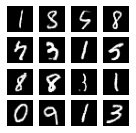

In [40]:
noise_input = np.random.uniform(-1.0, 1.0, size=[16, 100])
gan.plot_images(generator_pretrain,noise_input=noise_input,show=True,
            model_name="test_outputs")